In [400]:
#SIFT
import os
import json
import pandas as pd
import seaborn as sns
# assign directory

 
res = []
def find_files_by_name(searching_file, search_path, res):
    #result_files = []
    sp = 0
    
    for root, dir, files in os.walk(search_path):
        #print(files)
        #if 'HEM' in root:
        #if (root.split("/")[7]).split("_")[0] in l:
        for file in files:
            #print(root)
            if searching_file in file:
                res.append(root + '/'+ file)
    return res

res = find_files_by_name('.txt', 'E:/alphamissence/sift_uniprot', res)
print(res)
print(len(res))


['E:/alphamissence/sift_uniprot/A0A087X1C5.txt', 'E:/alphamissence/sift_uniprot/O15528.txt', 'E:/alphamissence/sift_uniprot/O43174.txt', 'E:/alphamissence/sift_uniprot/O75881.txt', 'E:/alphamissence/sift_uniprot/P04798.txt', 'E:/alphamissence/sift_uniprot/P05093.txt', 'E:/alphamissence/sift_uniprot/P05108.txt', 'E:/alphamissence/sift_uniprot/P05177.txt', 'E:/alphamissence/sift_uniprot/P05181.txt', 'E:/alphamissence/sift_uniprot/P08684.txt', 'E:/alphamissence/sift_uniprot/P08686.txt', 'E:/alphamissence/sift_uniprot/P10632.txt', 'E:/alphamissence/sift_uniprot/P10635.txt', 'E:/alphamissence/sift_uniprot/P11509.txt', 'E:/alphamissence/sift_uniprot/P11511.txt', 'E:/alphamissence/sift_uniprot/P11712.txt', 'E:/alphamissence/sift_uniprot/P13584.txt', 'E:/alphamissence/sift_uniprot/P15538.txt', 'E:/alphamissence/sift_uniprot/P19099.txt', 'E:/alphamissence/sift_uniprot/P20813.txt', 'E:/alphamissence/sift_uniprot/P20815.txt', 'E:/alphamissence/sift_uniprot/P20853.txt', 'E:/alphamissence/sift_unip

In [401]:

pat = {}
patogenicity = {}

aa_tran = {'H':'HIS' ,  'Y':'TYR', 'W':'TRP', 'R':'ARG',  'N':'ASN',  'F':'PHE', 'D':'ASP',  'T':'THR', 'M':'MET', 'S':'SER',  'K':'LYS', 'Q':'GLN', 'E':'GLU',  'C':'CYS', 'P':'PRO', 'G':'GLY',  'I':'ILE',  'L':'LEU',  'A':'ALA',  'V':'VAL'}
aa = {}
for file in res:
    uniprot_id = (file.split("/")[-1]).split('.')[0]
    aa[uniprot_id] = []
    sum_patogenicity = 0
    pocet_patogenicity = 0
    with open(f'{file}', 'r') as pdb_file:
        for line in pdb_file:
            list = line.split()
            #print(len(list))
            #print(list)
            if len(list) == 22:
                sum = 0
                for k in range(2, len(list)):
                    #print(list[k])
                    sum += float(list[k])

                #print('*',sum)
                average = round(sum/20, 2)
                sum_patogenicity += average
                pocet_patogenicity += 1
                #print(average)
                #print(list[0][-1])
                if average not in pat:
                    pat[average] = []
                pat[average].append(aa_tran[list[0][-1]])
                #print(list[0][0:-1])
                aa[uniprot_id].append(f'{aa_tran[list[0][-1]]} {list[0][0:-1]} {average}')
#                 if list[0][-1] not in pat:
#                    pat[list[0][-1]] = []
#                 pat[list[0][-1]].append(average)
    patogenicity[uniprot_id] = sum_patogenicity/pocet_patogenicity
print(pat)

{0.05: ['MET', 'PRO', 'PRO', 'GLY', 'PRO', 'PRO', 'GLY', 'ASN', 'GLY', 'VAL', 'GLY', 'GLU', 'ARG', 'GLY', 'GLY', 'TRP', 'ARG', 'ARG', 'PHE', 'ARG', 'GLY', 'GLY', 'LYS', 'GLU', 'GLU', 'ALA', 'LEU', 'PRO', 'ASN', 'ILE', 'SER', 'ARG', 'PHE', 'TYR', 'ASP', 'ASN', 'PRO', 'PRO', 'ARG', 'LEU', 'LEU', 'PHE', 'ALA', 'GLY', 'THR', 'THR', 'SER', 'THR', 'LEU', 'LEU', 'LEU', 'ARG', 'ARG', 'VAL', 'SER', 'PRO', 'CYS', 'PRO', 'VAL', 'GLY', 'THR', 'HIS', 'VAL', 'CYS', 'VAL', 'GLU', 'ILE', 'VAL', 'GLY', 'MET', 'PRO', 'THR', 'ALA', 'HIS', 'GLU', 'GLN', 'HIS', 'PRO', 'PRO', 'LYS', 'GLY', 'THR', 'LEU', 'ASP', 'PRO', 'PHE', 'PRO', 'HIS', 'PHE', 'LEU', 'GLY', 'PHE', 'LYS', 'PHE', 'PHE', 'SER', 'GLY', 'ARG', 'CYS', 'GLY', 'GLU', 'LEU', 'ALA', 'GLU', 'LEU', 'PHE', 'THR', 'GLN', 'PHE', 'PRO', 'CYS', 'ARG', 'MET', 'THR', 'GLN', 'LYS', 'ALA', 'SER', 'ARG', 'VAL', 'PHE', 'HIS', 'ARG', 'LEU', 'LEU', 'GLY', 'ARG', 'SER', 'PRO', 'GLY', 'GLY', 'GLY', 'VAL', 'LEU', 'GLU', 'ARG', 'GLU', 'PRO', 'ARG', 'TRP', 'ARG', 'GLY'

In [402]:
f = {'HIS': [0, 0], 'TYR': [0, 0], 'TRP': [0, 0], 'ARG': [0, 0], 'ASN': [0, 0], 'PHE': [0, 0], 'ASP': [0, 0], 'THR': [0, 0], 'MET': [0, 0], 'SER': [0, 0], 'LYS': [0, 0], 'GLN': [0, 0], 'GLU': [0, 0], 'CYS': [0, 0], 'PRO': [0, 0], 'GLY': [0, 0], 'ILE': [0, 0], 'LEU': [0, 0], 'ALA': [0, 0], 'VAL': [0, 0]}

for i_pat in pat:
    for aa_pat in pat[i_pat]:
        #print(aa)
        f[aa_pat][0] += float(i_pat)
        f[aa_pat][1] += 1
print(f)
k =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
    
for ij in f:
    k[ij] = f[ij][0]/f[ij][1]
print(k)

{'HIS': [178.18999999999994, 863], 'TYR': [127.70000000000032, 795], 'TRP': [63.27000000000002, 457], 'ARG': [305.37000000000023, 1888], 'ASN': [192.99000000000015, 966], 'PHE': [225.7199999999992, 1778], 'ASP': [203.0499999999981, 1394], 'THR': [255.75999999999837, 1468], 'MET': [126.54000000000023, 829], 'SER': [363.3999999999995, 1801], 'LYS': [275.55999999999824, 1592], 'GLN': [253.29999999999788, 1237], 'GLU': [277.72999999999956, 1771], 'CYS': [97.61, 486], 'PRO': [238.24999999999926, 1852], 'GLY': [248.91999999999908, 1782], 'ILE': [208.37999999999755, 1523], 'LEU': [485.4199999999997, 3809], 'ALA': [340.94999999999897, 1808], 'VAL': [268.5599999999971, 1808]}
{'HIS': 0.20647740440324444, 'TYR': 0.16062893081761045, 'TRP': 0.13844638949671775, 'ARG': 0.16174258474576284, 'ASN': 0.19978260869565234, 'PHE': 0.12695163104611878, 'ASP': 0.14565997130559405, 'THR': 0.1742234332425057, 'MET': 0.15264173703256964, 'SER': 0.2017767906718487, 'LYS': 0.17309045226130543, 'GLN': 0.20476960

In [403]:
#patogenicity SIFT cele proteiny
print(patogenicity)

{'A0A087X1C5': 0.15180582524271832, 'O15528': 0.1916535433070863, 'O43174': 0.1971428571428568, 'O75881': 0.18824110671936714, 'P04798': 0.12273437499999974, 'P05093': 0.15454724409448795, 'P05108': 0.16378119001919347, 'P05177': 0.12782945736434084, 'P05181': 0.1272616632860039, 'P08684': 0.12224652087475142, 'P08686': 0.15854251012145745, 'P10632': 0.12548979591836726, 'P10635': 0.15404426559356105, 'P11509': 0.12914979757085004, 'P11511': 0.13145129224652086, 'P11712': 0.1263673469387754, 'P13584': 0.15587084148727962, 'P15538': 0.15341948310139125, 'P19099': 0.1566600397614311, 'P20813': 0.13050916496944984, 'P20815': 0.12527888446215132, 'P20853': 0.12921052631578933, 'P22680': 0.18426587301587255, 'P24462': 0.12703777335984096, 'P24557': 0.140262664165103, 'P24903': 0.12961303462321774, 'P33260': 0.12506122448979579, 'P33261': 0.1253265306122448, 'P51589': 0.1537051792828683, 'P78329': 0.1530192307692305, 'P98187': 0.1575192307692304, 'Q02318': 0.184745762711864, 'Q02928': 0.1499

In [404]:
for i in patogenicity:
    print(i)

A0A087X1C5
O15528
O43174
O75881
P04798
P05093
P05108
P05177
P05181
P08684
P08686
P10632
P10635
P11509
P11511
P11712
P13584
P15538
P19099
P20813
P20815
P20853
P22680
P24462
P24557
P24903
P33260
P33261
P51589
P78329
P98187
Q02318
Q02928
Q07973
Q08477
Q16647
Q16678
Q16696
Q16850
Q4G0S4
Q5TCH4
Q6NT55
Q6UW02
Q6V0L0
Q6VVX0
Q6ZSU1
Q6ZWL3
Q7Z449
Q86W10
Q8N118
Q8N1L4
Q8TAV3
Q96SQ9
Q9HB55
Q9HBI6
Q9HCS2
Q9NR63
Q9NYL5
Q9UNU6
Q9Y6A2


In [405]:
print(aa)

{'A0A087X1C5': ['MET 1 0.05', 'GLY 2 0.08', 'LEU 3 0.08', 'GLU 4 0.08', 'ALA 5 0.25', 'LEU 6 0.06', 'VAL 7 0.4', 'PRO 8 0.28', 'LEU 9 0.11', 'ALA 10 0.11', 'MET 11 0.15', 'ILE 12 0.18', 'VAL 13 0.19', 'ALA 14 0.16', 'ILE 15 0.11', 'PHE 16 0.09', 'LEU 17 0.1', 'LEU 18 0.06', 'LEU 19 0.06', 'VAL 20 0.11', 'ASP 21 0.17', 'LEU 22 0.09', 'MET 23 0.13', 'HIS 24 0.27', 'ARG 25 0.07', 'HIS 26 0.16', 'GLN 27 0.28', 'ARG 28 0.14', 'TRP 29 0.36', 'ALA 30 0.33', 'ALA 31 0.2', 'ARG 32 0.14', 'TYR 33 0.12', 'PRO 34 0.05', 'PRO 35 0.05', 'GLY 36 0.05', 'PRO 37 0.05', 'LEU 38 0.18', 'PRO 39 0.07', 'LEU 40 0.08', 'PRO 41 0.05', 'GLY 42 0.14', 'LEU 43 0.11', 'GLY 44 0.05', 'ASN 45 0.05', 'LEU 46 0.11', 'LEU 47 0.06', 'HIS 48 0.07', 'VAL 49 0.12', 'ASP 50 0.06', 'PHE 51 0.2', 'GLN 52 0.12', 'ASN 53 0.12', 'THR 54 0.21', 'PRO 55 0.46', 'TYR 56 0.42', 'CYS 57 0.09', 'PHE 58 0.1', 'ASP 59 0.64', 'GLN 60 0.21', 'LEU 61 0.09', 'ARG 62 0.35', 'ARG 63 0.13', 'ARG 64 0.44', 'PHE 65 0.07', 'GLY 66 0.05', 'ASP 67 

In [406]:
#cofactors_aa = {'A0A087X1C5': ['THR 493 A', 'VAL 494 A', 'THR 321 A', 'ASN 324 A', 'VAL 496 A', 'ASP 320 A', 'VAL 384 A', 'ARG 107 A', 'TRP 113 A', 'ARG 499 A', 'LEU 380 A', 'PRO 382 A', 'PRO 385 A', 'TYR 413 A', 'HIS 62 A', 'ASN 387 A', 'LEU 410 A', 'LEU 98 A', 'ARG 389 A', 'VAL 94 A', 'LEU 97 A', 'GLU 274 A', 'ARG 170 A', 'PHE 53 A', 'GLU 313 A', 'GLN 65 A', 'VAL 487 A', 'ALA 152 A', 'ARG 99 A', 'THR 491 A', 'GLY 449 A', 'PRO 447 A', 'VAL 383 A', 'LEU 351 A', 'PHE 450 A', 'LEU 182 A', 'THR 409 A', 'GLY 386 A', 'ARG 417 A', 'HIS 412 A', 'CYS 411 A', 'TYR 381 A', 'TYR 331 A', 'PRO 486 A', 'ARG 335 A', 'ALA 485 A', 'ALA 484 A', 'GLY 483 A', 'GLU 96 A', 'ARG 34 A', 'HIS 396 A', 'HIS 31 A', 'GLU 29 A', 'LEU 61 A', 'LEU 58 A', 'LEU 233 A', 'PHE 229 A', 'THR 232 A', 'SER 231 A', 'VAL 228 A', 'LEU 253 A', 'TRP 257 A', 'TRP 76 A', 'TYR 87 A', 'MET 236 A', 'LEU 407 A', 'PHE 80 A', 'LEU 52 A', 'GLU 498 A', 'PRO 489 A', 'ARG 60 A', 'ARG 488 A', 'GLU 101 A', 'LYS 393 A', 'VAL 88 A', 'SER 59 A', 'GLN 100 A', 'PRO 74 A', 'ALA 420 A', 'ALA 90 A', 'ALA 92 A', 'PHE 72 A', 'ARG 35 A', 'ASP 39 A', 'PRO 41 A', 'LYS 490 A', 'LEU 234 A', 'ARG 492 A', 'TYR 191 A', 'GLY 226 A', 'ILE 222 A', 'ARG 223 A', 'ALA 224 A', 'THR 220 A', 'GLN 259 A', 'LYS 285 A', 'GLU 284 A', 'ARG 299 A', 'GLU 300 A', 'GLU 301 A', 'CYS 54 A', 'LEU 146 A', 'ARG 459 A', 'ARG 147 A', 'GLN 305 A', 'ALA 123 A', 'LYS 55 A', 'LEU 446 A', 'GLU 95 A', 'ASP 399 A', 'ALA 414 A', 'ALA 70 A', 'PRO 419 A', 'GLY 73 A', 'HIS 71 A', 'SER 47 A', 'GLY 42 A', 'LEU 25 A', 'LYS 404 A', 'GLN 67 A', 'THR 82 A', 'ARG 84 A'], 'O15528': ['LEU 126 A', 'TRP 134 A', 'LEU 127 A', 'CYS 455 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'THR 325 A', 'VAL 383 A', 'PRO 447 A', 'GLY 457 A', 'ILE 198 A', 'VAL 384 A', 'ARG 453 A', 'VAL 494 A', 'PHE 229 A', 'TRP 113 A', 'GLY 226 A', 'ARG 492 A', 'TYR 191 A', 'GLY 386 A', 'ILE 222 A', 'TYR 87 A', 'LEU 61 A', 'MET 236 A', 'LEU 52 A', 'LEU 58 A', 'LEU 233 A', 'VAL 83 A', 'PHE 110 A', 'ALA 237 A', 'PHE 80 A', 'PHE 53 A', 'LEU 234 A', 'VAL 230 A', 'TRP 241 A', 'HIS 240 A', 'HIS 244 A', 'LEU 245 A', 'THR 493 A', 'ASP 320 A', 'SER 388 A', 'SER 111 A', 'LEU 316 A', 'LEU 407 A', 'CYS 108 A', 'THR 232 A', 'THR 85 A', 'ALA 78 A', 'SER 79 A', 'PRO 43 A', 'TRP 250 A', 'GLU 115 A', 'ARG 243 A', 'ASN 387 A', 'TRP 257 A', 'GLY 318 A', 'ARG 389 A', 'VAL 228 A', 'THR 128 A', 'ARG 117 A', 'THR 409 A', 'VAL 408 A', 'VAL 86 A', 'ARG 84 A', 'THR 406 A', 'LEU 37 A', 'PRO 403 A', 'TYR 400 A', 'ILE 402 A', 'THR 491 A', 'MET 238 A', 'PRO 239 A', 'LEU 242 A', 'GLU 313 A'], 'O43174': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'VAL 494 A', 'THR 491 A', 'VAL 496 A', 'PRO 497 A', 'TYR 191 A', 'ASP 185 A', 'LEU 326 A', 'VAL 322 A', 'SER 323 A', 'ASP 320 A', 'VAL 319 A', 'GLY 318 A', 'GLY 194 A', 'THR 321 A', 'PHE 229 A', 'SER 227 A', 'LEU 465 A', 'ALA 461 A', 'LEU 378 A', 'THR 325 A', 'VAL 383 A', 'LEU 316 A', 'GLU 464 A', 'PHE 193 A', 'GLY 197 A', 'VAL 225 A', 'ALA 317 A', 'LEU 314 A', 'VAL 161 A', 'LEU 158 A', 'LEU 195 A', 'ILE 222 A', 'ASN 324 A', 'ARG 171 A', 'PRO 486 A', 'ARG 335 A', 'SER 427 A'], 'O75881': ['THR 491 A', 'HIS 62 A', 'LEU 495 A', 'VAL 383 A', 'THR 321 A', 'TRP 328 A', 'ASN 324 A', 'VAL 494 A', 'THR 493 A', 'VAL 384 A', 'GLY 386 A', 'PRO 385 A', 'TYR 413 A', 'PRO 382 A', 'PRO 489 A', 'TYR 381 A', 'VAL 377 A', 'THR 325 A', 'LEU 378 A', 'TYR 331 A', 'ARG 488 A', 'PRO 486 A', 'ALA 485 A', 'ARG 335 A', 'PRO 480 A', 'SER 334 A', 'ALA 484 A', 'GLU 332 A', 'ASN 426 A', 'ARG 379 A', 'SER 416 A', 'HIS 412 A', 'ARG 118 A', 'LEU 64 A', 'LEU 61 A', 'ARG 60 A', 'GLU 63 A', 'GLN 65 A', 'PRO 447 A', 'LEU 446 A', 'PHE 443 A', 'LEU 410 A', 'VAL 94 A', 'LEU 98 A', 'GLU 95 A', 'LEU 97 A', 'GLU 96 A', 'ARG 389 A', 'THR 409 A', 'VAL 88 A', 'LYS 490 A', 'ASN 387 A', 'CYS 411 A', 'VAL 408 A', 'ARG 99 A', 'GLU 101 A', 'ARG 107 A', 'PRO 105 A', 'GLU 106 A', 'ARG 453 A', 'SER 388 A', 'ARG 459 A', 'ARG 458 A', 'PHE 450 A', 'LEU 127 A', 'LEU 316 A', 'CYS 455 A', 'PHE 448 A', 'PHE 229 A'], 'P04798': ['ALA 329 A', 'VAL 377 A', 'TYR 381 A', 'PRO 382 A', 'PRO 385 A', 'VAL 384 A', 'VAL 383 A', 'LEU 380 A', 'ARG 417 A', 'TYR 413 A', 'THR 325 A', 'PRO 497 A', 'VAL 496 A', 'VAL 487 A', 'ARG 499 A', 'TRP 328 A', 'LEU 495 A', 'ALA 357 A', 'LEU 315 A', 'ALA 264 A', 'THR 312 A', 'GLY 483 A', 'PRO 486 A', 'PRO 482 A', 'LEU 351 A', 'THR 474 A', 'HIS 344 A', 'ARG 488 A', 'ALA 485 A', 'PHE 190 A', 'SER 323 A', 'ASN 324 A', 'ASP 320 A', 'GLY 194 A', 'VAL 319 A', 'LEU 195 A', 'ALA 187 A', 'TYR 191 A', 'CYS 209 A', 'LEU 207 A', 'PHE 263 A', 'PHE 221 A', 'LYS 192 A', 'ILE 501 A', 'GLU 498 A', 'SER 327 A', 'SER 500 A', 'LEU 210 A', 'PHE 193 A', 'ARG 99 A', 'SER 44 A', 'TRP 241 A', 'VAL 322 A', 'LYS 55 A', 'GLU 338 A', 'PHE 448 A', 'SER 109 A', 'VAL 311 A', 'TYR 331 A', 'HIS 336 A', 'ARG 223 A', 'ARG 184 A', 'GLU 219 A', 'GLU 189 A', 'GLU 196 A', 'VAL 186 A', 'THR 321 A', 'GLN 213 A', 'PRO 216 A', 'ARG 252 A', 'ARG 175 A', 'GLY 176 A', 'THR 177 A', 'GLU 211 A', 'ARG 278 A', 'ARG 167 A', 'ASN 160 A', 'GLY 174 A', 'ARG 173 A', 'PRO 215 A', 'ALA 212 A', 'ARG 171 A', 'GLN 282 A', 'ARG 270 A', 'ALA 349 A', 'THR 348 A', 'PRO 353 A', 'ARG 508 A', 'HIS 267 A', 'ARG 266 A', 'THR 218 A', 'GLU 332 A', 'ARG 379 A', 'SER 416 A', 'LEU 378 A', 'VAL 374 A', 'ARG 168 A', 'VAL 214 A', 'ILE 222 A'], 'P05093': ['ARG 60 A', 'HIS 62 A', 'THR 491 A', 'LEU 495 A', 'PRO 489 A', 'ASN 324 A', 'VAL 494 A', 'TRP 328 A', 'VAL 496 A', 'THR 493 A', 'LEU 61 A', 'ARG 379 A', 'SER 416 A', 'PRO 382 A', 'TYR 413 A', 'PRO 385 A', 'ARG 417 A', 'ASN 387 A', 'VAL 408 A', 'THR 409 A', 'LEU 410 A', 'VAL 86 A', 'VAL 88 A', 'TYR 87 A', 'ARG 84 A', 'THR 82 A', 'ARG 453 A', 'GLU 130 A', 'ASN 426 A', 'GLU 424 A', 'PRO 419 A', 'PRO 46 A', 'SER 44 A', 'GLU 338 A', 'PRO 337 A', 'PRO 486 A', 'ARG 488 A', 'CYS 411 A', 'GLY 386 A', 'SER 388 A', 'ARG 389 A', 'VAL 384 A', 'PRO 425 A', 'ASP 418 A', 'THR 415 A', 'ALA 414 A', 'HIS 412 A', 'TYR 27 A', 'HIS 441 A', 'GLU 95 A', 'PRO 442 A', 'THR 439 A', 'ARG 99 A', 'ARG 28 A', 'ASP 399 A', 'PRO 74 A', 'ALA 420 A', 'ALA 92 A', 'GLN 421 A', 'ALA 89 A', 'LEU 93 A', 'TRP 76 A', 'GLN 65 A', 'PHE 422 A', 'VAL 66 A', 'ARG 335 A', 'PRO 216 A', 'ARG 170 A', 'SER 360 A', 'GLU 477 A', 'VAL 230 A', 'SER 427 A', 'LEU 202 A', 'GLU 63 A', 'GLU 101 A', 'PHE 450 A', 'LEU 98 A', 'ARG 35 A', 'ILE 401 A', 'ARG 34 A', 'ASP 39 A', 'SER 36 A', 'TYR 400 A', 'VAL 75 A', 'ARG 429 A', 'PHE 428 A', 'GLU 436 A', 'PRO 423 A', 'GLY 437 A', 'ILE 395 A', 'LEU 97 A', 'GLN 100 A', 'ASP 394 A', 'LYS 393 A', 'SER 32 A', 'TYR 30 A', 'HIS 396 A', 'GLY 398 A', 'PRO 41 A', 'PHE 72 A', 'GLY 73 A', 'GLU 96 A', 'ALA 38 A', 'LYS 404 A'], 'P05108': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'THR 491 A', 'LEU 495 A', 'ASN 324 A', 'VAL 494 A', 'VAL 496 A', 'PRO 497 A', 'GLU 498 A', 'THR 493 A', 'LEU 233 A', 'CYS 411 A', 'THR 409 A', 'GLN 65 A', 'GLY 386 A', 'PRO 385 A', 'HIS 62 A', 'TYR 413 A', 'LEU 61 A', 'ARG 266 A', 'GLU 63 A', 'VAL 383 A', 'TRP 328 A', 'TYR 87 A', 'VAL 88 A', 'VAL 408 A', 'LEU 410 A', 'LEU 97 A', 'ILE 395 A', 'ALA 70 A', 'HIS 71 A', 'PHE 72 A', 'PRO 382 A', 'ARG 379 A', 'SER 416 A', 'SER 445 A', 'TRP 433 A', 'LYS 375 A', 'GLU 376 A', 'TRP 76 A', 'PRO 43 A', 'ALA 89 A', 'PRO 74 A', 'LEU 93 A', 'VAL 75 A', 'ALA 92 A', 'PRO 91 A', 'ARG 35 A', 'ASP 399 A', 'ALA 90 A', 'HIS 412 A', 'THR 415 A', 'ALA 444 A', 'VAL 66 A', 'ALA 414 A', 'ARG 417 A', 'ASN 426 A', 'VAL 94 A', 'PRO 425 A', 'LEU 380 A', 'LEU 64 A', 'PHE 422 A', 'VAL 230 A', 'PHE 229 A', 'ARG 492 A', 'THR 232 A', 'TRP 113 A', 'VAL 384 A'], 'P05177': ['THR 491 A', 'ARG 492 A', 'VAL 230 A', 'LYS 490 A', 'VAL 496 A', 'VAL 494 A', 'ASN 324 A', 'VAL 383 A', 'THR 321 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'PRO 489 A', 'LEU 495 A', 'ARG 84 A', 'THR 82 A', 'GLU 95 A', 'ARG 499 A', 'GLU 498 A', 'ARG 488 A', 'TRP 241 A', 'LEU 49 A', 'THR 177 A', 'GLY 483 A', 'ARG 184 A', 'CYS 411 A', 'GLN 65 A', 'LEU 61 A', 'HIS 62 A', 'PRO 385 A', 'LEU 410 A', 'VAL 88 A', 'GLU 63 A', 'LEU 64 A', 'TYR 413 A', 'PRO 74 A', 'LEU 93 A', 'ALA 90 A', 'THR 415 A', 'ALA 89 A', 'TRP 76 A', 'GLY 73 A', 'ARG 60 A', 'PRO 425 A', 'PRO 419 A', 'ALA 70 A', 'TYR 87 A', 'GLY 386 A', 'CYS 54 A', 'PRO 486 A', 'VAL 487 A', 'TYR 331 A', 'ALA 485 A', 'ALA 484 A', 'ALA 92 A', 'ASP 399 A', 'TYR 27 A', 'GLU 424 A', 'PRO 423 A', 'HIS 71 A', 'LYS 55 A', 'GLN 67 A', 'ALA 33 A', 'TYR 30 A', 'ASP 39 A', 'ALA 38 A', 'LEU 25 A', 'ASN 426 A', 'PRO 43 A', 'PHE 72 A', 'SER 59 A', 'GLY 56 A', 'LEU 58 A', 'PHE 53 A', 'VAL 75 A', 'ALA 69 A', 'ALA 420 A', 'ASP 418 A', 'ARG 35 A', 'PRO 41 A', 'ILE 40 A', 'GLY 42 A', 'THR 45 A', 'SER 44 A', 'ARG 252 A', 'TYR 191 A', 'ASP 185 A', 'SER 500 A', 'ILE 222 A', 'ARG 223 A', 'GLU 219 A', 'THR 220 A', 'PRO 216 A', 'ARG 147 A', 'SER 139 A', 'ALA 187 A', 'GLY 188 A', 'LYS 192 A', 'VAL 214 A', 'PRO 215 A', 'THR 218 A', 'THR 409 A', 'HIS 292 A', 'HIS 475 A', 'VAL 66 A', 'ARG 417 A', 'PHE 48 A', 'GLY 68 A', 'ALA 349 A', 'GLU 51 A', 'GLN 504 A', 'LEU 316 A', 'ARG 459 A', 'GLU 96 A', 'ALA 78 A', 'SER 79 A', 'LEU 77 A', 'LEU 245 A', 'PRO 46 A'], 'P05181': ['LEU 58 A', 'THR 491 A', 'SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 494 A', 'GLU 498 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'PRO 385 A', 'PRO 382 A', 'TYR 413 A', 'VAL 66 A', 'ARG 417 A', 'HIS 62 A', 'ASN 426 A', 'PRO 440 A', 'HIS 441 A', 'THR 439 A', 'ALA 420 A', 'ALA 92 A', 'THR 409 A', 'CYS 411 A', 'LEU 410 A', 'VAL 408 A', 'ASN 387 A', 'HIS 412 A', 'GLY 386 A', 'VAL 384 A', 'TYR 27 A', 'ARG 432 A', 'ASP 399 A', 'PRO 74 A', 'ALA 70 A', 'PRO 419 A', 'GLY 26 A', 'LEU 25 A', 'ARG 35 A', 'GLY 73 A', 'HIS 71 A', 'GLN 421 A', 'PRO 438 A', 'TYR 87 A', 'GLN 65 A', 'LEU 98 A', 'PHE 443 A', 'VAL 94 A', 'LEU 97 A', 'PHE 450 A', 'GLY 398 A', 'VAL 397 A', 'HIS 396 A', 'GLU 96 A', 'TYR 400 A', 'ARG 335 A', 'PRO 486 A', 'TYR 381 A', 'GLU 332 A', 'SER 427 A', 'ARG 99 A', 'ASP 39 A', 'ILE 40 A', 'PRO 41 A', 'GLU 424 A', 'GLN 100 A', 'TRP 241 A', 'PRO 46 A', 'LEU 49 A', 'SER 44 A', 'GLU 101 A', 'LYS 393 A', 'GLU 63 A', 'GLN 67 A', 'ARG 60 A', 'GLY 56 A', 'LEU 234 A', 'VAL 230 A', 'ALA 69 A', 'LEU 64 A', 'LEU 61 A', 'LEU 52 A', 'GLU 51 A', 'ARG 488 A', 'ARG 389 A', 'SER 388 A', 'ARG 107 A', 'GLU 106 A', 'VAL 390 A', 'ASP 392 A', 'GLY 102 A', 'LYS 404 A', 'PRO 103 A', 'VAL 88 A', 'GLY 57 A', 'PHE 48 A', 'PRO 391 A', 'ILE 395 A', 'LEU 93 A', 'VAL 75 A', 'GLU 95 A', 'LYS 55 A', 'CYS 54 A', 'ARG 499 A', 'SER 500 A', 'ARG 223 A', 'ARG 252 A', 'GLU 284 A', 'HIS 295 A', 'ALA 275 A', 'PHE 298 A', 'ALA 304 A', 'GLU 272 A', 'GLU 338 A', 'SER 454 A', 'MET 456 A', 'CYS 455 A', 'ARG 255 A', 'GLY 251 A', 'ASP 256 A', 'CYS 254 A', 'ARG 120 A', 'HIS 336 A', 'LYS 452 A', 'LEU 380 A', 'VAL 86 A', 'ALA 485 A', 'ASP 217 A', 'ASP 507 A', 'ALA 350 A', 'PRO 480 A', 'VAL 225 A', 'THR 415 A'], 'P08684': ['SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'THR 491 A', 'ARG 492 A', 'THR 493 A', 'LEU 233 A', 'ASP 418 A', 'GLN 421 A', 'PRO 419 A', 'ALA 420 A', 'HIS 62 A', 'PRO 385 A', 'TYR 413 A', 'GLN 65 A', 'ALA 414 A', 'THR 415 A', 'SER 416 A', 'GLY 386 A', 'LEU 410 A', 'CYS 411 A', 'THR 409 A', 'PRO 489 A', 'ARG 417 A', 'VAL 88 A', 'ALA 89 A', 'ALA 90 A', 'GLU 63 A', 'PRO 382 A', 'HIS 412 A', 'VAL 384 A', 'GLY 204 A', 'GLY 483 A', 'LEU 98 A', 'ARG 389 A', 'ASN 387 A', 'ARG 84 A', 'GLY 309 A', 'LEU 308 A', 'THR 312 A', 'TYR 381 A', 'LEU 380 A', 'ARG 379 A', 'ILE 307 A', 'VAL 311 A', 'PHE 261 A', 'LEU 140 A', 'PRO 391 A', 'LEU 97 A', 'SER 388 A'], 'P08686': ['LEU 233 A', 'ARG 492 A', 'THR 491 A', 'LYS 490 A', 'VAL 494 A', 'VAL 496 A', 'LEU 495 A', 'VAL 383 A', 'THR 321 A', 'PRO 497 A', 'ASN 324 A', 'THR 493 A', 'GLU 63 A', 'HIS 62 A', 'PRO 385 A', 'CYS 411 A', 'VAL 88 A', 'ALA 89 A', 'TRP 76 A', 'TYR 87 A', 'PRO 489 A', 'TYR 413 A', 'VAL 487 A', 'ARG 488 A', 'GLY 73 A', 'PRO 74 A', 'LEU 58 A', 'PHE 72 A', 'PRO 41 A', 'GLN 65 A', 'ALA 90 A', 'VAL 94 A', 'THR 415 A', 'PHE 443 A', 'PRO 486 A', 'ALA 485 A', 'ALA 484 A', 'GLY 483 A', 'SER 59 A', 'ARG 60 A', 'GLY 56 A', 'VAL 230 A', 'SER 231 A', 'ARG 252 A', 'SER 227 A', 'VAL 228 A', 'GLN 67 A', 'LEU 64 A', 'LEU 52 A', 'PHE 53 A', 'LEU 234 A', 'GLU 498 A', 'ARG 499 A', 'CYS 54 A', 'LEU 410 A', 'THR 409 A', 'ASN 387 A', 'VAL 408 A', 'LEU 97 A', 'VAL 397 A', 'HIS 396 A', 'ILE 395 A', 'ASP 394 A', 'GLN 100 A', 'LEU 61 A', 'ALA 237 A', 'ALA 70 A', 'PRO 419 A', 'ASP 418 A', 'ALA 69 A', 'HIS 71 A', 'ARG 35 A', 'ASP 39 A', 'ALA 38 A', 'ASP 399 A', 'PRO 91 A', 'ALA 92 A', 'HIS 441 A', 'GLU 95 A', 'TYR 191 A', 'ILE 222 A', 'ARG 223 A', 'GLU 219 A', 'THR 220 A', 'GLN 259 A', 'ASP 217 A', 'PHE 221 A', 'ARG 147 A', 'GLU 300 A', 'SER 139 A', 'ARG 136 A', 'VAL 246 A', 'PHE 450 A', 'LEU 446 A', 'GLY 449 A', 'GLY 451 A', 'PRO 482 A', 'ALA 123 A', 'ARG 117 A', 'GLU 313 A', 'THR 114 A', 'TYR 331 A', 'ARG 184 A', 'LEU 93 A', 'ILE 40 A', 'TYR 400 A', 'LYS 393 A', 'LYS 404 A', 'ASN 405 A', 'PRO 391 A', 'VAL 390 A', 'GLU 106 A', 'SER 109 A', 'GLY 42 A', 'PRO 43 A', 'SER 44 A', 'GLY 398 A', 'ARG 84 A', 'THR 82 A', 'SER 500 A', 'ALA 187 A', 'SER 327 A', 'TRP 241 A', 'THR 177 A', 'LEU 144 A', 'THR 474 A', 'GLU 346 A', 'PHE 505 A', 'PHE 229 A', 'ARG 459 A', 'PRO 382 A', 'GLN 421 A'], 'P10632': ['THR 325 A', 'VAL 377 A', 'TYR 381 A', 'PRO 382 A', 'PRO 385 A', 'VAL 383 A', 'LEU 380 A', 'TYR 413 A', 'VAL 322 A', 'LEU 465 A', 'PHE 190 A', 'SER 327 A', 'ILE 501 A', 'PRO 497 A', 'TRP 328 A', 'VAL 496 A', 'ASN 324 A', 'LEU 495 A', 'VAL 487 A', 'ARG 499 A', 'ALA 187 A', 'GLY 188 A', 'ASP 185 A', 'VAL 186 A', 'TYR 331 A', 'ARG 488 A', 'PRO 486 A', 'ARG 184 A', 'THR 177 A', 'GLU 189 A', 'LYS 192 A', 'TYR 191 A', 'ASP 320 A', 'GLU 498 A', 'GLY 178 A', 'PRO 482 A', 'PRO 179 A', 'GLY 174 A', 'GLY 483 A', 'ARG 223 A', 'GLU 219 A', 'GLU 338 A', 'ARG 335 A', 'PRO 337 A', 'PRO 216 A', 'GLU 332 A', 'PHE 428 A', 'VAL 373 A', 'VAL 374 A', 'LYS 375 A', 'ALA 372 A', 'LYS 371 A', 'GLU 462 A', 'LEU 503 A', 'ASN 502 A', 'LEU 330 A', 'LEU 326 A', 'LEU 469 A', 'LEU 473 A', 'LEU 343 A', 'LEU 370 A', 'GLN 466 A', 'HIS 336 A', 'SER 427 A', 'THR 218 A', 'LEU 195 A', 'PRO 215 A', 'ASP 217 A', 'ARG 270 A', 'ARG 266 A', 'GLN 172 A', 'ILE 222 A', 'VAL 214 A', 'GLY 176 A', 'LEU 182 A', 'ARG 175 A', 'PRO 180 A', 'VAL 339 A', 'ALA 342 A', 'SER 416 A', 'ARG 379 A', 'TRP 433 A', 'SER 445 A', 'PRO 440 A', 'PRO 442 A', 'ARG 118 A', 'GLU 133 A', 'PRO 303 A', 'ARG 136 A', 'GLU 436 A', 'SER 345 A', 'MET 260 A', 'VAL 228 A', 'VAL 225 A', 'TRP 257 A', 'ARG 147 A', 'LEU 146 A', 'PRO 143 A', 'ARG 429 A', 'GLU 424 A', 'ARG 173 A', 'ALA 485 A', 'THR 220 A', 'LEU 351 A', 'SER 352 A', 'SER 355 A', 'ALA 357 A', 'THR 474 A', 'ARG 508 A', 'ARG 168 A', 'PRO 103 A', 'GLY 42 A', 'LEU 49 A', 'ALA 70 A', 'CYS 455 A'], 'P10635': ['LEU 127 A', 'TRP 113 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'VAL 322 A', 'PHE 448 A', 'CYS 455 A', 'LEU 316 A', 'VAL 319 A', 'THR 220 A', 'ARG 492 A', 'VAL 494 A', 'THR 493 A', 'VAL 384 A', 'PHE 229 A', 'LEU 233 A', 'GLY 386 A', 'LEU 410 A', 'HIS 412 A', 'CYS 411 A', 'ALA 414 A', 'GLN 65 A', 'THR 409 A', 'TYR 87 A', 'VAL 88 A', 'GLN 149 A', 'ARG 167 A', 'CYS 119 A', 'LEU 61 A', 'ARG 223 A', 'GLU 346 A', 'ALA 420 A', 'TRP 257 A', 'VAL 383 A', 'ASP 507 A', 'VAL 214 A', 'SER 388 A', 'LEU 407 A', 'THR 491 A', 'PRO 385 A', 'PRO 382 A', 'GLY 73 A', 'ALA 69 A', 'GLY 68 A', 'PHE 72 A', 'PRO 247 A', 'ARG 255 A', 'GLY 248 A', 'HIS 71 A', 'TRP 76 A', 'ARG 35 A', 'THR 232 A', 'THR 128 A', 'GLU 313 A', 'GLY 125 A', 'ALA 129 A', 'LEU 137 A', 'LEU 126 A', 'PHE 80 A', 'ALA 237 A', 'MET 236 A', 'CYS 108 A', 'PHE 110 A', 'SER 109 A', 'GLU 130 A', 'ARG 252 A', 'ASP 256 A', 'THR 415 A', 'VAL 94 A', 'PHE 443 A', 'PRO 91 A', 'ALA 90 A', 'ASP 418 A', 'ALA 92 A', 'PRO 74 A', 'ALA 89 A', 'SER 47 A', 'SER 44 A', 'ALA 50 A', 'LYS 55 A', 'GLU 51 A', 'GLN 67 A', 'LEU 49 A', 'GLY 81 A', 'SER 79 A', 'THR 45 A', 'ALA 38 A', 'PRO 46 A', 'HIS 116 A', 'ARG 120 A', 'ARG 118 A', 'LEU 315 A', 'PHE 221 A', 'THR 312 A', 'LEU 314 A', 'VAL 311 A', 'LEU 202 A', 'THR 294 A', 'LEU 297 A', 'HIS 295 A', 'LEU 293 A', 'PRO 43 A', 'GLN 121 A', 'TRP 433 A', 'LYS 375 A', 'ARG 147 A', 'GLN 135 A', 'ALA 142 A', 'LYS 452 A', 'GLY 251 A', 'VAL 230 A', 'LEU 495 A', 'CYS 54 A', 'ARG 60 A', 'TRP 241 A', 'LEU 242 A', 'GLY 42 A', 'LEU 77 A', 'LYS 404 A', 'ASN 405 A', 'ALA 70 A', 'PHE 48 A'], 'P11509': ['THR 493 A', 'THR 232 A', 'ARG 492 A', 'VAL 494 A', 'ASN 324 A', 'VAL 383 A', 'ASP 320 A', 'THR 321 A', 'VAL 384 A', 'ARG 107 A', 'THR 491 A', 'LEU 495 A', 'PRO 385 A', 'HIS 62 A', 'GLN 65 A', 'CYS 411 A', 'TYR 413 A', 'ASP 418 A', 'ALA 69 A', 'GLN 421 A', 'PRO 382 A', 'GLY 73 A', 'PHE 72 A', 'PRO 41 A', 'LEU 233 A', 'LEU 58 A', 'VAL 230 A', 'TRP 113 A', 'LEU 253 A', 'TRP 257 A', 'HIS 116 A', 'LEU 64 A', 'LEU 61 A', 'TYR 87 A', 'MET 236 A', 'SER 388 A', 'PHE 110 A', 'PRO 112 A', 'SER 111 A', 'CYS 108 A', 'LEU 234 A', 'SER 59 A', 'PHE 53 A', 'CYS 54 A', 'VAL 94 A', 'LEU 410 A', 'LEU 93 A', 'ALA 92 A', 'GLU 96 A', 'TRP 76 A', 'ALA 89 A', 'ALA 90 A', 'PRO 74 A', 'ALA 70 A', 'PRO 419 A', 'HIS 71 A', 'ARG 35 A', 'ALA 420 A', 'HIS 441 A', 'TYR 27 A', 'ARG 499 A', 'GLU 498 A', 'ARG 184 A', 'ARG 252 A', 'PRO 249 A', 'VAL 246 A', 'ARG 243 A', 'PRO 247 A', 'LEU 245 A', 'GLY 226 A', 'VAL 225 A', 'ALA 224 A', 'PHE 221 A', 'MET 260 A', 'GLN 259 A', 'ASP 256 A', 'PHE 261 A', 'PHE 263 A', 'GLN 366 A', 'GLN 149 A', 'PRO 148 A', 'ARG 147 A', 'GLY 248 A', 'HIS 244 A', 'LEU 242 A', 'PRO 442 A', 'TRP 433 A', 'LYS 375 A', 'SER 445 A', 'LEU 140 A', 'LEU 137 A', 'ARG 136 A', 'ARG 138 A', 'GLN 135 A', 'SER 139 A', 'HIS 412 A', 'ALA 414 A', 'ARG 488 A', 'ARG 60 A', 'LYS 55 A', 'GLY 42 A', 'ILE 40 A', 'SER 44 A', 'ALA 38 A', 'ASP 39 A', 'ASN 405 A', 'THR 82 A', 'THR 409 A', 'GLY 386 A', 'GLU 63 A', 'PRO 489 A', 'ASN 426 A', 'VAL 88 A', 'GLU 424 A', 'SER 47 A', 'GLN 67 A', 'GLY 57 A', 'THR 415 A', 'GLU 288 A', 'ARG 173 A', 'THR 341 A', 'LYS 490 A'], 'P11511': ['THR 493 A', 'PHE 229 A', 'THR 232 A', 'THR 321 A', 'ALA 317 A', 'ASP 320 A', 'VAL 319 A', 'LEU 127 A', 'ARG 107 A', 'TRP 113 A', 'VAL 384 A', 'VAL 383 A', 'LEU 495 A', 'VAL 494 A', 'GLY 386 A', 'HIS 412 A', 'PRO 385 A', 'LEU 410 A', 'PRO 382 A', 'PRO 489 A', 'VAL 88 A', 'ASN 387 A', 'MET 236 A', 'LEU 61 A', 'TYR 87 A', 'LEU 233 A', 'HIS 62 A', 'GLN 65 A', 'CYS 411 A', 'ALA 89 A', 'ALA 69 A', 'GLY 73 A', 'TRP 76 A', 'LYS 490 A', 'SER 59 A', 'THR 491 A', 'TYR 413 A', 'TYR 381 A', 'ARG 417 A', 'SER 416 A', 'VAL 496 A', 'ALA 484 A', 'GLY 483 A', 'GLU 481 A', 'PRO 480 A', 'PRO 482 A', 'TYR 331 A', 'ALA 485 A', 'VAL 487 A', 'ARG 499 A'], 'P11712': ['LEU 233 A', 'ARG 492 A', 'VAL 230 A', 'THR 493 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'THR 491 A', 'LYS 490 A', 'SER 59 A', 'GLU 498 A', 'ARG 60 A', 'VAL 496 A', 'LEU 495 A', 'ARG 488 A', 'ASN 426 A', 'ALA 70 A', 'LEU 64 A', 'GLN 65 A', 'TRP 76 A', 'HIS 62 A', 'CYS 411 A', 'ALA 89 A', 'PRO 385 A', 'TYR 413 A', 'GLN 67 A', 'SER 427 A', 'PRO 486 A', 'ARG 335 A', 'HIS 71 A', 'LYS 55 A', 'LEU 25 A', 'ARG 35 A', 'PRO 419 A', 'LEU 61 A', 'PHE 48 A', 'PRO 489 A', 'GLU 63 A', 'ASP 418 A', 'ARG 417 A', 'VAL 66 A', 'ALA 69 A', 'CYS 54 A', 'PHE 53 A', 'ALA 420 A', 'ARG 499 A', 'ARG 184 A', 'THR 177 A', 'LEU 58 A', 'LEU 234 A', 'SER 231 A', 'THR 232 A', 'THR 235 A', 'LEU 253 A', 'PRO 112 A', 'TRP 250 A', 'TRP 113 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'PHE 80 A', 'MET 236 A', 'ALA 237 A', 'MET 238 A', 'VAL 83 A', 'ARG 252 A', 'VAL 88 A', 'LEU 410 A', 'VAL 94 A', 'ALA 90 A', 'ALA 92 A', 'LEU 93 A', 'ASP 399 A', 'GLY 398 A', 'GLY 68 A', 'PHE 72 A', 'ALA 414 A', 'PRO 74 A', 'GLN 421 A', 'TYR 27 A', 'PHE 229 A', 'PRO 249 A', 'VAL 246 A', 'LEU 245 A', 'SER 227 A', 'ARG 223 A', 'VAL 228 A', 'ASP 256 A', 'ALA 224 A', 'MET 260 A', 'ARG 255 A', 'GLN 259 A', 'TRP 257 A', 'ASP 258 A', 'ARG 122 A', 'ALA 262 A', 'GLN 149 A', 'THR 362 A', 'GLN 366 A', 'ARG 147 A', 'SER 445 A', 'LYS 375 A', 'PRO 447 A', 'GLU 133 A', 'TRP 134 A', 'GLU 132 A', 'SER 32 A', 'TYR 30 A', 'GLY 26 A', 'THR 82 A', 'GLY 81 A', 'THR 45 A', 'PRO 46 A', 'GLY 56 A', 'THR 415 A', 'PHE 296 A', 'ARG 171 A', 'ARG 508 A', 'ARG 175 A'], 'P13584': ['LEU 495 A', 'PRO 489 A', 'TYR 381 A', 'TRP 328 A', 'ASN 324 A', 'ASP 320 A', 'VAL 319 A', 'VAL 383 A', 'THR 325 A', 'LEU 326 A', 'VAL 494 A', 'PRO 385 A', 'VAL 384 A', 'PRO 447 A', 'PRO 382 A', 'LEU 446 A', 'ASN 387 A', 'GLY 449 A', 'LEU 378 A', 'PHE 448 A', 'ARG 458 A', 'ARG 453 A', 'ARG 107 A', 'PHE 450 A', 'LEU 410 A', 'VAL 408 A', 'THR 409 A', 'ARG 389 A', 'SER 388 A', 'GLU 101 A', 'HIS 412 A', 'SER 416 A', 'LEU 98 A', 'THR 321 A', 'LEU 97 A', 'GLN 259 A', 'ARG 255 A', 'ALA 262 A', 'VAL 75 A', 'LEU 287 A', 'ARG 266 A', 'PRO 337 A', 'PHE 296 A', 'GLY 386 A', 'PRO 46 A', 'GLN 100 A', 'HIS 396 A', 'ILE 395 A'], 'P15538': ['TRP 113 A', 'PHE 229 A', 'THR 321 A', 'CYS 455 A', 'VAL 384 A', 'ASP 320 A', 'ARG 107 A', 'LEU 127 A', 'GLN 65 A', 'THR 409 A', 'CYS 411 A', 'ALA 89 A', 'VAL 88 A', 'ALA 90 A', 'CYS 54 A', 'LYS 55 A', 'GLU 51 A', 'VAL 494 A', 'VAL 383 A', 'ASN 387 A', 'ARG 492 A', 'LEU 495 A', 'GLY 386 A', 'THR 493 A', 'PRO 385 A', 'TYR 381 A', 'LEU 380 A', 'TRP 328 A', 'TYR 87 A', 'LEU 64 A', 'TRP 76 A', 'ALA 414 A', 'PHE 48 A', 'SER 79 A', 'ALA 69 A', 'VAL 66 A', 'ASN 426 A', 'HIS 71 A', 'SER 47 A', 'ALA 70 A', 'HIS 62 A', 'TYR 413 A', 'ARG 417 A', 'GLN 67 A', 'LEU 410 A', 'THR 491 A', 'TYR 191 A', 'ASP 185 A', 'GLY 188 A', 'SER 500 A', 'ARG 184 A', 'VAL 496 A', 'HIS 412 A', 'PRO 497 A', 'LYS 490 A', 'SER 59 A', 'PRO 382 A', 'LEU 233 A', 'LEU 61 A', 'THR 325 A'], 'P19099': ['THR 491 A', 'PRO 385 A', 'LEU 495 A', 'VAL 494 A', 'THR 493 A', 'VAL 383 A', 'THR 321 A', 'VAL 384 A', 'TRP 328 A', 'ASN 324 A', 'ASN 387 A', 'PRO 447 A', 'PRO 382 A', 'ARG 107 A', 'TYR 413 A', 'LEU 378 A', 'LEU 410 A', 'LEU 97 A', 'LEU 98 A', 'ARG 389 A', 'GLU 101 A', 'GLY 102 A', 'ASP 418 A', 'ALA 420 A', 'PRO 74 A', 'ALA 90 A', 'ALA 92 A', 'ASP 399 A', 'GLY 386 A', 'HIS 412 A', 'ARG 458 A', 'GLU 462 A', 'SER 445 A', 'LYS 371 A', 'VAL 94 A', 'VAL 88 A', 'VAL 408 A', 'TYR 87 A', 'VAL 75 A', 'TRP 76 A', 'ILE 40 A', 'LEU 93 A', 'GLU 95 A', 'GLU 96 A', 'PHE 443 A', 'PRO 442 A', 'TYR 30 A', 'TYR 27 A', 'ARG 34 A', 'LEU 446 A', 'PHE 450 A', 'SER 416 A', 'ARG 379 A', 'ARG 453 A', 'SER 454 A', 'GLY 449 A', 'CYS 411 A', 'THR 409 A', 'ARG 417 A', 'ALA 212 A', 'SER 388 A'], 'P20813': ['LEU 127 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'ALA 461 A', 'PHE 448 A', 'CYS 455 A', 'PRO 447 A', 'GLY 318 A', 'ASN 387 A', 'VAL 384 A', 'THR 493 A', 'VAL 494 A', 'ARG 223 A', 'ILE 222 A', 'GLU 219 A', 'GLN 67 A', 'GLY 68 A', 'ALA 70 A', 'HIS 71 A', 'PRO 46 A', 'SER 44 A', 'SER 47 A', 'GLU 51 A', 'CYS 54 A', 'THR 45 A', 'SER 79 A', 'PHE 80 A', 'GLY 81 A', 'LEU 49 A', 'TRP 241 A', 'ARG 252 A', 'ARG 255 A', 'LYS 404 A', 'ASN 405 A', 'PHE 110 A', 'ARG 118 A', 'PRO 216 A', 'TRP 113 A', 'THR 128 A', 'GLU 313 A', 'LEU 126 A', 'GLY 125 A', 'LEU 137 A', 'TRP 134 A', 'ARG 138 A', 'MET 236 A', 'ALA 237 A', 'LEU 233 A', 'THR 232 A', 'SER 111 A', 'CYS 108 A', 'SER 109 A', 'GLU 130 A', 'ALA 129 A', 'ASP 258 A', 'TRP 257 A', 'CYS 254 A', 'ARG 120 A', 'PRO 247 A', 'TYR 87 A', 'CYS 411 A', 'VAL 88 A', 'ALA 89 A', 'PRO 74 A', 'GLY 73 A', 'PHE 72 A', 'ARG 35 A', 'ASP 399 A', 'GLY 386 A', 'THR 85 A', 'ALA 78 A', 'VAL 83 A', 'THR 409 A', 'GLN 65 A', 'TRP 76 A', 'PHE 48 A', 'LYS 55 A', 'ARG 60 A', 'ALA 50 A', 'VAL 66 A', 'VAL 383 A', 'PHE 229 A', 'PHE 261 A', 'ARG 117 A', 'ARG 122 A', 'GLN 121 A', 'LEU 314 A', 'LEU 315 A', 'LEU 316 A', 'LEU 293 A', 'LEU 141 A', 'LEU 297 A', 'LEU 144 A', 'LEU 140 A', 'PHE 296 A', 'GLY 435 A', 'LEU 434 A', 'THR 439 A', 'VAL 11 A', 'SER 9 A', 'GLY 56 A', 'THR 415 A', 'SER 416 A', 'ARG 379 A', 'PHE 422 A', 'LYS 452 A', 'ARG 99 A', 'PHE 450 A', 'GLN 265 A', 'PRO 385 A', 'LEU 495 A', 'LEU 61 A', 'LEU 64 A', 'THR 220 A', 'SER 388 A', 'VAL 230 A', 'ARG 492 A', 'THR 491 A', 'GLY 226 A', 'GLU 498 A', 'SER 59 A', 'PRO 382 A', 'HIS 412 A', 'PHE 53 A', 'ARG 488 A', 'LEU 242 A', 'VAL 246 A', 'MET 238 A', 'VAL 228 A', 'ARG 266 A', 'GLN 366 A', 'ARG 170 A', 'GLN 479 A', 'LEU 410 A', 'GLY 208 A', 'GLN 259 A', 'SER 454 A', 'PRO 430 A'], 'P20815': ['TRP 113 A', 'LEU 316 A', 'LEU 127 A', 'PHE 229 A', 'ALA 317 A', 'THR 321 A', 'VAL 322 A', 'ASP 320 A', 'VAL 319 A', 'ARG 107 A', 'GLU 63 A', 'ARG 60 A', 'VAL 494 A', 'VAL 384 A', 'PRO 385 A', 'THR 493 A', 'GLY 386 A', 'VAL 383 A', 'THR 491 A', 'HIS 62 A', 'LEU 495 A', 'HIS 412 A', 'TYR 413 A', 'GLN 65 A', 'ASN 387 A', 'ARG 492 A', 'LYS 490 A', 'LEU 410 A', 'THR 409 A', 'VAL 66 A', 'CYS 411 A', 'THR 362 A', 'ASP 217 A', 'ALA 89 A', 'ALA 414 A', 'THR 415 A', 'LYS 404 A', 'ARG 147 A', 'PRO 148 A', 'VAL 496 A', 'GLN 149 A', 'VAL 88 A', 'TYR 87 A', 'TRP 76 A'], 'P20853': ['THR 493 A', 'THR 232 A', 'ARG 492 A', 'VAL 494 A', 'VAL 496 A', 'ASN 324 A', 'VAL 383 A', 'LYS 490 A', 'TRP 113 A', 'THR 491 A', 'PRO 385 A', 'LEU 495 A', 'LEU 61 A', 'HIS 62 A', 'GLY 386 A', 'VAL 384 A', 'PRO 382 A', 'GLY 398 A', 'ASP 399 A', 'TYR 400 A', 'ILE 40 A', 'LEU 410 A', 'ASN 387 A', 'PRO 91 A', 'HIS 441 A', 'ALA 90 A', 'LEU 93 A', 'ALA 92 A', 'PRO 442 A', 'ARG 488 A', 'GLU 498 A', 'ARG 60 A', 'LYS 55 A', 'GLN 67 A', 'GLU 95 A', 'ARG 35 A', 'ASP 39 A', 'HIS 71 A', 'ALA 70 A', 'ILE 401 A', 'HIS 396 A', 'LYS 393 A', 'ASP 394 A', 'HIS 31 A', 'SER 32 A', 'ARG 34 A', 'ARG 99 A', 'GLN 100 A', 'VAL 397 A', 'SER 36 A', 'LEU 37 A', 'PRO 403 A', 'VAL 86 A', 'ALA 38 A', 'ARG 118 A', 'HIS 240 A', 'PHE 110 A', 'THR 82 A', 'LEU 58 A', 'LEU 52 A', 'LEU 233 A', 'LEU 234 A', 'VAL 230 A', 'SER 231 A', 'VAL 228 A', 'LEU 253 A', 'ARG 252 A', 'ASP 256 A', 'TYR 87 A', 'TRP 76 A', 'PHE 48 A', 'MET 236 A', 'THR 235 A', 'PRO 112 A', 'SER 111 A', 'PHE 53 A', 'GLY 56 A', 'CYS 54 A', 'ALA 50 A', 'LEU 98 A', 'ARG 389 A', 'PHE 450 A', 'THR 409 A', 'VAL 408 A', 'VAL 94 A', 'LEU 97 A', 'PRO 74 A', 'ASP 418 A', 'ALA 420 A', 'VAL 75 A', 'PRO 41 A', 'PHE 443 A', 'TYR 27 A', 'GLU 63 A', 'GLN 65 A', 'PRO 249 A', 'VAL 246 A', 'GLY 226 A', 'SER 227 A', 'ARG 223 A', 'THR 220 A', 'GLN 259 A', 'SER 360 A', 'THR 362 A', 'GLU 288 A', 'ARG 153 A', 'LEU 245 A', 'LEU 242 A', 'ALA 69 A', 'ARG 458 A', 'GLU 462 A', 'PHE 448 A', 'ARG 459 A', 'ILE 307 A', 'VAL 311 A', 'TYR 7 A', 'HIS 412 A', 'SER 388 A', 'TYR 413 A', 'CYS 411 A', 'LEU 64 A', 'PRO 419 A', 'LEU 446 A', 'PRO 447 A', 'LEU 25 A', 'PHE 72 A', 'GLY 42 A', 'SER 44 A', 'ARG 206 A', 'PRO 180 A', 'THR 341 A', 'GLY 483 A'], 'P22680': ['VAL 66 A', 'TYR 413 A', 'ARG 417 A', 'LEU 380 A', 'LEU 495 A', 'ASN 324 A', 'TYR 381 A', 'PRO 385 A', 'HIS 62 A', 'LEU 61 A', 'GLY 386 A', 'GLN 65 A', 'HIS 412 A', 'ALA 414 A', 'ASP 418 A', 'SER 416 A', 'PRO 447 A', 'PHE 448 A', 'ARG 458 A', 'GLU 462 A', 'ARG 379 A', 'PRO 382 A', 'LEU 410 A', 'CYS 411 A', 'THR 415 A', 'ASN 387 A', 'VAL 384 A', 'LEU 446 A', 'ARG 389 A', 'ARG 453 A', 'ARG 107 A', 'PHE 110 A', 'ASN 405 A', 'LEU 407 A', 'VAL 83 A', 'PHE 80 A', 'THR 85 A', 'SER 388 A', 'THR 409 A', 'ARG 99 A', 'GLU 101 A', 'LEU 98 A', 'LYS 393 A', 'LYS 452 A', 'TYR 7 A', 'PRO 103 A', 'PRO 105 A', 'GLU 106 A', 'CYS 108 A', 'GLN 100 A', 'HIS 396 A', 'TRP 134 A', 'LEU 126 A', 'ARG 138 A', 'GLN 135 A', 'ALA 92 A', 'LEU 93 A', 'GLU 96 A', 'VAL 94 A', 'LEU 97 A', 'ILE 401 A', 'PRO 403 A', 'ASP 394 A', 'ILE 402 A', 'SER 36 A', 'ALA 142 A', 'LEU 146 A', 'ARG 147 A', 'MET 456 A', 'LEU 145 A', 'ILE 395 A', 'GLU 130 A', 'SER 109 A', 'LEU 234 A', 'TYR 87 A', 'LEU 64 A', 'GLU 63 A', 'VAL 383 A', 'THR 491 A', 'ARG 60 A', 'GLY 57 A', 'VAL 86 A', 'TRP 76 A', 'ALA 50 A', 'CYS 54 A', 'LYS 55 A', 'PHE 53 A'], 'P24462': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'PRO 497 A', 'TRP 328 A', 'VAL 487 A', 'VAL 494 A', 'THR 491 A', 'ARG 492 A', 'PRO 382 A', 'PRO 385 A', 'GLN 421 A', 'ASP 418 A', 'ALA 420 A', 'TYR 413 A', 'HIS 62 A', 'ALA 414 A', 'HIS 412 A', 'THR 415 A', 'SER 416 A', 'CYS 411 A', 'GLN 65 A', 'GLY 386 A', 'LEU 410 A', 'THR 409 A', 'LEU 380 A', 'ARG 417 A', 'ASN 387 A', 'VAL 88 A', 'VAL 94 A', 'VAL 383 A', 'VAL 384 A', 'VAL 408 A', 'ARG 271 A', 'GLY 483 A', 'THR 45 A', 'THR 312 A', 'PHE 261 A', 'TYR 381 A', 'ARG 379 A', 'LEU 308 A', 'GLN 265 A', 'LEU 302 A', 'TYR 87 A', 'TRP 76 A'], 'P24557': ['ARG 488 A', 'PRO 489 A', 'GLU 63 A', 'LYS 490 A', 'VAL 496 A', 'TRP 328 A', 'ASN 324 A', 'TYR 191 A', 'ARG 492 A', 'PRO 497 A', 'ILE 501 A', 'THR 491 A', 'SER 59 A', 'PRO 382 A', 'LEU 495 A', 'HIS 62 A', 'VAL 383 A', 'PRO 442 A', 'PHE 450 A', 'GLU 95 A', 'PRO 385 A', 'TYR 413 A', 'VAL 384 A', 'TYR 381 A', 'HIS 412 A', 'PRO 447 A', 'LEU 446 A', 'GLY 386 A', 'THR 493 A', 'LEU 378 A', 'LEU 410 A', 'ASN 387 A', 'LEU 98 A', 'SER 416 A', 'LEU 380 A', 'ARG 379 A', 'MET 236 A', 'VAL 494 A', 'SER 445 A', 'ALA 444 A', 'TYR 331 A', 'VAL 487 A', 'SER 388 A', 'GLN 65 A', 'THR 409 A', 'ARG 389 A', 'VAL 408 A', 'LEU 407 A', 'ARG 417 A'], 'P24903': ['LEU 58 A', 'LEU 233 A', 'THR 491 A', 'ARG 492 A', 'THR 493 A', 'LYS 490 A', 'VAL 494 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'HIS 62 A', 'PRO 385 A', 'TYR 413 A', 'GLU 63 A', 'TYR 87 A', 'LEU 61 A', 'GLN 65 A', 'PRO 382 A', 'VAL 66 A', 'CYS 411 A', 'ALA 414 A', 'ASN 426 A', 'PRO 423 A', 'PRO 419 A', 'ALA 420 A', 'GLN 421 A', 'ALA 92 A', 'ALA 90 A', 'VAL 88 A', 'THR 409 A', 'LEU 410 A', 'VAL 408 A', 'LEU 97 A', 'ASN 387 A', 'GLY 386 A', 'HIS 412 A', 'VAL 384 A', 'LEU 25 A', 'PRO 438 A', 'ASP 399 A', 'PRO 74 A', 'ALA 70 A', 'HIS 71 A', 'HIS 31 A', 'ALA 33 A', 'ARG 34 A', 'SER 36 A', 'ASP 39 A', 'GLY 26 A', 'ARG 35 A', 'TYR 27 A', 'GLY 398 A', 'TYR 400 A', 'GLU 95 A', 'PRO 91 A', 'VAL 94 A', 'LEU 93 A', 'ARG 488 A', 'PRO 486 A', 'GLU 96 A', 'ARG 99 A', 'VAL 487 A', 'ILE 401 A', 'ASP 394 A', 'SER 32 A', 'HIS 396 A', 'ILE 40 A', 'PRO 41 A', 'TRP 241 A', 'LEU 49 A', 'THR 45 A', 'PRO 46 A', 'GLN 100 A', 'ALA 485 A', 'ARG 60 A', 'GLY 57 A', 'GLY 56 A', 'SER 59 A', 'LEU 234 A', 'ARG 252 A', 'SER 231 A', 'VAL 230 A', 'LEU 64 A', 'GLY 68 A', 'LEU 52 A', 'PHE 48 A', 'PHE 80 A', 'ALA 237 A', 'PHE 53 A', 'GLU 498 A', 'LYS 55 A', 'ARG 389 A', 'SER 388 A', 'LYS 393 A', 'ILE 395 A', 'TRP 76 A', 'VAL 397 A', 'GLY 73 A', 'PHE 72 A', 'GLY 483 A', 'CYS 54 A', 'ARG 223 A', 'GLU 284 A', 'LEU 287 A', 'ARG 299 A', 'HIS 295 A', 'PHE 298 A', 'LEU 297 A', 'GLU 300 A', 'GLU 301 A', 'LEU 302 A', 'ASP 418 A', 'SER 454 A', 'ARG 458 A', 'CYS 455 A', 'PHE 448 A', 'LEU 146 A', 'ARG 122 A', 'HIS 116 A', 'PHE 261 A', 'VAL 86 A', 'ARG 499 A', 'ARG 270 A', 'ASP 507 A', 'ALA 349 A', 'PRO 482 A', 'ALA 89 A', 'GLN 67 A'], 'P33260': ['LEU 233 A', 'THR 493 A', 'MET 236 A', 'PHE 229 A', 'ARG 492 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'SER 59 A', 'GLY 56 A', 'GLU 498 A', 'HIS 62 A', 'ARG 488 A', 'ASN 426 A', 'LEU 64 A', 'VAL 66 A', 'GLN 65 A', 'GLU 63 A', 'ALA 414 A', 'TYR 413 A', 'LEU 495 A', 'PRO 385 A', 'PRO 382 A', 'ALA 485 A', 'PRO 486 A', 'LYS 55 A', 'HIS 71 A', 'CYS 54 A', 'LEU 25 A', 'ARG 35 A', 'ALA 70 A', 'TYR 87 A', 'LEU 61 A', 'LYS 490 A', 'ARG 60 A', 'LEU 58 A', 'ARG 417 A', 'PRO 425 A', 'LEU 245 A', 'VAL 246 A', 'PRO 419 A', 'ARG 252 A', 'ARG 184 A', 'LEU 234 A', 'THR 232 A', 'PRO 112 A', 'SER 111 A', 'THR 114 A', 'THR 128 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'THR 85 A', 'PHE 80 A', 'LEU 407 A', 'VAL 83 A', 'CYS 108 A', 'PRO 249 A', 'THR 415 A', 'CYS 411 A', 'ASP 418 A', 'ALA 420 A', 'GLY 68 A', 'PHE 72 A', 'ALA 69 A', 'GLN 67 A', 'PRO 423 A', 'VAL 496 A', 'GLY 248 A', 'TRP 250 A', 'ARG 243 A', 'HIS 244 A', 'HIS 240 A', 'ALA 224 A', 'SER 227 A', 'VAL 228 A', 'MET 260 A', 'TRP 257 A', 'THR 312 A', 'PHE 261 A', 'GLY 309 A', 'ALA 123 A', 'LEU 308 A', 'GLN 366 A', 'ALA 349 A', 'LYS 371 A', 'ARG 459 A', 'PRO 148 A', 'MET 238 A', 'TRP 241 A', 'ARG 379 A', 'GLU 376 A', 'TRP 433 A', 'ALA 372 A', 'SER 139 A', 'ARG 138 A', 'TRP 134 A', 'GLN 135 A', 'PRO 247 A', 'ASP 399 A', 'TYR 30 A', 'GLY 26 A', 'SER 47 A', 'ASN 405 A', 'ARG 84 A', 'GLU 424 A', 'ARG 255 A', 'ARG 153 A', 'ALA 212 A', 'LEU 506 A', 'GLU 219 A', 'CYS 455 A', 'LEU 343 A'], 'P33261': ['LEU 233 A', 'THR 232 A', 'THR 493 A', 'PHE 229 A', 'ARG 492 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'SER 59 A', 'LYS 490 A', 'GLU 498 A', 'VAL 496 A', 'LEU 495 A', 'ARG 488 A', 'ASN 426 A', 'LEU 64 A', 'GLN 65 A', 'HIS 62 A', 'LEU 61 A', 'ALA 89 A', 'ALA 414 A', 'TYR 413 A', 'PRO 385 A', 'PRO 382 A', 'GLN 67 A', 'PRO 486 A', 'ALA 485 A', 'LYS 55 A', 'HIS 71 A', 'CYS 54 A', 'LEU 25 A', 'ARG 35 A', 'PRO 41 A', 'ALA 70 A', 'TYR 87 A', 'ARG 60 A', 'ARG 417 A', 'PRO 425 A', 'VAL 66 A', 'LEU 245 A', 'VAL 246 A', 'PRO 419 A', 'ALA 420 A', 'SER 500 A', 'ARG 184 A', 'ARG 252 A', 'THR 177 A', 'LEU 234 A', 'LEU 58 A', 'SER 231 A', 'PRO 112 A', 'TRP 113 A', 'GLU 115 A', 'THR 114 A', 'THR 128 A', 'SER 111 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'THR 85 A', 'PHE 80 A', 'VAL 83 A', 'MET 236 A', 'PHE 110 A', 'CYS 108 A', 'LEU 407 A', 'THR 415 A', 'CYS 411 A', 'ALA 90 A', 'ASP 418 A', 'PRO 74 A', 'GLY 68 A', 'ALA 69 A', 'PRO 249 A', 'GLY 248 A', 'TRP 250 A', 'ARG 243 A', 'HIS 244 A', 'ALA 224 A', 'ARG 223 A', 'SER 227 A', 'VAL 228 A', 'MET 260 A', 'THR 312 A', 'TRP 257 A', 'PHE 261 A', 'LEU 308 A', 'GLN 366 A', 'PRO 148 A', 'GLN 149 A', 'TRP 241 A', 'TRP 433 A', 'LYS 375 A', 'GLU 376 A', 'ARG 379 A', 'GLN 135 A', 'TRP 134 A', 'ARG 138 A', 'PRO 247 A', 'ARG 499 A', 'ASP 399 A', 'TYR 30 A', 'ARG 28 A', 'ASN 405 A', 'THR 82 A', 'ARG 84 A', 'TRP 76 A', 'ARG 153 A', 'ARG 171 A', 'ASP 507 A', 'GLU 219 A', 'ALA 317 A', 'LEU 370 A', 'VAL 230 A'], 'P51589': ['CYS 108 A', 'THR 493 A', 'TRP 113 A', 'VAL 384 A', 'PHE 229 A', 'VAL 494 A', 'VAL 383 A', 'THR 321 A', 'LEU 316 A', 'GLY 386 A', 'ASN 387 A', 'LEU 234 A', 'SER 231 A', 'VAL 230 A', 'LEU 58 A', 'THR 491 A', 'LEU 233 A', 'ARG 492 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'LYS 55 A', 'ALA 50 A', 'LYS 490 A', 'ARG 60 A', 'ARG 488 A', 'ARG 223 A', 'THR 220 A', 'GLN 259 A', 'PRO 216 A', 'ASN 426 A', 'LEU 61 A', 'HIS 62 A', 'GLU 63 A', 'GLY 57 A', 'LEU 64 A', 'THR 232 A', 'PRO 112 A', 'SER 111 A', 'ARG 107 A', 'LEU 127 A', 'GLU 130 A', 'ARG 453 A', 'TRP 134 A', 'PHE 53 A', 'ALA 237 A', 'MET 236 A', 'THR 85 A', 'TYR 87 A', 'LEU 407 A', 'VAL 83 A', 'PHE 110 A', 'CYS 254 A', 'LEU 253 A', 'TRP 250 A', 'GLY 251 A', 'PRO 247 A', 'VAL 66 A', 'GLN 67 A', 'ALA 70 A', 'HIS 71 A', 'GLU 51 A', 'CYS 54 A', 'HIS 116 A', 'GLU 115 A', 'THR 114 A', 'ARG 118 A', 'GLU 313 A', 'LEU 126 A', 'LEU 314 A', 'ASN 310 A', 'LEU 141 A', 'LEU 137 A', 'SER 139 A', 'LEU 140 A', 'GLU 436 A', 'LEU 434 A', 'GLY 435 A', 'THR 439 A', 'TRP 257 A', 'LEU 380 A', 'TYR 381 A', 'ARG 417 A', 'SER 427 A', 'PHE 428 A', 'ARG 99 A', 'PHE 450 A', 'GLN 121 A', 'CYS 119 A', 'ARG 120 A', 'ALA 224 A', 'SER 44 A', 'SER 47 A', 'PRO 46 A', 'ASP 256 A', 'ARG 252 A', 'ARG 255 A', 'PRO 403 A', 'ARG 84 A', 'ALA 262 A', 'GLN 366 A', 'ARG 167 A', 'ARG 173 A', 'PRO 215 A', 'ARG 122 A', 'PHE 448 A', 'GLN 340 A', 'LEU 52 A', 'SER 59 A'], 'P78329': ['SER 454 A', 'ARG 138 A', 'MET 456 A', 'CYS 455 A', 'GLY 457 A', 'ALA 461 A', 'LEU 465 A', 'PHE 448 A', 'ILE 198 A', 'GLU 464 A', 'PRO 447 A', 'ARG 107 A', 'ASN 387 A', 'VAL 384 A', 'THR 321 A', 'LEU 61 A', 'THR 493 A', 'PHE 229 A', 'LEU 127 A', 'LEU 316 A', 'MET 236 A', 'THR 409 A', 'LEU 233 A', 'ARG 432 A', 'GLU 436 A', 'TRP 113 A', 'ALA 317 A', 'VAL 494 A', 'ARG 429 A', 'ALA 431 A', 'PRO 438 A', 'ILE 401 A', 'ILE 222 A', 'SER 500 A', 'ARG 299 A', 'ARG 184 A', 'LEU 58 A', 'THR 491 A', 'PRO 385 A', 'GLY 386 A', 'CYS 108 A', 'LEU 407 A', 'TYR 87 A', 'THR 85 A', 'VAL 83 A', 'PHE 80 A', 'GLN 65 A', 'VAL 228 A', 'THR 232 A', 'SER 388 A', 'LEU 314 A', 'VAL 225 A', 'GLY 226 A', 'SER 227 A', 'VAL 230 A', 'LEU 141 A'], 'P98187': ['THR 232 A', 'PHE 229 A', 'VAL 228 A', 'ASP 320 A', 'THR 321 A', 'VAL 319 A', 'VAL 384 A', 'THR 493 A', 'GLY 386 A', 'PRO 385 A', 'VAL 383 A', 'VAL 494 A', 'CYS 411 A', 'GLN 65 A', 'TYR 87 A', 'LEU 410 A', 'HIS 412 A', 'LEU 495 A', 'ALA 342 A', 'LEU 61 A', 'THR 491 A', 'ASN 405 A', 'HIS 71 A', 'SER 139 A', 'ALA 142 A', 'ARG 492 A', 'PRO 382 A', 'ARG 147 A', 'VAL 377 A', 'LEU 369 A', 'PRO 216 A', 'THR 409 A', 'TRP 76 A', 'VAL 88 A', 'LYS 490 A', 'TYR 413 A', 'ARG 417 A', 'LEU 380 A', 'VAL 496 A'], 'Q02318': ['TRP 113 A', 'PHE 229 A', 'THR 321 A', 'CYS 455 A', 'VAL 384 A', 'LEU 316 A', 'VAL 319 A', 'ASP 320 A', 'GLY 318 A', 'ALA 317 A', 'ARG 107 A', 'THR 493 A', 'VAL 383 A', 'LEU 495 A', 'VAL 494 A', 'GLY 386 A', 'PRO 489 A', 'TYR 381 A', 'LEU 380 A', 'PRO 385 A', 'TRP 328 A', 'TYR 331 A', 'TYR 87 A', 'PHE 48 A', 'CYS 411 A', 'TRP 76 A', 'LEU 52 A', 'PHE 80 A', 'LEU 49 A', 'THR 409 A', 'GLN 65 A', 'ALA 69 A', 'ALA 414 A', 'ALA 89 A', 'CYS 54 A', 'LYS 55 A', 'ALA 50 A', 'GLU 51 A', 'PHE 53 A', 'GLN 67 A', 'VAL 66 A', 'GLU 63 A', 'LEU 61 A', 'HIS 62 A', 'TYR 413 A', 'LEU 64 A', 'LEU 233 A', 'ARG 492 A', 'VAL 88 A', 'PRO 74 A', 'LEU 93 A', 'GLY 56 A', 'PHE 448 A', 'LEU 127 A', 'THR 491 A', 'LYS 490 A', 'HIS 71 A', 'PHE 72 A', 'GLY 68 A', 'VAL 496 A'], 'Q02928': ['VAL 225 A', 'PHE 229 A', 'LEU 316 A', 'VAL 494 A', 'THR 493 A', 'THR 491 A', 'ARG 492 A', 'TRP 113 A', 'ASP 320 A', 'VAL 319 A', 'TYR 191 A', 'SER 323 A', 'THR 321 A', 'ALA 317 A', 'VAL 322 A', 'GLY 318 A', 'ALA 461 A', 'PHE 448 A', 'GLU 462 A', 'ARG 458 A', 'LEU 465 A', 'LEU 326 A', 'GLY 457 A', 'PHE 193 A', 'LEU 165 A', 'VAL 162 A', 'ALA 468 A', 'MET 467 A', 'ALA 470 A', 'GLU 464 A', 'GLY 194 A', 'ILE 198 A', 'LEU 314 A', 'VAL 383 A', 'SER 327 A', 'THR 325 A', 'ASN 324 A', 'PRO 359 A', 'ASN 159 A', 'TYR 358 A', 'GLN 471 A', 'ALA 212 A', 'TRP 250 A', 'ARG 499 A', 'GLU 498 A', 'ARG 488 A'], 'Q07973': ['LEU 233 A', 'THR 232 A', 'THR 493 A', 'PHE 229 A', 'VAL 494 A', 'ASN 324 A', 'ASP 320 A', 'VAL 383 A', 'VAL 225 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'LYS 490 A', 'SER 59 A', 'PRO 385 A', 'GLU 498 A', 'PRO 486 A', 'ARG 499 A', 'HIS 62 A', 'LEU 61 A', 'SER 500 A', 'VAL 66 A', 'GLN 67 A', 'LEU 64 A', 'GLU 63 A', 'GLU 51 A', 'PRO 43 A', 'ARG 488 A', 'SER 47 A', 'LYS 55 A', 'SER 44 A', 'ALA 50 A', 'ARG 60 A', 'ARG 492 A', 'VAL 230 A', 'LEU 495 A', 'PRO 382 A', 'MET 236 A', 'GLY 226 A', 'ALA 70 A', 'PRO 419 A', 'CYS 54 A', 'LEU 58 A', 'GLY 57 A', 'VAL 496 A', 'GLY 56 A', 'LEU 52 A', 'PHE 53 A', 'LEU 234 A', 'TRP 328 A', 'GLN 65 A'], 'Q08477': ['THR 491 A', 'VAL 230 A', 'ARG 492 A', 'VAL 496 A', 'LYS 490 A', 'ASN 324 A', 'ASP 320 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'ALA 187 A', 'THR 493 A', 'LEU 233 A', 'HIS 62 A', 'PRO 385 A', 'LEU 495 A', 'CYS 411 A', 'GLN 65 A', 'PRO 489 A', 'TYR 87 A', 'THR 409 A', 'LEU 434 A', 'TRP 76 A', 'ALA 89 A', 'HIS 412 A', 'GLY 386 A', 'LEU 61 A', 'ARG 60 A', 'THR 82 A', 'ASN 310 A', 'LEU 141 A', 'TYR 413 A', 'GLU 63 A', 'LEU 140 A', 'LEU 297 A', 'PHE 428 A', 'THR 177 A', 'ARG 417 A', 'ASN 426 A', 'ALA 414 A', 'SER 59 A'], 'Q16647': ['LEU 314 A', 'ALA 317 A', 'LEU 316 A', 'LEU 127 A', 'TRP 113 A', 'PHE 229 A', 'VAL 494 A', 'THR 493 A', 'ASP 320 A', 'VAL 319 A', 'SER 323 A', 'THR 321 A', 'VAL 322 A', 'GLY 457 A', 'MET 456 A', 'GLY 318 A', 'TYR 331 A', 'SER 334 A', 'LEU 330 A', 'VAL 478 A', 'CYS 455 A', 'PHE 193 A', 'PHE 190 A', 'LEU 503 A', 'LEU 326 A', 'ASP 185 A', 'GLY 194 A', 'GLU 133 A', 'ALA 123 A', 'ARG 122 A', 'GLN 121 A', 'ARG 118 A', 'PRO 303 A', 'VAL 186 A', 'ILE 501 A', 'SER 327 A', 'ASN 324 A', 'TRP 328 A', 'TYR 381 A', 'LEU 378 A', 'PHE 505 A', 'ARG 171 A', 'LYS 490 A', 'LEU 495 A', 'GLN 479 A', 'THR 325 A', 'GLY 204 A', 'HIS 292 A', 'GLY 290 A', 'ALA 291 A', 'HIS 295 A', 'PHE 296 A', 'ARG 299 A', 'LEU 287 A', 'LEU 293 A', 'THR 294 A', 'LEU 202 A', 'ARG 252 A', 'PRO 382 A', 'TYR 413 A', 'LEU 380 A', 'VAL 377 A', 'VAL 383 A', 'CYS 54 A', 'PHE 53 A', 'PHE 476 A', 'GLN 504 A', 'ALA 329 A', 'ARG 184 A', 'SER 500 A', 'ALA 187 A', 'PRO 497 A', 'PRO 489 A', 'ARG 499 A', 'LEU 315 A', 'ARG 492 A'], 'Q16678': ['SER 500 A', 'ASP 185 A', 'PRO 497 A', 'ALA 187 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'LYS 490 A', 'SER 327 A', 'VAL 186 A', 'ARG 492 A', 'ILE 222 A', 'GLY 226 A', 'VAL 225 A', 'ALA 224 A', 'ARG 223 A', 'ASP 320 A', 'TYR 191 A', 'PHE 193 A', 'LYS 192 A', 'SER 323 A', 'PHE 190 A', 'GLY 194 A', 'GLU 464 A', 'GLY 197 A', 'VAL 319 A', 'ALA 200 A', 'THR 157 A', 'VAL 201 A', 'ILE 198 A', 'GLU 196 A', 'ARG 508 A', 'TYR 154 A', 'ALA 151 A', 'ARG 252 A', 'GLY 174 A', 'ARG 175 A', 'LEU 245 A', 'CYS 54 A', 'LEU 195 A', 'LEU 460 A', 'ALA 291 A', 'SER 227 A', 'SER 231 A', 'GLY 248 A', 'PRO 247 A', 'GLY 251 A', 'ARG 499 A', 'ASN 502 A', 'GLU 481 A', 'ALA 484 A', 'ALA 485 A', 'VAL 214 A', 'PRO 215 A', 'GLU 219 A', 'GLU 189 A', 'GLN 172 A', 'ARG 184 A', 'VAL 183 A', 'VAL 162 A', 'LEU 158 A', 'ASN 159 A', 'GLY 156 A', 'ASN 160 A', 'SER 289 A', 'LEU 210 A', 'GLU 211 A', 'CYS 209 A', 'GLY 208 A', 'VAL 161 A', 'ARG 206 A', 'ARG 270 A', 'GLU 274 A', 'SER 205 A', 'GLN 213 A', 'ARG 278 A', 'ARG 153 A', 'LEU 287 A', 'GLU 288 A', 'GLU 498 A', 'THR 177 A', 'ARG 488 A', 'PRO 486 A', 'THR 439 A', 'GLY 435 A', 'LEU 434 A', 'ARG 271 A', 'SER 59 A', 'THR 491 A', 'ARG 60 A', 'ARG 459 A', 'ARG 458 A', 'ALA 461 A', 'GLU 462 A', 'ARG 255 A', 'GLN 259 A', 'MET 277 A', 'ALA 273 A', 'GLU 269 A', 'SER 356 A', 'ASP 286 A', 'PRO 180 A', 'ARG 173 A', 'ASP 164 A', 'PHE 53 A', 'PRO 419 A', 'LEU 77 A', 'ASP 392 A', 'ALA 237 A', 'GLY 188 A', 'ASP 258 A', 'ALA 262 A', 'ARG 266 A', 'MET 260 A', 'PHE 261 A', 'THR 312 A', 'ALA 264 A', 'PHE 263 A', 'THR 218 A', 'VAL 268 A', 'GLN 265 A', 'ARG 167 A', 'GLN 282 A', 'ARG 171 A', 'LEU 315 A', 'VAL 311 A', 'LEU 202 A', 'LEU 314 A', 'LEU 297 A', 'ASN 310 A', 'ARG 168 A', 'THR 220 A'], 'Q16696': ['LEU 465 A', 'THR 325 A', 'VAL 377 A', 'TYR 381 A', 'LEU 378 A', 'VAL 383 A', 'PRO 382 A', 'VAL 384 A', 'ARG 379 A', 'LEU 380 A', 'THR 321 A', 'VAL 322 A', 'TRP 328 A', 'LEU 495 A', 'ASN 324 A', 'PRO 497 A', 'TYR 191 A', 'ARG 492 A', 'VAL 496 A', 'ARG 223 A', 'ARG 252 A', 'VAL 494 A', 'SER 323 A', 'ARG 175 A', 'GLU 219 A', 'ALA 329 A', 'TYR 331 A', 'LEU 330 A', 'VAL 373 A', 'VAL 374 A', 'LYS 371 A', 'LEU 370 A', 'GLN 466 A', 'GLU 462 A', 'VAL 186 A', 'ILE 501 A', 'PHE 190 A', 'LEU 326 A', 'ILE 472 A', 'ALA 468 A', 'LEU 469 A', 'ALA 470 A', 'GLU 464 A', 'HIS 336 A', 'ARG 335 A', 'PRO 337 A', 'GLN 479 A', 'ILE 222 A', 'PHE 221 A', 'THR 220 A', 'ASP 217 A', 'PRO 216 A', 'ALA 187 A', 'GLY 188 A', 'LYS 192 A', 'GLU 189 A', 'ARG 184 A', 'ASP 185 A', 'SER 500 A', 'GLN 213 A', 'GLN 259 A', 'ARG 255 A', 'ARG 417 A', 'TYR 413 A', 'PRO 489 A', 'ARG 488 A', 'ASN 426 A', 'GLU 424 A', 'PRO 486 A', 'PHE 428 A', 'PRO 430 A', 'VAL 339 A', 'ALA 342 A', 'GLU 338 A', 'SER 345 A', 'GLU 376 A', 'LYS 375 A', 'PRO 442 A', 'THR 439 A', 'ARG 118 A', 'GLU 132 A', 'GLU 133 A', 'ARG 136 A', 'VAL 228 A', 'LEU 253 A', 'PHE 229 A', 'TRP 257 A', 'PRO 143 A', 'LEU 144 A', 'LEU 141 A', 'ASP 320 A', 'ALA 485 A', 'THR 177 A', 'GLN 172 A', 'GLY 174 A', 'GLY 176 A', 'ALA 357 A', 'SER 356 A', 'CYS 163 A', 'TYR 358 A', 'HIS 475 A', 'ARG 170 A', 'ARG 508 A', 'SER 327 A', 'VAL 487 A', 'GLU 498 A', 'LYS 490 A', 'ARG 499 A', 'CYS 54 A', 'GLY 56 A', 'GLY 178 A', 'GLU 481 A', 'PRO 482 A', 'PRO 179 A', 'ALA 212 A', 'PRO 103 A', 'TYR 400 A', 'PRO 46 A', 'PRO 419 A', 'SER 427 A'], 'Q16850': ['TYR 413 A', 'PRO 382 A', 'ARG 417 A', 'CYS 411 A', 'HIS 412 A', 'GLN 65 A', 'PRO 385 A', 'LEU 495 A', 'HIS 62 A', 'GLU 63 A', 'LEU 380 A', 'TYR 381 A', 'TRP 328 A', 'THR 491 A', 'LEU 61 A', 'LEU 410 A', 'PRO 425 A', 'ARG 379 A', 'ASN 387 A', 'ARG 389 A', 'VAL 408 A', 'VAL 390 A', 'PRO 391 A', 'LEU 407 A', 'SER 388 A', 'THR 409 A', 'GLY 386 A', 'VAL 384 A', 'ARG 99 A', 'TYR 7 A', 'LYS 452 A', 'ARG 147 A', 'HIS 31 A', 'SER 32 A', 'ARG 34 A', 'GLY 398 A', 'HIS 396 A', 'ILE 395 A', 'TYR 400 A', 'LYS 393 A', 'ASP 394 A', 'TYR 27 A', 'GLU 29 A', 'TYR 30 A', 'ASP 399 A', 'GLU 96 A', 'ARG 104 A', 'ASP 392 A', 'GLY 102 A', 'PRO 105 A', 'GLU 106 A', 'ARG 107 A', 'SER 416 A', 'GLY 156 A', 'ALA 50 A', 'ASN 405 A', 'SER 109 A', 'LEU 233 A', 'LEU 446 A', 'PRO 447 A', 'PHE 448 A', 'GLY 449 A', 'PHE 450 A', 'SER 454 A', 'ASN 426 A', 'GLN 100 A', 'TYR 154 A', 'LEU 97 A', 'SER 445 A'], 'Q4G0S4': ['ILE 501 A', 'PRO 497 A', 'VAL 496 A', 'LEU 495 A', 'VAL 383 A', 'ASN 324 A', 'LYS 490 A', 'PRO 489 A', 'SER 327 A', 'TYR 191 A', 'ARG 492 A', 'SER 323 A', 'ALA 187 A', 'GLY 226 A', 'ASP 320 A', 'ALA 224 A', 'VAL 228 A', 'MET 260 A', 'VAL 225 A', 'THR 232 A', 'LEU 253 A', 'CYS 209 A', 'VAL 214 A', 'THR 218 A', 'ARG 168 A', 'GLN 172 A', 'ARG 175 A', 'LEU 195 A', 'LYS 192 A', 'PRO 215 A', 'ASP 217 A', 'THR 220 A', 'PHE 263 A', 'GLN 213 A', 'PRO 216 A', 'ILE 222 A', 'PHE 221 A', 'ARG 223 A', 'GLY 188 A', 'PHE 190 A', 'LEU 326 A', 'GLU 189 A', 'GLU 196 A', 'LEU 207 A', 'GLU 219 A', 'ASP 185 A', 'ARG 266 A', 'SER 500 A', 'PHE 229 A', 'VAL 230 A', 'VAL 494 A'], 'Q5TCH4': ['SER 416 A', 'LEU 378 A', 'PRO 382 A', 'PRO 447 A', 'VAL 383 A', 'ASN 324 A', 'LEU 495 A', 'PHE 448 A', 'THR 325 A', 'PRO 385 A', 'TYR 413 A', 'GLY 386 A', 'VAL 384 A', 'THR 493 A', 'ASN 387 A', 'ARG 107 A', 'SER 388 A', 'CYS 108 A', 'SER 111 A', 'TRP 113 A', 'LEU 127 A', 'LEU 233 A', 'MET 236 A', 'LEU 61 A', 'THR 85 A', 'TYR 87 A', 'VAL 83 A', 'PHE 80 A', 'THR 409 A', 'VAL 494 A', 'LEU 58 A', 'PHE 48 A', 'GLN 65 A', 'HIS 71 A', 'LYS 371 A', 'GLN 259 A', 'ALA 237 A', 'HIS 62 A', 'HIS 412 A', 'CYS 411 A', 'ARG 499 A', 'ARG 184 A', 'LEU 52 A', 'ALA 78 A', 'LEU 77 A', 'ARG 84 A'], 'Q6NT55': ['SER 59 A', 'LYS 490 A', 'GLU 498 A', 'VAL 496 A', 'ARG 492 A', 'ASP 320 A', 'VAL 494 A', 'PRO 497 A', 'TYR 191 A', 'ASN 324 A', 'THR 491 A', 'LEU 58 A', 'PRO 385 A', 'LEU 495 A', 'GLU 338 A', 'PRO 337 A', 'TYR 413 A', 'HIS 62 A', 'PRO 382 A', 'PRO 489 A', 'HIS 412 A', 'SER 416 A', 'ARG 379 A', 'GLN 65 A', 'GLY 386 A', 'LEU 410 A', 'LEU 380 A', 'TYR 381 A', 'THR 409 A', 'ASN 387 A', 'CYS 411 A', 'VAL 94 A', 'VAL 383 A', 'ALA 89 A', 'ALA 69 A', 'ALA 414 A', 'PRO 74 A', 'ALA 70 A', 'GLY 73 A', 'LEU 61 A', 'TRP 76 A', 'GLY 68 A', 'TYR 87 A', 'PRO 46 A', 'GLY 178 A', 'VAL 88 A', 'SER 388 A', 'VAL 384 A', 'ARG 499 A', 'SER 500 A', 'VAL 487 A', 'ALA 187 A', 'ALA 92 A', 'ALA 90 A', 'ASN 426 A', 'PRO 419 A', 'GLU 424 A', 'TYR 27 A', 'ASP 399 A', 'LEU 93 A', 'GLY 398 A', 'VAL 397 A', 'GLU 96 A', 'ARG 34 A', 'PRO 43 A', 'GLY 42 A', 'PHE 72 A', 'PRO 41 A', 'VAL 75 A', 'PRO 438 A', 'ALA 420 A', 'GLN 421 A', 'THR 439 A', 'PRO 440 A', 'HIS 441 A', 'PRO 442 A', 'LYS 375 A', 'HIS 71 A', 'VAL 66 A', 'PHE 443 A', 'THR 415 A', 'LEU 446 A', 'MET 236 A'], 'Q6UW02': ['LYS 375 A', 'PRO 447 A', 'LEU 378 A', 'PRO 382 A', 'THR 325 A', 'VAL 383 A', 'LEU 495 A', 'VAL 322 A', 'THR 321 A', 'SER 416 A', 'GLY 449 A', 'VAL 384 A', 'LEU 446 A', 'PHE 448 A', 'CYS 455 A', 'ARG 453 A', 'SER 454 A', 'ARG 389 A', 'MET 456 A', 'ARG 107 A', 'LEU 98 A', 'PHE 450 A', 'LEU 410 A', 'GLU 106 A', 'GLU 130 A', 'CYS 108 A', 'SER 109 A', 'LEU 314 A', 'GLY 457 A', 'LEU 127 A', 'VAL 494 A', 'ILE 198 A', 'GLY 318 A', 'LEU 460 A', 'ALA 317 A', 'GLU 313 A', 'ASN 387 A', 'SER 388 A', 'PHE 229 A', 'THR 493 A', 'LEU 97 A', 'GLU 101 A', 'ILE 395 A', 'VAL 397 A', 'VAL 88 A', 'ILE 402 A', 'VAL 408 A', 'THR 409 A', 'VAL 390 A', 'ARG 488 A', 'GLN 65 A', 'TYR 413 A', 'PRO 385 A', 'ALA 414 A', 'LYS 371 A', 'PRO 105 A', 'GLY 386 A', 'ARG 458 A', 'PRO 442 A', 'SER 445 A', 'GLU 462 A', 'PRO 148 A', 'ARG 147 A', 'LEU 146 A', 'LEU 145 A', 'ARG 459 A'], 'Q6V0L0': ['ASP 185 A', 'SER 500 A', 'PRO 497 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ARG 492 A', 'THR 491 A', 'ALA 187 A', 'LEU 465 A', 'VAL 322 A', 'SER 323 A', 'ASP 320 A', 'TYR 191 A', 'ASN 324 A', 'VAL 319 A', 'LEU 195 A', 'THR 321 A', 'PHE 229 A', 'VAL 225 A', 'GLU 464 A', 'LEU 316 A', 'GLY 318 A', 'VAL 161 A', 'GLY 197 A', 'GLU 196 A', 'ALA 200 A', 'GLY 194 A', 'ILE 222 A', 'VAL 494 A', 'GLY 226 A', 'GLY 204 A', 'ARG 206 A', 'SER 205 A', 'LEU 314 A', 'ILE 198 A', 'ALA 317 A', 'VAL 383 A', 'SER 227 A', 'VAL 230 A', 'LYS 371 A', 'LEU 315 A', 'ALA 461 A', 'GLU 462 A', 'ARG 458 A', 'PHE 448 A', 'ARG 459 A', 'LEU 460 A', 'TYR 154 A', 'VAL 201 A', 'PHE 193 A', 'LEU 330 A', 'LEU 158 A', 'ILE 501 A', 'PHE 221 A', 'TYR 87 A', 'LEU 61 A', 'LEU 233 A', 'THR 493 A'], 'Q6VVX0': ['SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'ASP 320 A', 'VAL 494 A', 'PRO 497 A', 'ARG 492 A', 'THR 493 A', 'THR 491 A', 'LEU 233 A', 'ASN 426 A', 'ARG 417 A', 'TYR 413 A', 'ALA 414 A', 'PRO 385 A', 'PRO 382 A', 'GLU 63 A', 'ARG 379 A', 'VAL 66 A', 'THR 409 A', 'GLN 65 A', 'LEU 410 A', 'TYR 87 A', 'VAL 86 A', 'ASN 387 A', 'GLY 386 A', 'GLY 483 A', 'ARG 266 A', 'SER 356 A', 'THR 362 A', 'SER 388 A', 'GLU 477 A', 'ARG 335 A', 'CYS 411 A', 'PRO 391 A', 'ILE 395 A', 'ILE 402 A', 'PHE 428 A', 'LEU 380 A', 'HIS 336 A', 'GLU 338 A', 'GLU 424 A', 'GLU 498 A', 'LEU 64 A', 'ARG 60 A', 'GLY 57 A', 'LEU 52 A', 'GLU 51 A', 'LYS 55 A', 'GLY 56 A', 'PHE 53 A', 'ARG 488 A', 'PRO 486 A', 'VAL 408 A', 'ARG 389 A', 'LYS 404 A', 'LYS 393 A', 'ASP 394 A', 'TRP 76 A', 'PRO 74 A', 'ALA 90 A', 'LEU 93 A', 'ASP 399 A', 'GLY 398 A', 'VAL 397 A', 'ALA 420 A', 'ASP 418 A', 'ALA 69 A', 'ARG 35 A', 'PHE 72 A', 'HIS 71 A', 'GLY 73 A', 'TYR 400 A', 'ILE 401 A', 'GLU 332 A', 'HIS 62 A', 'ARG 499 A', 'ILE 501 A', 'VAL 487 A', 'SER 500 A', 'ASP 185 A', 'ARG 184 A', 'ARG 223 A', 'GLU 272 A', 'PHE 298 A', 'ALA 304 A', 'GLN 305 A', 'GLN 121 A', 'CYS 54 A', 'ALA 92 A', 'SER 427 A', 'ARG 453 A', 'ARG 138 A', 'ARG 107 A', 'LEU 126 A', 'TRP 134 A', 'ARG 255 A', 'GLY 251 A', 'ARG 252 A', 'ASP 256 A', 'ALA 485 A', 'LEU 61 A', 'PRO 425 A', 'HIS 441 A', 'GLN 421 A', 'THR 85 A', 'HIS 412 A', 'LEU 25 A', 'TYR 27 A', 'THR 439 A', 'PRO 438 A', 'PRO 41 A', 'ALA 70 A', 'PRO 419 A', 'ARG 429 A', 'HIS 396 A', 'PRO 46 A', 'ALA 50 A', 'SER 47 A', 'PRO 442 A', 'GLU 95 A', 'PHE 443 A', 'GLY 26 A', 'VAL 383 A'], 'Q6ZSU1': ['GLN 65 A', 'ALA 414 A', 'TYR 413 A', 'ARG 417 A', 'PRO 382 A', 'TYR 381 A', 'LEU 380 A', 'PRO 385 A', 'THR 409 A', 'CYS 411 A', 'THR 415 A', 'ALA 444 A', 'LEU 446 A', 'SER 416 A', 'HIS 412 A', 'PHE 443 A', 'PRO 91 A', 'ASP 418 A', 'ALA 69 A', 'VAL 66 A', 'ALA 70 A', 'GLN 67 A', 'LEU 64 A', 'GLU 101 A', 'LEU 98 A', 'ARG 389 A', 'GLY 102 A', 'PRO 103 A', 'LYS 452 A', 'VAL 94 A', 'PHE 450 A', 'ARG 99 A', 'SER 445 A', 'ASN 426 A', 'GLU 63 A', 'ARG 488 A', 'GLU 498 A', 'ARG 270 A', 'ARG 266 A', 'GLU 269 A', 'GLN 265 A', 'ALA 262 A', 'PHE 261 A', 'ARG 122 A', 'PRO 486 A', 'ALA 485 A', 'ARG 499 A', 'ARG 138 A', 'MET 456 A', 'CYS 455 A', 'PRO 249 A', 'MET 238 A', 'THR 235 A', 'LEU 234 A', 'SER 231 A', 'ARG 243 A', 'LEU 410 A', 'SER 44 A', 'ALA 38 A', 'ASP 39 A', 'ARG 35 A', 'GLU 95 A', 'ALA 90 A', 'GLY 449 A', 'GLN 421 A', 'PHE 422 A', 'PRO 440 A', 'HIS 441 A', 'VAL 88 A', 'LEU 93 A', 'ALA 89 A', 'THR 439 A', 'PRO 442 A', 'LEU 97 A', 'GLU 96 A', 'ARG 223 A', 'LEU 506 A', 'THR 493 A'], 'Q6ZWL3': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'THR 491 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ARG 488 A', 'VAL 487 A', 'ARG 492 A', 'LEU 61 A', 'GLY 386 A', 'PRO 385 A', 'LEU 495 A', 'PRO 382 A', 'VAL 383 A', 'HIS 62 A', 'TYR 413 A', 'ALA 414 A', 'HIS 412 A', 'SER 416 A', 'ARG 379 A', 'CYS 411 A', 'GLN 65 A', 'LEU 410 A', 'THR 415 A', 'ARG 417 A', 'ASN 387 A', 'VAL 94 A', 'VAL 88 A', 'LEU 98 A', 'PHE 422 A', 'LEU 446 A', 'SER 388 A', 'THR 409 A', 'GLY 81 A', 'LEU 314 A', 'GLY 483 A', 'VAL 384 A', 'MET 260 A', 'ALA 262 A', 'GLN 259 A', 'PHE 261 A', 'PHE 263 A', 'ARG 266 A', 'ASP 258 A', 'VAL 86 A', 'TYR 87 A', 'VAL 408 A'], 'Q7Z449': ['LEU 127 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'ALA 461 A', 'PHE 448 A', 'CYS 455 A', 'LEU 314 A', 'GLY 318 A', 'PRO 447 A', 'SER 231 A', 'VAL 228 A', 'SER 227 A', 'PHE 229 A', 'LEU 233 A', 'THR 493 A', 'VAL 384 A', 'VAL 494 A', 'THR 232 A', 'ARG 492 A', 'TYR 87 A', 'GLY 386 A', 'GLN 65 A', 'THR 409 A', 'ARG 266 A', 'GLN 366 A', 'ARG 170 A', 'GLN 479 A', 'CYS 411 A', 'LEU 61 A', 'GLU 211 A', 'GLN 259 A', 'GLN 121 A', 'LEU 369 A', 'PRO 419 A', 'TRP 113 A', 'ARG 117 A', 'THR 128 A', 'GLU 313 A', 'LEU 126 A', 'GLY 125 A', 'LEU 137 A', 'TRP 134 A', 'ARG 138 A', 'MET 236 A', 'CYS 108 A', 'SER 109 A', 'GLU 130 A', 'GLU 106 A', 'TRP 257 A', 'ASP 258 A', 'CYS 254 A', 'ARG 255 A', 'ARG 120 A', 'GLY 251 A', 'PRO 247 A', 'ALA 69 A', 'ALA 414 A', 'ALA 89 A', 'ALA 70 A', 'HIS 71 A', 'GLY 73 A', 'PHE 72 A', 'LEU 64 A', 'GLY 68 A', 'TRP 76 A', 'ALA 50 A', 'GLU 51 A', 'LYS 55 A', 'CYS 54 A', 'PHE 53 A', 'PHE 80 A', 'ALA 237 A', 'SER 44 A', 'SER 47 A', 'PRO 46 A', 'LEU 49 A', 'GLN 67 A', 'ILE 222 A', 'ARG 223 A', 'PRO 216 A', 'VAL 383 A', 'PHE 261 A', 'THR 312 A', 'ALA 123 A', 'ARG 122 A', 'LEU 315 A', 'LEU 316 A', 'LEU 293 A', 'LEU 141 A', 'LEU 297 A', 'LEU 144 A', 'PHE 296 A', 'GLU 300 A', 'PHE 48 A', 'PRO 43 A', 'SER 416 A', 'ARG 379 A', 'ARG 432 A', 'LYS 452 A', 'GLN 265 A', 'PRO 385 A', 'VAL 230 A', 'GLY 226 A', 'GLU 498 A', 'THR 491 A', 'ARG 488 A', 'LEU 242 A', 'VAL 246 A', 'MET 238 A', 'GLY 42 A', 'ALA 38 A', 'GLY 56 A', 'LYS 490 A', 'THR 45 A', 'ARG 252 A', 'ASP 39 A', 'PRO 41 A', 'ARG 35 A', 'GLY 81 A', 'TRP 241 A', 'LYS 404 A', 'ASN 405 A', 'THR 82 A', 'VAL 496 A', 'HIS 62 A', 'TYR 413 A', 'GLU 63 A', 'ILE 401 A', 'GLY 248 A', 'PHE 110 A', 'ASP 217 A', 'ALA 262 A'], 'Q86W10': ['SER 59 A', 'LYS 490 A', 'GLU 498 A', 'PRO 489 A', 'ARG 488 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ILE 501 A', 'THR 491 A', 'GLN 65 A', 'PRO 385 A', 'LEU 495 A', 'HIS 62 A', 'PRO 382 A', 'VAL 383 A', 'ALA 444 A', 'GLN 421 A', 'HIS 441 A', 'PRO 91 A', 'THR 439 A', 'TYR 413 A', 'CYS 411 A', 'HIS 412 A', 'THR 415 A', 'GLY 386 A', 'THR 409 A', 'ARG 417 A', 'TRP 76 A', 'VAL 88 A', 'GLU 63 A', 'VAL 75 A', 'LEU 64 A', 'LEU 61 A', 'TYR 87 A', 'LEU 410 A', 'PHE 261 A', 'ARG 122 A', 'TRP 257 A', 'HIS 116 A', 'TYR 381 A', 'ARG 379 A', 'LEU 380 A', 'ASP 258 A', 'SER 365 A', 'ASN 387 A', 'PRO 46 A', 'GLY 483 A', 'VAL 377 A', 'SER 306 A'], 'Q8N118': ['ARG 107 A', 'VAL 384 A', 'LEU 127 A', 'THR 321 A', 'ALA 317 A', 'VAL 383 A', 'ASP 320 A', 'ASN 324 A', 'GLY 318 A', 'GLY 386 A', 'LEU 61 A', 'THR 493 A', 'VAL 494 A', 'TYR 400 A', 'HIS 295 A', 'LEU 52 A', 'PHE 48 A', 'LEU 64 A', 'GLY 57 A', 'THR 491 A', 'PHE 229 A', 'TRP 113 A', 'ARG 429 A', 'PHE 428 A', 'ARG 492 A', 'PRO 385 A', 'LEU 233 A', 'GLU 338 A', 'HIS 336 A', 'THR 232 A', 'VAL 230 A', 'LEU 234 A', 'VAL 228 A', 'GLU 51 A', 'LEU 58 A', 'ARG 223 A', 'ARG 184 A', 'SER 388 A', 'MET 236 A', 'TYR 87 A'], 'Q8N1L4': ['GLY 226 A', 'ASP 320 A', 'TYR 191 A', 'PHE 229 A', 'THR 321 A', 'ALA 461 A', 'VAL 319 A', 'SER 323 A', 'VAL 322 A', 'THR 493 A', 'PRO 385 A', 'VAL 383 A'], 'Q8TAV3': ['ASN 387 A', 'HIS 412 A', 'VAL 384 A', 'VAL 383 A', 'THR 321 A', 'PRO 382 A', 'LEU 127 A', 'PRO 385 A', 'TYR 413 A', 'THR 493 A', 'THR 491 A', 'LEU 61 A', 'TRP 257 A', 'PHE 261 A', 'HIS 116 A', 'ARG 122 A', 'ARG 120 A', 'GLN 121 A', 'LEU 233 A', 'ARG 60 A', 'GLU 63 A', 'LEU 64 A', 'GLY 57 A', 'SER 388 A', 'CYS 108 A', 'LEU 407 A', 'ARG 107 A', 'ARG 389 A', 'LEU 410 A', 'LEU 446 A', 'LEU 98 A', 'PHE 450 A', 'PHE 443 A', 'PHE 80 A', 'THR 85 A', 'TYR 87 A', 'VAL 86 A', 'VAL 88 A', 'VAL 408 A', 'LEU 97 A', 'GLU 130 A', 'THR 128 A', 'SER 109 A', 'THR 114 A', 'ARG 118 A', 'GLN 67 A', 'LYS 55 A', 'HIS 71 A', 'PHE 48 A', 'PRO 43 A', 'THR 409 A', 'GLU 51 A', 'CYS 54 A', 'ALA 50 A', 'LEU 242 A', 'PRO 46 A', 'THR 45 A', 'SER 47 A', 'ARG 488 A', 'VAL 228 A', 'GLN 305 A', 'ALA 123 A', 'VAL 494 A', 'GLY 386 A', 'ARG 453 A', 'PRO 105 A', 'ARG 104 A', 'ASP 392 A', 'GLY 102 A', 'PRO 103 A', 'CYS 455 A', 'ARG 458 A', 'LEU 146 A', 'SER 454 A', 'ARG 459 A', 'GLN 479 A', 'PRO 337 A', 'GLU 338 A', 'LEU 49 A', 'ALA 129 A', 'GLU 106 A', 'LYS 393 A', 'ARG 117 A', 'PRO 486 A', 'LEU 308 A', 'GLY 435 A', 'ARG 432 A', 'PRO 438 A', 'GLY 437 A', 'MET 260 A', 'GLU 132 A', 'GLU 133 A', 'MET 236 A', 'THR 232 A', 'LEU 58 A', 'PRO 112 A', 'VAL 246 A', 'PHE 53 A', 'LEU 52 A', 'HIS 62 A', 'TRP 241 A', 'LEU 137 A', 'SER 345 A', 'GLU 211 A', 'ARG 175 A', 'HIS 267 A', 'CYS 124 A', 'ARG 243 A', 'HIS 240 A', 'GLY 81 A', 'ARG 84 A', 'THR 82 A', 'SER 44 A', 'VAL 83 A', 'LEU 245 A', 'ARG 379 A', 'GLU 481 A', 'PHE 110 A', 'TRP 113 A', 'CYS 119 A', 'ARG 34 A', 'TYR 30 A', 'HIS 31 A', 'ASP 399 A', 'GLY 398 A', 'SER 32 A', 'ARG 35 A', 'ALA 33 A', 'PHE 229 A', 'GLN 65 A'], 'Q96SQ9': ['TRP 113 A', 'PHE 229 A', 'VAL 494 A', 'VAL 384 A', 'THR 321 A', 'VAL 383 A', 'THR 325 A', 'ASP 320 A', 'ASN 387 A', 'GLY 386 A', 'THR 493 A', 'LEU 495 A', 'VAL 228 A', 'LEU 316 A', 'TRP 257 A', 'LEU 127 A', 'GLU 313 A', 'LEU 126 A', 'LEU 234 A', 'THR 232 A', 'LEU 233 A', 'MET 236 A', 'PRO 112 A', 'SER 111 A', 'THR 114 A', 'THR 128 A', 'CYS 108 A', 'ALA 224 A', 'PHE 221 A', 'GLN 259 A', 'ARG 255 A', 'TRP 76 A', 'PHE 48 A', 'TYR 87 A', 'GLY 68 A', 'PHE 72 A', 'HIS 71 A', 'GLY 42 A', 'SER 44 A', 'THR 491 A', 'LEU 61 A', 'LEU 52 A', 'PHE 80 A', 'PHE 53 A', 'LEU 64 A', 'GLU 51 A', 'PRO 43 A', 'SER 47 A', 'CYS 54 A', 'VAL 246 A', 'PRO 46 A', 'TRP 241 A', 'LEU 242 A', 'LYS 55 A', 'ASP 185 A', 'TYR 191 A', 'GLU 219 A', 'ARG 223 A', 'GLN 213 A', 'ARG 492 A', 'MET 260 A', 'THR 312 A', 'PHE 261 A', 'ARG 122 A', 'GLN 305 A', 'GLY 318 A', 'VAL 319 A', 'LEU 314 A', 'ILE 198 A', 'LEU 460 A', 'LEU 145 A', 'GLY 457 A', 'LEU 293 A', 'LEU 144 A', 'LEU 141 A', 'VAL 15 A', 'GLY 437 A', 'PRO 438 A', 'THR 439 A', 'HIS 441 A', 'TYR 27 A', 'LEU 308 A', 'ARG 120 A', 'GLN 121 A', 'VAL 66 A', 'ARG 417 A', 'PRO 419 A', 'ARG 99 A', 'PHE 450 A', 'ARG 266 A', 'ALA 262 A', 'LYS 490 A', 'GLY 57 A', 'GLN 67 A', 'ALA 70 A', 'ALA 50 A', 'LEU 49 A', 'GLY 188 A', 'ILE 222 A', 'ARG 252 A', 'LEU 245 A', 'GLU 106 A', 'ARG 118 A', 'GLU 132 A', 'ASN 405 A', 'PHE 110 A', 'VAL 230 A', 'GLU 498 A', 'ARG 488 A', 'ARG 499 A', 'GLY 248 A', 'LEU 58 A', 'HIS 62 A', 'PRO 385 A', 'GLN 65 A', 'LYS 371 A', 'VAL 496 A', 'GLY 226 A', 'SER 227 A', 'PRO 215 A', 'HIS 344 A', 'SER 59 A', 'ARG 60 A', 'GLU 63 A'], 'Q9HB55': ['SER 59 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'GLN 421 A', 'ASP 418 A', 'PRO 419 A', 'ALA 420 A', 'PRO 385 A', 'PRO 382 A', 'HIS 62 A', 'TYR 413 A', 'GLN 65 A', 'GLY 386 A', 'HIS 412 A', 'THR 415 A', 'SER 416 A', 'CYS 411 A', 'LEU 410 A', 'THR 409 A', 'PRO 489 A', 'ARG 417 A', 'ASN 387 A', 'VAL 88 A', 'VAL 94 A', 'ALA 90 A', 'LEU 93 A', 'LEU 380 A', 'VAL 408 A', 'ARG 379 A', 'PHE 422 A', 'GLU 498 A', 'ARG 84 A', 'LEU 140 A', 'ARG 389 A', 'LEU 308 A', 'THR 312 A', 'VAL 268 A', 'VAL 311 A', 'PHE 261 A', 'VAL 86 A', 'SER 388 A'], 'Q9HBI6': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'LEU 233 A', 'PRO 497 A', 'TYR 191 A', 'SER 323 A', 'ASP 320 A', 'VAL 494 A', 'VAL 225 A', 'PHE 193 A', 'VAL 322 A', 'PHE 229 A', 'LEU 326 A', 'GLU 96 A', 'LEU 245 A', 'ARG 122 A', 'ARG 173 A', 'ARG 171 A', 'ARG 107 A', 'PHE 450 A', 'ARG 429 A', 'LEU 316 A', 'VAL 319 A', 'THR 321 A', 'ASN 324 A', 'SER 427 A', 'ARG 335 A', 'LEU 165 A', 'VAL 161 A', 'PHE 190 A', 'LEU 315 A', 'ALA 317 A', 'GLY 318 A', 'LEU 314 A', 'GLU 464 A', 'GLY 194 A', 'LEU 460 A', 'LEU 463 A', 'TRP 241 A', 'HIS 244 A', 'ALA 468 A'], 'Q9HCS2': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'VAL 496 A', 'LYS 490 A', 'THR 491 A', 'TYR 191 A', 'PRO 497 A', 'SER 323 A', 'VAL 319 A', 'ASP 320 A', 'ARG 335 A', 'VAL 494 A', 'VAL 225 A', 'PHE 229 A', 'LEU 316 A', 'THR 321 A', 'SER 427 A', 'GLU 464 A', 'VAL 322 A', 'PHE 193 A', 'ARG 171 A', 'CYS 108 A', 'PHE 450 A', 'ARG 429 A', 'LEU 245 A', 'PRO 419 A', 'VAL 161 A', 'LEU 158 A', 'LEU 326 A', 'ASN 324 A', 'VAL 246 A', 'ARG 252 A', 'GLY 318 A', 'ALA 317 A', 'LEU 314 A', 'LEU 460 A', 'LEU 463 A', 'GLY 194 A'], 'Q9NR63': ['THR 491 A', 'LYS 490 A', 'LEU 495 A', 'VAL 496 A', 'ASP 320 A', 'THR 321 A', 'VAL 383 A', 'VAL 494 A', 'ASN 324 A', 'THR 493 A', 'PRO 385 A', 'ASN 387 A', 'ARG 107 A', 'VAL 384 A', 'PRO 447 A', 'PRO 382 A', 'HIS 412 A', 'LEU 446 A', 'TYR 381 A', 'TRP 328 A', 'LEU 378 A', 'LYS 375 A', 'ARG 458 A', 'VAL 487 A', 'ARG 379 A', 'SER 416 A', 'SER 445 A', 'VAL 377 A', 'LEU 410 A', 'LEU 98 A', 'PHE 450 A', 'VAL 94 A', 'TYR 413 A', 'ALA 92 A', 'LEU 93 A', 'CYS 455 A', 'HIS 441 A', 'TRP 113 A', 'LEU 127 A', 'SER 111 A', 'THR 439 A', 'PRO 438 A', 'ARG 459 A', 'GLU 462 A', 'PHE 448 A', 'GLY 386 A', 'GLN 466 A', 'ARG 99 A', 'GLY 449 A', 'TYR 191 A', 'ARG 492 A', 'VAL 225 A', 'VAL 319 A', 'LEU 316 A', 'PHE 229 A', 'LEU 233 A', 'LEU 58 A', 'LEU 61 A', 'LEU 253 A', 'TRP 257 A', 'VAL 228 A', 'ARG 117 A', 'GLU 313 A', 'PHE 80 A'], 'Q9NYL5': ['SER 59 A', 'THR 491 A', 'LYS 490 A', 'ARG 492 A', 'VAL 494 A', 'VAL 496 A', 'PRO 497 A', 'GLU 498 A', 'THR 493 A', 'LEU 233 A', 'LEU 61 A', 'GLY 386 A', 'LEU 58 A', 'PRO 385 A', 'HIS 62 A', 'LEU 495 A', 'VAL 384 A', 'GLU 63 A', 'LEU 446 A', 'PHE 443 A', 'GLN 65 A', 'LEU 410 A', 'ASN 387 A', 'PHE 450 A', 'LEU 98 A', 'CYS 108 A', 'ARG 488 A', 'ARG 499 A', 'ALA 485 A', 'PRO 486 A', 'HIS 441 A', 'PRO 442 A', 'ALA 444 A', 'TYR 381 A', 'PRO 489 A', 'TYR 413 A', 'PRO 382 A', 'THR 415 A', 'HIS 412 A', 'TRP 328 A', 'GLU 96 A', 'ILE 501 A', 'SER 500 A', 'ARG 184 A', 'ASN 502 A', 'VAL 487 A', 'LEU 378 A', 'PRO 447 A', 'SER 445 A', 'ARG 60 A', 'ASP 320 A', 'PHE 229 A', 'TYR 191 A', 'ASN 324 A', 'ARG 379 A', 'VAL 383 A', 'THR 409 A', 'TYR 87 A', 'THR 321 A', 'LEU 407 A', 'ARG 389 A', 'VAL 408 A', 'THR 406 A', 'VAL 390 A', 'THR 325 A', 'VAL 377 A', 'LEU 127 A', 'ARG 107 A', 'SER 388 A', 'CYS 411 A', 'ALA 414 A', 'THR 82 A'], 'Q9UNU6': ['TYR 413 A', 'GLU 63 A', 'HIS 62 A', 'PRO 489 A', 'LEU 495 A', 'ASN 324 A', 'TRP 328 A', 'THR 491 A', 'PRO 385 A', 'GLN 65 A', 'ASN 426 A', 'VAL 66 A', 'PRO 382 A', 'GLY 68 A', 'GLN 67 A', 'HIS 71 A', 'ALA 414 A', 'ALA 69 A', 'ARG 60 A', 'LEU 61 A', 'VAL 494 A', 'ARG 492 A', 'ASP 320 A', 'PHE 229 A', 'VAL 496 A', 'THR 493 A', 'LEU 233 A', 'MET 456 A', 'LEU 126 A', 'GLY 457 A', 'LEU 460 A', 'ALA 461 A', 'VAL 322 A', 'GLU 464 A', 'ARG 379 A', 'SER 416 A', 'LEU 380 A', 'TYR 381 A', 'HIS 412 A', 'THR 415 A', 'ARG 488 A', 'ARG 107 A', 'LEU 407 A', 'SER 388 A', 'VAL 390 A', 'PRO 391 A', 'LYS 404 A', 'ASN 405 A', 'LEU 378 A', 'VAL 377 A', 'CYS 411 A', 'LEU 410 A', 'VAL 88 A', 'THR 409 A', 'THR 325 A', 'VAL 383 A', 'PRO 447 A', 'VAL 487 A', 'ARG 499 A', 'SER 500 A', 'ARG 184 A', 'GLN 265 A', 'GLU 269 A', 'ARG 122 A', 'ARG 120 A', 'CYS 119 A', 'TYR 331 A', 'ALA 485 A', 'ASN 502 A', 'THR 177 A', 'GLU 130 A', 'LEU 127 A', 'CYS 108 A', 'THR 128 A', 'PHE 53 A', 'ALA 237 A', 'PHE 80 A', 'ARG 417 A'], 'Q9Y6A2': ['SER 59 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ARG 492 A', 'THR 493 A', 'LEU 58 A', 'LEU 61 A', 'GLY 68 A', 'GLY 73 A', 'TRP 76 A', 'GLN 65 A', 'LEU 64 A', 'CYS 411 A', 'HIS 62 A', 'PRO 385 A', 'LEU 495 A', 'GLU 63 A', 'TYR 413 A', 'PRO 74 A', 'PHE 72 A', 'PRO 489 A', 'LEU 410 A', 'CYS 54 A', 'ALA 50 A', 'PRO 46 A', 'ARG 417 A', 'ARG 379 A', 'GLU 376 A', 'VAL 377 A', 'ASP 418 A', 'PRO 419 A', 'ALA 69 A', 'VAL 66 A', 'ALA 414 A', 'LEU 380 A', 'PRO 425 A', 'SER 416 A', 'ARG 499 A', 'PRO 91 A', 'ALA 92 A', 'ALA 89 A', 'ALA 90 A', 'VAL 88 A', 'VAL 94 A', 'THR 409 A', 'CYS 108 A', 'THR 415 A', 'ARG 60 A', 'ASN 426 A', 'GLU 498 A', 'GLY 56 A', 'ARG 35 A', 'ASP 39 A', 'PRO 486 A', 'ARG 488 A', 'ALA 485 A', 'ASN 387 A', 'ARG 107 A', 'ARG 453 A', 'SER 454 A', 'GLY 451 A', 'LYS 452 A', 'GLN 135 A', 'ALA 142 A', 'LEU 146 A', 'ARG 184 A', 'ALA 420 A', 'GLN 421 A', 'ALA 70 A', 'PHE 428 A', 'ARG 429 A', 'SER 427 A', 'HIS 336 A', 'ARG 335 A', 'PRO 337 A', 'SER 500 A', 'ASP 185 A', 'ARG 223 A', 'ARG 136 A', 'GLU 132 A', 'GLU 133 A', 'GLY 131 A', 'GLU 130 A', 'ARG 104 A', 'ARG 175 A', 'GLU 219 A', 'ARG 389 A', 'ARG 243 A', 'MET 238 A', 'HIS 240 A', 'PRO 382 A', 'GLY 483 A']}
cofactors_aa = {'A0A087X1C5': ['VAL 119 A', 'ARG 459 A', 'ARG 132 A', 'ILE 120 A', 'LEU 462 A', 'CYS 461 A', 'ALA 305 A', 'THR 309 A', 'PHE 454 A', 'THR 313 A', 'PRO 453 A', 'GLY 306 A', 'LEU 302 A', 'VAL 392 A', 'ARG 101 A', 'HIS 394 A'], 'O15528': ['LEU 126 A', 'TRP 134 A', 'LEU 127 A', 'CYS 455 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'THR 325 A', 'VAL 383 A', 'PRO 447 A', 'GLY 457 A', 'ILE 198 A', 'VAL 384 A', 'ARG 453 A', 'GLY 318 A', 'ASN 387 A', 'ARG 389 A'], 'O43174': ['ARG 440 A', 'HIS 133 A', 'SER 441 A', 'LEU 125 A', 'VAL 443 A', 'CYS 442 A', 'THR 304 A', 'PHE 435 A', 'PRO 434 A', 'GLY 444 A', 'PHE 144 A', 'GLY 300 A', 'PHE 447 A', 'GLY 436 A', 'TYR 396 A', 'ARG 375 A'], 'O75881': ['PHE 111 A', 'HIS 139 A', 'TYR 142 A', 'ALA 292 A', 'CYS 449 A', 'ASN 296 A', 'ALA 455 A', 'THR 300 A', 'SER 293 A', 'PRO 441 A', 'SER 447 A', 'LEU 138 A', 'PHE 289 A', 'VAL 294 A', 'TRP 291 A', 'ILE 196 A', 'LEU 119 A', 'SER 115 A', 'LEU 271 A', 'ARG 267 A', 'GLN 268 A', 'PHE 264 A', 'HIS 286 A', 'GLN 265 A', 'TRP 260 A', 'GLY 198 A', 'TYR 197 A', 'SER 261 A', 'GLU 262 A', 'ILE 282 A', 'LEU 254 A'], 'P04798': ['SER 122 A', 'ARG 135 A', 'ILE 458 A', 'CYS 457 A', 'ALA 317 A', 'THR 321 A', 'PHE 450 A', 'ALA 463 A', 'PHE 381 A', 'ILE 449 A', 'GLY 459 A', 'LEU 314 A', 'LEU 142 A', 'GLY 318 A', 'ILE 386 A', 'ARG 455 A', 'HIS 388 A', 'ARG 106 A', 'TRP 131 A', 'MET 121 A', 'LYS 456 A', 'GLU 460 A'], 'P05093': ['ILE 112 A', 'ARG 440 A', 'TRP 121 A', 'ARG 125 A', 'ALA 113 A', 'ILE 443 A', 'CYS 442 A', 'PHE 435 A', 'VAL 310 A', 'PRO 434 A', 'GLY 444 A', 'ILE 299 A', 'ILE 179 A', 'THR 306 A', 'GLY 303 A', 'LEU 370 A', 'HIS 373 A'], 'P05108': ['ARG 120 A', 'ARG 151 A', 'LEU 140 A', 'LEU 463 A', 'CYS 462 A', 'GLY 464 A', 'THR 330 A', 'PHE 455 A', 'THR 334 A', 'GLY 454 A', 'GLY 326 A', 'MET 323 A', 'GLY 327 A', 'ARG 460 A', 'ARG 396 A', 'GLY 456 A', 'LEU 394 A'], 'P05177': ['ARG 456 A', 'ARG 137 A', 'THR 124 A', 'ILE 459 A', 'CYS 458 A', 'ALA 317 A', 'THR 321 A', 'PHE 451 A', 'PHE 381 A', 'LEU 382 A', 'GLY 318 A', 'ILE 314 A', 'LEU 463 A', 'LEU 450 A', 'HIS 388 A', 'ARG 108 A', 'ILE 386 A', 'PHE 125 A', 'ALA 230 A', 'PHE 226 A', 'THR 229 A', 'GLU 225 A', 'ASP 237 A', 'THR 113 A', 'LEU 111 A'], 'P05181': ['ILE 114 A', 'ARG 126 A', 'ILE 115 A', 'ALA 438 A', 'CYS 437 A', 'LEU 368 A', 'ALA 299 A', 'THR 303 A', 'PHE 430 A', 'THR 307 A', 'PRO 429 A', 'GLY 439 A', 'GLY 300 A', 'ARG 435 A', 'SER 431 A', 'ARG 100 A'], 'P08684': ['ARG 105 A', 'TRP 126 A', 'ARG 130 A', 'ILE 443 A', 'CYS 442 A', 'THR 309 A', 'VAL 313 A', 'PHE 435 A', 'PRO 434 A', 'ALA 305 A', 'PHE 137 A', 'GLY 306 A', 'ARG 440 A', 'ARG 375 A'], 'P08686': ['LYS 120 A', 'SER 108 A', 'VAL 427 A', 'LEU 429 A', 'CYS 428 A', 'GLY 430 A', 'THR 295 A', 'PHE 421 A', 'THR 299 A', 'VAL 358 A', 'ALA 420 A', 'ILE 172 A', 'GLY 292 A', 'VAL 359 A', 'LEU 363 A', 'ARG 426 A', 'ARG 91 A', 'HIS 365 A', 'LEU 107 A', 'HIS 119 A', 'THR 123 A', 'MET 260 A', 'ALA 126 A', 'GLY 130 A', 'SER 125 A', 'ARG 124 A', 'MET 256 A', 'LEU 288 A', 'LEU 433 A', 'GLU 437 A', 'THR 296 A', 'ALA 284 A', 'HIS 280 A', 'VAL 281 A', 'MET 257 A', 'LEU 127 A'], 'P10632': ['ILE 112 A', 'TRP 120 A', 'ARG 124 A', 'ILE 113 A', 'ALA 436 A', 'CYS 435 A', 'GLY 437 A', 'THR 301 A', 'PHE 428 A', 'ALA 441 A', 'THR 305 A', 'GLY 298 A', 'LEU 294 A', 'ALA 297 A', 'PRO 427 A', 'VAL 366 A', 'ARG 433 A', 'SER 429 A', 'ARG 97 A'], 'P10635': ['ARG 441 A', 'ARG 132 A', 'PHE 120 A', 'LEU 444 A', 'CYS 443 A', 'ALA 305 A', 'THR 309 A', 'PHE 436 A', 'THR 313 A', 'PRO 435 A', 'GLY 306 A', 'LEU 302 A', 'VAL 374 A', 'ARG 101 A', 'HIS 376 A'], 'P11509': ['ARG 437 A', 'ARG 128 A', 'VAL 117 A', 'PHE 440 A', 'CYS 439 A', 'THR 305 A', 'THR 309 A', 'PHE 432 A', 'PRO 431 A', 'GLY 441 A', 'LEU 444 A', 'GLY 302 A', 'SER 369 A', 'ARG 372 A'], 'P11511': ['ILE 132 A', 'ARG 145 A', 'ILE 133 A', 'ALA 438 A', 'CYS 437 A', 'THR 310 A', 'PHE 430 A', 'MET 311 A', 'SER 314 A', 'MET 364 A', 'PRO 429 A', 'ALA 306 A', 'LEU 152 A', 'GLY 439 A', 'MET 446 A', 'VAL 370 A', 'ARG 115 A', 'ARG 435 A', 'VAL 373 A', 'ARG 375 A'], 'P11712': ['ILE 112 A', 'ARG 124 A', 'VAL 113 A', 'VAL 436 A', 'CYS 435 A', 'THR 301 A', 'PHE 428 A', 'THR 305 A', 'PRO 427 A', 'GLY 437 A', 'GLY 298 A', 'LEU 294 A', 'LEU 362 A', 'LEU 366 A', 'ARG 433 A', 'ARG 97 A', 'SER 429 A'], 'P13584': ['LEU 126 A', 'TRP 134 A', 'ASN 452 A', 'GLU 315 A', 'CYS 453 A', 'THR 319 A', 'PHE 446 A', 'MET 463 A', 'PRO 445 A', 'GLY 316 A', 'PHE 458 A', 'SER 447 A', 'LEU 127 A', 'LYS 110 A', 'TYR 115 A', 'VAL 383 A'], 'P15538': ['VAL 129 A', 'ARG 141 A', 'PHE 130 A', 'LEU 451 A', 'CYS 450 A', 'GLY 452 A', 'THR 318 A', 'PHE 443 A', 'PRO 442 A', 'LEU 311 A', 'GLY 314 A', 'THR 319 A', 'ARG 110 A', 'ARG 448 A', 'ARG 384 A'], 'P19099': ['ARG 448 A', 'ARG 141 A', 'ARG 110 A', 'LEU 451 A', 'CYS 450 A', 'PHE 443 A', 'THR 318 A', 'PRO 442 A', 'GLY 314 A', 'LEU 311 A', 'SER 315 A', 'ARG 384 A'], 'P20813': ['ARG 98 A', 'ARG 125 A', 'TRP 121 A', 'ILE 114 A', 'LEU 437 A', 'CYS 436 A', 'THR 302 A', 'PHE 429 A', 'GLN 357 A', 'PRO 428 A', 'GLY 438 A', 'ILE 179 A', 'GLY 299 A', 'LEU 363 A', 'VAL 367 A', 'ARG 434 A', 'HIS 369 A', 'SER 430 A'], 'P20815': ['ARG 105 A', 'TRP 126 A', 'ARG 130 A', 'ILE 442 A', 'CYS 441 A', 'THR 309 A', 'PHE 434 A', 'MET 451 A', 'PRO 433 A', 'ALA 305 A', 'PHE 302 A', 'PHE 137 A', 'GLY 306 A', 'ALA 370 A', 'ARG 439 A', 'ARG 375 A'], 'P20853': ['ARG 437 A', 'PHE 440 A', 'CYS 439 A', 'ALA 301 A', 'THR 305 A', 'THR 309 A', 'PHE 432 A', 'PRO 431 A', 'GLY 441 A', 'LEU 444 A', 'GLY 302 A', 'SER 369 A', 'ARG 372 A'], 'P22680': ['PHE 129 A', 'PRO 445 A', 'CYS 444 A', 'PHE 437 A', 'ALA 450 A', 'ALA 293 A', 'PRO 436 A', 'ALA 285 A', 'SER 286 A', 'LEU 133 A', 'GLU 453 A', 'THR 442 A', 'HIS 101 A', 'TRP 97 A', 'ASN 126 A', 'ILE 443 A', 'ASN 289 A'], 'P24462': ['ARG 105 A', 'ILE 118 A', 'TRP 126 A', 'ARG 130 A', 'ILE 443 A', 'CYS 442 A', 'THR 309 A', 'MET 452 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A', 'ALA 305 A', 'GLY 444 A', 'PHE 137 A', 'PHE 447 A', 'ALA 370 A', 'ARG 440 A', 'ARG 375 A'], 'P24557': ['ARG 136 A', 'VAL 124 A', 'ILE 337 A', 'CYS 479 A', 'ARG 110 A', 'ALA 341 A', 'ILE 345 A', 'PRO 471 A', 'PHE 338 A', 'GLY 342 A', 'ALA 407 A', 'ARG 412 A'], 'P24903': ['ARG 434 A', 'TRP 121 A', 'ARG 125 A', 'ALA 114 A', 'LEU 437 A', 'ILE 113 A', 'CYS 436 A', 'GLY 438 A', 'THR 302 A', 'THR 306 A', 'PHE 429 A', 'PRO 428 A', 'GLY 299 A', 'LEU 295 A', 'GLY 298 A', 'ASN 366 A', 'SER 430 A', 'ARG 98 A'], 'P33260': ['ILE 112 A', 'ARG 124 A', 'LEU 113 A', 'CYS 435 A', 'ALA 297 A', 'THR 301 A', 'THR 305 A', 'PHE 428 A', 'PRO 427 A', 'GLY 298 A', 'GLY 437 A', 'LEU 362 A', 'ASN 365 A', 'ARG 433 A', 'ARG 97 A'], 'P33261': ['ILE 112 A', 'ARG 124 A', 'VAL 113 A', 'VAL 436 A', 'CYS 435 A', 'THR 301 A', 'THR 305 A', 'PHE 428 A', 'PRO 427 A', 'GLY 437 A', 'ILE 178 A', 'GLY 298 A', 'LEU 366 A', 'ARG 433 A', 'SER 429 A', 'ARG 97 A'], 'P51589': ['LEU 126 A', 'TRP 134 A', 'ARG 138 A', 'ILE 127 A', 'LEU 449 A', 'CYS 448 A', 'ALA 311 A', 'THR 315 A', 'THR 319 A', 'PHE 441 A', 'PRO 440 A', 'GLY 450 A', 'GLY 312 A', 'ILE 192 A', 'VAL 380 A', 'ARG 446 A', 'ARG 382 A'], 'P78329': ['ARG 466 A', 'LEU 136 A', 'TRP 144 A', 'ASN 467 A', 'GLU 328 A', 'CYS 468 A', 'THR 332 A', 'PHE 461 A', 'PRO 460 A', 'GLY 329 A', 'SER 462 A', 'LYS 120 A', 'ARG 400 A'], 'P98187': ['ARG 466 A', 'TRP 144 A', 'ASN 467 A', 'LEU 137 A', 'ILE 469 A', 'PHE 325 A', 'CYS 468 A', 'THR 332 A', 'PHE 461 A', 'PRO 460 A', 'GLY 328 A', 'GLY 329 A', 'PHE 155 A', 'SER 462 A', 'TYR 125 A', 'PHE 398 A'], 'Q02318': ['PRO 146 A', 'ARG 158 A', 'PHE 147 A', 'ARG 127 A', 'CYS 476 A', 'ALA 335 A', 'THR 339 A', 'THR 343 A', 'PHE 469 A', 'VAL 399 A', 'PRO 468 A', 'GLY 478 A', 'ILE 217 A', 'ARG 405 A', 'ARG 474 A', 'LEU 332 A', 'GLY 336 A'], 'Q02928': ['LYS 115 A', 'ARG 143 A', 'GLU 321 A', 'CYS 457 A', 'THR 325 A', 'PHE 450 A', 'PRO 449 A', 'GLY 322 A', 'ILE 197 A', 'PHE 462 A', 'SER 451 A', 'ILE 389 A', 'TYR 120 A'], 'Q07973': ['LEU 147 A', 'ARG 159 A', 'LEU 148 A', 'ILE 463 A', 'CYS 462 A', 'ARG 128 A', 'ALA 326 A', 'THR 330 A', 'ALA 468 A', 'SER 334 A', 'PHE 455 A', 'PRO 454 A', 'GLY 464 A', 'LEU 323 A', 'ILE 215 A', 'ALA 327 A', 'THR 394 A', 'ARG 460 A', 'ARG 396 A', 'SER 390 A', 'VAL 391 A', 'THR 395 A'], 'Q08477': ['ARG 466 A', 'LEU 136 A', 'TRP 144 A', 'ASN 467 A', 'GLU 328 A', 'CYS 468 A', 'THR 332 A', 'PHE 461 A', 'PRO 460 A', 'GLY 329 A', 'SER 462 A', 'LYS 120 A'], 'Q16647': ['LYS 121 A', 'GLU 120 A', 'LEU 442 A', 'CYS 441 A', 'GLY 443 A', 'TRP 434 A', 'TYR 446 A', 'ALA 447 A', 'ASN 439 A', 'PHE 96 A', 'LEU 126 A', 'HIS 130 A', 'ARG 131 A', 'HIS 97 A', 'TYR 115 A', 'HIS 114 A', 'SER 116 A', 'GLU 265 A', 'ASP 119 A', 'PRO 117 A'], 'Q16678': ['ARG 145 A', 'MET 132 A', 'ALA 133 A', 'ILE 471 A', 'CYS 470 A', 'ALA 330 A', 'THR 334 A', 'PHE 394 A', 'PHE 463 A', 'VAL 395 A', 'ILE 462 A', 'GLY 472 A', 'MET 152 A', 'SER 331 A', 'ARG 468 A', 'SER 464 A', 'ARG 117 A'], 'Q16696': ['ARG 437 A', 'ARG 128 A', 'ALA 117 A', 'PHE 440 A', 'CYS 439 A', 'ALA 301 A', 'THR 305 A', 'PHE 432 A', 'THR 309 A', 'PRO 431 A', 'GLY 302 A', 'LEU 298 A', 'LEU 366 A', 'LEU 370 A', 'HIS 372 A', 'ARG 101 A'], 'Q16850': ['HIS 447 A', 'PHE 152 A', 'LYS 156 A', 'TYR 145 A', 'CYS 449 A', 'ILE 450 A', 'ALA 311 A', 'THR 315 A', 'PHE 442 A', 'PRO 441 A', 'LEU 308 A', 'GLY 451 A', 'PHE 454 A', 'ILE 377 A', 'MET 380 A', 'ARG 382 A'], 'Q4G0S4': ['LEU 160 A', 'TRP 168 A', 'ARG 172 A', 'ARG 141 A', 'ILE 489 A', 'CYS 488 A', 'ALA 350 A', 'THR 354 A', 'THR 358 A', 'PHE 481 A', 'PRO 480 A', 'GLY 490 A', 'GLY 351 A', 'LEU 415 A', 'ARG 486 A', 'ARG 420 A', 'MET 347 A', 'ASN 418 A', 'ILE 161 A', 'LEU 349 A', 'LEU 527 A', 'ASP 353 A', 'LEU 348 A', 'VAL 352 A'], 'Q5TCH4': ['TRP 139 A', 'ARG 143 A', 'GLU 321 A', 'CYS 457 A', 'THR 325 A', 'PHE 450 A', 'PRO 449 A', 'GLY 322 A', 'ILE 197 A', 'PHE 462 A', 'SER 451 A', 'ILE 389 A', 'LYS 115 A'], 'Q6NT55': ['LEU 144 A', 'TRP 152 A', 'ARG 156 A', 'GLU 335 A', 'CYS 475 A', 'THR 339 A', 'PHE 468 A', 'PRO 467 A', 'GLY 336 A', 'PHE 332 A', 'PHE 480 A', 'ILE 431 A', 'SER 469 A', 'ARG 473 A', 'VAL 405 A', 'LYS 128 A', 'ARG 407 A'], 'Q6UW02': ['LYS 124 A', 'ASP 98 A', 'PRO 410 A', 'GLU 411 A', 'TYR 127 A', 'CYS 409 A', 'LEU 412 A', 'ILE 280 A', 'PHE 273 A', 'PRO 99 A', 'LYS 95 A', 'SER 97 A', 'THR 96 A', 'GLU 101 A'], 'Q6V0L0': ['ARG 457 A', 'HIS 138 A', 'LEU 130 A', 'ALA 296 A', 'CYS 459 A', 'PHE 452 A', 'ALA 465 A', 'LEU 377 A', 'PRO 451 A', 'PHE 149 A', 'ALA 297 A', 'THR 300 A', 'ILE 411 A', 'TYR 409 A', 'ARG 388 A', 'LEU 460 A', 'GLY 461 A'], 'Q6VVX0': ['ARG 446 A', 'ARG 137 A', 'TRP 133 A', 'LEU 125 A', 'LEU 449 A', 'CYS 448 A', 'ALA 310 A', 'THR 314 A', 'VAL 318 A', 'PHE 441 A', 'PRO 440 A', 'GLY 311 A', 'PHE 144 A', 'ILE 379 A', 'SER 442 A', 'ARG 109 A'], 'Q6ZSU1': ['ARG 89 A', 'LEU 92 A', 'CYS 91 A', 'PHE 84 A', 'PRO 83 A', 'GLY 93 A', 'MET 96 A', 'ALA 97 A', 'VAL 22 A', 'HIS 24 A'], 'Q6ZWL3': ['LEU 135 A', 'TRP 143 A', 'ARG 147 A', 'GLU 329 A', 'CYS 467 A', 'THR 333 A', 'PHE 460 A', 'GLU 477 A', 'PRO 459 A', 'GLY 330 A', 'ILE 200 A', 'PHE 472 A', 'SER 461 A', 'LYS 120 A'], 'Q7Z449': ['VAL 165 A', 'ARG 178 A', 'VAL 166 A', 'MET 491 A', 'CYS 490 A', 'ALA 352 A', 'THR 356 A', 'ALA 496 A', 'SER 360 A', 'PHE 483 A', 'PRO 482 A', 'GLY 492 A', 'GLY 353 A', 'ILE 232 A', 'ILE 421 A', 'ARG 488 A', 'ARG 150 A', 'HIS 423 A'], 'Q86W10': ['LEU 125 A', 'ARG 137 A', 'VAL 126 A', 'ILE 453 A', 'PHE 311 A', 'CYS 452 A', 'ALA 314 A', 'THR 318 A', 'PHE 445 A', 'PRO 444 A', 'GLY 315 A', 'PHE 457 A', 'ILE 382 A', 'SER 446 A', 'LYS 109 A'], 'Q8N118': ['ARG 452 A', 'ARG 137 A', 'ALA 126 A', 'ILE 455 A', 'PHE 313 A', 'CYS 454 A', 'ALA 316 A', 'THR 320 A', 'PHE 447 A', 'LEU 321 A', 'SER 324 A', 'PRO 446 A', 'GLY 317 A', 'ILE 192 A', 'PHE 459 A', 'ILE 384 A', 'LYS 109 A'], 'Q8N1L4': ['LEU 125 A', 'TRP 133 A', 'VAL 126 A', 'ALA 314 A', 'PHE 311 A', 'THR 318 A', 'ALA 322 A', 'GLY 315 A', 'LYS 109 A', 'HIS 114 A'], 'Q8TAV3': ['ILE 114 A', 'ARG 126 A', 'PHE 115 A', 'CYS 433 A', 'ALA 296 A', 'THR 300 A', 'PHE 426 A', 'ALA 439 A', 'THR 304 A', 'PRO 425 A', 'GLY 297 A', 'MET 293 A', 'THR 301 A', 'VAL 364 A', 'ARG 366 A'], 'Q96SQ9': ['ARG 438 A', 'ARG 128 A', 'TRP 124 A', 'PHE 117 A', 'TYR 298 A', 'CYS 440 A', 'THR 306 A', 'PHE 433 A', 'THR 310 A', 'PRO 432 A', 'GLY 442 A', 'GLY 303 A', 'LEU 299 A', 'ALA 302 A', 'ILE 371 A', 'ARG 373 A', 'ARG 101 A'], 'Q9HB55': ['LEU 118 A', 'TRP 126 A', 'ARG 130 A', 'SER 119 A', 'ILE 443 A', 'CYS 442 A', 'ALA 305 A', 'THR 309 A', 'PHE 435 A', 'THR 313 A', 'PRO 434 A', 'ALA 306 A', 'ILE 302 A', 'VAL 373 A', 'ARG 440 A', 'ARG 375 A'], 'Q9HBI6': ['ARG 466 A', 'ARG 148 A', 'GLU 328 A', 'CYS 468 A', 'THR 332 A', 'PHE 461 A', 'PRO 460 A', 'GLY 329 A', 'SER 462 A', 'ILE 398 A', 'TYR 125 A'], 'Q9HCS2': ['ARG 466 A', 'TRP 144 A', 'ARG 148 A', 'ILE 136 A', 'LEU 137 A', 'ILE 469 A', 'CYS 468 A', 'THR 332 A', 'PHE 461 A', 'PRO 460 A', 'GLY 329 A', 'PHE 325 A', 'PHE 473 A', 'SER 462 A', 'LYS 120 A', 'ARG 400 A'], 'Q9NR63': ['ARG 439 A', 'HIS 138 A', 'ARG 142 A', 'SER 131 A', 'LEU 442 A', 'GLU 292 A', 'CYS 441 A', 'ALA 296 A', 'PHE 434 A', 'ALA 447 A', 'MET 362 A', 'PRO 433 A', 'ALA 297 A', 'THR 300 A', 'GLY 435 A', 'TYR 394 A', 'ARG 373 A'], 'Q9NYL5': ['HIS 116 A', 'TYR 120 A', 'GLN 413 A', 'PRO 415 A', 'CYS 414 A', 'PHE 407 A', 'ALA 420 A', 'ALA 406 A', 'ALA 416 A', 'ALA 273 A', 'GLY 408 A', 'PHE 412 A', 'PHE 93 A', 'ARG 346 A', 'TYR 266 A', 'THR 250 A', 'LEU 247 A', 'LEU 246 A', 'LEU 174 A', 'PHE 175 A', 'ASN 176 A', 'LYS 126 A', 'PHE 226 A', 'GLY 267 A', 'SER 263 A', 'LEU 270 A', 'MET 127 A', 'SER 274 A', 'THR 170 A', 'VAL 169 A', 'LEU 166 A', 'MET 173 A', 'LEU 275 A', 'LEU 271 A', 'TRP 272 A', 'ILE 336 A', 'ALA 278 A', 'VAL 281 A', 'ILE 344 A'], 'Q9UNU6': ['ALA 282 A', 'MET 279 A', 'PRO 441 A', 'CYS 440 A', 'TRP 433 A', 'PRO 432 A', 'GLY 442 A', 'SER 283 A', 'ALA 446 A', 'GLU 449 A', 'SER 438 A', 'PHE 99 A', 'PRO 354 A', 'GLY 434 A', 'LEU 348 A', 'MET 431 A', 'LEU 356 A'], 'Q9Y6A2': ['TRP 134 A', 'SER 436 A', 'VAL 126 A', 'ILE 438 A', 'CYS 437 A', 'ALA 302 A', 'THR 306 A', 'PHE 430 A', 'PRO 429 A', 'GLY 303 A', 'SER 431 A', 'TYR 109 A', 'THR 370 A', 'GLU 132 A', 'ASN 130 A', 'GLU 375 A']}
aa_cof = {}
vse_aa_cof = {'HIS': [0, 0], 'TYR': [0, 0], 'TRP': [0, 0], 'ARG': [0, 0], 'ASN': [0, 0], 'PHE': [0, 0], 'ASP': [0, 0], 'THR': [0, 0], 'MET': [0, 0], 'SER': [0, 0], 'LYS': [0, 0], 'GLN': [0, 0], 'GLU': [0, 0], 'CYS': [0, 0], 'PRO': [0, 0], 'GLY': [0, 0], 'ILE': [0, 0], 'LEU': [0, 0], 'ALA': [0, 0], 'VAL': [0, 0]}

s = 0
x = 0
cof_ave = {}
for i in cofactors_aa:
    #print(i)
    sum_cof = 0
    pocet_cof = 0
    for a in cofactors_aa[i]:
        s += 1
        #print(a)
        #print(f'{a.split(" ")[0]} {a.split(" ")[1]}')
        for j in aa[i]:
            #print(j)
            #print(f'{j.split(" ")[0]} {j.split(" ")[1]}', f'{a.split(" ")[0]} {a.split(" ")[1]}')
            if f'{j.split(" ")[0]} {j.split(" ")[1]}' == f'{a.split(" ")[0]} {a.split(" ")[1]}':
                sum_cof += float(j.split(" ")[2])
                pocet_cof += 1
                vse_aa_cof[j.split(" ")[0]][0] += float(j.split(" ")[2])
                vse_aa_cof[j.split(" ")[0]][1] += 1
                x += 1
                #print('*')
                #print(f'{j.split(" ")[0]} {j.split(" ")[1]}', f'{a.split(" ")[0]} {a.split(" ")[1]}')
                if j.split(" ")[2] not in aa_cof:
                    aa_cof[j.split(" ")[2]] = []
                aa_cof[j.split(" ")[2]].append(j.split(" ")[0])
    cof_ave[i] = sum_cof/pocet_cof
print(cof_ave)
    #print(aa_cof)
    #print(s, x)
#print(aa_cof) 

{'A0A087X1C5': 0.07000000000000002, 'O15528': 0.07294117647058826, 'O43174': 0.08687500000000002, 'O75881': 0.1829032258064516, 'P04798': 0.06500000000000002, 'P05093': 0.0635294117647059, 'P05108': 0.07411764705882354, 'P05177': 0.07120000000000001, 'P05181': 0.06937500000000003, 'P08684': 0.06000000000000002, 'P08686': 0.09388888888888891, 'P10632': 0.06842105263157898, 'P10635': 0.07600000000000003, 'P11509': 0.0735714285714286, 'P11511': 0.0755, 'P11712': 0.07470588235294122, 'P13584': 0.07375000000000002, 'P15538': 0.06466666666666668, 'P19099': 0.07833333333333334, 'P20813': 0.07388888888888893, 'P20815': 0.06500000000000002, 'P20853': 0.06615384615384615, 'P22680': 0.10058823529411766, 'P24462': 0.07222222222222224, 'P24557': 0.0666666666666667, 'P24903': 0.07222222222222224, 'P33260': 0.07400000000000002, 'P33261': 0.07062500000000002, 'P51589': 0.07352941176470591, 'P78329': 0.06384615384615387, 'P98187': 0.066875, 'Q02318': 0.07058823529411767, 'Q02928': 0.07461538461538463, 

In [407]:
print(vse_aa_cof)

{'HIS': [3.02, 23], 'TYR': [2.3499999999999996, 16], 'TRP': [2.2300000000000004, 30], 'ARG': [8.249999999999984, 142], 'ASN': [1.8000000000000003, 14], 'PHE': [7.329999999999991, 102], 'ASP': [0.61, 4], 'THR': [6.519999999999994, 86], 'MET': [2.7800000000000007, 22], 'SER': [5.389999999999997, 47], 'LYS': [1.7500000000000002, 17], 'GLN': [0.94, 4], 'GLU': [3.99, 22], 'CYS': [2.8999999999999977, 58], 'PRO': [4.179999999999999, 58], 'GLY': [5.2699999999999925, 87], 'ILE': [6.719999999999996, 71], 'LEU': [9.530000000000003, 93], 'ALA': [5.949999999999997, 72], 'VAL': [5.130000000000001, 43]}


In [408]:
k2 =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
  
for i in vse_aa_cof:
    k2[i] = vse_aa_cof[i][0]/vse_aa_cof[i][1]
print(k2)

{'HIS': 0.13130434782608696, 'TYR': 0.14687499999999998, 'TRP': 0.07433333333333335, 'ARG': 0.05809859154929566, 'ASN': 0.1285714285714286, 'PHE': 0.07186274509803912, 'ASP': 0.1525, 'THR': 0.07581395348837203, 'MET': 0.1263636363636364, 'SER': 0.11468085106382972, 'LYS': 0.10294117647058824, 'GLN': 0.235, 'GLU': 0.18136363636363637, 'CYS': 0.04999999999999996, 'PRO': 0.07206896551724136, 'GLY': 0.06057471264367807, 'ILE': 0.09464788732394361, 'LEU': 0.10247311827956992, 'ALA': 0.08263888888888885, 'VAL': 0.11930232558139536}


<AxesSubplot:>

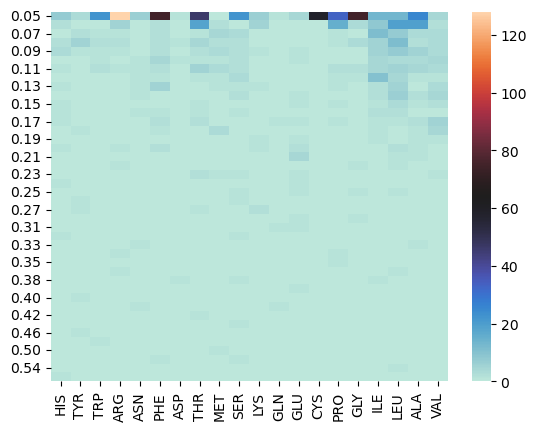

In [424]:
t_sort = {}
for i in sorted(aa_cof.keys(), reverse = False):
    t_sort[i] = aa_cof[i]
    #print(i)
#print(aa_sort)

aa_cofa = {}
for i in t_sort:
    ij = format(float(i), ".2f")
    aa_cofa[ij] =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
      
    for j in t_sort[i]:

        aa_cofa[ij][j] += 1
#print(aa_tun)
dat_tun = pd.DataFrame.from_dict(aa_cofa, orient='index')
sns.heatmap(dat_tun,  cmap = sns.color_palette("icefire", as_cmap=True))

<AxesSubplot:>

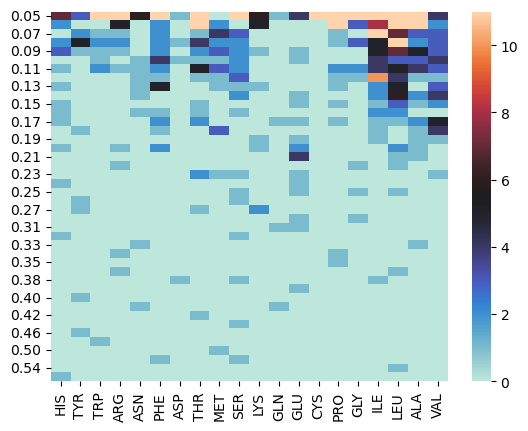

In [410]:
sns.heatmap(dat_tun,  vmax = 11, cmap = sns.color_palette("icefire", as_cmap=True))

In [411]:
#tunely
tunels_aa = {'A0A087X1C5': [['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'LEU 462 A', 'GLY 463 A Backbone', 'GLY 306 A Backbone', 'LEU 302 A', 'LEU 466 A', 'LEU 139 A', 'LEU 462 A Backbone', 'PRO 465 A', 'LEU 466 A Backbone', 'LEU 144 A', 'VAL 136 A Backbone', 'VAL 136 A', 'ARG 132 A', 'CYS 461 A Backbone'], ['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'VAL 308 A', 'LEU 213 A', 'LEU 304 A', 'ALA 305 A Backbone', 'ALA 209 A Backbone', 'GLN 210 A Backbone', 'GLN 210 A', 'THR 312 A', 'THR 504 A', 'LYS 214 A', 'PRO 507 A'], ['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'LEU 304 A', 'GLU 216 A', 'LEU 121 A', 'ASN 301 A', 'GLN 244 A', 'TYR 107 A', 'PHE 112 A', 'LEU 110 A', 'ILE 297 A', 'LEU 248 A', 'LEU 110 A Backbone', 'ARG 296 A', 'LYS 245 A', 'VAL 109 A Backbone'], ['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'LEU 304 A', 'GLU 216 A', 'LEU 121 A', 'ARG 221 A', 'THR 393 A', 'PRO 102 A Backbone', 'ALA 104 A', 'PRO 102 A', 'TYR 107 A', 'LEU 121 A Backbone', 'PHE 112 A', 'ALA 104 A Backbone', 'GLN 117 A', 'ARG 123 A', 'PRO 103 A', 'GLN 108 A'], ['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'LEU 304 A', 'GLU 216 A', 'LEU 121 A', 'ARG 221 A', 'THR 393 A', 'GLU 222 A', 'GLU 216 A Backbone', 'LEU 390 A', 'PHE 51 A', 'THR 54 A', 'SER 217 A Backbone', 'SER 217 A', 'PHE 501 A Backbone', 'PHE 51 A Backbone', 'GLN 52 A', 'VAL 499 A Backbone'], ['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'LEU 304 A', 'GLU 216 A', 'LEU 121 A', 'ARG 221 A', 'THR 393 A', 'GLU 222 A', 'THR 412 A', 'PRO 102 A', 'ASN 225 A', 'PRO 103 A Backbone', 'THR 76 A', 'PRO 103 A', 'ASN 225 A Backbone', 'TRP 75 A Backbone', 'ALA 226 A Backbone', 'HIS 24 A', 'PRO 77 A', 'GLY 410 A Backbone']], 'O15528': [['ARG 107 A', 'CYS 455 A', 'MET 456 A Backbone', 'LEU 127 A', 'CYS 455 A Backbone', 'LEU 126 A', 'MET 456 A', 'LEU 126 A Backbone', 'LEU 127 A Backbone', 'ARG 453 A', 'GLU 130 A', 'CYS 108 A Backbone', 'THR 128 A Backbone', 'THR 114 A', 'SER 109 A Backbone'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'THR 321 A', 'ALA 317 A', 'LEU 127 A', 'TRP 113 A', 'THR 493 A', 'CYS 108 A', 'SER 111 A', 'LEU 127 A Backbone', 'CYS 108 A Backbone', 'GLU 130 A', 'ARG 453 A', 'THR 128 A Backbone', 'THR 114 A', 'SER 109 A Backbone'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'ASN 387 A', 'PRO 447 A Backbone', 'PHE 448 A Backbone', 'GLY 449 A Backbone', 'ARG 453 A Backbone', 'SER 454 A Backbone', 'PHE 450 A Backbone', 'ARG 389 A', 'LEU 410 A', 'LEU 98 A', 'PHE 450 A', 'GLY 451 A Backbone', 'GLU 101 A', 'LEU 98 A Backbone', 'LYS 452 A Backbone', 'LYS 452 A', 'GLU 101 A Backbone'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'PRO 447 A Backbone', 'PHE 448 A Backbone', 'THR 321 A', 'PHE 448 A', 'VAL 383 A', 'THR 325 A', 'ALA 461 A', 'THR 321 A Backbone', 'LEU 465 A', 'LEU 378 A', 'VAL 374 A', 'GLU 462 A', 'LYS 375 A', 'PRO 447 A', 'ARG 458 A', 'SER 445 A Backbone', 'LEU 446 A', 'PRO 442 A Backbone'], ['ARG 107 A', 'CYS 455 A', 'MET 456 A Backbone', 'LEU 127 A', 'CYS 455 A Backbone', 'ALA 317 A', 'MET 456 A', 'GLY 457 A Backbone', 'LEU 314 A', 'ILE 198 A', 'GLY 318 A Backbone', 'LEU 460 A', 'LEU 145 A', 'LEU 293 A', 'LEU 141 A', 'LEU 202 A', 'LEU 297 A', 'LEU 144 A', 'PHE 296 A', 'LEU 293 A Backbone', 'LEU 140 A', 'LEU 297 A Backbone', 'GLU 300 A', 'LEU 140 A Backbone', 'PRO 143 A'], ['ARG 107 A', 'CYS 455 A', 'MET 456 A Backbone', 'LEU 127 A', 'CYS 455 A Backbone', 'MET 456 A', 'ALA 317 A', 'GLY 457 A Backbone', 'LEU 314 A', 'ILE 198 A', 'GLY 318 A Backbone', 'LEU 460 A', 'LEU 145 A', 'LEU 293 A', 'LEU 141 A', 'LEU 202 A', 'LEU 297 A', 'ASN 310 A', 'LEU 137 A', 'LEU 140 A', 'ARG 136 A Backbone', 'ARG 136 A', 'LEU 137 A Backbone', 'LEU 302 A'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'THR 321 A', 'ALA 317 A', 'LEU 127 A', 'TRP 113 A', 'THR 493 A', 'CYS 108 A', 'SER 388 A', 'GLY 386 A Backbone', 'MET 236 A', 'LEU 233 A', 'LEU 61 A', 'THR 409 A', 'TYR 87 A', 'PHE 80 A', 'THR 85 A', 'VAL 83 A', 'PHE 110 A Backbone', 'PHE 110 A', 'MET 236 A Backbone', 'HIS 240 A', 'THR 82 A'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'THR 321 A', 'ALA 317 A', 'LEU 127 A', 'TRP 113 A', 'THR 493 A', 'CYS 108 A', 'SER 388 A', 'GLY 386 A Backbone', 'MET 236 A', 'LEU 233 A', 'LEU 61 A', 'THR 409 A', 'TYR 87 A', 'GLN 65 A', 'LEU 64 A', 'PHE 48 A', 'TRP 76 A', 'LEU 64 A Backbone', 'GLY 68 A Backbone', 'PHE 72 A', 'PRO 43 A', 'GLU 51 A', 'GLN 67 A', 'HIS 71 A', 'SER 47 A'], ['ARG 107 A', 'CYS 455 A', 'VAL 384 A', 'THR 321 A', 'ALA 317 A', 'LEU 127 A', 'PHE 229 A', 'ALA 317 A Backbone', 'LEU 316 A Backbone', 'ASP 320 A', 'VAL 494 A', 'VAL 383 A', 'THR 321 A Backbone', 'ASN 324 A', 'ASP 320 A Backbone', 'LEU 495 A Backbone', 'TYR 381 A Backbone', 'TRP 328 A', 'TYR 381 A', 'LEU 495 A', 'PRO 489 A', 'LEU 380 A Backbone', 'TYR 413 A', 'ARG 417 A', 'HIS 62 A', 'GLU 63 A', 'ARG 488 A', 'PRO 489 A Backbone', 'GLU 498 A', 'ARG 60 A']], 'O43174': [['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'ARG 440 A Backbone', 'CYS 442 A Backbone', 'PHE 435 A Backbone', 'TYR 396 A', 'GLY 436 A Backbone', 'GLY 437 A Backbone', 'LEU 101 A', 'ARG 375 A', 'ARG 440 A', 'LEU 101 A Backbone', 'GLU 104 A', 'LEU 439 A Backbone', 'LEU 439 A', 'LEU 102 A Backbone', 'LEU 102 A', 'GLY 438 A Backbone'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'SER 126 A', 'GLU 296 A', 'LEU 120 A', 'GLU 296 A Backbone', 'CYS 124 A', 'GLN 292 A Backbone', 'THR 295 A', 'ILE 119 A Backbone', 'LEU 120 A Backbone', 'HIS 244 A', 'ARG 240 A', 'GLN 292 A', 'GLY 121 A Backbone', 'THR 118 A Backbone', 'SER 122 A Backbone'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'SER 126 A', 'GLU 296 A', 'LEU 120 A', 'VAL 116 A', 'PHE 222 A', 'PRO 478 A', 'PRO 371 A', 'PRO 478 A Backbone', 'GLY 372 A Backbone', 'PHE 374 A', 'PHE 84 A', 'THR 476 A Backbone', 'ARG 64 A', 'MET 60 A', 'VAL 61 A', 'SER 477 A', 'ARG 219 A Backbone', 'PHE 222 A Backbone'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'SER 126 A', 'GLU 296 A', 'LEU 120 A', 'VAL 116 A', 'LEU 221 A', 'PHE 222 A', 'PRO 478 A', 'THR 218 A Backbone', 'ARG 219 A Backbone', 'LEU 221 A Backbone', 'SER 477 A', 'ARG 219 A', 'TYR 481 A', 'SER 477 A Backbone'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'ARG 440 A Backbone', 'CYS 442 A Backbone', 'PHE 435 A Backbone', 'PRO 434 A Backbone', 'PHE 435 A', 'PRO 369 A', 'ALA 448 A', 'THR 304 A Backbone', 'ALA 308 A', 'LEU 364 A', 'LEU 452 A', 'ALA 448 A Backbone', 'LYS 449 A Backbone', 'LYS 449 A', 'ILE 360 A', 'LYS 361 A', 'GLY 357 A Backbone', 'LYS 453 A', 'ILE 450 A', 'GLU 446 A', 'GLU 351 A'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'SER 126 A', 'GLU 296 A', 'VAL 443 A', 'GLU 296 A Backbone', 'LEU 297 A Backbone', 'LEU 297 A', 'PHE 144 A', 'GLY 444 A Backbone', 'GLY 301 A Backbone', 'PHE 447 A', 'LEU 193 A', 'TYR 152 A', 'ILE 192 A', 'ALA 143 A Backbone', 'ALA 143 A', 'ALA 270 A', 'ILE 140 A Backbone', 'ILE 140 A', 'LEU 274 A', 'ALA 270 A Backbone', 'VAL 139 A', 'LEU 273 A', 'ARG 142 A', 'HIS 277 A', 'LYS 138 A'], ['GLY 300 A Backbone', 'THR 304 A', 'VAL 370 A', 'CYS 442 A', 'PHE 299 A', 'TRP 112 A', 'ARG 440 A Backbone', 'CYS 442 A Backbone', 'TYR 396 A', 'ARG 375 A', 'GLY 373 A Backbone', 'PHE 374 A Backbone', 'PHE 374 A', 'GLY 372 A Backbone', 'ILE 395 A', 'PRO 371 A', 'ARG 90 A', 'MET 60 A', 'PHE 84 A', 'LEU 83 A', 'LEU 68 A', 'PHE 67 A', 'TYR 79 A', 'THR 81 A', 'GLU 56 A', 'LYS 71 A', 'LYS 80 A Backbone', 'TYR 75 A', 'GLY 47 A Backbone', 'THR 48 A Backbone', 'MET 70 A', 'LYS 74 A', 'THR 48 A']], 'O75881': [['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'CYS 449 A Backbone', 'PRO 450 A', 'SER 447 A Backbone', 'LYS 448 A Backbone', 'HIS 139 A', 'THR 446 A Backbone'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'PRO 450 A', 'PHE 111 A', 'HIS 139 A', 'LYS 448 A Backbone', 'THR 446 A Backbone'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'LEU 145 A', 'ALA 292 A Backbone', 'GLY 451 A Backbone', 'PHE 454 A', 'ILE 196 A', 'VAL 263 A', 'LEU 153 A', 'PHE 144 A Backbone', 'GLU 262 A Backbone', 'VAL 263 A Backbone', 'GLU 262 A', 'SER 149 A Backbone', 'ILE 152 A', 'LEU 153 A Backbone', 'SER 261 A Backbone', 'SER 261 A', 'SER 156 A', 'TRP 260 A Backbone'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'ALA 292 A Backbone', 'THR 297 A', 'ALA 455 A', 'PHE 442 A', 'THR 300 A', 'ASN 296 A Backbone', 'THR 297 A Backbone', 'ILE 459 A', 'LEU 360 A', 'ILE 356 A', 'LEU 456 A', 'PHE 357 A', 'ARG 452 A Backbone', 'ARG 452 A', 'PHE 453 A', 'LYS 448 A'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'SER 447 A Backbone', 'PHE 111 A', 'THR 367 A Backbone', 'PHE 489 A', 'LEU 488 A Backbone', 'PHE 114 A', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'LYS 88 A', 'LEU 85 A', 'VAL 227 A Backbone', 'SER 228 A Backbone', 'VAL 227 A', 'ALA 224 A Backbone', 'SER 228 A', 'GLY 86 A Backbone', 'VAL 59 A', 'TYR 225 A', 'ILE 230 A'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'LEU 145 A', 'ALA 292 A Backbone', 'GLY 451 A Backbone', 'SER 293 A Backbone', 'ALA 455 A', 'CYS 449 A', 'THR 297 A', 'ASN 296 A', 'PHE 442 A', 'ASN 296 A Backbone', 'THR 300 A', 'THR 297 A Backbone', 'ILE 459 A', 'LEU 360 A', 'ILE 356 A', 'LEU 456 A', 'PHE 357 A', 'ARG 452 A Backbone', 'ARG 452 A', 'PHE 453 A', 'LYS 448 A'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'SER 447 A Backbone', 'PHE 111 A', 'THR 367 A Backbone', 'PHE 489 A', 'LEU 488 A Backbone', 'PHE 114 A', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'VAL 227 A Backbone', 'LYS 88 A', 'LYS 121 A', 'LYS 117 A', 'PHE 371 A', 'GLY 390 A Backbone'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'GLY 288 A Backbone', 'PHE 289 A Backbone', 'LEU 119 A', 'ARG 267 A', 'HIS 285 A Backbone', 'HIS 285 A', 'LEU 128 A', 'LEU 138 A', 'ASN 135 A', 'HIS 139 A', 'SER 115 A', 'ASN 116 A', 'ARG 112 A', 'PHE 111 A', 'THR 446 A Backbone', 'THR 446 A', 'ASP 136 A', 'HIS 106 A'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'GLY 288 A Backbone', 'PHE 289 A Backbone', 'LEU 119 A', 'ARG 267 A', 'HIS 285 A Backbone', 'HIS 285 A', 'LEU 128 A', 'LEU 138 A', 'ASN 135 A', 'HIS 139 A', 'SER 115 A', 'ASN 116 A', 'ASN 116 A Backbone', 'ILE 125 A Backbone', 'GLN 129 A Backbone', 'GLN 129 A', 'GLU 120 A', 'SER 126 A Backbone'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'PRO 450 A', 'LEU 119 A', 'SER 115 A', 'TYR 142 A', 'GLY 288 A Backbone', 'PHE 289 A Backbone', 'ARG 267 A', 'HIS 285 A Backbone', 'HIS 285 A', 'LEU 128 A', 'LEU 138 A', 'ASN 135 A', 'HIS 139 A', 'ASN 116 A', 'ARG 112 A', 'THR 446 A Backbone', 'THR 446 A', 'ASP 136 A', 'HIS 106 A'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'PRO 450 A', 'LEU 118 A', 'LEU 119 A', 'SER 115 A', 'TYR 142 A', 'GLY 288 A Backbone', 'PHE 289 A Backbone', 'ARG 267 A', 'HIS 285 A Backbone', 'HIS 285 A', 'LEU 128 A', 'LEU 138 A', 'ASN 135 A', 'HIS 139 A', 'ASN 116 A', 'ASN 116 A Backbone', 'ILE 125 A Backbone', 'GLN 129 A Backbone', 'GLN 129 A', 'GLU 120 A', 'SER 126 A Backbone'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'PRO 450 A', 'LEU 118 A', 'LEU 119 A', 'SER 115 A', 'TYR 142 A', 'HIS 139 A', 'PHE 289 A', 'LEU 145 A', 'GLY 451 A Backbone', 'SER 293 A', 'ALA 292 A Backbone', 'PHE 454 A', 'ILE 196 A', 'VAL 263 A', 'LEU 153 A', 'PHE 144 A Backbone', 'GLU 262 A Backbone', 'VAL 263 A Backbone', 'GLU 262 A', 'SER 149 A Backbone', 'ILE 152 A', 'LEU 153 A Backbone', 'SER 261 A Backbone', 'SER 261 A', 'SER 156 A', 'TRP 260 A Backbone'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'PRO 450 A', 'PHE 111 A', 'HIS 139 A', 'LEU 119 A', 'SER 115 A', 'LEU 118 A', 'TRP 291 A', 'CYS 449 A', 'SER 447 A Backbone', 'ASN 296 A', 'THR 367 A Backbone', 'PHE 489 A', 'PHE 114 A', 'LEU 488 A Backbone', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'LYS 88 A', 'LEU 85 A', 'VAL 227 A Backbone', 'VAL 227 A', 'SER 228 A Backbone', 'ALA 224 A Backbone', 'SER 228 A', 'GLY 86 A Backbone', 'VAL 59 A', 'TYR 225 A', 'ILE 230 A'], ['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'SER 447 A Backbone', 'THR 367 A Backbone', 'PHE 489 A', 'LEU 488 A Backbone', 'PHE 114 A', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'ALA 394 A', 'PHE 92 A', 'THR 367 A', 'LEU 85 A', 'VAL 83 A', 'LEU 62 A', 'MET 70 A', 'VAL 58 A', 'PHE 69 A', 'LEU 73 A', 'ILE 49 A'], ['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'PRO 450 A', 'PHE 111 A', 'HIS 139 A', 'LEU 119 A', 'SER 115 A', 'LEU 118 A', 'TRP 291 A', 'CYS 449 A Backbone', 'CYS 449 A', 'SER 447 A Backbone', 'ASN 296 A', 'THR 367 A Backbone', 'PHE 489 A', 'LEU 488 A Backbone', 'PHE 114 A', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'ALA 394 A', 'THR 367 A', 'PHE 92 A', 'LEU 85 A', 'VAL 83 A', 'LEU 62 A', 'MET 70 A', 'VAL 58 A', 'PHE 69 A', 'LEU 73 A', 'ILE 49 A']], 'P04798': [['ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'SER 122 A', 'ILE 458 A Backbone', 'ILE 458 A', 'GLY 459 A Backbone', 'LEU 314 A', 'LEU 142 A', 'LEU 314 A Backbone', 'GLY 318 A Backbone', 'ILE 198 A', 'ILE 462 A', 'THR 461 A Backbone', 'THR 461 A', 'ILE 147 A', 'GLN 139 A', 'LYS 143 A'], ['ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'SER 122 A', 'PHE 123 A', 'ASP 313 A Backbone', 'ASP 313 A', 'PHE 224 A', 'LEU 312 A Backbone', 'GLY 316 A Backbone', 'ALA 317 A Backbone', 'PHE 258 A', 'ASN 255 A', 'SER 116 A', 'ILE 115 A', 'LEU 312 A', 'ASN 255 A Backbone', 'SER 116 A Backbone', 'TYR 259 A', 'ASN 117 A Backbone', 'LEU 114 A Backbone', 'GLU 256 A Backbone', 'GLU 256 A', 'ASN 117 A'], ['ARG 135 A', 'LYS 456 A Backbone', 'CYS 457 A Backbone', 'ILE 458 A', 'SER 122 A', 'ILE 458 A Backbone', 'ARG 455 A Backbone', 'ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'PHE 123 A', 'ASP 313 A Backbone', 'ASP 313 A', 'LEU 312 A Backbone', 'PHE 224 A', 'GLY 316 A Backbone', 'ALA 317 A Backbone', 'PHE 258 A', 'ASN 255 A', 'SER 116 A', 'ILE 115 A', 'LEU 312 A', 'ASN 255 A Backbone', 'SER 116 A Backbone', 'TYR 259 A', 'ASN 117 A Backbone', 'LEU 114 A Backbone', 'GLU 256 A Backbone', 'GLU 256 A', 'ASN 117 A'], ['ILE 386 A', 'CYS 457 A', 'THR 321 A', 'VAL 382 A', 'ALA 317 A', 'LEU 496 A', 'PHE 123 A', 'PHE 224 A', 'GLY 316 A Backbone', 'ALA 317 A Backbone', 'ASP 320 A', 'THR 497 A', 'GLY 225 A Backbone', 'ASN 221 A', 'ASN 221 A Backbone', 'LYS 499 A', 'ASN 222 A Backbone', 'TYR 187 A', 'ASN 222 A', 'HIS 500 A Backbone', 'CYS 502 A', 'ASN 219 A Backbone'], ['ARG 135 A', 'LYS 456 A Backbone', 'CYS 457 A Backbone', 'ILE 458 A', 'SER 122 A', 'ILE 458 A Backbone', 'ARG 455 A Backbone', 'ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'THR 321 A', 'LEU 496 A', 'PHE 123 A', 'PHE 224 A', 'ALA 317 A Backbone', 'GLY 316 A Backbone', 'ASP 320 A', 'THR 497 A', 'GLY 225 A Backbone', 'ASN 221 A', 'ASN 221 A Backbone', 'LYS 499 A', 'ASN 222 A Backbone', 'TYR 187 A', 'ASN 222 A', 'HIS 500 A Backbone', 'CYS 502 A', 'ASN 219 A Backbone'], ['ILE 386 A', 'CYS 457 A', 'THR 321 A', 'VAL 382 A', 'ILE 449 A Backbone', 'PHE 450 A', 'PHE 381 A', 'ALA 463 A', 'THR 321 A Backbone', 'ALA 325 A', 'PHE 376 A', 'VAL 467 A', 'ARG 464 A Backbone', 'ALA 463 A Backbone', 'ILE 372 A', 'PHE 468 A Backbone', 'GLU 369 A', 'ARG 362 A', 'PHE 468 A', 'LEU 365 A Backbone', 'ARG 362 A Backbone', 'SER 363 A Backbone', 'ILE 439 A', 'SER 363 A', 'LYS 441 A'], ['ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'SER 122 A', 'PHE 123 A', 'ASP 313 A Backbone', 'ASP 313 A', 'LEU 312 A Backbone', 'ALA 317 A Backbone', 'PHE 224 A', 'GLY 316 A Backbone', 'PHE 258 A', 'PHE 315 A', 'LEU 312 A', 'PHE 261 A', 'LEU 217 A', 'VAL 218 A', 'LEU 214 A', 'GLU 213 A Backbone', 'LEU 214 A Backbone', 'GLU 213 A', 'LYS 257 A Backbone', 'LYS 257 A'], ['ARG 135 A', 'LYS 456 A Backbone', 'CYS 457 A Backbone', 'ILE 458 A', 'SER 122 A', 'ILE 458 A Backbone', 'ARG 455 A Backbone', 'ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'PHE 123 A', 'ASP 313 A Backbone', 'ASP 313 A', 'LEU 312 A Backbone', 'ALA 317 A Backbone', 'PHE 224 A', 'GLY 316 A Backbone', 'PHE 258 A', 'PHE 315 A', 'LEU 312 A', 'PHE 261 A', 'LEU 217 A', 'VAL 218 A', 'LEU 214 A', 'GLU 213 A Backbone', 'LEU 214 A Backbone', 'GLU 213 A', 'LYS 257 A Backbone', 'LYS 257 A'], ['ARG 135 A', 'LYS 456 A Backbone', 'CYS 457 A Backbone', 'ILE 458 A', 'SER 122 A', 'ILE 458 A Backbone', 'ARG 455 A Backbone', 'ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'THR 321 A', 'VAL 382 A', 'ILE 449 A Backbone', 'PHE 450 A', 'PHE 381 A', 'ALA 463 A', 'THR 321 A Backbone', 'ALA 325 A', 'PHE 376 A', 'VAL 467 A', 'ARG 464 A Backbone', 'ALA 463 A Backbone', 'ILE 372 A', 'PHE 468 A Backbone', 'GLU 369 A', 'ARG 362 A', 'PHE 468 A', 'LEU 365 A Backbone', 'ARG 362 A Backbone', 'SER 363 A Backbone', 'ILE 439 A', 'SER 363 A', 'LYS 441 A'], ['ILE 386 A', 'CYS 457 A', 'THR 321 A', 'VAL 382 A', 'ILE 449 A Backbone', 'PHE 450 A', 'PHE 381 A', 'ALA 463 A', 'THR 321 A Backbone', 'ALA 325 A', 'PHE 376 A', 'VAL 467 A', 'ARG 464 A Backbone', 'ALA 463 A Backbone', 'ILE 372 A', 'PHE 468 A Backbone', 'GLU 369 A', 'ARG 464 A', 'LEU 373 A', 'LEU 373 A Backbone', 'VAL 447 A', 'ILE 449 A', 'VAL 447 A Backbone', 'GLU 460 A', 'GLY 451 A Backbone', 'ILE 448 A', 'GLU 445 A Backbone', 'LYS 456 A', 'MET 452 A', 'GLU 445 A', 'ARG 93 A'], ['ARG 135 A', 'LYS 456 A Backbone', 'CYS 457 A Backbone', 'ILE 458 A', 'SER 122 A', 'ILE 458 A Backbone', 'ARG 455 A Backbone', 'ILE 386 A', 'CYS 457 A', 'ALA 317 A', 'THR 321 A', 'VAL 382 A', 'ILE 449 A Backbone', 'PHE 450 A', 'PHE 381 A', 'ALA 463 A', 'THR 321 A Backbone', 'ALA 325 A', 'PHE 376 A', 'VAL 467 A', 'ARG 464 A Backbone', 'ALA 463 A Backbone', 'ILE 372 A', 'PHE 468 A Backbone', 'GLU 369 A', 'ARG 464 A', 'LEU 373 A', 'LEU 373 A Backbone', 'VAL 447 A', 'ILE 449 A', 'VAL 447 A Backbone', 'GLU 460 A', 'GLY 451 A Backbone', 'ILE 448 A', 'GLU 445 A Backbone', 'LYS 456 A', 'MET 452 A', 'GLU 445 A', 'ARG 93 A']], 'P05093': [['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'VAL 366 A', 'VAL 482 A Backbone', 'VAL 482 A', 'MET 369 A Backbone', 'ILE 371 A Backbone', 'PRO 372 A', 'MET 369 A', 'LEU 209 A Backbone', 'SER 210 A Backbone', 'LYS 481 A Backbone', 'SER 210 A', 'PRO 480 A Backbone', 'MET 49 A', 'ASP 212 A', 'GLY 47 A Backbone', 'HIS 48 A'], ['ILE 371 A', 'CYS 442 A', 'ARG 440 A Backbone', 'LEU 370 A', 'PHE 435 A Backbone', 'CYS 442 A Backbone', 'ARG 96 A', 'ILE 371 A Backbone', 'HIS 373 A', 'LEU 86 A', 'GLY 436 A Backbone', 'ALA 437 A Backbone', 'ARG 440 A', 'LEU 86 A Backbone', 'PRO 439 A', 'GLY 90 A Backbone', 'SER 94 A', 'TRP 121 A', 'SER 117 A', 'GLN 122 A', 'LYS 91 A'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'VAL 366 A', 'VAL 482 A Backbone', 'VAL 482 A', 'MET 369 A Backbone', 'ILE 371 A Backbone', 'PRO 372 A', 'LEU 370 A Backbone', 'MET 369 A', 'LEU 209 A Backbone', 'MET 99 A', 'ASP 212 A', 'ILE 393 A', 'MET 68 A', 'LEU 217 A', 'GLU 391 A', 'ASP 216 A Backbone', 'LYS 71 A', 'LEU 217 A Backbone', 'MET 68 A Backbone'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'ALA 302 A', 'VAL 482 A', 'VAL 483 A', 'PHE 114 A', 'GLY 301 A Backbone', 'ALA 302 A Backbone', 'ILE 206 A', 'LEU 209 A', 'ILE 205 A', 'ASN 202 A', 'ARG 239 A', 'GLY 297 A Backbone', 'ASP 298 A Backbone', 'THR 294 A Backbone', 'LEU 293 A Backbone', 'ASN 107 A', 'ASN 240 A', 'LEU 293 A', 'ASN 290 A'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'LEU 370 A', 'PRO 434 A Backbone', 'VAL 366 A', 'PHE 435 A', 'THR 306 A', 'ALA 448 A', 'VAL 310 A', 'LEU 452 A', 'LEU 361 A', 'ARG 449 A Backbone', 'ALA 448 A Backbone', 'ARG 449 A', 'ILE 357 A', 'GLU 354 A', 'ARG 358 A', 'TYR 432 A', 'PRO 434 A', 'TYR 432 A Backbone', 'GLU 445 A', 'GLY 436 A Backbone'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'VAL 366 A', 'VAL 482 A Backbone', 'VAL 482 A', 'MET 369 A Backbone', 'ILE 371 A Backbone', 'PRO 372 A', 'MET 369 A', 'LEU 209 A Backbone', 'MET 99 A', 'ASP 212 A', 'ILE 393 A', 'LEU 217 A', 'MET 68 A', 'LEU 40 A', 'LEU 214 A'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'ALA 302 A', 'VAL 482 A', 'VAL 483 A', 'PHE 114 A', 'GLY 301 A Backbone', 'ALA 302 A Backbone', 'ILE 206 A', 'LEU 209 A', 'ILE 205 A', 'ASN 202 A', 'ARG 239 A', 'GLY 297 A Backbone', 'TYR 201 A', 'PHE 300 A', 'LEU 243 A', 'ARG 239 A Backbone', 'LEU 242 A', 'ILE 238 A Backbone', 'VAL 197 A', 'ILE 238 A'], ['ILE 371 A', 'CYS 442 A', 'ALA 367 A', 'THR 306 A', 'VAL 366 A', 'VAL 482 A Backbone', 'VAL 482 A', 'MET 369 A Backbone', 'ILE 371 A Backbone', 'PRO 372 A', 'LEU 370 A Backbone', 'MET 369 A', 'LEU 209 A Backbone', 'MET 99 A', 'ASP 212 A', 'ASP 216 A', 'LYS 211 A Backbone', 'ASP 212 A Backbone', 'SER 213 A Backbone', 'THR 101 A', 'ASN 208 A Backbone', 'SER 213 A', 'THR 228 A', 'LYS 211 A', 'LEU 214 A Backbone', 'ASN 226 A']], 'P05177': [['THR 124 A', 'ILE 386 A', 'CYS 458 A', 'LEU 382 A', 'THR 321 A', 'ALA 317 A', 'LEU 497 A', 'PHE 125 A', 'PHE 226 A', 'ALA 317 A Backbone', 'GLY 316 A Backbone', 'ASN 312 A Backbone', 'ASP 313 A Backbone', 'ILE 117 A', 'THR 118 A', 'PHE 260 A', 'ASN 257 A', 'ASN 257 A Backbone', 'LEU 261 A Backbone', 'LEU 261 A', 'ASN 312 A', 'LEU 264 A', 'GLN 265 A', 'ASN 309 A', 'ASP 119 A', 'GLU 305 A Backbone', 'GLU 305 A', 'VAL 268 A', 'GLN 269 A'], ['THR 124 A', 'ILE 386 A', 'CYS 458 A', 'ALA 317 A', 'ILE 459 A Backbone', 'ILE 459 A', 'GLY 460 A Backbone', 'LEU 144 A', 'ILE 314 A Backbone', 'GLY 318 A Backbone', 'ALA 317 A Backbone', 'THR 321 A', 'ALA 464 A', 'VAL 322 A', 'PHE 451 A', 'PHE 381 A', 'THR 321 A Backbone', 'ILE 468 A', 'PHE 376 A', 'LYS 465 A Backbone', 'ALA 464 A Backbone', 'ILE 372 A', 'PHE 469 A Backbone', 'GLU 369 A', 'ARG 362 A', 'LYS 465 A', 'LEU 373 A', 'SER 445 A', 'GLU 446 A', 'LYS 442 A']], 'P05181': [['LEU 368 A', 'CYS 437 A', 'ALA 438 A Backbone', 'ILE 115 A', 'ALA 299 A', 'ALA 438 A', 'LEU 296 A', 'GLY 439 A Backbone', 'GLY 300 A Backbone', 'ILE 180 A', 'LEU 133 A', 'LEU 442 A', 'LEU 442 A Backbone', 'ARG 134 A Backbone', 'GLY 441 A Backbone', 'LEU 133 A Backbone', 'ASN 143 A', 'ARG 134 A'], ['LEU 368 A', 'CYS 437 A', 'VAL 364 A', 'THR 303 A', 'ALA 299 A', 'PHE 478 A', 'ASN 367 A Backbone', 'PRO 369 A', 'LEU 368 A Backbone', 'LEU 103 A', 'GLN 216 A', 'PHE 478 A Backbone', 'SER 366 A', 'ASN 219 A', 'VAL 390 A', 'MET 77 A', 'VAL 388 A', 'ASN 220 A', 'ASP 102 A Backbone', 'GLN 75 A', 'ASN 219 A Backbone', 'ASP 102 A', 'PRO 222 A', 'ASN 220 A Backbone', 'SER 74 A']], 'P08684': [['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'THR 309 A', 'ALA 305 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'ILE 301 A', 'PHE 108 A', 'GLY 481 A Backbone', 'ALA 370 A Backbone', 'GLU 374 A', 'PHE 215 A', 'ARG 106 A', 'THR 224 A', 'PRO 107 A Backbone', 'PHE 108 A Backbone', 'GLN 79 A', 'ASP 76 A Backbone', 'THR 224 A Backbone', 'ILE 223 A Backbone', 'PRO 227 A'], ['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'THR 309 A', 'ALA 305 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'PHE 108 A', 'GLY 481 A Backbone', 'ALA 370 A Backbone', 'PHE 213 A', 'LEU 211 A Backbone', 'LEU 482 A Backbone', 'PHE 213 A Backbone', 'GLN 484 A', 'GLY 480 A Backbone', 'SER 478 A'], ['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'ALA 305 A', 'THR 309 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'ILE 301 A', 'PHE 108 A', 'PHE 213 A', 'PHE 241 A', 'LEU 210 A Backbone', 'LEU 210 A', 'PRO 242 A', 'LYS 209 A Backbone', 'VAL 240 A Backbone', 'ARG 212 A Backbone', 'ARG 212 A', 'ASP 217 A'], ['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'THR 309 A', 'ALA 305 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'ILE 369 A', 'ALA 370 A Backbone', 'GLU 308 A', 'LEU 483 A Backbone', 'SER 312 A', 'GLN 484 A', 'PHE 316 A', 'GLN 484 A Backbone', 'PRO 485 A', 'SER 312 A Backbone', 'SER 315 A', 'LYS 173 A', 'PRO 488 A Backbone', 'VAL 489 A Backbone', 'PRO 488 A', 'THR 171 A', 'ASP 174 A'], ['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'THR 309 A', 'ALA 305 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'PHE 108 A', 'GLY 481 A Backbone', 'ALA 370 A Backbone', 'GLU 374 A', 'PHE 215 A', 'MET 371 A', 'PHE 57 A', 'ARG 372 A', 'ARG 106 A', 'ASP 76 A', 'TYR 53 A', 'THR 224 A', 'ILE 50 A', 'LEU 216 A', 'ILE 50 A Backbone', 'PHE 215 A Backbone', 'LEU 221 A', 'LEU 51 A']], 'P08686': [['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'SER 108 A', 'LEU 429 A Backbone', 'ARG 426 A Backbone', 'CYS 428 A Backbone', 'VAL 427 A Backbone', 'LEU 429 A', 'SER 108 A Backbone', 'LYS 120 A', 'LEU 107 A', 'ARG 124 A', 'VAL 427 A', 'TRP 85 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'ASP 287 A', 'SER 108 A', 'LEU 107 A', 'SER 108 A Backbone', 'LYS 120 A', 'ARG 124 A', 'LEU 429 A Backbone', 'CYS 428 A Backbone', 'VAL 427 A', 'TRP 85 A'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'TRP 201 A', 'ILE 290 A', 'LEU 198 A', 'ILE 470 A', 'ILE 290 A Backbone', 'SER 202 A', 'LYS 472 A', 'LYS 199 A Backbone', 'GLU 294 A', 'GLN 195 A', 'LYS 199 A', 'GLU 162 A'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'ALA 362 A Backbone', 'SER 468 A Backbone', 'VAL 469 A Backbone', 'LEU 361 A', 'PRO 360 A', 'CYS 467 A Backbone', 'PRO 45 A', 'LEU 44 A', 'LEU 39 A Backbone', 'LEU 39 A', 'SER 468 A', 'GLN 207 A', 'TRP 204 A', 'ILE 208 A', 'LEU 40 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'LEU 288 A Backbone', 'GLY 292 A Backbone', 'GLY 291 A Backbone', 'CYS 428 A', 'THR 295 A', 'ALA 434 A', 'PHE 421 A', 'THR 296 A', 'THR 296 A Backbone', 'THR 295 A Backbone', 'THR 299 A', 'LEU 438 A', 'LEU 353 A', 'ARG 435 A', 'ILE 349 A', 'ASN 346 A', 'TYR 336 A', 'ARG 339 A', 'LYS 414 A', 'ARG 417 A'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'TRP 201 A', 'SER 108 A', 'ILE 290 A', 'ASP 287 A', 'LEU 109 A', 'VAL 100 A', 'ASP 106 A', 'ARG 233 A', 'VAL 286 A', 'MET 283 A', 'SER 101 A Backbone', 'SER 101 A', 'TYR 97 A Backbone', 'TYR 97 A', 'LEU 109 A Backbone', 'GLU 93 A', 'GLY 110 A Backbone', 'ASP 111 A Backbone', 'ASP 111 A', 'ARG 366 A', 'ARG 91 A Backbone'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'ALA 362 A Backbone', 'SER 468 A Backbone', 'VAL 469 A Backbone', 'LEU 361 A', 'PRO 360 A', 'CYS 467 A Backbone', 'PRO 45 A', 'LEU 471 A', 'LEU 464 A Backbone', 'ASP 43 A Backbone', 'PRO 465 A Backbone', 'ASP 43 A', 'GLN 389 A', 'PRO 463 A', 'ILE 46 A', 'GLN 462 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'GLY 291 A Backbone', 'CYS 428 A', 'SER 108 A', 'LEU 429 A Backbone', 'LEU 363 A', 'VAL 359 A', 'THR 295 A', 'VAL 469 A', 'TRP 201 A', 'ILE 290 A', 'LEU 198 A', 'ILE 290 A Backbone', 'ILE 470 A', 'SER 202 A', 'LYS 472 A', 'LYS 199 A Backbone', 'GLU 294 A', 'GLN 195 A', 'LYS 199 A', 'GLU 162 A'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'ALA 420 A Backbone', 'PHE 421 A Backbone', 'PHE 421 A', 'VAL 358 A', 'LEU 353 A', 'THR 299 A', 'LEU 438 A', 'ARG 435 A', 'ILE 349 A', 'ASN 346 A', 'TYR 336 A', 'ARG 339 A', 'LYS 414 A', 'ARG 417 A'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'TRP 201 A', 'SER 108 A', 'LEU 109 A', 'TYR 97 A', 'PRO 364 A', 'GLN 207 A', 'SER 468 A Backbone', 'SER 468 A', 'LEU 39 A', 'VAL 211 A', 'ASP 210 A', 'PRO 94 A', 'GLN 66 A', 'ASP 210 A Backbone', 'PRO 92 A', 'GLU 93 A Backbone', 'PRO 94 A Backbone'], ['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'VAL 469 A', 'TRP 201 A', 'SER 108 A', 'LEU 109 A', 'TYR 97 A', 'PRO 364 A', 'GLN 207 A', 'SER 468 A Backbone', 'SER 468 A', 'LEU 39 A', 'VAL 211 A', 'ILE 385 A', 'LEU 63 A', 'VAL 68 A', 'VAL 383 A', 'GLN 66 A', 'LEU 63 A Backbone', 'ASP 210 A Backbone', 'VAL 211 A Backbone', 'PRO 213 A', 'LEU 65 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'GLY 291 A Backbone', 'CYS 428 A', 'SER 108 A', 'LEU 429 A Backbone', 'LEU 363 A', 'VAL 359 A', 'THR 295 A', 'VAL 469 A', 'ALA 362 A Backbone', 'SER 468 A Backbone', 'VAL 469 A Backbone', 'LEU 361 A', 'PRO 360 A', 'CYS 467 A Backbone', 'PRO 45 A', 'LEU 44 A', 'LEU 39 A Backbone', 'LEU 39 A', 'SER 468 A', 'GLN 207 A', 'TRP 204 A', 'ILE 208 A', 'LEU 40 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'GLY 291 A Backbone', 'CYS 428 A', 'SER 108 A', 'LEU 429 A Backbone', 'LEU 363 A', 'VAL 359 A', 'THR 295 A', 'VAL 469 A', 'TRP 201 A', 'ILE 290 A', 'ASP 287 A', 'LEU 109 A', 'ASP 106 A', 'VAL 100 A', 'ARG 233 A', 'VAL 286 A', 'MET 283 A', 'SER 101 A Backbone', 'SER 101 A', 'TYR 97 A Backbone', 'TYR 97 A', 'LEU 109 A Backbone', 'GLU 93 A', 'GLY 110 A Backbone', 'PRO 105 A Backbone', 'ASP 106 A Backbone', 'PRO 105 A', 'ASP 111 A Backbone', 'ASP 111 A', 'SER 113 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'GLY 291 A Backbone', 'CYS 428 A', 'SER 108 A', 'LEU 429 A Backbone', 'LEU 363 A', 'THR 295 A', 'VAL 359 A', 'VAL 469 A', 'ALA 362 A Backbone', 'SER 468 A Backbone', 'VAL 469 A Backbone', 'LEU 361 A', 'PRO 360 A', 'CYS 467 A Backbone', 'PRO 45 A', 'LEU 471 A', 'ASP 43 A Backbone', 'LEU 464 A Backbone', 'PRO 465 A Backbone', 'ASP 43 A', 'GLN 389 A', 'PRO 463 A', 'ILE 46 A', 'GLN 462 A'], ['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'GLY 291 A Backbone', 'CYS 428 A', 'SER 108 A', 'LEU 429 A Backbone', 'LEU 363 A', 'VAL 359 A', 'THR 295 A', 'VAL 469 A', 'TRP 201 A', 'LEU 109 A', 'TYR 97 A', 'PRO 364 A', 'GLN 207 A', 'SER 468 A Backbone', 'SER 468 A', 'LEU 39 A', 'VAL 211 A', 'ASP 210 A', 'PRO 94 A', 'GLN 66 A', 'ASP 210 A Backbone', 'PRO 92 A', 'GLU 93 A Backbone', 'PRO 94 A Backbone']], 'P10632': [['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'SER 103 A', 'SER 114 A', 'ARG 97 A', 'GLY 98 A Backbone', 'ASN 99 A', 'SER 114 A Backbone', 'ARG 97 A Backbone', 'ASN 116 A', 'GLY 109 A Backbone', 'GLN 104 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'ILE 113 A', 'ALA 436 A Backbone', 'ALA 436 A', 'ILE 112 A', 'ASP 293 A Backbone', 'LEU 294 A', 'GLY 437 A Backbone', 'GLY 298 A Backbone', 'ILE 178 A', 'LEU 440 A', 'LEU 131 A', 'GLY 439 A Backbone', 'ARG 132 A Backbone', 'LEU 440 A Backbone', 'ARG 132 A', 'LEU 128 A Backbone', 'LEU 128 A', 'GLU 438 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'SER 103 A', 'SER 100 A', 'PRO 367 A', 'ASN 217 A', 'GLN 214 A', 'MET 388 A', 'ILE 74 A', 'ASN 99 A Backbone', 'ASN 72 A', 'PHE 69 A', 'ASN 218 A', 'PRO 101 A', 'ASN 217 A Backbone', 'SER 100 A Backbone', 'PRO 220 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'THR 107 A', 'ILE 106 A', 'ASP 293 A', 'ALA 292 A', 'VAL 237 A', 'ILE 106 A Backbone', 'ARG 241 A', 'GLY 289 A Backbone', 'THR 107 A Backbone', 'LEU 110 A', 'LYS 108 A', 'ARG 105 A Backbone'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'PRO 427 A Backbone', 'PHE 428 A', 'LEU 361 A', 'THR 305 A', 'THR 302 A Backbone', 'ALA 441 A', 'THR 301 A Backbone', 'LEU 445 A', 'GLN 356 A', 'ALA 441 A Backbone', 'ARG 442 A Backbone', 'ARG 442 A', 'VAL 352 A', 'HIS 353 A', 'ASP 349 A', 'ARG 342 A', 'LYS 421 A', 'PHE 419 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'SER 103 A', 'SER 100 A', 'PRO 367 A', 'ASN 217 A', 'GLN 214 A', 'MET 388 A', 'ILE 50 A', 'PHE 69 A', 'VAL 47 A', 'MET 42 A', 'VAL 215 A', 'LEU 43 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'ILE 113 A', 'ALA 436 A Backbone', 'ALA 436 A', 'ILE 112 A', 'ASP 293 A Backbone', 'LEU 294 A', 'GLY 437 A Backbone', 'GLY 298 A Backbone', 'ILE 178 A', 'LEU 440 A', 'LEU 131 A', 'VAL 181 A', 'ILE 141 A', 'PHE 134 A', 'ARG 144 A', 'VAL 181 A Backbone', 'SER 180 A Backbone', 'ARG 261 A Backbone', 'ASP 262 A Backbone', 'GLN 184 A', 'ARG 139 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'THR 107 A', 'ILE 106 A', 'ASP 293 A', 'ASN 204 A', 'PHE 201 A Backbone', 'PHE 201 A', 'GLU 300 A', 'VAL 296 A Backbone', 'THR 299 A', 'MET 198 A Backbone', 'MET 198 A', 'GLY 171 A Backbone', 'ASN 202 A', 'THR 167 A Backbone', 'PHE 168 A', 'LYS 199 A Backbone', 'LEU 195 A Backbone', 'LEU 195 A', 'CYS 172 A'], ['ALA 297 A', 'THR 301 A', 'CYS 435 A', 'VAL 366 A', 'VAL 362 A', 'ILE 113 A', 'PHE 205 A', 'VAL 296 A', 'LEU 208 A', 'ILE 476 A', 'THR 107 A', 'ILE 106 A', 'ASP 293 A', 'VAL 237 A', 'ASN 204 A', 'ALA 292 A', 'THR 240 A', 'PHE 201 A', 'ALA 292 A Backbone', 'ILE 244 A', 'PHE 295 A', 'LEU 197 A', 'TYR 243 A', 'THR 240 A Backbone', 'ARG 200 A', 'ASN 193 A Backbone', 'ASN 193 A', 'LEU 239 A', 'GLU 246 A']], 'P10635': [['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'VAL 370 A', 'THR 309 A', 'PHE 483 A', 'ALA 305 A Backbone', 'ALA 305 A', 'SER 304 A Backbone', 'LEU 213 A', 'LEU 484 A', 'LEU 484 A Backbone', 'ALA 482 A', 'PHE 483 A Backbone', 'LYS 214 A', 'SER 486 A', 'VAL 480 A'], ['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'ARG 441 A Backbone', 'CYS 443 A Backbone', 'ARG 101 A', 'ALA 305 A', 'LEU 444 A', 'GLY 445 A Backbone', 'GLY 306 A Backbone', 'LEU 302 A', 'LEU 448 A', 'ILE 186 A', 'LEU 139 A', 'LEU 444 A Backbone', 'PRO 447 A', 'LEU 448 A Backbone', 'VAL 136 A Backbone', 'VAL 136 A', 'ARG 132 A'], ['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'VAL 370 A', 'THR 309 A', 'PHE 483 A', 'ALA 305 A Backbone', 'ALA 305 A', 'SER 304 A Backbone', 'LEU 213 A', 'LEU 484 A', 'SER 304 A', 'GLU 216 A', 'ASP 301 A', 'GLN 244 A', 'ALA 300 A', 'LEU 110 A', 'LEU 248 A', 'PHE 112 A', 'ILE 297 A', 'LEU 110 A Backbone', 'ARG 296 A', 'GLU 293 A Backbone', 'GLU 293 A', 'GLY 111 A Backbone'], ['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'VAL 370 A', 'THR 309 A', 'PHE 483 A', 'ALA 305 A Backbone', 'ALA 305 A', 'SER 304 A Backbone', 'LEU 213 A', 'LEU 484 A', 'SER 304 A', 'VAL 308 A', 'ALA 209 A Backbone', 'ALA 209 A', 'MET 307 A', 'GLN 210 A Backbone', 'GLN 210 A', 'ASP 179 A', 'LEU 206 A', 'GLY 176 A Backbone', 'LYS 180 A', 'LEU 203 A'], ['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'VAL 370 A', 'THR 309 A', 'PHE 483 A', 'ALA 305 A Backbone', 'ALA 305 A', 'SER 304 A Backbone', 'LEU 213 A', 'LEU 484 A', 'SER 304 A', 'GLU 216 A', 'LEU 121 A', 'THR 375 A', 'ARG 221 A', 'VAL 104 A', 'PRO 102 A Backbone', 'PRO 102 A', 'ARG 101 A', 'LEU 121 A Backbone', 'THR 107 A', 'PHE 112 A', 'VAL 104 A Backbone', 'ARG 123 A', 'GLN 117 A', 'PRO 103 A Backbone', 'PRO 103 A', 'GLN 108 A'], ['PHE 120 A', 'CYS 443 A', 'VAL 374 A', 'VAL 370 A', 'THR 309 A', 'PHE 483 A', 'ALA 305 A Backbone', 'ALA 305 A', 'SER 304 A Backbone', 'LEU 213 A', 'LEU 484 A', 'SER 304 A', 'GLU 216 A', 'LEU 121 A', 'THR 375 A', 'GLU 216 A Backbone', 'GLU 222 A', 'THR 394 A', 'PRO 102 A', 'PRO 103 A Backbone', 'ASN 225 A', 'THR 76 A', 'PRO 103 A', 'ASN 225 A Backbone', 'ALA 226 A Backbone', 'TRP 75 A Backbone', 'HIS 24 A']], 'P11509': [['LEU 370 A', 'CYS 439 A', 'VAL 117 A', 'ARG 101 A', 'CYS 439 A Backbone', 'ARG 437 A Backbone', 'ASN 438 A Backbone', 'PHE 440 A', 'VAL 116 A Backbone', 'VAL 117 A Backbone', 'ARG 437 A', 'ARG 128 A', 'VAL 116 A', 'ALA 124 A Backbone', 'LYS 125 A Backbone', 'LYS 125 A', 'LYS 436 A Backbone', 'LYS 436 A', 'ARG 129 A'], ['LEU 370 A', 'CYS 439 A', 'VAL 117 A', 'GLY 301 A Backbone', 'ASN 297 A Backbone', 'PHE 440 A', 'LEU 298 A', 'GLY 302 A Backbone', 'GLY 441 A Backbone', 'ILE 182 A', 'LEU 444 A', 'LEU 135 A', 'VAL 140 A', 'PHE 440 A Backbone', 'ILE 132 A Backbone', 'ARG 136 A', 'ILE 132 A', 'GLY 443 A Backbone'], ['LEU 370 A', 'CYS 439 A', 'VAL 117 A', 'GLY 301 A Backbone', 'THR 305 A', 'PHE 209 A', 'PHE 480 A', 'PHE 118 A', 'PHE 107 A', 'ILE 300 A', 'GLN 104 A', 'ALA 371 A Backbone', 'GLY 102 A Backbone', 'GLU 103 A Backbone', 'GLN 104 A Backbone', 'ASP 108 A', 'PHE 118 A Backbone', 'GLU 103 A', 'ASN 120 A', 'ARG 373 A', 'GLY 113 A Backbone', 'LYS 112 A Backbone']], 'P11511': [['ARG 115 A', 'CYS 437 A', 'ALA 438 A Backbone', 'ILE 133 A', 'THR 310 A', 'VAL 370 A', 'TRP 224 A', 'LEU 477 A', 'SER 478 A', 'PHE 221 A', 'ASP 309 A Backbone', 'VAL 369 A', 'VAL 313 A', 'HIS 480 A', 'GLN 218 A', 'ASP 222 A', 'ILE 474 A', 'GLU 483 A', 'THR 484 A'], ['ARG 115 A', 'CYS 437 A', 'VAL 370 A', 'PRO 429 A Backbone', 'PHE 430 A', 'THR 310 A', 'MET 364 A', 'SER 314 A', 'VAL 369 A', 'VAL 370 A Backbone', 'PRO 368 A Backbone', 'VAL 369 A Backbone', 'PRO 368 A', 'PRO 429 A', 'MET 364 A Backbone', 'HIS 402 A', 'ILE 398 A', 'GLY 399 A Backbone', 'ARG 365 A Backbone', 'ARG 403 A', 'TYR 366 A Backbone', 'LEU 479 A', 'HIS 475 A']], 'P11712': [['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'VAL 113 A', 'VAL 436 A', 'ILE 112 A', 'ASP 293 A Backbone', 'LEU 294 A', 'GLY 298 A Backbone', 'GLY 437 A Backbone', 'ILE 178 A', 'LEU 440 A', 'LEU 131 A', 'VAL 436 A Backbone', 'ALA 439 A', 'LEU 440 A Backbone', 'ARG 132 A Backbone', 'ARG 132 A', 'LEU 128 A Backbone', 'LEU 128 A'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 476 A', 'LEU 208 A', 'ALA 297 A Backbone', 'GLY 296 A Backbone', 'ILE 205 A', 'GLU 300 A', 'ALA 477 A', 'LEU 361 A', 'GLU 300 A Backbone', 'THR 301 A Backbone', 'THR 304 A', 'SER 478 A Backbone', 'VAL 479 A', 'PRO 480 A', 'ARG 307 A', 'LYS 206 A', 'ASN 202 A Backbone', 'VAL 472 A'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 428 A Backbone', 'PRO 427 A Backbone', 'PHE 428 A', 'LEU 361 A', 'THR 305 A', 'ALA 441 A', 'LEU 445 A', 'GLN 356 A', 'ALA 441 A Backbone', 'GLY 442 A Backbone', 'VAL 352 A', 'HIS 353 A', 'PHE 425 A', 'LYS 421 A', 'GLU 438 A'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 476 A', 'LEU 208 A', 'ALA 297 A Backbone', 'VAL 113 A', 'ASP 293 A', 'GLY 296 A Backbone', 'VAL 292 A Backbone', 'MET 240 A', 'VAL 237 A', 'VAL 292 A', 'ASN 107 A', 'PHE 114 A', 'LEU 233 A', 'ALA 103 A', 'ALA 106 A', 'LEU 102 A Backbone', 'ALA 103 A Backbone', 'LEU 102 A', 'LEU 234 A', 'LEU 234 A Backbone', 'ARG 105 A Backbone', 'ALA 106 A Backbone', 'ALA 238 A', 'ARG 108 A', 'LYS 241 A', 'GLU 288 A'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 476 A', 'LEU 208 A', 'ALA 297 A Backbone', 'VAL 113 A', 'ASP 293 A', 'GLY 296 A Backbone', 'VAL 292 A Backbone', 'MET 240 A', 'VAL 237 A', 'VAL 292 A', 'ASN 107 A', 'PHE 114 A', 'ASN 289 A', 'PHE 110 A Backbone', 'VAL 113 A Backbone', 'PHE 114 A Backbone', 'GLY 109 A Backbone', 'ALA 103 A Backbone', 'GLU 104 A Backbone', 'GLU 104 A', 'ARG 108 A Backbone'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 428 A Backbone', 'SER 429 A', 'SER 365 A', 'PRO 427 A Backbone', 'LEU 391 A', 'SER 429 A Backbone', 'SER 365 A Backbone', 'LEU 366 A Backbone', 'PHE 476 A', 'THR 364 A', 'GLY 475 A Backbone', 'GLN 214 A', 'PHE 476 A Backbone', 'ILE 50 A', 'ASN 474 A Backbone', 'PRO 363 A', 'SER 51 A', 'ILE 50 A Backbone', 'ASN 474 A', 'SER 51 A Backbone', 'ASP 49 A Backbone', 'LYS 48 A Backbone', 'ASP 49 A', 'THR 470 A', 'PRO 471 A Backbone'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 476 A', 'LEU 208 A', 'ALA 297 A Backbone', 'VAL 113 A', 'ASP 293 A', 'GLY 296 A Backbone', 'VAL 292 A Backbone', 'VAL 237 A', 'MET 240 A', 'VAL 292 A', 'PHE 295 A', 'ILE 244 A', 'MET 240 A Backbone', 'TYR 243 A', 'LEU 197 A', 'PHE 183 A', 'CYS 179 A', 'PHE 187 A', 'PHE 194 A', 'PHE 194 A Backbone', 'GLN 193 A Backbone', 'GLN 193 A', 'LYS 185 A', 'LYS 247 A'], ['ALA 297 A', 'THR 301 A', 'LEU 362 A', 'LEU 366 A', 'CYS 435 A', 'PHE 428 A Backbone', 'SER 429 A', 'SER 365 A', 'PRO 427 A Backbone', 'LEU 391 A', 'SER 429 A Backbone', 'SER 365 A Backbone', 'LEU 366 A Backbone', 'PHE 476 A', 'THR 364 A', 'GLY 475 A Backbone', 'PRO 367 A', 'PHE 100 A', 'GLN 214 A', 'LEU 388 A', 'ILE 74 A', 'ASN 218 A', 'ILE 99 A Backbone', 'ASN 217 A Backbone', 'THR 386 A', 'ILE 99 A', 'LYS 72 A', 'ASN 218 A Backbone', 'PRO 101 A', 'SER 220 A Backbone', 'SER 220 A', 'PRO 221 A']], 'P13584': [['GLU 315 A', 'CYS 453 A', 'THR 319 A', 'VAL 380 A', 'PHE 314 A', 'LEU 127 A', 'PHE 118 A', 'LEU 490 A', 'TYR 115 A', 'VAL 383 A', 'GLN 382 A Backbone', 'VAL 114 A', 'TYR 384 A', 'LEU 226 A', 'GLN 223 A', 'LEU 490 A Backbone', 'GLN 382 A', 'VAL 227 A', 'PHE 85 A', 'ILE 61 A', 'PRO 488 A', 'ILE 61 A Backbone', 'GLN 62 A Backbone', 'PRO 488 A Backbone', 'GLN 224 A', 'MET 487 A', 'LEU 220 A', 'LYS 495 A'], ['GLU 315 A', 'CYS 453 A', 'THR 319 A', 'VAL 380 A', 'PHE 314 A', 'LEU 127 A', 'PHE 118 A', 'LEU 490 A', 'TYR 115 A', 'VAL 383 A', 'GLN 382 A Backbone', 'VAL 114 A', 'TYR 384 A', 'LEU 226 A', 'GLN 223 A', 'LEU 490 A Backbone', 'GLN 382 A', 'PRO 381 A', 'PRO 488 A', 'LEU 67 A', 'ILE 61 A', 'SER 66 A', 'HIS 408 A', 'VAL 70 A', 'GLU 60 A Backbone', 'SER 66 A Backbone', 'LYS 69 A', 'GLU 60 A', 'GLU 63 A']], 'P15538': [['PHE 130 A', 'CYS 450 A', 'ARG 110 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'PHE 487 A', 'PHE 381 A Backbone', 'PHE 381 A', 'GLU 383 A', 'MET 111 A Backbone', 'MET 238 A', 'LEU 113 A', 'ARG 404 A', 'MET 111 A', 'MET 238 A Backbone', 'PHE 239 A', 'LEU 83 A', 'ALA 86 A', 'PHE 239 A Backbone', 'PRO 241 A Backbone', 'PRO 241 A'], ['PHE 130 A', 'CYS 450 A', 'GLY 314 A Backbone', 'THR 318 A', 'PHE 487 A', 'ILE 488 A', 'PHE 231 A', 'ASP 317 A', 'SER 486 A Backbone', 'SER 486 A', 'ARG 490 A', 'LYS 232 A Backbone', 'LYS 232 A', 'GLU 228 A Backbone', 'GLU 228 A'], ['PHE 130 A', 'CYS 450 A', 'ARG 110 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'THR 318 A', 'VAL 378 A', 'PHE 443 A', 'THR 318 A Backbone', 'PRO 322 A', 'LEU 373 A', 'MET 460 A', 'LEU 369 A', 'GLU 457 A', 'HIS 440 A', 'LYS 370 A', 'ARG 453 A'], ['PHE 130 A', 'CYS 450 A', 'THR 318 A', 'GLY 314 A Backbone', 'GLU 310 A Backbone', 'LEU 451 A Backbone', 'LEU 451 A', 'LEU 311 A', 'VAL 129 A', 'GLU 310 A', 'ASN 307 A Backbone', 'ASN 307 A', 'LEU 144 A', 'VAL 148 A', 'ILE 289 A', 'LEU 293 A', 'SER 308 A Backbone', 'ILE 304 A Backbone', 'LEU 299 A', 'ILE 304 A', 'GLU 298 A', 'ASN 296 A', 'ARG 143 A Backbone', 'GLU 147 A', 'PRO 146 A', 'LEU 142 A Backbone'], ['PHE 130 A', 'CYS 450 A', 'GLY 314 A Backbone', 'THR 318 A', 'PHE 487 A', 'ILE 488 A', 'PHE 231 A', 'ASP 317 A', 'ASP 317 A Backbone', 'VAL 378 A', 'PHE 321 A', 'LEU 489 A Backbone', 'TYR 376 A Backbone', 'PRO 322 A', 'TYR 376 A', 'MET 483 A', 'LEU 489 A', 'LEU 375 A Backbone', 'TYR 408 A', 'ARG 412 A', 'ILE 481 A Backbone', 'ASP 480 A', 'LEU 66 A', 'LYS 482 A Backbone', 'LYS 482 A']], 'P19099': [['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'PHE 381 A Backbone', 'PHE 487 A', 'PHE 381 A', 'GLU 383 A', 'MET 111 A Backbone', 'LEU 113 A', 'PHE 130 A Backbone', 'LEU 131 A', 'LEU 113 A Backbone', 'LEU 131 A Backbone', 'ILE 112 A Backbone', 'VAL 117 A', 'ILE 112 A', 'GLN 121 A', 'LEU 132 A', 'GLU 136 A'], ['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'GLY 314 A Backbone', 'THR 318 A', 'PHE 487 A', 'PHE 231 A', 'ILE 488 A', 'ASP 317 A', 'SER 486 A Backbone', 'ARG 490 A', 'SER 486 A', 'GLU 228 A Backbone', 'GLU 228 A', 'LYS 232 A Backbone', 'LYS 232 A', 'GLU 62 A', 'GLN 59 A Backbone', 'GLU 58 A Backbone', 'GLN 59 A'], ['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'LEU 451 A Backbone', 'LEU 451 A', 'GLY 452 A Backbone', 'GLU 310 A Backbone', 'GLY 314 A Backbone', 'LEU 311 A', 'SER 315 A', 'LEU 455 A', 'LEU 204 A', 'LEU 311 A Backbone', 'THR 312 A Backbone', 'THR 312 A', 'SER 200 A', 'ASN 201 A Backbone', 'ILE 197 A Backbone', 'ASN 201 A', 'ILE 197 A', 'PHE 223 A', 'TYR 266 A', 'LEU 209 A', 'SER 220 A', 'SER 217 A', 'ALA 219 A', 'SER 220 A Backbone'], ['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'PHE 381 A Backbone', 'PHE 487 A', 'PHE 381 A', 'GLU 383 A', 'MET 111 A Backbone', 'LEU 113 A', 'MET 238 A', 'MET 111 A', 'ILE 112 A Backbone', 'PHE 239 A', 'MET 238 A Backbone', 'LEU 83 A', 'PHE 239 A Backbone', 'GLY 85 A Backbone', 'LEU 83 A Backbone', 'PRO 86 A', 'PRO 241 A', 'GLU 114 A', 'ILE 112 A'], ['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'LEU 451 A Backbone', 'LEU 451 A', 'GLY 452 A Backbone', 'GLU 310 A Backbone', 'VAL 129 A', 'GLU 310 A', 'LEU 311 A', 'ASN 307 A Backbone', 'ASN 307 A', 'LEU 144 A', 'VAL 148 A', 'ILE 289 A', 'LEU 293 A', 'SER 308 A Backbone', 'ILE 304 A Backbone', 'LEU 299 A', 'ILE 304 A', 'GLU 298 A', 'LYS 296 A', 'ARG 143 A Backbone', 'ASP 147 A', 'PRO 146 A'], ['ARG 110 A', 'PHE 130 A', 'CYS 450 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'PHE 381 A Backbone', 'PHE 487 A', 'PHE 381 A', 'GLU 383 A', 'MET 111 A Backbone', 'LEU 113 A', 'MET 238 A', 'MET 111 A', 'ILE 112 A Backbone', 'PHE 239 A', 'GLN 404 A', 'LEU 83 A', 'MET 88 A', 'LEU 64 A', 'MET 68 A', 'TYR 61 A', 'ILE 55 A', 'ARG 51 A', 'LEU 52 A Backbone', 'ARG 48 A Backbone', 'TYR 81 A', 'ASN 82 A Backbone', 'GLY 46 A Backbone', 'ASN 47 A Backbone', 'GLU 67 A', 'HIS 44 A']], 'P20813': [['LEU 363 A', 'VAL 367 A', 'CYS 436 A', 'ALA 298 A', 'ILE 114 A', 'LEU 437 A Backbone', 'LEU 437 A', 'GLY 438 A Backbone', 'GLY 299 A Backbone', 'LEU 295 A Backbone', 'MET 132 A', 'ILE 179 A', 'ILE 441 A', 'SER 128 A Backbone', 'VAL 129 A Backbone', 'ARG 133 A Backbone', 'MET 132 A Backbone', 'ARG 133 A', 'GLY 440 A Backbone', 'VAL 129 A'], ['LEU 363 A', 'VAL 367 A', 'CYS 436 A', 'ILE 114 A', 'ALA 298 A', 'THR 302 A', 'PHE 297 A', 'PHE 115 A', 'ILE 101 A', 'ARG 98 A', 'GLY 99 A Backbone', 'LYS 100 A Backbone', 'ILE 101 A Backbone', 'ASP 105 A', 'LYS 100 A', 'PHE 115 A Backbone', 'ASN 117 A', 'ARG 98 A Backbone', 'GLY 110 A Backbone']], 'P20815': [['ARG 105 A', 'CYS 441 A', 'ALA 370 A', 'SER 119 A', 'ALA 305 A', 'THR 309 A', 'PHE 304 A', 'LEU 481 A', 'LEU 108 A', 'LEU 120 A', 'PHE 241 A', 'PHE 213 A', 'PHE 210 A Backbone', 'GLY 480 A Backbone', 'PHE 213 A Backbone', 'LEU 211 A Backbone', 'LEU 211 A', 'LEU 481 A Backbone', 'GLN 483 A', 'GLN 479 A Backbone', 'ASP 477 A', 'GLN 479 A'], ['ARG 105 A', 'CYS 441 A', 'ALA 370 A', 'ALA 305 A', 'SER 119 A', 'THR 309 A', 'PHE 304 A', 'LEU 481 A', 'LEU 108 A', 'LEU 120 A', 'PHE 241 A', 'PHE 213 A', 'LEU 240 A Backbone', 'PHE 210 A Backbone', 'PRO 242 A', 'LYS 209 A Backbone', 'LYS 212 A Backbone', 'PHE 213 A Backbone', 'ASP 217 A', 'LYS 212 A'], ['ARG 105 A', 'CYS 441 A', 'ALA 370 A', 'ALA 305 A', 'SER 119 A', 'THR 309 A', 'PHE 304 A', 'LEU 481 A', 'LEU 108 A', 'GLU 374 A', 'LEU 120 A', 'ARG 106 A', 'ARG 106 A Backbone', 'SER 119 A Backbone', 'LEU 120 A Backbone', 'LEU 108 A Backbone', 'SER 107 A Backbone', 'SER 107 A', 'VAL 111 A', 'GLU 122 A', 'LYS 115 A', 'GLY 109 A Backbone', 'GLU 234 A'], ['ARG 105 A', 'CYS 441 A', 'ALA 370 A', 'ALA 305 A', 'SER 119 A', 'THR 309 A', 'PHE 304 A', 'LEU 481 A', 'GLU 374 A', 'ARG 372 A Backbone', 'ALA 370 A Backbone', 'LEU 57 A', 'ARG 372 A', 'GLY 480 A Backbone', 'PHE 215 A', 'LEU 108 A', 'ARG 106 A', 'PHE 213 A', 'PHE 213 A Backbone', 'GLY 214 A Backbone', 'GLN 479 A Backbone', 'THR 478 A Backbone', 'GLN 479 A', 'PHE 215 A Backbone', 'LEU 216 A', 'ARG 54 A Backbone', 'TYR 53 A Backbone'], ['ARG 105 A', 'CYS 441 A', 'SER 119 A', 'ILE 442 A Backbone', 'ILE 442 A', 'ILE 301 A', 'ALA 305 A', 'PHE 302 A', 'GLY 443 A Backbone', 'PHE 137 A', 'PHE 302 A Backbone', 'GLY 306 A Backbone', 'PHE 446 A', 'ILE 184 A', 'SER 188 A', 'THR 187 A', 'MET 145 A', 'THR 136 A', 'PHE 271 A', 'THR 187 A Backbone', 'SER 188 A Backbone', 'ASP 270 A Backbone', 'PHE 271 A Backbone', 'LEU 269 A Backbone', 'LEU 274 A', 'THR 136 A Backbone', 'LYS 141 A', 'PRO 135 A Backbone', 'PRO 135 A', 'THR 138 A'], ['ARG 105 A', 'CYS 441 A', 'ALA 370 A', 'ALA 305 A', 'SER 119 A', 'THR 309 A', 'PHE 304 A', 'LEU 481 A', 'LEU 108 A', 'LEU 120 A', 'PHE 241 A', 'PHE 213 A', 'LEU 240 A', 'PHE 220 A', 'LEU 108 A Backbone', 'ARG 106 A', 'SER 107 A Backbone', 'ILE 224 A', 'ILE 223 A', 'LEU 79 A', 'PRO 227 A', 'ILE 223 A Backbone', 'SER 107 A', 'THR 376 A', 'GLY 391 A Backbone']], 'P20853': [['LEU 370 A', 'CYS 439 A', 'ALA 301 A', 'PHE 440 A', 'ALA 117 A', 'CYS 439 A Backbone', 'ASN 438 A Backbone', 'ARG 101 A', 'ARG 437 A Backbone', 'ARG 437 A', 'LEU 128 A', 'LYS 436 A Backbone', 'ASN 438 A', 'ILE 132 A'], ['LEU 370 A', 'CYS 439 A', 'ALA 301 A', 'PHE 440 A', 'ALA 117 A', 'CYS 439 A Backbone', 'ASN 438 A Backbone', 'ARG 101 A', 'ARG 437 A Backbone', 'ARG 437 A', 'VAL 116 A Backbone', 'LEU 128 A', 'VAL 116 A', 'ALA 124 A Backbone', 'ALA 124 A', 'LYS 125 A Backbone', 'GLY 121 A Backbone', 'LYS 125 A', 'SER 99 A', 'LYS 375 A', 'GLU 122 A'], ['LEU 370 A', 'CYS 439 A', 'PHE 440 A', 'ALA 117 A', 'ALA 301 A', 'GLY 441 A Backbone', 'LEU 298 A', 'GLY 302 A Backbone', 'ILE 182 A', 'LEU 444 A', 'LEU 135 A', 'VAL 140 A', 'PHE 440 A Backbone', 'ILE 132 A Backbone', 'ARG 136 A', 'ILE 132 A', 'GLY 443 A Backbone'], ['LEU 370 A', 'CYS 439 A', 'ILE 366 A', 'THR 305 A', 'ALA 301 A', 'PHE 480 A', 'PHE 209 A', 'PHE 118 A', 'PHE 107 A', 'ILE 300 A', 'GLN 104 A', 'ARG 101 A', 'GLY 102 A Backbone', 'GLU 103 A Backbone', 'GLN 104 A Backbone', 'ASP 108 A', 'PHE 118 A Backbone', 'ASN 120 A', 'ARG 101 A Backbone', 'ARG 373 A', 'GLU 103 A', 'GLY 113 A Backbone'], ['LEU 370 A', 'CYS 439 A', 'ILE 366 A', 'THR 305 A', 'PRO 431 A Backbone', 'PHE 432 A', 'VAL 365 A', 'PHE 209 A', 'GLU 304 A Backbone', 'THR 305 A Backbone', 'THR 308 A', 'ALA 481 A', 'ILE 483 A', 'GLU 304 A', 'LEU 206 A', 'ARG 311 A', 'GLN 210 A', 'PRO 484 A Backbone', 'ASN 486 A', 'THR 171 A', 'ASP 169 A'], ['LEU 370 A', 'CYS 439 A', 'ILE 366 A', 'PHE 432 A Backbone', 'SER 433 A', 'SER 369 A', 'CYS 439 A Backbone', 'ARG 437 A Backbone', 'ARG 101 A', 'LEU 370 A Backbone', 'ARG 372 A', 'PRO 393 A', 'LEU 91 A', 'LEU 395 A', 'VAL 87 A', 'ILE 434 A Backbone', 'ILE 434 A', 'VAL 430 A', 'VAL 398 A', 'HIS 84 A', 'ASP 427 A Backbone', 'ARG 88 A', 'ASP 427 A', 'PHE 429 A Backbone']], 'P24462': [['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'LEU 482 A', 'ALA 370 A Backbone', 'GLU 308 A', 'THR 309 A Backbone', 'SER 312 A', 'LEU 483 A Backbone', 'LEU 484 A', 'LEU 211 A', 'LEU 211 A Backbone', 'GLY 481 A Backbone', 'LEU 482 A Backbone', 'GLY 480 A Backbone', 'PHE 213 A Backbone', 'PHE 479 A Backbone', 'ARG 478 A', 'ARG 212 A Backbone', 'ASN 214 A', 'ARG 212 A'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'ALA 370 A', 'PRO 434 A Backbone', 'LEU 482 A', 'ALA 370 A Backbone', 'GLU 308 A', 'THR 309 A Backbone', 'SER 312 A', 'LEU 483 A Backbone', 'LEU 484 A', 'LEU 211 A', 'ARG 478 A', 'LYS 173 A', 'THR 485 A', 'PRO 488 A', 'THR 485 A Backbone'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'GLY 444 A Backbone', 'ALA 448 A', 'GLY 306 A Backbone', 'ALA 305 A Backbone', 'PHE 447 A', 'PHE 137 A', 'ILE 184 A', 'SER 188 A', 'PHE 302 A', 'MET 145 A', 'THR 136 A', 'THR 187 A Backbone', 'PHE 271 A', 'ASP 270 A Backbone', 'PHE 271 A Backbone', 'VAL 269 A Backbone', 'LEU 274 A', 'THR 136 A Backbone', 'LYS 141 A', 'PRO 135 A Backbone', 'PRO 135 A', 'LEU 132 A Backbone'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'ARG 105 A', 'SER 119 A', 'LEU 482 A', 'PHE 304 A', 'PHE 108 A', 'GLY 481 A Backbone', 'PHE 213 A', 'PHE 241 A', 'LEU 210 A Backbone', 'VAL 240 A Backbone', 'PRO 242 A', 'PHE 213 A Backbone', 'ARG 212 A Backbone', 'ASP 217 A'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'ARG 105 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'ILE 301 A', 'GLY 481 A Backbone', 'PHE 108 A', 'ARG 106 A Backbone', 'SER 119 A Backbone', 'ILE 120 A Backbone', 'ILE 120 A', 'PRO 107 A Backbone', 'GLU 122 A', 'PRO 107 A', 'VAL 111 A', 'GLY 109 A Backbone', 'LYS 115 A', 'GLU 234 A'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'SER 119 A', 'ARG 105 A', 'LEU 482 A', 'PHE 304 A', 'PHE 108 A', 'GLY 481 A Backbone', 'GLU 374 A', 'PHE 213 A', 'ARG 106 A', 'LYS 224 A', 'PHE 108 A Backbone', 'PRO 107 A Backbone', 'GLN 79 A', 'LYS 224 A Backbone', 'PRO 227 A'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'LEU 364 A', 'PRO 368 A Backbone', 'PHE 367 A Backbone', 'VAL 313 A', 'THR 363 A Backbone', 'LEU 364 A Backbone', 'THR 363 A', 'VAL 360 A Backbone', 'ILE 317 A', 'VAL 360 A', 'MET 452 A', 'LEU 449 A Backbone', 'LYS 453 A', 'LEU 449 A', 'ASP 357 A', 'LEU 351 A', 'VAL 450 A', 'ARG 446 A Backbone', 'ARG 446 A'], ['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'SER 119 A', 'ARG 105 A', 'LEU 482 A', 'PHE 304 A', 'PHE 108 A', 'GLY 481 A Backbone', 'PHE 241 A', 'ILE 301 A', 'LEU 210 A', 'ILE 300 A', 'LEU 249 A', 'ILE 300 A Backbone', 'THR 207 A', 'PHE 304 A Backbone', 'ILE 303 A', 'VAL 253 A', 'PHE 203 A', 'LEU 249 A Backbone', 'ILE 256 A', 'PHE 189 A', 'THR 185 A', 'VAL 191 A', 'ILE 193 A', 'GLN 255 A']], 'P24557': [['ARG 110 A', 'LEU 125 A', 'ILE 337 A', 'ALA 341 A', 'CYS 479 A', 'ILE 345 A', 'ALA 407 A', 'ILE 340 A', 'SER 518 A Backbone', 'ARG 409 A Backbone', 'PHE 126 A', 'PHE 410 A Backbone', 'THR 411 A', 'ARG 409 A', 'MET 111 A Backbone', 'SER 518 A', 'SER 113 A', 'GLU 116 A', 'PHE 216 A', 'PHE 219 A', 'PHE 216 A Backbone', 'GLU 116 A Backbone', 'LEU 115 A Backbone', 'ILE 221 A', 'PHE 117 A', 'GLU 218 A Backbone', 'CYS 220 A Backbone', 'ASN 247 A', 'CYS 220 A', 'ARG 215 A Backbone', 'LEU 251 A', 'ARG 215 A'], ['ARG 110 A', 'LEU 125 A', 'ILE 337 A', 'ALA 341 A', 'CYS 479 A', 'LEU 480 A Backbone', 'GLY 481 A Backbone', 'PHE 338 A', 'PHE 143 A', 'LEU 484 A', 'GLY 342 A Backbone', 'GLU 488 A', 'VAL 190 A', 'VAL 189 A', 'VAL 190 A Backbone', 'VAL 193 A', 'ILE 155 A', 'LEU 154 A Backbone', 'ILE 155 A Backbone', 'VAL 189 A Backbone', 'SER 192 A', 'ASP 188 A Backbone', 'ALA 158 A', 'GLN 157 A', 'VAL 199 A Backbone', 'ALA 158 A Backbone', 'LEU 161 A', 'ASP 200 A Backbone', 'ASP 200 A'], ['ARG 110 A', 'LEU 125 A', 'ILE 337 A', 'ALA 341 A', 'CYS 479 A', 'ILE 345 A', 'ALA 407 A', 'ILE 340 A', 'SER 518 A Backbone', 'ARG 409 A Backbone', 'PHE 126 A', 'THR 411 A', 'ARG 409 A', 'MET 111 A Backbone', 'SER 518 A', 'SER 113 A', 'LYS 517 A Backbone', 'PHE 219 A', 'MET 111 A', 'LEU 226 A', 'PHE 63 A', 'PHE 59 A Backbone', 'SER 516 A Backbone', 'LYS 517 A', 'ARG 60 A Backbone', 'ARG 223 A', 'GLN 61 A Backbone', 'GLU 515 A', 'LYS 523 A'], ['ARG 110 A', 'LEU 125 A', 'ILE 337 A', 'ALA 341 A', 'CYS 479 A', 'ALA 407 A', 'ILE 345 A', 'PRO 471 A Backbone', 'PHE 472 A', 'LEU 401 A', 'THR 349 A', 'ILE 346 A', 'GLY 485 A Backbone', 'VAL 489 A', 'LEU 486 A', 'ILE 397 A', 'LYS 490 A', 'ASP 394 A', 'PHE 304 A', 'ASP 394 A Backbone', 'ALA 398 A', 'ARG 461 A', 'VAL 303 A Backbone', 'GLU 387 A Backbone', 'SER 306 A Backbone', 'SER 306 A', 'GLU 388 A Backbone'], ['ARG 110 A', 'LEU 125 A', 'ILE 337 A', 'ALA 341 A', 'CYS 479 A', 'ALA 407 A', 'ILE 345 A', 'ILE 340 A', 'SER 518 A Backbone', 'ARG 409 A Backbone', 'PHE 126 A', 'PHE 410 A Backbone', 'THR 411 A', 'ARG 409 A', 'MET 111 A Backbone', 'SER 518 A', 'SER 113 A', 'LYS 517 A Backbone', 'PHE 219 A', 'PHE 63 A', 'MET 111 A', 'LEU 226 A', 'LEU 230 A', 'ILE 221 A', 'LEU 115 A', 'LEU 229 A', 'LEU 229 A Backbone', 'ARG 85 A', 'SER 113 A Backbone', 'PRO 233 A', 'LEU 82 A Backbone', 'SER 234 A', 'ARG 84 A Backbone', 'ARG 38 A']], 'P24903': [['LEU 367 A', 'CYS 436 A', 'ASN 366 A', 'ILE 363 A', 'THR 302 A', 'GLY 298 A Backbone', 'ALA 114 A', 'ASN 294 A Backbone', 'LEU 437 A Backbone', 'LEU 437 A', 'GLY 438 A Backbone', 'LEU 295 A', 'GLY 299 A Backbone', 'ILE 179 A', 'MET 137 A', 'LEU 441 A', 'LEU 132 A', 'ILE 129 A Backbone', 'ILE 129 A', 'ARG 133 A', 'SER 440 A', 'GLY 138 A Backbone'], ['LEU 367 A', 'CYS 436 A', 'ILE 363 A', 'THR 302 A', 'GLY 298 A Backbone', 'ALA 114 A', 'ASN 294 A Backbone', 'LEU 437 A Backbone', 'LEU 437 A', 'GLY 438 A Backbone', 'LEU 295 A', 'GLY 299 A Backbone', 'ILE 179 A', 'MET 137 A', 'LEU 132 A', 'LEU 441 A', 'VAL 182 A', 'ILE 142 A', 'LEU 132 A Backbone', 'PHE 135 A Backbone', 'MET 137 A Backbone', 'PHE 135 A', 'ARG 145 A', 'SER 181 A Backbone', 'VAL 182 A Backbone'], ['LEU 367 A', 'CYS 436 A', 'ASN 366 A', 'ILE 363 A', 'THR 302 A', 'GLY 298 A Backbone', 'PHE 297 A', 'LEU 477 A', 'ASN 366 A Backbone', 'TYR 101 A', 'GLY 476 A Backbone', 'LEU 477 A Backbone', 'MET 365 A', 'ILE 389 A', 'LEU 70 A', 'MET 51 A', 'ASP 218 A', 'GLU 215 A Backbone', 'ILE 219 A', 'GLU 215 A', 'CYS 47 A', 'LEU 216 A Backbone', 'PRO 212 A Backbone', 'PRO 212 A', 'LEU 216 A'], ['LEU 367 A', 'CYS 436 A', 'ASN 366 A', 'ILE 363 A', 'THR 302 A', 'GLY 298 A Backbone', 'ALA 114 A', 'ASN 294 A Backbone', 'PHE 297 A', 'PHE 104 A', 'PHE 115 A', 'ASN 294 A', 'HIS 293 A', 'THR 108 A', 'PHE 107 A', 'MET 290 A Backbone', 'MET 290 A', 'ASN 111 A Backbone', 'GLY 110 A Backbone', 'PHE 105 A', 'TYR 101 A Backbone', 'ASP 100 A Backbone', 'GLY 99 A Backbone', 'ASP 100 A']], 'P33260': [['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'PHE 476 A', 'ALA 297 A Backbone', 'GLY 296 A Backbone', 'LEU 208 A', 'PHE 201 A', 'ASN 204 A', 'ASP 293 A', 'PHE 237 A', 'PHE 114 A', 'VAL 106 A', 'ALA 103 A', 'ILE 233 A', 'VAL 102 A', 'ALA 103 A Backbone', 'VAL 102 A Backbone', 'HIS 230 A Backbone', 'ALA 234 A Backbone', 'LYS 105 A', 'ALA 234 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'PHE 476 A', 'ALA 297 A Backbone', 'GLY 296 A Backbone', 'LEU 208 A', 'PHE 201 A', 'ASN 204 A', 'ASP 293 A', 'THR 292 A', 'PHE 237 A', 'PHE 114 A', 'VAL 106 A', 'ASN 107 A', 'ALA 289 A', 'ASN 107 A Backbone', 'VAL 106 A Backbone', 'LEU 110 A', 'GLU 285 A Backbone', 'LYS 241 A', 'ILE 288 A', 'LYS 108 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'MET 436 A', 'GLY 437 A Backbone', 'GLY 298 A Backbone', 'MET 294 A Backbone', 'LEU 131 A', 'ILE 178 A', 'LEU 440 A', 'VAL 181 A', 'MET 136 A', 'ILE 141 A', 'MET 136 A Backbone', 'GLY 137 A Backbone', 'LEU 440 A Backbone', 'MET 443 A', 'GLY 439 A Backbone', 'MET 339 A', 'ARG 342 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'ARG 433 A Backbone', 'CYS 435 A Backbone', 'MET 434 A Backbone', 'MET 436 A Backbone', 'ARG 124 A', 'ILE 112 A Backbone', 'ILE 112 A', 'MET 436 A', 'TRP 120 A', 'ARG 124 A Backbone', 'GLY 111 A Backbone', 'TRP 120 A Backbone', 'ILE 123 A', 'SER 115 A', 'ARG 119 A Backbone', 'ARG 119 A', 'SER 286 A', 'GLU 281 A Backbone', 'GLU 281 A', 'THR 283 A', 'SER 280 A Backbone'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'ASN 365 A', 'PHE 428 A Backbone', 'SER 429 A', 'PRO 427 A Backbone', 'SER 429 A Backbone', 'LEU 391 A', 'LEU 366 A Backbone', 'ASN 365 A Backbone', 'PHE 476 A', 'THR 364 A', 'PRO 367 A', 'PHE 100 A', 'GLN 214 A', 'ILE 388 A', 'PHE 69 A', 'SER 99 A Backbone', 'ASN 217 A', 'ILE 74 A', 'ASN 217 A Backbone', 'SER 99 A', 'LYS 72 A', 'PRO 101 A', 'PRO 220 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'ASN 365 A', 'PHE 428 A Backbone', 'SER 429 A', 'PRO 427 A Backbone', 'SER 429 A Backbone', 'LEU 391 A', 'LEU 362 A Backbone', 'LEU 395 A', 'MET 426 A Backbone', 'MET 426 A', 'VAL 394 A', 'VAL 83 A', 'LEU 87 A', 'ALA 430 A Backbone', 'ALA 430 A', 'VAL 83 A Backbone', 'LYS 84 A Backbone', 'ILE 88 A', 'LYS 84 A', 'TYR 80 A', 'ASP 423 A Backbone', 'ASP 423 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'PHE 476 A', 'ALA 297 A Backbone', 'GLY 296 A Backbone', 'LEU 205 A', 'GLU 300 A', 'LEU 361 A', 'GLY 477 A Backbone', 'ARG 478 A Backbone', 'THR 304 A', 'VAL 479 A Backbone', 'VAL 479 A', 'PRO 480 A', 'ARG 307 A', 'ASN 202 A', 'ARG 206 A Backbone', 'ARG 206 A', 'ILE 472 A', 'LEU 482 A', 'PHE 168 A'], ['LEU 113 A', 'ALA 297 A', 'THR 301 A', 'LEU 362 A', 'CYS 435 A', 'LEU 366 A', 'ASN 365 A', 'PHE 428 A Backbone', 'SER 429 A', 'PRO 427 A Backbone', 'SER 429 A Backbone', 'LEU 391 A', 'LEU 366 A Backbone', 'ASN 365 A Backbone', 'PHE 476 A', 'PRO 367 A', 'PHE 100 A', 'PHE 114 A', 'ARG 97 A', 'GLY 98 A Backbone', 'GLU 104 A', 'PHE 114 A Backbone', 'ARG 97 A Backbone', 'ASN 116 A']], 'P33261': [['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'PHE 428 A Backbone', 'SER 429 A', 'SER 365 A', 'ARG 433 A Backbone', 'CYS 435 A Backbone', 'ARG 97 A', 'HIS 368 A', 'THR 389 A', 'LEU 87 A', 'LEU 391 A', 'VAL 83 A', 'MET 426 A', 'ALA 430 A Backbone', 'ALA 430 A', 'VAL 83 A Backbone', 'LYS 84 A Backbone', 'ILE 88 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'THR 301 A', 'ALA 297 A', 'VAL 113 A', 'VAL 436 A Backbone', 'ARG 97 A', 'CYS 435 A Backbone', 'ARG 433 A Backbone', 'ARG 124 A', 'VAL 436 A', 'ILE 112 A Backbone', 'VAL 113 A Backbone', 'ILE 112 A', 'ARG 124 A Backbone', 'SER 127 A', 'LEU 128 A', 'LEU 128 A Backbone', 'LEU 131 A', 'SER 127 A Backbone', 'MET 136 A', 'ARG 132 A', 'MET 136 A Backbone'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'THR 301 A', 'ALA 297 A', 'VAL 113 A', 'VAL 436 A Backbone', 'VAL 436 A', 'ILE 112 A', 'ASP 293 A Backbone', 'LEU 294 A', 'GLY 298 A Backbone', 'GLY 437 A Backbone', 'ILE 178 A', 'MET 136 A', 'LEU 131 A', 'LEU 440 A', 'ILE 181 A', 'LEU 131 A Backbone', 'PHE 134 A', 'ILE 141 A', 'ARG 144 A', 'SER 140 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'GLY 296 A Backbone', 'ALA 297 A Backbone', 'LEU 237 A', 'PHE 114 A', 'VAL 208 A', 'LEU 233 A', 'ALA 103 A', 'ASP 293 A', 'ALA 106 A', 'ASN 107 A', 'PHE 110 A Backbone', 'PHE 114 A Backbone', 'SER 115 A Backbone', 'GLY 109 A Backbone', 'GLU 104 A', 'ASN 116 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'MET 74 A', 'ASN 218 A', 'ASN 217 A', 'HIS 99 A Backbone', 'ASN 217 A Backbone', 'GLU 72 A', 'PRO 101 A', 'HIS 99 A', 'PRO 220 A', 'ASN 218 A Backbone', 'LEU 71 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'VAL 50 A', 'ILE 47 A Backbone', 'PRO 211 A Backbone', 'THR 210 A Backbone', 'SER 209 A Backbone', 'PRO 211 A', 'LYS 48 A Backbone', 'ASN 474 A Backbone', 'VAL 473 A Backbone', 'VAL 472 A Backbone', 'LYS 48 A', 'VAL 473 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'VAL 50 A', 'PHE 69 A', 'LEU 54 A', 'LEU 67 A', 'ILE 45 A', 'VAL 50 A Backbone', 'SER 53 A', 'LEU 57 A', 'GLN 44 A Backbone', 'ASN 56 A', 'SER 53 A Backbone'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'VAL 50 A', 'PHE 69 A', 'ILE 47 A', 'ASN 218 A', 'ILE 215 A Backbone', 'GLN 214 A Backbone', 'ILE 215 A', 'ILE 42 A', 'LEU 43 A', 'ILE 42 A Backbone', 'ILE 45 A Backbone'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'ILE 205 A', 'GLY 296 A Backbone', 'ALA 297 A Backbone', 'GLU 300 A', 'ALA 477 A', 'LEU 361 A', 'GLU 300 A Backbone', 'THR 301 A Backbone', 'THR 304 A', 'SER 478 A Backbone', 'VAL 479 A', 'ARG 307 A', 'PRO 480 A', 'ASN 202 A', 'SER 303 A', 'THR 167 A', 'THR 167 A Backbone', 'MET 198 A', 'GLY 171 A Backbone', 'PHE 168 A', 'GLU 199 A Backbone', 'GLU 199 A', 'GLU 203 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'GLY 296 A Backbone', 'ALA 297 A Backbone', 'LEU 237 A', 'PHE 114 A', 'VAL 208 A', 'LEU 233 A', 'ALA 103 A', 'ASP 293 A', 'ASN 107 A', 'ALA 106 A', 'ILE 289 A', 'GLU 241 A', 'ALA 292 A', 'ASP 293 A Backbone', 'MET 240 A', 'ILE 244 A', 'ALA 292 A Backbone', 'LEU 295 A', 'ASP 243 A', 'LEU 197 A', 'PHE 183 A', 'LYS 247 A', 'PHE 187 A', 'GLN 193 A', 'PHE 194 A Backbone', 'GLN 193 A Backbone', 'PHE 194 A', 'ASP 191 A'], ['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'VAL 50 A', 'PHE 69 A', 'LEU 54 A', 'THR 389 A Backbone', 'SER 390 A Backbone', 'SER 390 A', 'SER 51 A', 'SER 51 A Backbone', 'THR 55 A', 'HIS 78 A', 'THR 392 A', 'SER 393 A Backbone', 'THR 392 A Backbone', 'HIS 396 A', 'HIS 396 A Backbone', 'ASP 397 A Backbone', 'ASN 398 A Backbone', 'LYS 59 A', 'ASN 398 A', 'ASP 397 A', 'LYS 399 A']], 'P51589': [['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'ALA 311 A', 'THR 315 A', 'ILE 127 A', 'LEU 449 A Backbone', 'LEU 449 A', 'ASP 307 A Backbone', 'LEU 308 A', 'GLY 450 A Backbone', 'GLY 312 A Backbone', 'ILE 192 A', 'LEU 453 A', 'LEU 145 A', 'LEU 150 A', 'LEU 142 A', 'ARG 146 A', 'GLN 452 A', 'CYS 448 A Backbone', 'GLU 451 A'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'THR 315 A', 'ALA 311 A', 'ILE 127 A', 'LEU 449 A Backbone', 'LEU 449 A', 'ASP 307 A Backbone', 'LEU 308 A', 'GLY 450 A Backbone', 'GLY 312 A Backbone', 'ILE 192 A', 'LEU 453 A', 'LEU 145 A', 'LEU 150 A', 'ILE 195 A', 'LEU 145 A Backbone', 'LEU 155 A', 'PHE 148 A Backbone', 'LEU 150 A Backbone', 'PHE 148 A', 'SER 194 A Backbone', 'ARG 158 A', 'ILE 195 A Backbone', 'ARG 275 A Backbone', 'ASN 147 A Backbone'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'PRO 440 A Backbone', 'PHE 441 A Backbone', 'SER 442 A', 'CYS 448 A Backbone', 'ARG 446 A Backbone', 'ASN 379 A', 'ARG 111 A', 'ARG 382 A', 'VAL 380 A Backbone', 'THR 403 A', 'ILE 401 A Backbone', 'ILE 401 A', 'LEU 101 A', 'PHE 108 A', 'ALA 100 A Backbone', 'PHE 108 A Backbone', 'LEU 101 A Backbone', 'ARG 446 A', 'ASP 105 A', 'GLY 109 A Backbone', 'LYS 445 A', 'ASP 105 A Backbone', 'TRP 134 A', 'GLN 106 A Backbone', 'LYS 135 A', 'GLN 106 A', 'ASN 110 A', 'GLY 131 A Backbone'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'ALA 311 A', 'THR 315 A', 'ILE 127 A', 'PHE 310 A', 'ILE 487 A', 'MET 128 A', 'ARG 117 A', 'PRO 381 A', 'ASN 379 A Backbone', 'VAL 380 A Backbone', 'ILE 487 A Backbone', 'GLY 486 A Backbone', 'LEU 378 A', 'GLN 228 A', 'SER 64 A', 'LEU 402 A', 'MET 400 A', 'THR 114 A', 'ASN 231 A', 'ILE 86 A', 'PRO 112 A', 'VAL 113 A Backbone', 'GLY 398 A Backbone', 'ASP 85 A Backbone'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'THR 315 A', 'ALA 311 A', 'ILE 127 A', 'LEU 449 A Backbone', 'LEU 449 A', 'ASP 307 A Backbone', 'LEU 308 A', 'GLY 450 A Backbone', 'GLY 312 A Backbone', 'ILE 192 A', 'LEU 453 A', 'LEU 145 A', 'LEU 150 A', 'ILE 195 A', 'LEU 155 A', 'THR 456 A', 'GLY 151 A Backbone', 'LYS 152 A Backbone', 'GLU 156 A', 'THR 353 A', 'GLN 452 A', 'ARG 356 A'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'ALA 311 A', 'THR 315 A', 'ILE 127 A', 'PHE 310 A', 'ILE 487 A', 'MET 128 A', 'PHE 121 A', 'ASP 307 A', 'ASN 124 A Backbone', 'GLY 125 A Backbone', 'CYS 303 A', 'CYS 303 A Backbone', 'LEU 306 A', 'LYS 255 A', 'TRP 251 A', 'ILE 120 A', 'ILE 120 A Backbone', 'LYS 252 A Backbone', 'LYS 252 A', 'HIS 119 A Backbone', 'PHE 248 A Backbone', 'LYS 122 A', 'GLU 299 A'], ['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'ALA 311 A', 'THR 315 A', 'ILE 127 A', 'PHE 310 A', 'ILE 487 A', 'MET 128 A', 'ARG 117 A', 'PRO 381 A', 'ASN 379 A Backbone', 'VAL 380 A Backbone', 'ILE 487 A Backbone', 'GLY 486 A Backbone', 'LEU 378 A', 'GLN 228 A', 'SER 64 A', 'LEU 402 A', 'PHE 61 A', 'LEU 83 A', 'VAL 59 A', 'LEU 81 A', 'VAL 68 A', 'SER 64 A Backbone', 'PHE 71 A', 'LEU 58 A Backbone', 'LEU 58 A', 'ASN 55 A', 'PRO 47 A', 'LYS 74 A', 'TYR 75 A']], 'P78329': [['GLU 328 A', 'CYS 468 A', 'THR 332 A', 'VAL 395 A', 'PHE 327 A', 'VAL 505 A', 'LEU 504 A Backbone', 'LEU 504 A', 'SER 229 A', 'ASP 331 A', 'GLU 503 A Backbone', 'VAL 505 A Backbone', 'ARG 507 A', 'LEU 226 A', 'LEU 226 A Backbone', 'GLU 503 A', 'LYS 501 A'], ['GLU 328 A', 'CYS 468 A', 'THR 332 A', 'VAL 395 A', 'LEU 137 A', 'ILE 398 A', 'SER 462 A', 'ARG 466 A Backbone', 'LYS 120 A', 'ARG 400 A', 'ARG 466 A', 'ALA 118 A Backbone', 'LYS 120 A Backbone', 'PRO 119 A Backbone', 'ALA 115 A', 'ALA 140 A Backbone', 'GLY 141 A Backbone', 'ALA 116 A Backbone', 'ALA 115 A Backbone', 'ALA 116 A'], ['GLU 328 A', 'CYS 468 A', 'ILE 469 A Backbone', 'ILE 469 A', 'GLY 470 A Backbone', 'PHE 325 A', 'GLY 329 A Backbone', 'PHE 155 A', 'LEU 203 A', 'VAL 207 A', 'PHE 298 A', 'ALA 154 A Backbone', 'TYR 163 A', 'PHE 473 A', 'LEU 160 A', 'PHE 473 A Backbone', 'THR 472 A Backbone', 'THR 472 A', 'PHE 155 A Backbone', 'THR 152 A', 'ARG 148 A', 'ASN 467 A'], ['GLU 328 A', 'CYS 468 A', 'THR 332 A', 'VAL 395 A', 'PHE 327 A', 'LEU 137 A', 'LEU 504 A Backbone', 'LEU 504 A', 'TYR 125 A', 'VAL 397 A Backbone', 'HIS 236 A', 'VAL 397 A', 'SER 399 A', 'PHE 124 A', 'LEU 421 A', 'HIS 237 A', 'VAL 67 A', 'VAL 67 A Backbone', 'MET 92 A', 'VAL 90 A', 'HIS 63 A Backbone', 'GLN 64 A Backbone', 'GLY 65 A Backbone', 'GLN 64 A', 'ASN 68 A', 'HIS 237 A Backbone', 'GLU 238 A']], 'P98187': [['LEU 137 A', 'CYS 468 A', 'ILE 395 A', 'SER 462 A', 'ARG 466 A Backbone', 'PHE 398 A', 'TYR 125 A', 'ARG 400 A', 'ARG 466 A', 'ALA 463 A Backbone', 'ILE 111 A', 'ILE 111 A Backbone', 'THR 118 A', 'THR 113 A Backbone', 'PRO 465 A', 'ASP 115 A Backbone', 'ASP 115 A', 'THR 118 A Backbone', 'ASP 119 A', 'GLY 141 A Backbone', 'VAL 140 A', 'ALA 116 A Backbone'], ['LEU 137 A', 'CYS 468 A', 'ILE 395 A', 'THR 332 A', 'GLY 328 A Backbone', 'PHE 327 A', 'ILE 504 A', 'TYR 125 A', 'PHE 124 A', 'THR 397 A Backbone', 'ILE 504 A Backbone', 'THR 397 A', 'VAL 233 A', 'ASN 236 A', 'ASN 237 A', 'ARG 90 A', 'LEU 92 A', 'ASN 236 A Backbone', 'VAL 67 A Backbone', 'HIS 63 A Backbone', 'LEU 64 A Backbone', 'GLY 65 A Backbone', 'THR 68 A Backbone', 'THR 68 A']], 'Q02318': [['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'PRO 468 A Backbone', 'ASN 403 A', 'PHE 469 A Backbone', 'GLY 470 A Backbone', 'ARG 474 A Backbone', 'ALA 475 A Backbone', 'ARG 405 A', 'TYR 471 A Backbone', 'MET 118 A', 'TYR 471 A', 'GLU 121 A', 'MET 118 A Backbone', 'GLY 472 A Backbone', 'ARG 119 A Backbone', 'GLU 121 A Backbone'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'PRO 468 A Backbone', 'ASN 403 A', 'PHE 469 A Backbone', 'GLY 470 A Backbone', 'ARG 474 A Backbone', 'ALA 475 A Backbone', 'ARG 405 A', 'TYR 471 A Backbone', 'MET 118 A', 'PHE 426 A', 'GLU 121 A', 'VAL 117 A Backbone', 'MET 118 A Backbone', 'VAL 117 A', 'ILE 407 A', 'PRO 125 A Backbone', 'ILE 406 A Backbone', 'PRO 125 A', 'GLY 122 A Backbone', 'VAL 126 A Backbone', 'TYR 124 A Backbone', 'GLU 408 A Backbone', 'GLU 408 A', 'LYS 409 A'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'THR 339 A', 'ALA 335 A', 'PHE 248 A', 'TRP 133 A', 'ILE 514 A', 'MET 130 A', 'ASN 403 A', 'THR 402 A Backbone', 'ASN 128 A', 'THR 255 A', 'LEU 132 A', 'ASP 129 A', 'LEU 100 A', 'GLN 103 A', 'GLU 131 A', 'ALA 254 A Backbone', 'THR 255 A Backbone', 'ARG 262 A', 'LEU 132 A Backbone', 'GLU 135 A'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'THR 339 A', 'ALA 335 A', 'PHE 248 A', 'TRP 133 A', 'ILE 514 A', 'MET 130 A', 'ASN 403 A', 'THR 402 A Backbone', 'ASN 128 A', 'THR 402 A', 'THR 255 A', 'PHE 256 A', 'GLN 423 A', 'HIS 105 A', 'VAL 425 A', 'PHE 68 A', 'ASN 107 A', 'SER 98 A', 'LEU 100 A', 'TYR 99 A Backbone', 'LEU 63 A', 'LEU 63 A Backbone', 'GLN 65 A Backbone', 'GLN 65 A', 'TYR 99 A'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'THR 339 A', 'VAL 399 A', 'PRO 468 A Backbone', 'PHE 469 A', 'LEU 394 A', 'THR 343 A', 'MET 486 A', 'LEU 390 A', 'GLU 483 A', 'LYS 391 A', 'PRO 468 A', 'ARG 479 A', 'SER 466 A Backbone', 'TRP 449 A', 'PRO 32 A', 'PRO 463 A Backbone', 'ILE 31 A', 'VAL 467 A', 'TYR 471 A', 'GLY 470 A Backbone', 'GLY 472 A Backbone', 'ALA 475 A'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'THR 339 A', 'ALA 335 A', 'PHE 248 A', 'MET 334 A Backbone', 'ALA 335 A Backbone', 'ASP 338 A', 'VAL 515 A', 'THR 339 A Backbone', 'ASP 338 A Backbone', 'VAL 399 A', 'ASN 342 A', 'LEU 516 A Backbone', 'THR 343 A Backbone', 'ASN 342 A Backbone', 'TRP 346 A', 'TYR 397 A Backbone', 'TYR 397 A', 'LEU 516 A', 'SER 510 A', 'TYR 429 A', 'LEU 396 A Backbone', 'ARG 433 A', 'LEU 508 A Backbone', 'GLU 442 A', 'GLU 507 A', 'LYS 509 A', 'GLN 83 A'], ['ARG 127 A', 'PHE 147 A', 'CYS 476 A', 'VAL 400 A', 'THR 339 A', 'VAL 399 A', 'PRO 468 A Backbone', 'PHE 469 A', 'LEU 394 A', 'THR 343 A', 'MET 486 A', 'LEU 390 A', 'GLU 483 A', 'LYS 391 A', 'LYS 387 A Backbone', 'GLN 487 A', 'LYS 387 A', 'ARG 479 A', 'ARG 480 A', 'ALA 30 A Backbone', 'ARG 451 A', 'PRO 384 A', 'TRP 449 A Backbone', 'LEU 450 A', 'ARG 451 A Backbone']], 'Q02928': [['GLU 321 A', 'CYS 457 A', 'THR 325 A', 'VAL 386 A', 'ILE 389 A', 'LEU 132 A', 'ARG 455 A Backbone', 'CYS 457 A Backbone', 'SER 451 A', 'LYS 115 A', 'ARG 391 A', 'GLY 452 A Backbone', 'ARG 455 A', 'LEU 109 A', 'LEU 109 A Backbone', 'ARG 111 A Backbone', 'SER 454 A', 'GLY 110 A Backbone'], ['GLU 321 A', 'CYS 457 A', 'THR 325 A', 'VAL 386 A', 'PHE 320 A', 'LEU 132 A', 'LEU 494 A Backbone', 'TYR 120 A', 'LEU 123 A', 'LEU 494 A', 'GLY 388 A Backbone', 'SER 119 A', 'LEU 412 A', 'PHE 229 A', 'VAL 232 A', 'ARG 96 A', 'MET 410 A', 'GLY 390 A Backbone', 'LEU 90 A', 'LYS 94 A', 'SER 116 A', 'SER 119 A Backbone', 'GLY 118 A Backbone'], ['GLU 321 A', 'CYS 457 A', 'THR 325 A', 'VAL 386 A', 'PHE 320 A', 'LEU 132 A', 'LEU 494 A Backbone', 'TYR 120 A', 'LEU 494 A', 'LEU 123 A', 'GLY 388 A Backbone', 'SER 119 A', 'LEU 412 A', 'ARG 96 A', 'PHE 229 A', 'VAL 232 A', 'ARG 493 A Backbone', 'GLU 71 A', 'PRO 387 A', 'ILE 75 A', 'ALA 492 A', 'LEU 72 A', 'LEU 496 A', 'ALA 492 A Backbone', 'TYR 416 A', 'PRO 384 A Backbone', 'PRO 384 A', 'LEU 382 A Backbone', 'TYR 383 A Backbone', 'TYR 383 A', 'PRO 490 A', 'GLU 429 A', 'GLN 76 A', 'GLN 73 A']], 'Q07973': [['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'THR 330 A', 'LEU 148 A', 'ALA 326 A', 'GLY 499 A Backbone', 'ILE 131 A', 'PHE 393 A Backbone', 'THR 394 A Backbone', 'THR 395 A', 'PHE 393 A', 'PHE 249 A', 'MET 253 A', 'HIS 497 A', 'GLY 250 A Backbone', 'LEU 79 A', 'SER 498 A Backbone', 'HIS 497 A Backbone', 'SER 498 A', 'LYS 80 A', 'SER 247 A Backbone', 'SER 247 A', 'ARG 251 A'], ['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'PRO 454 A Backbone', 'PHE 455 A', 'THR 330 A', 'SER 334 A', 'ALA 468 A', 'THR 330 A Backbone', 'MET 385 A', 'LEU 472 A', 'ALA 468 A Backbone', 'GLU 469 A Backbone', 'LEU 381 A', 'GLU 469 A', 'LYS 382 A Backbone', 'LYS 382 A', 'PRO 454 A', 'HIS 452 A', 'ARG 465 A', 'LYS 378 A', 'LYS 444 A'], ['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'PRO 454 A Backbone', 'PHE 455 A Backbone', 'PHE 455 A', 'THR 330 A', 'SER 390 A', 'SER 334 A', 'MET 385 A', 'SER 390 A Backbone', 'PRO 454 A', 'PRO 389 A', 'VAL 391 A Backbone', 'THR 419 A', 'MET 385 A Backbone', 'THR 419 A Backbone', 'ARG 386 A Backbone', 'GLN 420 A Backbone', 'GLN 420 A', 'LEU 387 A Backbone', 'SER 424 A', 'MET 495 A', 'LEU 387 A', 'SER 433 A Backbone', 'SER 433 A', 'ASP 84 A'], ['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'THR 330 A', 'ALA 326 A', 'LEU 148 A', 'GLY 499 A Backbone', 'THR 500 A', 'MET 246 A', 'ALA 326 A Backbone', 'LEU 325 A Backbone', 'GLU 329 A', 'ILE 242 A', 'LYS 243 A', 'ASN 208 A', 'ILE 239 A', 'SER 205 A', 'LYS 209 A', 'VAL 236 A'], ['ARG 128 A', 'CYS 462 A', 'LEU 148 A', 'ILE 463 A Backbone', 'ILE 463 A', 'ALA 326 A', 'GLY 464 A Backbone', 'LEU 323 A', 'ALA 327 A', 'ILE 215 A', 'LEU 467 A', 'LEU 166 A', 'VAL 172 A', 'LEU 175 A', 'LYS 165 A Backbone', 'PHE 301 A', 'GLU 171 A Backbone', 'GLU 171 A', 'LYS 174 A', 'ALA 299 A Backbone', 'LYS 178 A', 'LYS 174 A Backbone', 'GLU 221 A'], ['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'LEU 148 A', 'ALA 326 A', 'THR 330 A', 'GLY 499 A Backbone', 'ILE 131 A', 'PHE 393 A Backbone', 'THR 395 A', 'PHE 393 A', 'PHE 249 A', 'MET 253 A', 'HIS 497 A', 'GLY 250 A Backbone', 'SER 498 A Backbone', 'MET 246 A Backbone', 'SER 498 A', 'MET 246 A', 'GLU 329 A', 'LYS 243 A Backbone', 'LYS 243 A', 'TYR 204 A', 'VAL 502 A'], ['ARG 128 A', 'CYS 462 A', 'VAL 391 A', 'THR 330 A', 'LEU 148 A', 'ALA 326 A', 'GLY 499 A Backbone', 'ILE 131 A', 'PHE 393 A Backbone', 'THR 395 A', 'PHE 393 A', 'PHE 249 A', 'MET 253 A', 'HIS 497 A', 'LEU 79 A', 'GLN 82 A', 'PHE 104 A', 'LEU 101 A', 'LEU 129 A', 'GLU 130 A Backbone', 'LYS 132 A', 'MET 253 A Backbone', 'SER 103 A', 'SER 103 A Backbone', 'VAL 414 A']], 'Q08477': [['GLU 328 A', 'CYS 468 A', 'ILE 469 A Backbone', 'ILE 469 A', 'GLY 470 A Backbone', 'PHE 325 A', 'GLY 329 A Backbone', 'PHE 155 A', 'PHE 473 A', 'LEU 203 A', 'VAL 207 A', 'TYR 163 A', 'ALA 154 A Backbone', 'LEU 160 A', 'PHE 473 A Backbone', 'ALA 472 A'], ['GLU 328 A', 'CYS 468 A', 'ASN 467 A Backbone', 'CYS 468 A Backbone', 'LEU 137 A', 'ARG 466 A Backbone', 'LEU 136 A Backbone', 'ARG 466 A', 'LYS 120 A', 'ARG 400 A', 'VAL 118 A Backbone', 'ALA 115 A Backbone', 'PRO 119 A Backbone', 'PRO 119 A', 'ALA 140 A', 'GLY 141 A Backbone', 'ALA 140 A Backbone', 'ALA 115 A', 'TRP 144 A', 'ALA 116 A Backbone', 'SER 145 A', 'ALA 116 A', 'PRO 114 A'], ['GLU 328 A', 'CYS 468 A', 'ASN 467 A Backbone', 'CYS 468 A Backbone', 'ARG 466 A Backbone', 'LEU 137 A', 'LEU 136 A Backbone', 'ARG 466 A', 'LYS 120 A', 'ARG 400 A', 'VAL 118 A Backbone', 'ALA 115 A Backbone', 'PRO 119 A Backbone', 'PRO 119 A', 'ALA 140 A', 'LYS 120 A Backbone', 'SER 139 A Backbone', 'LEU 138 A Backbone', 'LYS 122 A', 'ASP 134 A'], ['GLU 328 A', 'CYS 468 A', 'THR 332 A', 'VAL 395 A', 'PHE 327 A', 'LEU 137 A', 'LEU 504 A Backbone', 'LEU 504 A', 'TYR 125 A', 'PHE 124 A', 'ALA 397 A Backbone', 'PRO 396 A', 'ALA 397 A', 'PRO 502 A', 'SER 69 A', 'THR 233 A', 'HIS 236 A', 'ILE 67 A', 'ARG 100 A', 'GLN 237 A', 'ILE 67 A Backbone', 'THR 233 A Backbone', 'LYS 234 A Backbone', 'LYS 234 A', 'GLU 503 A', 'LYS 501 A', 'SER 69 A Backbone'], ['GLU 328 A', 'CYS 468 A', 'THR 332 A', 'VAL 395 A', 'PHE 327 A', 'LEU 137 A', 'LEU 504 A Backbone', 'LEU 504 A', 'TYR 125 A', 'PHE 124 A', 'ALA 397 A Backbone', 'ALA 397 A', 'LEU 421 A', 'SER 399 A', 'HIS 236 A', 'ILE 98 A', 'ILE 419 A', 'ASP 121 A', 'VAL 123 A', 'TYR 242 A', 'VAL 92 A', 'HIS 96 A', 'ILE 243 A']], 'Q16647': [['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'THR 284 A', 'TYR 446 A', 'LEU 128 A', 'LEU 442 A Backbone', 'TYR 446 A Backbone', 'LEU 128 A Backbone', 'SER 445 A', 'LEU 129 A', 'HIS 440 A'], ['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'LEU 442 A Backbone', 'ASN 439 A Backbone', 'HIS 440 A Backbone', 'CYS 441 A Backbone', 'GLU 120 A', 'TYR 115 A', 'LYS 121 A', 'ASN 439 A', 'PRO 117 A', 'ARG 91 A', 'PRO 117 A Backbone', 'SER 118 A Backbone', 'SER 118 A', 'HIS 438 A Backbone', 'HIS 438 A', 'ALA 122 A', 'LYS 125 A'], ['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'LEU 442 A Backbone', 'ASN 439 A Backbone', 'HIS 440 A Backbone', 'CYS 441 A Backbone', 'GLU 120 A', 'TYR 115 A', 'PHE 96 A', 'ASN 439 A', 'PRO 117 A', 'ALA 100 A', 'HIS 97 A Backbone', 'ARG 91 A', 'HIS 97 A'], ['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'LEU 442 A Backbone', 'ASN 439 A Backbone', 'TRP 282 A', 'CYS 441 A Backbone', 'ASN 287 A', 'GLY 484 A Backbone', 'PRO 355 A', 'GLY 482 A Backbone', 'PHE 96 A', 'LEU 103 A', 'PHE 356 A Backbone', 'TYR 99 A', 'THR 358 A', 'PHE 356 A', 'PHE 483 A', 'ARG 219 A', 'PHE 46 A', 'VAL 69 A', 'ARG 382 A', 'VAL 69 A Backbone', 'ARG 72 A', 'ARG 219 A Backbone', 'GLY 70 A Backbone', 'PHE 102 A', 'ARG 106 A', 'TRP 39 A'], ['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'THR 284 A', 'THR 284 A Backbone', 'ALA 447 A', 'TRP 434 A', 'ASN 287 A', 'MET 288 A', 'ASN 287 A Backbone', 'LEU 485 A', 'ALA 291 A', 'LEU 349 A', 'ILE 451 A', 'LEU 345 A', 'VAL 448 A', 'SER 346 A', 'ARG 444 A', 'ASP 342 A', 'GLU 416 A', 'ASP 336 A', 'SER 445 A', 'LYS 418 A'], ['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'LEU 442 A Backbone', 'ASN 439 A Backbone', 'TRP 282 A', 'CYS 441 A Backbone', 'ASN 287 A', 'GLY 484 A Backbone', 'PRO 355 A', 'GLY 482 A Backbone', 'PHE 96 A', 'LEU 103 A', 'PHE 356 A Backbone', 'TYR 99 A', 'THR 358 A', 'PHE 356 A', 'ARG 382 A', 'PHE 46 A', 'LEU 384 A', 'VAL 74 A', 'VAL 69 A', 'ARG 72 A', 'VAL 69 A Backbone', 'GLY 380 A Backbone', 'GLU 360 A', 'ARG 382 A Backbone']], 'Q16678': [['ILE 399 A', 'CYS 470 A', 'VAL 395 A', 'THR 334 A', 'ALA 330 A', 'LEU 509 A', 'PHE 134 A', 'PHE 231 A', 'ALA 330 A Backbone', 'GLY 329 A Backbone', 'ASP 326 A Backbone', 'VAL 126 A', 'ASP 326 A', 'THR 325 A Backbone', 'PHE 268 A', 'THR 325 A', 'ASN 265 A', 'SER 127 A Backbone', 'SER 269 A', 'SER 127 A', 'ALA 322 A Backbone', 'PRO 321 A', 'GLY 128 A Backbone', 'ARG 130 A', 'LEU 273 A'], ['ILE 399 A', 'CYS 470 A', 'THR 334 A', 'VAL 395 A', 'ILE 462 A Backbone', 'PHE 463 A', 'SER 476 A', 'PHE 394 A', 'LEU 480 A', 'MET 389 A', 'LYS 477 A', 'LEU 385 A', 'LYS 477 A Backbone', 'TYR 386 A', 'LEU 382 A', 'GLN 375 A', 'GLU 474 A', 'LYS 454 A'], ['ILE 399 A', 'CYS 470 A', 'THR 334 A', 'VAL 395 A', 'ALA 330 A', 'LEU 509 A', 'PHE 134 A', 'PHE 231 A', 'GLY 329 A Backbone', 'ALA 330 A Backbone', 'ASP 333 A', 'ASN 228 A', 'PHE 268 A', 'LEU 224 A Backbone', 'LEU 264 A', 'HIS 227 A Backbone', 'HIS 227 A', 'ASN 267 A', 'GLU 223 A Backbone', 'LEU 224 A', 'GLU 220 A', 'ASN 270 A'], ['ILE 399 A', 'CYS 470 A', 'THR 334 A', 'VAL 395 A', 'ALA 330 A', 'LEU 509 A', 'PHE 134 A', 'PHE 231 A', 'GLY 329 A Backbone', 'ALA 330 A Backbone', 'ASP 333 A', 'GLY 232 A Backbone', 'THR 510 A', 'LYS 512 A', 'LEU 509 A Backbone', 'THR 510 A Backbone', 'GLY 508 A Backbone', 'GLU 229 A Backbone', 'GLU 229 A', 'TYR 507 A Backbone', 'SER 506 A Backbone', 'SER 506 A', 'ARG 194 A', 'PRO 513 A Backbone', 'GLN 340 A', 'VAL 198 A', 'SER 226 A Backbone', 'PRO 195 A Backbone', 'PRO 195 A'], ['ILE 399 A', 'CYS 470 A', 'VAL 395 A', 'THR 334 A', 'ALA 330 A', 'LEU 509 A', 'PHE 134 A', 'PHE 231 A', 'GLY 329 A Backbone', 'ALA 330 A Backbone', 'ASP 333 A', 'ASN 228 A', 'PHE 268 A', 'LEU 224 A Backbone', 'HIS 227 A Backbone', 'LEU 264 A', 'LEU 264 A Backbone', 'HIS 227 A', 'PHE 261 A', 'PHE 231 A Backbone', 'GLU 230 A Backbone', 'GLU 230 A', 'VAL 257 A Backbone', 'PHE 261 A Backbone', 'GLU 260 A', 'GLN 263 A']], 'Q16696': [['LEU 366 A', 'LEU 370 A', 'CYS 439 A', 'ALA 301 A', 'ALA 117 A', 'ARG 437 A Backbone', 'CYS 439 A Backbone', 'ARG 101 A', 'PHE 440 A', 'ALA 117 A Backbone', 'ARG 128 A', 'VAL 116 A Backbone', 'VAL 116 A', 'ARG 437 A', 'ALA 124 A Backbone', 'LYS 125 A Backbone', 'LYS 125 A', 'LYS 436 A Backbone', 'LYS 436 A', 'ARG 129 A'], ['LEU 366 A', 'LEU 370 A', 'CYS 439 A', 'ALA 301 A', 'ALA 117 A', 'PHE 440 A', 'GLY 441 A Backbone', 'LEU 298 A', 'GLY 302 A Backbone', 'ILE 182 A', 'LEU 444 A', 'LEU 135 A', 'VAL 140 A', 'PHE 440 A Backbone', 'GLY 443 A Backbone', 'LEU 444 A Backbone', 'ARG 136 A', 'TYR 438 A'], ['LEU 366 A', 'LEU 370 A', 'CYS 439 A', 'ALA 301 A', 'THR 305 A', 'PHE 480 A', 'PHE 209 A', 'PHE 300 A', 'PHE 118 A', 'GLN 104 A', 'ARG 101 A', 'GLY 102 A Backbone', 'GLU 103 A Backbone', 'GLN 104 A Backbone', 'ASP 108 A', 'PHE 118 A Backbone', 'ASN 120 A', 'GLU 103 A', 'ARG 373 A', 'GLY 113 A Backbone']], 'Q16850': [['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'PHE 442 A Backbone', 'MET 380 A', 'CYS 449 A Backbone', 'GLY 443 A Backbone', 'ALA 444 A Backbone', 'HIS 447 A', 'ARG 382 A', 'PHE 118 A', 'LEU 117 A', 'LEU 117 A Backbone', 'ARG 446 A Backbone', 'PHE 118 A Backbone', 'SER 120 A Backbone', 'ARG 446 A', 'GLY 445 A Backbone'], ['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'TYR 145 A', 'ALA 311 A', 'PHE 139 A', 'THR 135 A', 'PHE 234 A', 'TYR 131 A', 'MET 487 A', 'ILE 488 A', 'THR 486 A', 'ASP 231 A Backbone', 'HIS 314 A', 'ASP 231 A', 'THR 490 A', 'PHE 195 A', 'ALA 228 A'], ['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'TYR 145 A', 'ALA 311 A', 'PHE 152 A', 'ILE 450 A Backbone', 'ILE 450 A', 'CYS 449 A Backbone', 'LEU 159 A', 'GLY 307 A Backbone', 'LEU 308 A', 'LEU 163 A', 'GLY 451 A Backbone', 'ILE 281 A', 'LEU 285 A', 'MET 158 A Backbone', 'LEU 159 A Backbone', 'ILE 281 A Backbone', 'THR 284 A', 'THR 284 A Backbone', 'MET 158 A', 'ALA 288 A', 'SER 161 A'], ['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'TYR 145 A', 'ALA 311 A', 'PHE 152 A', 'ILE 450 A Backbone', 'ILE 450 A', 'CYS 449 A Backbone', 'LEU 159 A', 'GLY 307 A Backbone', 'LEU 308 A', 'GLY 451 A Backbone', 'GLY 312 A Backbone', 'LEU 308 A Backbone', 'PHE 454 A', 'LEU 210 A', 'LEU 163 A', 'PHE 168 A', 'PHE 454 A Backbone', 'ASN 453 A', 'LEU 163 A Backbone', 'LYS 160 A'], ['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'TYR 145 A', 'ALA 311 A', 'PHE 152 A', 'ILE 450 A Backbone', 'ILE 450 A', 'LEU 159 A', 'GLY 307 A Backbone', 'LEU 308 A', 'LEU 163 A', 'GLY 451 A Backbone', 'LEU 159 A Backbone', 'ILE 281 A', 'LEU 210 A', 'HIS 171 A', 'CYS 209 A Backbone', 'HIS 167 A', 'ASP 280 A Backbone', 'GLY 162 A Backbone', 'THR 284 A', 'SER 161 A Backbone'], ['ILE 377 A', 'CYS 449 A', 'HIS 447 A Backbone', 'TYR 145 A', 'ALA 311 A', 'PHE 139 A', 'THR 135 A', 'PHE 234 A', 'TYR 131 A', 'MET 487 A', 'LEU 134 A', 'MET 381 A', 'TRP 239 A', 'HIS 236 A', 'PHE 77 A', 'MET 100 A', 'ALA 74 A Backbone', 'ALA 74 A', 'VAL 101 A', 'LEU 240 A', 'LEU 71 A', 'ILE 75 A']], 'Q4G0S4': [['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'ILE 161 A', 'ILE 489 A', 'CYS 488 A Backbone', 'LEU 160 A Backbone', 'ARG 172 A', 'SER 487 A Backbone', 'ILE 489 A Backbone', 'ARG 486 A Backbone', 'TRP 168 A', 'ARG 486 A', 'ILE 161 A Backbone', 'GLU 164 A', 'ALA 163 A Backbone', 'SER 162 A Backbone', 'MET 144 A', 'ARG 148 A'], ['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'ILE 161 A', 'LEU 527 A', 'PHE 265 A', 'MET 144 A', 'TRP 147 A', 'ASN 143 A Backbone', 'SER 268 A', 'SER 146 A', 'GLY 272 A Backbone', 'SER 268 A Backbone', 'ALA 273 A Backbone', 'GLN 117 A', 'ASN 143 A', 'GLU 145 A', 'PRO 116 A'], ['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'ILE 161 A', 'LEU 527 A', 'PHE 265 A', 'MET 144 A', 'TRP 147 A', 'ASN 143 A Backbone', 'ALA 142 A', 'MET 269 A', 'SER 268 A Backbone', 'GLN 117 A', 'MET 269 A Backbone', 'GLN 438 A', 'ASN 143 A', 'GLY 436 A Backbone', 'VAL 421 A', 'GLN 140 A'], ['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'THR 354 A', 'PRO 480 A Backbone', 'PHE 481 A', 'VAL 414 A', 'LEU 409 A', 'THR 358 A', 'THR 354 A Backbone', 'ALA 494 A', 'ILE 498 A', 'LEU 405 A', 'GLU 495 A', 'LYS 406 A', 'PRO 480 A', 'SER 478 A Backbone', 'ARG 491 A', 'ASP 474 A', 'ARG 466 A', 'ARG 402 A', 'ARG 472 A'], ['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'ILE 161 A', 'LEU 527 A', 'PHE 265 A', 'MET 144 A', 'ALA 142 A', 'GLY 419 A Backbone', 'MET 269 A', 'GLY 417 A Backbone', 'GLN 438 A', 'ALA 440 A', 'ILE 95 A', 'GLN 99 A', 'PHE 114 A', 'SER 121 A', 'ILE 98 A', 'HIS 102 A', 'PHE 110 A', 'SER 112 A', 'PHE 86 A', 'ASN 82 A', 'GLU 85 A', 'LYS 101 A', 'ARG 94 A'], ['ARG 141 A', 'CYS 488 A', 'LEU 415 A', 'ALA 350 A', 'ILE 161 A', 'LEU 527 A', 'PHE 265 A', 'MET 144 A', 'TRP 147 A', 'ASN 143 A Backbone', 'SER 268 A', 'PHE 289 A', 'SER 146 A', 'ILE 274 A', 'GLY 272 A Backbone', 'THR 267 A', 'SER 268 A Backbone', 'ALA 271 A', 'LEU 9 A', 'PRO 285 A', 'ILE 282 A', 'MET 6 A', 'ALA 5 A Backbone', 'ALA 5 A', 'GLN 2 A Backbone', 'GLN 2 A']], 'Q5TCH4': [['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'CYS 457 A Backbone', 'ARG 455 A Backbone', 'ASN 456 A Backbone', 'ARG 143 A', 'LEU 131 A Backbone', 'LYS 115 A', 'LEU 132 A Backbone', 'TRP 139 A', 'ARG 455 A', 'ARG 391 A', 'PRO 114 A Backbone', 'ASP 113 A Backbone', 'ARG 111 A Backbone', 'SER 112 A Backbone', 'SER 454 A', 'SER 112 A', 'GLY 136 A Backbone'], ['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'VAL 386 A', 'THR 325 A', 'PHE 320 A', 'LEU 494 A', 'TYR 120 A', 'GLY 388 A Backbone', 'MET 232 A', 'SER 119 A', 'GLY 390 A Backbone', 'LEU 412 A', 'ARG 96 A', 'ILE 90 A', 'MET 232 A Backbone', 'GLY 118 A Backbone', 'LYS 94 A', 'GLU 238 A', 'TRP 91 A', 'ALA 235 A', 'LEU 37 A'], ['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'VAL 386 A', 'THR 325 A', 'PHE 320 A', 'LEU 494 A', 'LEU 123 A', 'ILE 127 A', 'ARG 126 A', 'VAL 228 A', 'PHE 122 A Backbone', 'LEU 224 A', 'THR 252 A', 'LEU 227 A', 'LEU 224 A Backbone', 'TYR 243 A', 'CYS 231 A', 'PHE 122 A', 'PRO 125 A', 'ASP 240 A', 'SER 244 A'], ['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'VAL 386 A', 'THR 325 A', 'PHE 320 A', 'LEU 494 A', 'TYR 120 A', 'GLY 388 A Backbone', 'MET 232 A', 'SER 119 A', 'GLY 390 A Backbone', 'LEU 412 A', 'ARG 493 A Backbone', 'ARG 96 A', 'GLU 71 A', 'PHE 229 A', 'ARG 233 A', 'TYR 88 A', 'PHE 66 A', 'ILE 63 A', 'GLN 67 A', 'ASN 234 A'], ['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'VAL 386 A', 'THR 325 A', 'PHE 320 A', 'LEU 494 A', 'TYR 120 A', 'GLY 388 A Backbone', 'MET 232 A', 'SER 119 A', 'GLY 390 A Backbone', 'LEU 412 A', 'ARG 96 A', 'MET 410 A', 'ILE 90 A', 'VAL 95 A Backbone', 'LYS 94 A', 'GLY 408 A Backbone', 'HIS 40 A', 'GLY 93 A Backbone', 'LYS 94 A Backbone', 'LEU 44 A', 'TRP 43 A'], ['GLU 321 A', 'CYS 457 A', 'LEU 132 A', 'VAL 386 A', 'THR 325 A', 'PHE 320 A', 'LEU 494 A', 'LEU 123 A', 'ILE 127 A', 'ARG 126 A', 'VAL 228 A', 'LEU 224 A Backbone', 'ASN 225 A', 'ASN 225 A Backbone', 'ARG 493 A', 'LEU 494 A Backbone', 'VAL 495 A Backbone', 'LYS 497 A', 'SER 226 A', 'MET 491 A', 'SER 498 A Backbone', 'SER 222 A', 'LYS 499 A Backbone', 'GLY 501 A Backbone', 'PHE 186 A', 'GLU 184 A', 'GLN 187 A']], 'Q6NT55': [['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'PHE 334 A', 'LEU 512 A Backbone', 'ILE 513 A', 'GLU 335 A Backbone', 'ASP 338 A', 'LEU 512 A', 'SER 237 A', 'GLU 511 A', 'ARG 515 A', 'VAL 241 A', 'SER 237 A Backbone', 'ALA 238 A Backbone', 'ALA 238 A', 'LYS 509 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'LEU 145 A', 'PHE 334 A', 'LEU 512 A Backbone', 'TYR 133 A', 'LEU 404 A Backbone', 'LEU 512 A', 'LEU 404 A', 'GLU 511 A Backbone', 'GLN 244 A', 'TYR 245 A', 'VAL 241 A', 'PRO 510 A Backbone', 'GLU 511 A', 'PRO 77 A', 'LYS 509 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'LEU 145 A', 'PHE 334 A', 'LEU 512 A Backbone', 'TYR 133 A', 'LEU 404 A Backbone', 'LEU 512 A', 'LEU 404 A', 'GLU 511 A Backbone', 'GLN 244 A', 'TYR 245 A', 'PHE 132 A', 'LEU 428 A', 'MET 100 A', 'GLN 244 A Backbone', 'LEU 72 A', 'GLY 73 A Backbone', 'LEU 76 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'LEU 145 A', 'PHE 334 A', 'LEU 512 A Backbone', 'TYR 133 A', 'LEU 404 A Backbone', 'LEU 512 A', 'LEU 404 A', 'GLU 511 A Backbone', 'GLN 244 A', 'TYR 245 A', 'PRO 510 A Backbone', 'THR 403 A', 'PRO 510 A', 'GLU 85 A', 'LEU 82 A', 'TYR 432 A', 'LEU 514 A', 'ARG 508 A', 'TYR 399 A', 'GLN 398 A Backbone', 'HIS 436 A', 'GLN 398 A', 'LYS 445 A Backbone', 'LYS 445 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'LEU 145 A', 'PHE 334 A', 'LEU 512 A Backbone', 'TYR 133 A', 'LEU 404 A Backbone', 'LEU 512 A', 'LEU 404 A', 'GLU 511 A Backbone', 'GLN 244 A', 'TYR 245 A', 'PRO 510 A Backbone', 'THR 403 A', 'PRO 510 A', 'GLU 85 A', 'TYR 432 A', 'SER 430 A', 'GLY 433 A Backbone', 'LEU 89 A', 'LYS 86 A Backbone', 'LYS 86 A', 'HIS 436 A', 'TYR 432 A Backbone', 'HIS 436 A Backbone', 'ASN 437 A Backbone', 'ASP 90 A', 'LEU 89 A Backbone', 'PRO 438 A', 'SER 444 A', 'LYS 445 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'PRO 467 A Backbone', 'PHE 468 A', 'ALA 481 A', 'GLY 477 A Backbone', 'GLU 335 A Backbone', 'GLY 336 A Backbone', 'PHE 332 A', 'PHE 163 A', 'PHE 480 A', 'LEU 211 A', 'VAL 215 A', 'PHE 305 A', 'TYR 171 A', 'ALA 162 A Backbone', 'ALA 162 A', 'VAL 308 A', 'ILE 167 A', 'LEU 303 A Backbone', 'ASP 304 A Backbone', 'LEU 303 A', 'ILE 167 A Backbone', 'PRO 170 A', 'ASP 166 A Backbone', 'LYS 301 A Backbone', 'LYS 298 A Backbone', 'GLY 300 A Backbone', 'GLN 299 A', 'LEU 295 A', 'LYS 298 A', 'TRP 294 A', 'LEU 295 A Backbone', 'LEU 311 A', 'ASP 307 A', 'ASP 307 A Backbone', 'LEU 286 A', 'LEU 310 A Backbone', 'ARG 313 A', 'ALA 291 A'], ['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'PRO 467 A Backbone', 'PHE 468 A', 'ALA 481 A', 'GLY 477 A Backbone', 'GLU 335 A Backbone', 'GLY 336 A Backbone', 'PHE 332 A', 'PHE 163 A', 'PHE 480 A', 'LEU 211 A', 'VAL 215 A', 'PHE 305 A', 'TYR 171 A', 'ALA 162 A Backbone', 'ALA 162 A', 'VAL 308 A', 'ILE 167 A', 'LEU 303 A Backbone', 'ASP 304 A Backbone', 'LEU 303 A', 'PRO 161 A Backbone', 'PRO 161 A', 'LEU 311 A', 'LEU 311 A Backbone', 'ALA 312 A Backbone', 'ALA 312 A', 'LEU 158 A Backbone', 'LEU 159 A Backbone', 'LEU 159 A', 'LEU 309 A', 'VAL 308 A Backbone', 'LEU 320 A', 'LEU 158 A', 'HIS 155 A Backbone', 'HIS 155 A', 'GLU 328 A', 'ASP 324 A', 'ASP 324 A Backbone', 'ASP 142 A Backbone', 'ALA 327 A', 'LYS 151 A', 'ASP 142 A', 'GLU 323 A']], 'Q6UW02': [['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'GLN 407 A Backbone', 'THR 406 A Backbone', 'GLY 405 A Backbone', 'ARG 413 A', 'THR 406 A'], ['GLU 101 A', 'TYR 127 A', 'GLU 411 A', 'PRO 410 A', 'ASP 98 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'GLN 407 A Backbone', 'THR 406 A Backbone', 'GLY 405 A Backbone', 'ARG 413 A', 'THR 406 A'], ['GLU 101 A', 'TYR 127 A', 'ARG 123 A', 'LYS 124 A Backbone', 'ASP 269 A', 'ARG 123 A Backbone', 'LEU 256 A', 'LEU 261 A', 'LEU 126 A', 'GLY 259 A Backbone', 'MET 122 A Backbone', 'MET 122 A', 'GLU 119 A Backbone', 'GLU 119 A', 'ASN 260 A Backbone', 'ASN 260 A'], ['GLU 101 A', 'TYR 127 A', 'ARG 123 A Backbone', 'ARG 123 A', 'LYS 124 A Backbone', 'THR 96 A Backbone', 'ASN 120 A Backbone', 'LYS 105 A', 'ASN 120 A', 'SER 97 A', 'GLY 113 A Backbone', 'SER 112 A Backbone', 'SER 112 A', 'THR 96 A', 'ASP 348 A', 'GLY 115 A Backbone', 'GLY 114 A Backbone'], ['GLU 101 A', 'TYR 127 A', 'ARG 123 A Backbone', 'ARG 123 A', 'LYS 124 A Backbone', 'THR 96 A Backbone', 'ASN 120 A Backbone', 'LYS 105 A', 'ASN 120 A', 'SER 97 A', 'GLY 113 A Backbone', 'SER 112 A Backbone', 'SER 112 A', 'GLN 111 A Backbone', 'GLU 268 A', 'GLN 265 A', 'GLN 111 A', 'GLN 264 A', 'ASN 262 A'], ['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'GLN 407 A Backbone', 'LYS 95 A', 'GLN 407 A', 'ILE 91 A', 'SER 400 A Backbone', 'SER 400 A', 'PRO 93 A', 'LYS 396 A', 'THR 406 A'], ['GLU 101 A', 'TYR 127 A', 'GLU 411 A', 'PRO 410 A', 'ASP 98 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'GLN 407 A Backbone', 'LYS 95 A', 'GLN 407 A', 'ILE 91 A', 'SER 400 A Backbone', 'SER 400 A', 'PRO 93 A', 'LYS 396 A', 'THR 406 A'], ['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'LYS 124 A', 'TYR 127 A', 'LYS 124 A Backbone', 'ARG 123 A Backbone', 'ARG 123 A', 'ASP 269 A', 'LEU 256 A', 'LEU 261 A', 'LEU 126 A', 'GLY 259 A Backbone', 'MET 122 A Backbone', 'MET 122 A', 'GLU 119 A Backbone', 'GLU 119 A', 'ASN 260 A Backbone', 'ASN 260 A'], ['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'TYR 127 A', 'LYS 124 A', 'LYS 124 A Backbone', 'ARG 123 A Backbone', 'ARG 123 A', 'THR 96 A Backbone', 'ASN 120 A Backbone', 'LYS 105 A', 'ASN 120 A', 'SER 97 A', 'GLY 113 A Backbone', 'SER 112 A Backbone', 'SER 112 A', 'THR 96 A', 'ASP 348 A', 'GLY 115 A Backbone', 'GLY 114 A Backbone'], ['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'ARG 413 A', 'GLU 128 A Backbone', 'VAL 131 A', 'THR 132 A Backbone', 'THR 132 A', 'LEU 135 A', 'MET 417 A', 'GLN 327 A', 'GLU 408 A', 'GLU 321 A'], ['GLU 101 A', 'TYR 127 A', 'GLU 411 A', 'PRO 410 A', 'ASP 98 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408 A Backbone', 'ARG 413 A', 'GLU 128 A Backbone', 'VAL 131 A', 'THR 132 A Backbone', 'THR 132 A', 'LEU 135 A', 'MET 417 A', 'GLN 327 A', 'GLU 408 A', 'GLU 321 A']], 'Q6V0L0': [['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'LEU 460 A Backbone', 'LEU 130 A', 'CYS 459 A Backbone', 'GLU 292 A', 'PHE 295 A', 'LEU 125 A', 'THR 129 A', 'ALA 121 A Backbone', 'HIS 122 A', 'GLY 126 A Backbone', 'GLY 132 A Backbone', 'SER 127 A Backbone'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'ARG 457 A Backbone', 'TRP 117 A', 'TYR 409 A', 'GLY 385 A Backbone', 'GLY 386 A Backbone', 'PHE 222 A', 'PRO 496 A Backbone', 'PRO 496 A', 'TYR 387 A', 'VAL 495 A', 'TRP 65 A', 'LEU 66 A', 'GLU 219 A Backbone'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'ALA 296 A Backbone', 'GLY 461 A Backbone', 'ALA 465 A', 'THR 301 A', 'ALA 297 A Backbone', 'ALA 297 A', 'LEU 464 A', 'PHE 149 A', 'LEU 293 A Backbone', 'LEU 293 A', 'LEU 197 A', 'VAL 148 A', 'TYR 157 A', 'VAL 148 A Backbone', 'LEU 154 A', 'LEU 464 A Backbone', 'GLU 463 A', 'LEU 460 A Backbone', 'PHE 149 A Backbone'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'ALA 296 A Backbone', 'PHE 452 A', 'ALA 465 A', 'PRO 382 A', 'THR 300 A Backbone', 'LEU 377 A', 'ALA 304 A', 'LEU 469 A', 'GLN 466 A Backbone', 'ALA 465 A Backbone', 'GLN 466 A', 'TYR 449 A', 'GLN 462 A', 'ARG 446 A', 'TYR 449 A Backbone', 'LYS 374 A', 'GLU 438 A', 'SER 445 A'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'ARG 457 A Backbone', 'TRP 117 A', 'TYR 409 A', 'GLY 385 A Backbone', 'GLY 386 A Backbone', 'TYR 387 A', 'GLN 116 A Backbone', 'PHE 222 A', 'PRO 118 A', 'LEU 89 A', 'GLN 116 A', 'ARG 91 A', 'LEU 224 A', 'PHE 222 A Backbone', 'SER 223 A Backbone', 'PRO 225 A'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'LEU 460 A Backbone', 'LEU 130 A', 'CYS 459 A Backbone', 'LEU 460 A', 'PHE 149 A', 'LEU 293 A', 'GLU 292 A', 'LEU 145 A', 'SER 289 A Backbone', 'SER 289 A', 'ARG 141 A', 'ILE 270 A', 'VAL 144 A', 'ALA 274 A', 'PRO 281 A', 'HIS 279 A', 'ARG 140 A', 'GLU 285 A', 'PRO 137 A'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'LEU 460 A Backbone', 'LEU 130 A', 'CYS 459 A Backbone', 'GLU 292 A', 'PHE 295 A', 'LEU 125 A', 'THR 129 A', 'GLU 292 A Backbone', 'VAL 291 A', 'LEU 124 A Backbone', 'LEU 125 A Backbone', 'HIS 244 A', 'ARG 240 A', 'LEU 217 A', 'LEU 243 A', 'PHE 214 A', 'LEU 294 A', 'LEU 247 A', 'LEU 210 A', 'HIS 246 A', 'LEU 200 A', 'LEU 247 A Backbone', 'LEU 202 A', 'GLN 206 A'], ['ALA 296 A', 'THR 300 A', 'CYS 459 A', 'VAL 383 A', 'LEU 131 A', 'ARG 457 A Backbone', 'TRP 117 A', 'TYR 409 A', 'GLY 385 A Backbone', 'GLY 386 A Backbone', 'PHE 222 A', 'PRO 496 A Backbone', 'PRO 496 A', 'TYR 387 A', 'MET 408 A', 'VAL 495 A', 'SER 384 A', 'HIS 73 A', 'ARG 95 A', 'ARG 412 A', 'ASP 413 A', 'SER 70 A Backbone', 'SER 74 A Backbone', 'ARG 77 A', 'SER 74 A', 'GLU 416 A', 'SER 70 A', 'GLU 426 A', 'GLU 78 A']], 'Q6VVX0': [['ILE 379 A', 'CYS 448 A', 'VAL 375 A', 'THR 314 A', 'ALA 310 A', 'LEU 125 A', 'LEU 449 A Backbone', 'CYS 448 A Backbone', 'LEU 449 A', 'GLY 450 A Backbone', 'LEU 307 A', 'PHE 144 A', 'LEU 307 A Backbone', 'GLY 311 A Backbone', 'LEU 453 A', 'TYR 149 A', 'VAL 141 A Backbone', 'VAL 141 A', 'HIS 447 A', 'ARG 145 A', 'HIS 452 A'], ['ILE 379 A', 'CYS 448 A', 'VAL 375 A', 'THR 314 A', 'ALA 310 A', 'LEU 125 A', 'ALA 310 A Backbone', 'THR 488 A', 'VAL 218 A', 'ILE 309 A Backbone', 'ILE 309 A', 'MET 487 A', 'ALA 221 A', 'ASN 126 A', 'PHE 214 A', 'ASN 217 A Backbone', 'ASN 217 A', 'MET 118 A', 'THR 119 A', 'ALA 250 A', 'MET 118 A Backbone', 'LYS 117 A Backbone', 'ALA 250 A Backbone', 'TYR 254 A', 'ALA 251 A Backbone'], ['ILE 379 A', 'CYS 448 A', 'VAL 375 A', 'THR 314 A', 'ALA 310 A', 'LEU 125 A', 'ALA 310 A Backbone', 'THR 488 A', 'VAL 218 A', 'ILE 309 A Backbone', 'ILE 309 A', 'MET 487 A', 'ASN 126 A', 'ALA 221 A', 'PHE 115 A', 'ALA 221 A Backbone', 'PHE 380 A', 'PHE 227 A', 'ALA 222 A Backbone', 'ALA 222 A', 'LEU 377 A', 'PRO 62 A', 'LEU 55 A', 'LEU 55 A Backbone', 'LEU 485 A', 'ALA 56 A Backbone', 'ALA 224 A Backbone', 'ALA 56 A'], ['ILE 379 A', 'CYS 448 A', 'VAL 375 A', 'THR 314 A', 'ALA 310 A', 'LEU 125 A', 'ALA 310 A Backbone', 'THR 488 A', 'VAL 218 A', 'ILE 309 A Backbone', 'ILE 309 A', 'MET 487 A', 'ASN 126 A', 'ALA 221 A', 'PHE 115 A', 'ALA 221 A Backbone', 'PHE 380 A', 'LEU 112 A', 'ASN 230 A', 'PHE 227 A', 'ILE 84 A', 'LEU 81 A', 'THR 399 A', 'THR 86 A', 'PRO 110 A', 'GLY 397 A Backbone', 'CYS 111 A Backbone', 'GLY 83 A Backbone', 'LYS 32 A']], 'Q6ZWL3': [['GLU 329 A', 'CYS 467 A', 'THR 333 A', 'VAL 395 A', 'GLY 469 A Backbone', 'GLY 330 A Backbone', 'PHE 326 A', 'PHE 154 A', 'ILE 200 A', 'ALA 204 A', 'PHE 472 A', 'PHE 162 A', 'PHE 299 A', 'THR 153 A Backbone', 'THR 153 A', 'ILE 158 A', 'PHE 299 A Backbone', 'ARG 297 A Backbone', 'ALA 298 A Backbone', 'ARG 297 A', 'LEU 302 A', 'PRO 152 A'], ['GLU 329 A', 'CYS 467 A', 'THR 333 A', 'VAL 395 A', 'LEU 136 A', 'LYS 120 A', 'SER 461 A', 'PHE 398 A', 'TYR 124 A', 'LEU 505 A Backbone', 'LEU 505 A', 'LEU 397 A Backbone', 'LEU 397 A', 'PHE 231 A', 'ILE 234 A', 'ALA 399 A', 'MET 123 A', 'VAL 420 A', 'MET 99 A', 'PHE 73 A', 'ILE 77 A', 'LEU 92 A', 'ILE 422 A', 'PHE 74 A', 'PRO 396 A Backbone', 'TYR 424 A', 'ILE 78 A', 'ILE 78 A Backbone', 'THR 81 A', 'GLU 82 A', 'ARG 428 A', 'GLU 437 A'], ['GLU 329 A', 'CYS 467 A', 'THR 333 A', 'VAL 395 A', 'LEU 136 A', 'LYS 120 A', 'SER 461 A', 'TYR 124 A', 'LEU 505 A Backbone', 'LEU 505 A', 'LEU 397 A Backbone', 'LEU 397 A', 'PHE 231 A', 'ILE 234 A', 'ALA 399 A', 'MET 123 A', 'VAL 420 A', 'MET 99 A', 'PHE 73 A', 'ILE 77 A', 'LEU 92 A', 'ILE 422 A', 'ALA 101 A', 'TYR 80 A', 'LEU 90 A', 'THR 81 A', 'TYR 103 A', 'TYR 80 A Backbone', 'THR 81 A Backbone', 'TYR 84 A', 'MET 87 A', 'LEU 89 A Backbone', 'PRO 51 A', 'THR 52 A Backbone'], ['GLU 329 A', 'CYS 467 A', 'THR 333 A', 'VAL 395 A', 'LEU 136 A', 'LYS 120 A', 'SER 461 A', 'TYR 124 A', 'LEU 505 A Backbone', 'LEU 505 A', 'LEU 397 A Backbone', 'LEU 397 A', 'PHE 231 A', 'ILE 234 A', 'ALA 399 A', 'MET 123 A', 'VAL 420 A', 'MET 99 A', 'PHE 73 A', 'ILE 77 A', 'LEU 92 A', 'ILE 422 A', 'ALA 101 A', 'TYR 80 A', 'MET 66 A', 'GLN 76 A', 'HIS 62 A', 'LEU 65 A', 'VAL 53 A', 'ALA 54 A Backbone', 'ARG 55 A', 'GLU 83 A']], 'Q7Z449': [['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'GLY 258 A Backbone', 'ILE 294 A', 'ILE 290 A', 'GLU 291 A Backbone', 'GLU 291 A', 'THR 295 A', 'VAL 159 A Backbone', 'PHE 343 A', 'TYR 344 A', 'LYS 299 A', 'LYS 161 A'], ['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'GLY 258 A Backbone', 'ILE 294 A', 'MET 255 A Backbone', 'MET 255 A', 'ASP 355 A', 'SER 256 A Backbone', 'THR 354 A', 'LEU 252 A Backbone', 'SER 225 A', 'SER 256 A', 'THR 358 A', 'PHE 221 A', 'GLY 253 A Backbone'], ['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'THR 356 A', 'VAL 417 A', 'PHE 483 A Backbone', 'PRO 482 A Backbone', 'PHE 483 A', 'VAL 416 A', 'SER 360 A', 'GLN 411 A', 'PRO 482 A', 'VAL 416 A Backbone', 'THR 414 A Backbone', 'GLN 411 A Backbone', 'THR 414 A', 'VAL 410 A', 'SER 360 A Backbone', 'CYS 364 A', 'LEU 500 A', 'ILE 407 A', 'PHE 504 A', 'LEU 500 A Backbone', 'PHE 501 A Backbone', 'LYS 497 A Backbone', 'PHE 501 A', 'LYS 397 A', 'LYS 497 A', 'GLU 404 A', 'MET 408 A', 'LYS 476 A'], ['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'ILE 156 A', 'LEU 263 A', 'LEU 155 A', 'CYS 262 A Backbone', 'LEU 268 A', 'ASN 271 A', 'PRO 422 A', 'VAL 153 A', 'ILE 122 A', 'LEU 441 A', 'TYR 125 A', 'ILE 272 A', 'ASN 271 A Backbone', 'ILE 122 A Backbone', 'GLY 123 A Backbone', 'HIS 124 A', 'HIS 124 A Backbone', 'ILE 272 A Backbone', 'LEU 68 A Backbone', 'TRP 48 A', 'LEU 68 A'], ['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'ILE 156 A', 'LEU 263 A', 'LEU 155 A', 'CYS 262 A Backbone', 'LEU 268 A', 'ASN 271 A', 'PRO 422 A', 'ILE 122 A', 'LEU 443 A', 'LEU 419 A', 'PRO 103 A', 'PHE 72 A', 'PHE 120 A', 'LEU 107 A', 'LEU 106 A', 'HIS 74 A', 'SER 265 A', 'ILE 101 A Backbone', 'PRO 98 A Backbone', 'ARG 82 A', 'SER 99 A Backbone', 'LEU 263 A Backbone', 'SER 265 A Backbone', 'ASN 264 A', 'PHE 528 A Backbone'], ['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'ILE 156 A', 'LEU 263 A', 'LEU 155 A', 'CYS 262 A Backbone', 'LEU 268 A', 'ASN 271 A', 'PRO 422 A', 'VAL 153 A', 'LEU 441 A', 'ILE 122 A', 'PHE 72 A', 'LEU 268 A Backbone', 'ILE 272 A', 'LEU 269 A', 'LEU 269 A Backbone', 'SER 265 A Backbone', 'VAL 75 A', 'PHE 72 A Backbone', 'LEU 76 A', 'VAL 69 A', 'CYS 273 A', 'LEU 276 A', 'TRP 275 A']], 'Q86W10': [['ALA 314 A', 'THR 318 A', 'CYS 452 A', 'GLY 454 A Backbone', 'ILE 453 A', 'PHE 311 A', 'GLY 315 A Backbone', 'ALA 314 A Backbone', 'PHE 144 A', 'ILE 191 A', 'ALA 195 A', 'PHE 457 A', 'PHE 152 A', 'GLY 143 A Backbone', 'PHE 284 A', 'ILE 148 A', 'ASP 283 A Backbone', 'PHE 284 A Backbone', 'TRP 282 A Backbone', 'ASP 283 A', 'ARG 281 A', 'ILE 151 A'], ['ALA 314 A', 'THR 318 A', 'CYS 452 A', 'GLY 454 A Backbone', 'ILE 453 A', 'PHE 311 A', 'GLY 315 A Backbone', 'ALA 314 A Backbone', 'PHE 144 A', 'ILE 191 A', 'ALA 195 A', 'PHE 457 A', 'PHE 152 A', 'GLY 143 A Backbone', 'LEU 149 A', 'PHE 457 A Backbone', 'HIS 456 A', 'ILE 453 A Backbone', 'PHE 144 A Backbone', 'LYS 141 A', 'ILE 146 A'], ['ALA 314 A', 'THR 318 A', 'CYS 452 A', 'GLY 454 A Backbone', 'ALA 314 A Backbone', 'ALA 458 A', 'PHE 445 A', 'THR 319 A', 'THR 318 A Backbone', 'ALA 322 A', 'CYS 462 A', 'LEU 373 A', 'ILE 459 A', 'ILE 369 A', 'LYS 463 A', 'THR 366 A', 'LYS 370 A', 'GLN 455 A', 'HIS 456 A'], ['ALA 314 A', 'THR 318 A', 'CYS 452 A', 'VAL 379 A', 'VAL 126 A', 'PHE 313 A', 'VAL 489 A', 'LEU 117 A', 'ASN 381 A Backbone', 'HIS 114 A', 'SER 113 A', 'ASN 381 A', 'MET 226 A', 'ARG 487 A', 'VAL 489 A Backbone', 'PHE 405 A', 'PHE 90 A', 'TYR 61 A', 'ASN 227 A', 'VAL 84 A', 'MET 226 A Backbone', 'ASN 227 A Backbone', 'LYS 58 A Backbone', 'LYS 58 A', 'TYR 61 A Backbone', 'PRO 62 A', 'VAL 63 A']], 'Q8N118': [['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'PHE 491 A', 'LEU 315 A', 'LEU 121 A', 'ALA 127 A', 'SER 117 A', 'ALA 126 A Backbone', 'GLY 122 A Backbone', 'PRO 118 A Backbone', 'GLN 114 A', 'SER 117 A Backbone', 'LYS 123 A', 'GLN 114 A Backbone', 'PRO 119 A Backbone', 'PRO 119 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'PHE 447 A', 'PRO 446 A Backbone', 'SER 324 A', 'ALA 380 A', 'CYS 375 A', 'PRO 446 A', 'LEU 464 A', 'MET 461 A', 'TYR 444 A', 'LYS 372 A', 'GLN 457 A', 'GLU 458 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'ILE 384 A', 'ARG 452 A Backbone', 'SER 448 A', 'CYS 454 A Backbone', 'ARG 386 A', 'ARG 452 A', 'ASP 107 A Backbone', 'THR 106 A Backbone', 'ASP 129 A', 'PRO 108 A Backbone', 'GLY 130 A Backbone', 'TRP 133 A', 'THR 106 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'ILE 384 A', 'ARG 452 A Backbone', 'SER 448 A', 'CYS 454 A Backbone', 'ARG 386 A', 'ARG 452 A', 'ASP 107 A Backbone', 'ARG 105 A Backbone', 'THR 106 A Backbone', 'LEU 103 A', 'LEU 103 A Backbone', 'SER 451 A', 'SER 104 A Backbone'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'PHE 491 A', 'LEU 315 A', 'LEU 121 A', 'ALA 127 A', 'SER 117 A', 'ALA 126 A Backbone', 'GLY 122 A Backbone', 'PRO 118 A Backbone', 'LEU 120 A', 'ILE 223 A', 'SER 117 A Backbone', 'PHE 247 A', 'PRO 118 A', 'LEU 120 A Backbone', 'SER 251 A', 'PRO 119 A Backbone', 'PRO 119 A', 'ASN 255 A', 'GLN 248 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'PHE 491 A', 'LEU 315 A', 'ALA 316 A Backbone', 'ILE 492 A', 'ASP 319 A', 'SER 220 A', 'LYS 494 A', 'ILE 492 A Backbone', 'HIS 490 A', 'PHE 217 A', 'PRO 495 A Backbone', 'LYS 494 A Backbone', 'LYS 496 A Backbone', 'LYS 221 A', 'LYS 496 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'ILE 455 A', 'PHE 313 A', 'GLY 456 A Backbone', 'GLY 317 A Backbone', 'PHE 144 A', 'ILE 192 A', 'PHE 459 A', 'ALA 196 A', 'TYR 152 A', 'GLY 143 A Backbone', 'LEU 149 A', 'PHE 459 A Backbone', 'GLU 458 A', 'ILE 455 A Backbone', 'GLN 457 A', 'THR 141 A', 'PHE 144 A Backbone'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'ILE 455 A', 'PHE 313 A', 'GLY 456 A Backbone', 'GLY 317 A Backbone', 'PHE 144 A', 'ILE 192 A', 'PHE 459 A', 'ALA 196 A', 'TYR 152 A', 'PHE 286 A', 'GLY 143 A Backbone', 'PHE 286 A Backbone', 'ILE 289 A', 'ASP 285 A Backbone', 'GLN 284 A Backbone', 'ILE 148 A', 'TYR 283 A', 'ALA 151 A', 'ARG 281 A', 'TYR 283 A Backbone', 'VAL 155 A', 'GLU 154 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'PHE 491 A', 'ILE 384 A', 'LEU 113 A', 'ILE 384 A Backbone', 'SER 385 A Backbone', 'SER 383 A Backbone', 'SER 383 A', 'LEU 227 A', 'TYR 228 A', 'PHE 224 A', 'HIS 490 A Backbone', 'PHE 491 A Backbone', 'ASN 489 A', 'PRO 382 A', 'MET 66 A', 'LEU 69 A', 'PHE 60 A', 'ASN 65 A Backbone', 'MET 66 A Backbone', 'ASP 63 A Backbone', 'LYS 68 A', 'PHE 60 A Backbone', 'ASP 63 A', 'ASN 65 A'], ['ALA 316 A', 'THR 320 A', 'VAL 381 A', 'CYS 454 A', 'LYS 109 A', 'ALA 126 A', 'PHE 491 A', 'ILE 384 A', 'LEU 113 A', 'ILE 384 A Backbone', 'SER 385 A Backbone', 'SER 383 A Backbone', 'SER 383 A', 'LEU 227 A', 'TYR 228 A', 'VAL 407 A', 'PHE 82 A', 'ASN 489 A', 'PHE 60 A', 'LEU 69 A', 'CYS 92 A', 'ILE 61 A', 'PHE 80 A', 'HIS 57 A', 'PRO 49 A', 'ILE 72 A', 'PRO 50 A Backbone', 'PRO 50 A', 'LYS 59 A', 'GLU 71 A']], 'Q8TAV3': [['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'VAL 434 A', 'GLY 435 A Backbone', 'MET 293 A', 'GLY 297 A Backbone', 'ALA 296 A Backbone', 'LEU 438 A', 'LEU 133 A', 'VAL 434 A Backbone', 'VAL 138 A', 'ARG 437 A', 'VAL 130 A Backbone', 'VAL 130 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'LEU 361 A', 'VAL 364 A', 'PHE 475 A', 'PHE 116 A', 'ARG 99 A', 'PRO 365 A', 'ILE 102 A', 'PRO 365 A Backbone', 'PRO 100 A', 'PRO 100 A Backbone', 'PHE 105 A', 'GLN 106 A', 'ILE 102 A Backbone', 'PRO 101 A Backbone', 'PHE 116 A Backbone', 'SER 118 A', 'ARG 99 A Backbone'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'VAL 434 A', 'GLY 435 A Backbone', 'MET 293 A', 'GLY 297 A Backbone', 'LEU 438 A', 'THR 179 A', 'LEU 182 A', 'LEU 183 A', 'ILE 178 A Backbone', 'THR 179 A Backbone', 'ILE 178 A', 'VAL 143 A', 'LYS 146 A', 'ALA 181 A', 'GLU 150 A', 'GLN 149 A', 'ARG 187 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'LEU 361 A', 'VAL 364 A', 'PHE 475 A', 'HIS 363 A Backbone', 'HIS 363 A', 'GLN 215 A', 'GLN 52 A', 'PHE 475 A Backbone', 'ALA 474 A Backbone', 'LEU 49 A Backbone', 'PRO 362 A', 'MET 477 A', 'SER 50 A Backbone', 'ARG 473 A Backbone', 'ALA 472 A Backbone', 'PRO 471 A Backbone', 'ARG 473 A', 'SER 50 A', 'ARG 480 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'VAL 434 A', 'GLY 435 A Backbone', 'ALA 296 A Backbone', 'THR 300 A', 'ALA 439 A', 'PHE 426 A', 'THR 304 A', 'THR 300 A Backbone', 'LEU 443 A', 'GLN 355 A', 'ARG 440 A', 'LEU 351 A', 'HIS 352 A', 'GLN 341 A', 'PHE 417 A', 'GLN 342 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'LEU 361 A', 'VAL 364 A', 'PHE 475 A', 'HIS 363 A Backbone', 'HIS 363 A', 'GLN 215 A', 'ILE 102 A', 'PHE 105 A', 'PRO 365 A', 'LEU 71 A', 'ASN 218 A', 'ASN 218 A Backbone', 'GLN 74 A', 'PRO 101 A Backbone', 'ILE 102 A Backbone', 'PRO 221 A', 'VAL 219 A Backbone', 'ARG 73 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'LEU 361 A', 'VAL 364 A', 'PHE 475 A', 'HIS 363 A Backbone', 'HIS 363 A', 'GLN 215 A', 'ILE 102 A', 'PHE 105 A', 'PRO 365 A', 'LEU 71 A', 'ASN 218 A', 'VAL 219 A', 'GLN 52 A', 'LEU 44 A', 'LEU 49 A', 'GLN 215 A Backbone', 'LEU 216 A'], ['PHE 115 A', 'ALA 296 A', 'CYS 433 A', 'LEU 361 A', 'VAL 364 A', 'PHE 475 A', 'MET 206 A', 'ALA 296 A Backbone', 'MET 295 A', 'PHE 116 A', 'LEU 209 A', 'PHE 105 A', 'ASP 292 A', 'ILE 108 A', 'GLN 109 A', 'PHE 105 A Backbone', 'GLY 111 A Backbone', 'PHE 116 A Backbone', 'GLN 106 A', 'SER 117 A Backbone', 'SER 118 A Backbone', 'SER 118 A', 'ARG 121 A']], 'Q96SQ9': [['TYR 298 A', 'CYS 440 A', 'LEU 441 A Backbone', 'LEU 441 A', 'GLY 442 A Backbone', 'LEU 299 A', 'ALA 302 A', 'GLY 303 A Backbone', 'LEU 445 A', 'LEU 135 A', 'VAL 182 A', 'LEU 185 A', 'MET 140 A', 'MET 140 A Backbone', 'GLY 145 A Backbone', 'GLY 139 A Backbone', 'LEU 138 A Backbone', 'LEU 148 A', 'SER 184 A Backbone', 'SER 184 A'], ['TYR 298 A', 'CYS 440 A', 'LEU 441 A Backbone', 'VAL 439 A Backbone', 'CYS 440 A Backbone', 'ARG 438 A Backbone', 'PHE 117 A', 'ARG 101 A', 'ILE 371 A', 'PHE 433 A Backbone', 'VAL 367 A', 'PRO 432 A Backbone', 'THR 306 A', 'PHE 482 A', 'ALA 302 A', 'PHE 301 A', 'LEU 481 A', 'LEU 107 A', 'PHE 118 A', 'PHE 111 A', 'THR 208 A', 'LEU 244 A', 'VAL 241 A', 'ILE 297 A', 'THR 110 A', 'ALA 245 A'], ['TYR 298 A', 'CYS 440 A', 'LEU 441 A Backbone', 'VAL 439 A Backbone', 'CYS 440 A Backbone', 'ARG 438 A Backbone', 'PHE 117 A', 'ARG 101 A', 'ILE 371 A', 'PHE 433 A Backbone', 'VAL 367 A', 'PRO 432 A Backbone', 'THR 306 A', 'PHE 482 A', 'ALA 302 A', 'PHE 301 A', 'LEU 107 A', 'LEU 481 A', 'PHE 118 A', 'VAL 104 A', 'PRO 372 A', 'GLU 221 A', 'MET 369 A', 'VAL 212 A Backbone', 'GLN 218 A', 'LEU 481 A Backbone', 'GLY 480 A Backbone', 'LEU 53 A', 'TYR 54 A Backbone', 'SER 479 A Backbone', 'TYR 54 A', 'SER 479 A', 'ALA 52 A Backbone', 'SER 55 A Backbone', 'SER 55 A', 'GLY 51 A Backbone', 'LYS 475 A', 'ALA 52 A'], ['TYR 298 A', 'CYS 440 A', 'LEU 441 A Backbone', 'VAL 439 A Backbone', 'CYS 440 A Backbone', 'ARG 438 A Backbone', 'PHE 117 A', 'ARG 101 A', 'ILE 371 A', 'PHE 433 A Backbone', 'VAL 367 A', 'PRO 432 A Backbone', 'THR 306 A', 'PHE 433 A', 'LEU 366 A', 'GLN 361 A', 'PRO 432 A', 'THR 310 A', 'GLN 361 A Backbone', 'LEU 364 A', 'ALA 360 A Backbone', 'TYR 313 A', 'ALA 360 A', 'THR 314 A', 'LEU 357 A Backbone', 'LEU 357 A', 'LEU 450 A', 'ARG 347 A', 'LYS 447 A Backbone', 'ASP 354 A', 'HIS 358 A', 'LYS 447 A', 'PHE 430 A', 'LYS 426 A', 'PHE 424 A']], 'Q9HB55': [['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'SER 119 A', 'GLN 105 A', 'ARG 440 A Backbone', 'CYS 442 A Backbone', 'ASN 441 A Backbone', 'ARG 130 A', 'LEU 118 A Backbone', 'LEU 118 A', 'SER 119 A Backbone', 'TRP 126 A', 'ARG 440 A', 'PRO 439 A Backbone'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'SER 119 A', 'PHE 304 A', 'PHE 120 A', 'GLN 105 A', 'LEU 108 A', 'ILE 482 A', 'LEU 213 A', 'PHE 241 A', 'LEU 210 A Backbone', 'LEU 240 A Backbone', 'PRO 242 A', 'LYS 212 A Backbone', 'LYS 209 A Backbone', 'ASP 217 A', 'GLY 239 A Backbone'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'PHE 304 A', 'ALA 305 A Backbone', 'ILE 482 A', 'VAL 369 A', 'ASP 308 A', 'THR 309 A Backbone', 'THR 312 A', 'LEU 483 A Backbone', 'GLN 484 A', 'LYS 173 A', 'PRO 485 A', 'PRO 488 A Backbone', 'PRO 488 A', 'PRO 485 A Backbone', 'LYS 212 A', 'LYS 208 A', 'ASP 174 A', 'ASN 171 A'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'SER 119 A', 'GLN 105 A', 'LEU 108 A', 'PHE 120 A', 'ILE 482 A', 'PRO 481 A Backbone', 'PRO 481 A', 'ARG 372 A Backbone', 'LEU 57 A', 'ARG 372 A', 'THR 374 A', 'GLU 76 A', 'PHE 215 A', 'LEU 220 A', 'MET 106 A', 'LEU 108 A Backbone', 'SER 224 A', 'PRO 107 A Backbone', 'ILE 223 A', 'SER 224 A Backbone', 'ILE 223 A Backbone', 'PRO 227 A', 'GLN 79 A'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'SER 119 A', 'GLN 105 A', 'PHE 120 A', 'LEU 108 A', 'ARG 372 A Backbone', 'THR 374 A', 'MET 106 A Backbone', 'SER 119 A Backbone', 'PHE 120 A Backbone', 'PRO 107 A Backbone', 'LEU 108 A Backbone', 'MET 111 A', 'PRO 107 A', 'GLU 122 A', 'GLY 109 A Backbone', 'LYS 115 A', 'GLU 125 A'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'PHE 435 A', 'PRO 434 A Backbone', 'VAL 369 A', 'LEU 364 A', 'THR 313 A', 'ILE 452 A', 'LEU 449 A', 'VAL 360 A', 'LEU 449 A Backbone', 'LYS 453 A', 'ASP 357 A', 'TYR 347 A', 'VAL 351 A', 'ARG 446 A', 'LYS 424 A'], ['ALA 305 A', 'THR 309 A', 'VAL 370 A', 'CYS 442 A', 'SER 119 A', 'GLN 105 A', 'CYS 442 A Backbone', 'LEU 108 A', 'PHE 120 A', 'ILE 482 A', 'PRO 481 A Backbone', 'PRO 481 A', 'ARG 372 A Backbone', 'LEU 57 A', 'ARG 372 A', 'THR 374 A', 'GLU 76 A', 'PHE 215 A', 'LEU 220 A', 'SER 224 A', 'ILE 50 A', 'LEU 221 A', 'PHE 215 A Backbone', 'LEU 47 A', 'LEU 225 A']], 'Q9HBI6': [['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'LEU 137 A', 'ILE 398 A', 'SER 462 A', 'ARG 466 A Backbone', 'LYS 120 A', 'ARG 400 A', 'ARG 466 A', 'ALA 118 A Backbone', 'PRO 119 A Backbone', 'LYS 120 A Backbone', 'ALA 115 A Backbone', 'SER 139 A Backbone', 'GLY 140 A Backbone', 'PRO 119 A', 'LEU 138 A Backbone', 'MET 122 A'], ['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'LEU 137 A', 'PHE 327 A', 'ILE 505 A', 'LEU 504 A Backbone', 'TYR 125 A', 'PHE 124 A', 'LEU 504 A', 'VAL 397 A Backbone', 'VAL 397 A', 'SER 399 A', 'LEU 421 A', 'ASN 236 A', 'LEU 98 A', 'ASP 121 A', 'ILE 123 A', 'PHE 96 A', 'VAL 419 A'], ['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'THR 332 A', 'PRO 460 A Backbone', 'PHE 461 A', 'ALA 474 A', 'GLY 470 A Backbone', 'GLU 328 A Backbone', 'GLY 329 A Backbone', 'PHE 473 A', 'PHE 155 A', 'LEU 203 A', 'VAL 207 A', 'TYR 163 A', 'ALA 154 A Backbone', 'LEU 160 A', 'PHE 473 A Backbone', 'ILE 469 A Backbone', 'ALA 472 A', 'THR 152 A'], ['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'LEU 137 A', 'PHE 327 A', 'ILE 505 A', 'LEU 504 A Backbone', 'TYR 125 A', 'PHE 124 A', 'LEU 504 A', 'VAL 397 A Backbone', 'VAL 397 A', 'SER 399 A', 'LEU 421 A', 'ASN 236 A', 'LEU 98 A', 'LEU 92 A', 'GLN 237 A', 'VAL 67 A Backbone', 'HIS 63 A Backbone', 'LEU 90 A', 'GLN 64 A Backbone', 'GLY 65 A Backbone', 'THR 68 A'], ['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'LEU 137 A', 'PHE 327 A', 'ILE 505 A', 'LEU 504 A Backbone', 'TYR 125 A', 'PHE 124 A', 'LEU 504 A', 'VAL 397 A Backbone', 'VAL 397 A', 'GLU 503 A Backbone', 'GLU 233 A', 'PRO 502 A Backbone', 'PRO 502 A', 'PRO 396 A', 'LEU 77 A', 'MET 74 A', 'ILE 425 A', 'LEU 506 A', 'ARG 500 A', 'HIS 392 A', 'LEU 391 A Backbone', 'TYR 429 A', 'THR 78 A', 'MET 74 A Backbone', 'LYS 75 A Backbone', 'LYS 75 A', 'GLU 438 A']], 'Q9HCS2': [['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'ILE 398 A', 'ARG 466 A Backbone', 'LYS 120 A', 'CYS 468 A Backbone', 'ARG 400 A', 'ARG 466 A', 'ALA 118 A Backbone', 'LYS 120 A Backbone', 'PRO 119 A Backbone', 'ALA 115 A Backbone', 'PRO 119 A', 'GLY 140 A Backbone'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'LYS 120 A', 'ILE 398 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 397 A', 'PHE 124 A', 'LEU 421 A', 'PHE 98 A', 'ASP 121 A', 'LEU 123 A', 'THR 419 A', 'ILE 96 A'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'ILE 398 A', 'LYS 120 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 397 A', 'PHE 124 A', 'LEU 421 A', 'ILE 67 A', 'ILE 67 A Backbone', 'SER 236 A', 'SER 236 A Backbone', 'LEU 64 A', 'GLN 237 A Backbone', 'PRO 69 A', 'GLY 65 A Backbone', 'THR 68 A'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'ILE 398 A', 'LYS 120 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 397 A', 'PHE 124 A', 'PHE 124 A Backbone', 'ILE 125 A Backbone', 'VAL 232 A', 'SER 236 A', 'GLU 233 A', 'SER 229 A Backbone', 'SER 229 A', 'ASP 331 A', 'ILE 505 A', 'ARG 507 A', 'ILE 505 A Backbone', 'GLU 503 A', 'ALA 230 A Backbone', 'ALA 230 A', 'LYS 501 A'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'THR 332 A', 'GLY 328 A Backbone', 'THR 324 A', 'ILE 469 A', 'ILE 136 A', 'PHE 325 A', 'GLY 329 A Backbone', 'GLY 470 A Backbone', 'PHE 155 A', 'PHE 473 A', 'LEU 203 A', 'ILE 207 A', 'PHE 298 A', 'TYR 163 A', 'ALA 154 A Backbone', 'ALA 154 A', 'VAL 301 A', 'ILE 159 A', 'LEU 296 A', 'PHE 287 A', 'PRO 153 A Backbone', 'PRO 153 A', 'MET 150 A Backbone', 'SER 305 A', 'ILE 283 A', 'ASP 284 A'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'LYS 120 A', 'ILE 398 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 397 A', 'PHE 124 A', 'LEU 421 A', 'ILE 67 A', 'VAL 90 A', 'LEU 92 A', 'PHE 98 A', 'LEU 64 A', 'HIS 63 A Backbone', 'HIS 63 A', 'LEU 66 A', 'MET 80 A', 'PRO 54 A', 'PRO 55 A', 'ASN 76 A', 'GLN 79 A'], ['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'ILE 398 A', 'LYS 120 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 397 A', 'PHE 124 A', 'LEU 421 A', 'ILE 67 A', 'SER 77 A', 'LEU 502 A', 'ASP 423 A', 'ILE 425 A', 'LEU 74 A', 'THR 78 A', 'SER 77 A Backbone', 'GLY 426 A Backbone', 'HIS 429 A', 'THR 78 A Backbone', 'SER 81 A', 'GLU 438 A', 'HIS 429 A Backbone', 'ALA 82 A', 'GLN 79 A', 'PRO 437 A']], 'Q9NR63': [['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ILE 368 A', 'TRP 117 A', 'PHE 295 A', 'ALA 296 A Backbone', 'VAL 479 A', 'ALA 299 A', 'PHE 222 A', 'VAL 218 A', 'PRO 478 A', 'TYR 182 A', 'GLN 186 A', 'ASP 219 A', 'HIS 481 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ILE 368 A', 'TRP 117 A', 'ARG 439 A Backbone', 'TYR 394 A', 'GLY 370 A Backbone', 'GLY 371 A Backbone', 'TYR 372 A Backbone', 'TYR 372 A', 'PHE 222 A', 'PRO 478 A Backbone', 'PRO 478 A', 'VAL 477 A', 'LEU 89 A', 'TRP 65 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ILE 368 A', 'TRP 117 A', 'ARG 439 A Backbone', 'TYR 394 A', 'ARG 373 A', 'ARG 439 A', 'LEU 106 A', 'GLY 436 A Backbone', 'GLU 109 A', 'LEU 106 A Backbone', 'VAL 438 A', 'MET 107 A Backbone', 'GLU 109 A Backbone', 'HIS 111 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ALA 296 A Backbone', 'PHE 434 A', 'MET 362 A', 'ALA 447 A', 'THR 300 A Backbone', 'ALA 304 A', 'LEU 451 A', 'LYS 448 A Backbone', 'ALA 447 A Backbone', 'LYS 448 A', 'ILE 358 A', 'TYR 431 A', 'LYS 359 A', 'LYS 444 A', 'TYR 431 A Backbone'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'GLY 443 A Backbone', 'ALA 296 A Backbone', 'ALA 297 A Backbone', 'ALA 297 A', 'LEU 446 A', 'PHE 149 A', 'LEU 293 A Backbone', 'LEU 197 A', 'LEU 293 A', 'ILE 148 A', 'ALA 266 A', 'ILE 148 A Backbone', 'TYR 157 A', 'LEU 154 A', 'LEU 446 A Backbone', 'LEU 442 A Backbone', 'HIS 445 A Backbone', 'HIS 445 A', 'SER 146 A', 'PHE 149 A Backbone', 'LEU 442 A', 'LYS 444 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ILE 368 A', 'TRP 117 A', 'ARG 439 A Backbone', 'TYR 394 A', 'GLY 370 A Backbone', 'GLY 371 A Backbone', 'TYR 372 A Backbone', 'TYR 372 A', 'PHE 222 A', 'PRO 478 A Backbone', 'MET 393 A', 'VAL 477 A', 'TRP 65 A', 'GLN 73 A', 'ARG 397 A', 'LEU 476 A', 'GLY 69 A Backbone', 'SER 70 A Backbone', 'THR 475 A', 'LEU 476 A Backbone', 'LEU 66 A', 'LEU 66 A Backbone', 'ARG 473 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'GLY 443 A Backbone', 'ALA 296 A Backbone', 'ALA 297 A Backbone', 'ALA 297 A', 'LEU 446 A', 'PHE 149 A', 'LEU 293 A Backbone', 'LEU 197 A', 'LEU 293 A', 'ILE 148 A', 'ALA 266 A', 'LEU 198 A', 'LEU 197 A Backbone', 'LEU 267 A Backbone', 'ALA 266 A Backbone', 'LEU 267 A', 'THR 290 A', 'LEU 270 A', 'LEU 286 A Backbone', 'LEU 286 A', 'MET 281 A', 'GLU 285 A Backbone', 'GLY 289 A Backbone', 'PHE 145 A', 'ASN 128 A Backbone', 'LYS 141 A', 'GLU 285 A', 'LYS 279 A', 'SER 274 A', 'VAL 144 A', 'ASN 140 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ILE 368 A', 'TRP 117 A', 'ARG 439 A Backbone', 'TYR 394 A', 'GLY 370 A Backbone', 'GLY 371 A Backbone', 'TYR 372 A Backbone', 'TYR 372 A', 'PHE 222 A', 'PRO 478 A Backbone', 'MET 393 A', 'VAL 477 A', 'TRP 65 A', 'GLN 73 A', 'LEU 88 A', 'LEU 93 A', 'ARG 95 A', 'THR 86 A', 'PHE 72 A', 'PHE 84 A', 'GLU 61 A', 'ARG 76 A', 'LYS 85 A Backbone', 'TYR 80 A', 'SER 53 A Backbone', 'LYS 79 A', 'SER 53 A'], ['ALA 296 A', 'THR 300 A', 'CYS 441 A', 'ALA 296 A Backbone', 'PHE 434 A', 'MET 362 A', 'ALA 447 A', 'THR 300 A Backbone', 'ALA 304 A', 'LEU 451 A', 'LYS 448 A Backbone', 'ALA 447 A Backbone', 'LYS 448 A', 'ILE 358 A', 'ILE 358 A Backbone', 'VAL 361 A', 'LEU 308 A', 'LEU 451 A Backbone', 'ALA 455 A', 'LEU 354 A', 'VAL 357 A', 'LEU 322 A', 'LEU 312 A', 'ALA 455 A Backbone', 'ALA 459 A', 'LEU 319 A', 'LEU 458 A', 'ALA 459 A Backbone', 'PHE 464 A', 'LEU 458 A Backbone', 'ARG 323 A', 'SER 462 A Backbone', 'ARG 463 A Backbone', 'PHE 464 A Backbone', 'ARG 463 A', 'ILE 500 A', 'PRO 316 A', 'THR 504 A', 'THR 317 A', 'GLU 505 A']], 'Q9NYL5': [['ALA 273 A', 'ASN 277 A', 'CYS 414 A', 'TRP 272 A', 'PHE 93 A', 'PRO 415 A', 'HIS 116 A', 'PHE 412 A Backbone', 'GLN 413 A Backbone', 'TYR 120 A', 'LYS 411 A Backbone', 'GLU 117 A', 'PHE 412 A', 'LYS 411 A'], ['ALA 273 A', 'ASN 277 A', 'CYS 414 A', 'TRP 272 A', 'PHE 93 A', 'ILE 344 A', 'PHE 412 A Backbone', 'GLY 408 A Backbone', 'PHE 407 A Backbone', 'ARG 346 A', 'SER 409 A Backbone', 'PHE 85 A', 'LEU 86 A', 'GLY 410 A Backbone', 'SER 409 A', 'LYS 87 A'], ['ASN 277 A', 'ALA 406 A Backbone', 'PHE 407 A', 'CYS 414 A', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'PHE 412 A Backbone', 'ARG 346 A', 'PHE 85 A', 'SER 409 A Backbone', 'LEU 86 A', 'GLY 410 A Backbone', 'SER 409 A', 'LYS 87 A'], ['ASN 277 A', 'ALA 406 A Backbone', 'PHE 407 A', 'CYS 414 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'ILE 344 A', 'PRO 341 A', 'MET 405 A Backbone', 'PRO 369 A', 'MET 405 A', 'SER 409 A Backbone', 'LEU 86 A', 'SER 409 A', 'PHE 404 A Backbone', 'GLN 413 A', 'PHE 400 A', 'PHE 400 A Backbone'], ['ASN 277 A', 'ALA 406 A Backbone', 'PHE 407 A', 'CYS 414 A', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'TRP 272 A', 'ALA 273 A', 'PRO 415 A', 'HIS 116 A', 'PHE 412 A Backbone', 'GLN 413 A Backbone', 'TYR 120 A', 'LYS 411 A Backbone', 'GLU 117 A', 'PHE 412 A', 'LYS 411 A'], ['ALA 273 A', 'ASN 277 A', 'CYS 414 A', 'TRP 272 A', 'PHE 93 A', 'ILE 344 A', 'ALA 406 A Backbone', 'GLY 408 A Backbone', 'PHE 407 A Backbone', 'PRO 341 A', 'MET 405 A Backbone', 'MET 405 A', 'SER 409 A Backbone', 'LEU 86 A', 'SER 409 A', 'PHE 404 A Backbone', 'GLN 413 A', 'PHE 400 A', 'PHE 400 A Backbone'], ['THR 170 A', 'LEU 174 A', 'SER 274 A', 'PHE 419 A', 'ALA 416 A', 'MET 127 A', 'LEU 246 A', 'LEU 270 A', 'ALA 273 A Backbone', 'SER 274 A Backbone', 'ALA 273 A', 'PRO 415 A', 'LEU 123 A', 'LEU 269 A Backbone', 'LEU 269 A', 'HIS 116 A', 'PHE 93 A', 'PHE 412 A Backbone', 'GLN 413 A Backbone', 'TYR 120 A', 'LYS 411 A Backbone', 'GLU 117 A Backbone', 'GLU 117 A', 'PHE 412 A', 'LYS 411 A'], ['ALA 273 A', 'ASN 277 A', 'CYS 414 A', 'TRP 272 A', 'PHE 93 A', 'ILE 344 A', 'VAL 452 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A', 'GLN 206 A', 'THR 345 A', 'MET 366 A', 'MET 73 A', 'LEU 364 A', 'ASN 71 A', 'ASN 99 A', 'SER 205 A Backbone', 'ARG 103 A'], ['ASN 277 A', 'ALA 406 A Backbone', 'PHE 407 A', 'CYS 414 A', 'ILE 344 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A', 'GLN 206 A', 'THR 345 A', 'MET 366 A', 'MET 73 A', 'LEU 364 A', 'ASN 71 A', 'ASN 99 A', 'SER 205 A Backbone', 'ARG 103 A'], ['LEU 174 A Backbone', 'LEU 246 A', 'LEU 247 A Backbone', 'LEU 270 A', 'LEU 174 A', 'PHE 175 A', 'SER 274 A', 'MET 127 A', 'ALA 416 A', 'ALA 273 A Backbone', 'SER 274 A Backbone', 'ALA 273 A', 'PRO 415 A', 'LEU 123 A', 'LEU 269 A', 'HIS 116 A', 'PHE 93 A', 'PHE 412 A Backbone', 'GLN 413 A Backbone', 'TYR 120 A', 'LYS 411 A Backbone', 'GLU 117 A', 'PHE 412 A', 'LYS 411 A'], ['THR 170 A', 'LEU 174 A', 'SER 274 A', 'PHE 419 A', 'ALA 416 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'ALA 278 A Backbone', 'PHE 407 A', 'ALA 406 A Backbone', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'PHE 412 A Backbone', 'ARG 346 A', 'PHE 85 A', 'SER 409 A Backbone', 'LEU 86 A', 'GLY 410 A Backbone', 'SER 409 A', 'LYS 87 A'], ['THR 170 A', 'LEU 174 A', 'SER 274 A', 'PHE 419 A', 'ALA 416 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'PHE 407 A', 'ALA 406 A Backbone', 'ILE 344 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'PRO 341 A', 'MET 405 A Backbone', 'PRO 369 A', 'MET 405 A', 'SER 409 A Backbone', 'LEU 86 A', 'SER 409 A', 'PHE 404 A Backbone', 'GLN 413 A', 'PHE 400 A', 'PHE 400 A Backbone'], ['ALA 273 A', 'ASN 277 A', 'CYS 414 A', 'TRP 272 A', 'PHE 93 A', 'ILE 344 A', 'VAL 452 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A Backbone', 'GLU 202 A', 'VAL 452 A Backbone', 'ASP 198 A Backbone', 'HIS 450 A', 'GLU 199 A Backbone', 'LEU 449 A Backbone', 'LEU 449 A', 'TYR 203 A', 'GLY 46 A Backbone', 'LYS 47 A Backbone', 'LYS 47 A'], ['ASN 277 A', 'ALA 406 A Backbone', 'PHE 407 A', 'CYS 414 A', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A Backbone', 'GLU 202 A', 'VAL 452 A Backbone', 'ASP 198 A Backbone', 'HIS 450 A', 'GLU 199 A Backbone', 'LEU 449 A Backbone', 'LEU 449 A', 'TYR 203 A', 'GLY 46 A Backbone', 'LYS 47 A Backbone', 'LYS 47 A'], ['LEU 174 A Backbone', 'LEU 246 A', 'LEU 247 A Backbone', 'LEU 270 A', 'LEU 174 A', 'PHE 175 A', 'SER 274 A', 'MET 127 A', 'ALA 416 A', 'PHE 419 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'ALA 278 A Backbone', 'PHE 407 A', 'ALA 406 A Backbone', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'PHE 412 A Backbone', 'ARG 346 A', 'PHE 85 A', 'SER 409 A Backbone', 'LEU 86 A', 'GLY 410 A Backbone', 'SER 409 A', 'LYS 87 A'], ['THR 170 A', 'LEU 174 A', 'SER 274 A', 'PHE 419 A', 'ALA 416 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'ALA 278 A Backbone', 'PHE 407 A', 'ALA 406 A Backbone', 'ILE 344 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLN 206 A', 'GLU 202 A', 'MET 366 A', 'THR 345 A', 'MET 73 A', 'LEU 364 A', 'ASN 71 A', 'ALA 96 A Backbone', 'ASN 99 A', 'SER 205 A Backbone', 'ARG 103 A'], ['LEU 174 A Backbone', 'LEU 246 A', 'LEU 247 A Backbone', 'LEU 270 A', 'LEU 174 A', 'PHE 175 A', 'SER 274 A', 'ALA 416 A', 'MET 127 A', 'PHE 419 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'PHE 407 A', 'ALA 406 A Backbone', 'PHE 407 A Backbone', 'ILE 344 A', 'PRO 341 A', 'MET 405 A Backbone', 'PRO 369 A', 'GLY 408 A Backbone', 'MET 405 A', 'SER 409 A Backbone', 'LEU 86 A', 'SER 409 A', 'PHE 404 A Backbone', 'GLN 413 A', 'PHE 400 A', 'PHE 400 A Backbone'], ['LEU 174 A Backbone', 'LEU 246 A', 'LEU 247 A Backbone', 'LEU 270 A', 'LEU 174 A', 'PHE 175 A', 'SER 274 A', 'MET 127 A', 'ALA 416 A', 'PHE 419 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'PHE 407 A', 'ALA 406 A Backbone', 'ILE 344 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A', 'GLN 206 A', 'MET 366 A', 'THR 345 A', 'MET 73 A', 'LEU 364 A', 'ASN 71 A', 'ALA 96 A Backbone', 'ASN 99 A', 'SER 205 A Backbone', 'ARG 103 A'], ['THR 170 A', 'LEU 174 A', 'SER 274 A', 'PHE 419 A', 'ALA 416 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'ALA 278 A Backbone', 'PHE 407 A', 'ALA 406 A Backbone', 'PHE 407 A Backbone', 'ILE 344 A', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A Backbone', 'GLU 202 A', 'VAL 452 A Backbone', 'ASP 198 A Backbone', 'HIS 450 A', 'GLU 199 A Backbone', 'LEU 449 A Backbone', 'LEU 449 A', 'TYR 203 A', 'GLU 199 A', 'SER 447 A', 'GLN 456 A', 'ARG 163 A', 'PRO 457 A Backbone', 'GLN 195 A', 'GLY 459 A Backbone'], ['LEU 174 A Backbone', 'LEU 246 A', 'LEU 247 A Backbone', 'LEU 270 A', 'LEU 174 A', 'PHE 175 A', 'SER 274 A', 'ALA 416 A', 'MET 127 A', 'PHE 419 A', 'SER 274 A Backbone', 'ALA 420 A', 'ALA 273 A Backbone', 'CYS 414 A', 'ASN 277 A', 'PHE 407 A', 'ALA 406 A Backbone', 'ILE 344 A', 'PHE 407 A Backbone', 'GLY 408 A Backbone', 'PHE 93 A', 'VAL 452 A', 'TRP 272 A', 'VAL 97 A', 'ILE 100 A', 'PHE 201 A', 'SER 205 A', 'GLU 202 A Backbone', 'GLU 202 A', 'VAL 452 A Backbone', 'ASP 198 A Backbone', 'HIS 450 A', 'GLU 199 A Backbone', 'LEU 449 A Backbone', 'LEU 449 A', 'TYR 203 A', 'GLY 46 A Backbone', 'LYS 47 A Backbone', 'LYS 47 A']], 'Q9UNU6': [['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'TRP 254 A', 'GLY 442 A Backbone', 'ALA 282 A Backbone', 'SER 283 A Backbone', 'SER 283 A', 'LEU 131 A', 'PHE 445 A', 'LEU 185 A', 'LEU 139 A', 'SER 252 A', 'TRP 254 A Backbone', 'ASN 253 A Backbone', 'HIS 130 A', 'HIS 130 A Backbone', 'GLY 135 A Backbone', 'ASN 253 A', 'ASP 138 A', 'LEU 139 A Backbone'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'GLY 442 A Backbone', 'TRP 254 A', 'MET 279 A', 'ILE 123 A', 'PHE 99 A', 'HIS 120 A', 'VAL 437 A Backbone', 'ILE 439 A Backbone', 'HIS 124 A', 'ILE 439 A', 'GLY 436 A Backbone', 'VAL 437 A', 'ARG 95 A'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'GLY 442 A Backbone', 'TRP 254 A', 'MET 279 A', 'ILE 123 A', 'PHE 99 A', 'MET 278 A', 'VAL 107 A', 'ALA 103 A', 'HIS 120 A', 'LYS 104 A', 'SER 115 A', 'LYS 104 A Backbone', 'ALA 103 A Backbone', 'TYR 113 A Backbone', 'LEU 108 A', 'ARG 114 A', 'SER 115 A Backbone'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'GLY 442 A Backbone', 'TRP 254 A', 'MET 279 A', 'ILE 123 A', 'PHE 99 A', 'VAL 107 A', 'MET 278 A', 'ALA 103 A', 'HIS 120 A', 'GLY 100 A Backbone', 'ASP 98 A', 'ARG 95 A', 'GLU 121 A', 'LYS 104 A'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'TRP 281 A', 'ASN 286 A', 'PHE 99 A', 'CYS 440 A Backbone', 'SER 438 A Backbone', 'PHE 482 A Backbone', 'LEU 106 A', 'THR 355 A Backbone', 'GLY 481 A Backbone', 'PHE 482 A', 'LEU 357 A', 'TYR 102 A', 'TYR 218 A', 'VAL 217 A', 'VAL 217 A Backbone', 'GLN 75 A', 'LYS 109 A', 'LYS 105 A', 'SER 219 A'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'TRP 281 A', 'PHE 99 A', 'CYS 440 A Backbone', 'SER 438 A Backbone', 'ASN 286 A', 'PHE 482 A Backbone', 'PRO 354 A', 'THR 355 A Backbone', 'LEU 106 A', 'GLY 481 A Backbone', 'LEU 357 A', 'TYR 102 A', 'ARG 358 A Backbone', 'ILE 381 A', 'LEU 359 A Backbone', 'LEU 359 A', 'LYS 105 A', 'GLN 75 A', 'GLY 379 A Backbone'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'GLY 442 A Backbone', 'TRP 254 A', 'ALA 282 A Backbone', 'SER 283 A Backbone', 'SER 283 A', 'ALA 446 A', 'THR 287 A', 'ASN 286 A', 'TRP 433 A', 'ASN 286 A Backbone', 'THR 287 A Backbone', 'THR 290 A', 'VAL 450 A', 'VAL 344 A', 'ALA 446 A Backbone', 'LEU 447 A Backbone', 'LEU 447 A', 'LEU 348 A', 'GLU 345 A Backbone', 'GLU 345 A', 'ARG 415 A', 'PHE 444 A', 'ARG 443 A', 'TYR 429 A', 'ILE 439 A'], ['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'TRP 281 A', 'ASN 286 A', 'PHE 99 A', 'CYS 440 A Backbone', 'SER 438 A Backbone', 'PHE 482 A Backbone', 'THR 355 A Backbone', 'LEU 106 A', 'GLY 481 A Backbone', 'LEU 357 A', 'PHE 482 A', 'TYR 102 A', 'TYR 218 A', 'VAL 217 A', 'PHE 77 A', 'PHE 49 A', 'LEU 72 A', 'LEU 72 A Backbone', 'GLN 75 A', 'GLY 73 A Backbone', 'ALA 46 A', 'TYR 218 A Backbone', 'LEU 220 A', 'LEU 43 A', 'MET 47 A']], 'Q9Y6A2': [['ALA 302 A', 'THR 306 A', 'CYS 437 A', 'ALA 367 A', 'PHE 430 A', 'PRO 429 A Backbone', 'LEU 361 A', 'PRO 366 A', 'THR 306 A Backbone', 'HIS 310 A', 'ALA 443 A', 'SER 307 A Backbone', 'SER 307 A', 'VAL 447 A', 'ALA 443 A Backbone', 'GLN 444 A Backbone', 'GLN 444 A', 'LEU 357 A', 'SER 354 A Backbone', 'LYS 448 A', 'SER 354 A', 'LYS 358 A'], ['ALA 302 A', 'THR 306 A', 'CYS 437 A', 'ALA 367 A', 'VAL 126 A', 'THR 475 A', 'LEU 112 A', 'GLY 369 A Backbone', 'TYR 109 A', 'ALA 474 A Backbone', 'TRP 368 A', 'PHE 371 A', 'MET 108 A Backbone', 'ALA 111 A', 'ARG 226 A', 'MET 108 A', 'LYS 107 A Backbone', 'ARG 226 A Backbone', 'LYS 82 A', 'SER 225 A Backbone', 'THR 228 A', 'ARG 110 A', 'ALA 111 A Backbone', 'LYS 231 A'], ['ALA 302 A', 'THR 306 A', 'CYS 437 A', 'ALA 367 A', 'VAL 126 A', 'ILE 438 A', 'GLY 439 A Backbone', 'PHE 299 A', 'GLY 303 A Backbone', 'ALA 302 A Backbone', 'PHE 145 A', 'PHE 442 A', 'LEU 192 A', 'ILE 275 A', 'ALA 196 A', 'ALA 195 A Backbone', 'ALA 196 A Backbone', 'ALA 195 A', 'LEU 153 A', 'ALA 144 A Backbone', 'ASP 274 A Backbone', 'ALA 273 A Backbone', 'SER 149 A Backbone', 'SER 152 A', 'SER 149 A'], ['ALA 302 A', 'THR 306 A', 'CYS 437 A', 'ALA 367 A', 'VAL 126 A', 'THR 475 A', 'LEU 112 A', 'GLY 369 A Backbone', 'TYR 109 A', 'ALA 474 A Backbone', 'TRP 368 A', 'PHE 371 A', 'MET 108 A Backbone', 'ALA 111 A', 'ARG 226 A', 'MET 108 A', 'VAL 79 A', 'PHE 49 A', 'LEU 46 A', 'ASN 227 A', 'THR 223 A Backbone', 'PHE 49 A Backbone', 'THR 223 A', 'LYS 52 A', 'ALA 224 A Backbone', 'ALA 224 A', 'LYS 236 A', 'GLN 239 A', 'GLU 54 A', 'GLU 220 A']]}

In [412]:
aa_tun = {}
tun_ave = {}
vse_aa_tun = {'HIS': [0, 0], 'TYR': [0, 0], 'TRP': [0, 0], 'ARG': [0, 0], 'ASN': [0, 0], 'PHE': [0, 0], 'ASP': [0, 0], 'THR': [0, 0], 'MET': [0, 0], 'SER': [0, 0], 'LYS': [0, 0], 'GLN': [0, 0], 'GLU': [0, 0], 'CYS': [0, 0], 'PRO': [0, 0], 'GLY': [0, 0], 'ILE': [0, 0], 'LEU': [0, 0], 'ALA': [0, 0], 'VAL': [0, 0]}

s = 0
x = 0
tun_p = {}
for i in tunels_aa:
    print(i)
    aa_tun[i] = []
    t = []
    sum_tun_v = 0
    pocet_tun_v = 0
    for a in tunels_aa[i]:
        sum_tun = 0
        pocet_tun = 0
        print(a)
        prv = False
        for ta in a:
            s += 1
            #print(ta)
            
            for pa in aa[i]:
                if f'{ta.split(" ")[0]} {ta.split(" ")[1]}' == f'{pa.split(" ")[0]} {pa.split(" ")[1]}':
                    print('*')
                    x += 1
                    prv = True

                    aa_tun[i].append(f'{pa}')
                    if pa.split(" ")[2] not in tun_p:
                        tun_p[pa.split(" ")[2]] = []
                    tun_p[pa.split(" ")[2]].append(pa.split(" ")[0])
                    
                    sum_tun += float(pa.split(" ")[2])
                    pocet_tun += 1
                    vse_aa_tun[ta.split(" ")[0]][0] += float(pa.split(" ")[2])
                    vse_aa_tun[ta.split(" ")[0]][1] += 1
#                     print(sum_tun, pocet_tun)
#         print(sum_tun, pocet_tun)
#         t.append(sum_tun/pocet_tun)
        sum_tun_v += sum_tun
        pocet_tun_v += pocet_tun
    tun_ave[i] = sum_tun_v/pocet_tun_v
#     print(t)
#     #print(sum(t))
#     ts = 0
#     for xi in t:
#         ts += xi
#     print(ts,len(t))
#     print(ts/len(t))
    #tun_ave[i] = sum_tun/pocet_tun
            #print(aa_tun[i])     
#             if ta not in aa_tun[i]:
#                 print(ta)
        #print(f'{a.split(" ")[0]} {a.split(" ")[1]}')
#        for ki in aa[i]:
#         for j in aa[i]:
#             #print(j)
#             print(f'{j.split(" ")[0]} {j.split(" ")[1]}', f'{a.split(" ")[0]} {a.split(" ")[1]}')
#             if f'{j.split(" ")[0]} {j.split(" ")[1]}' == f'{a.split(" ")[0]} {a.split(" ")[1]}':
#                 x += 1
#                 print('*')
#                 #print(f'{j.split(" ")[0]} {j.split(" ")[1]}', f'{a.split(" ")[0]} {a.split(" ")[1]}')
#                 if j.split(" ")[2] not in aa_cof:
#                     aa_cof[j.split(" ")[2]] = []
#                 aa_cof[j.split(" ")[2]].append(j.split(" ")[0])
# print(aa_tun)
print(s, x)
print(tun_p)
print()
print(tun_ave)

A0A087X1C5
['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'LEU 462 A', 'GLY 463 A Backbone', 'GLY 306 A Backbone', 'LEU 302 A', 'LEU 466 A', 'LEU 139 A', 'LEU 462 A Backbone', 'PRO 465 A', 'LEU 466 A Backbone', 'LEU 144 A', 'VAL 136 A Backbone', 'VAL 136 A', 'ARG 132 A', 'CYS 461 A Backbone']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'VAL 308 A', 'LEU 213 A', 'LEU 304 A', 'ALA 305 A Backbone', 'ALA 209 A Backbone', 'GLN 210 A Backbone', 'GLN 210 A', 'THR 312 A', 'THR 504 A', 'LYS 214 A', 'PRO 507 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['VAL 392 A', 'CYS 461 A', 'ARG 459 A Backbone', 'ILE 120 A', 'ALA 305 A', 'THR 309 A', 'PHE 501 A', 'LEU 304 A', 'GLU 216 A', 'LEU 121 A', 'ASN 301 A', 'GLN 244 A', 'TYR 107 A', 'PHE 112 A', 'LEU 110 A', 'ILE 297 A', 'LEU 248 A', 'LEU 110 A Backbone', 'ARG 296 A', 'LYS 245 A', 'VAL 109 A Backbone']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 'PRO 450 A', 'PHE 111 A', 'HIS 139 A', 'LEU 119 A', 'SER 115 A', 'LEU 118 A', 'TRP 291 A', 'CYS 449 A', 'SER 447 A Backbone', 'ASN 296 A', 'THR 367 A Backbone', 'PHE 489 A', 'PHE 114 A', 'LEU 488 A Backbone', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'LYS 88 A', 'LEU 85 A', 'VAL 227 A Backbone', 'VAL 227 A', 'SER 228 A Backbone', 'ALA 224 A Backbone', 'SER 228 A', 'GLY 86 A Backbone', 'VAL 59 A', 'TYR 225 A', 'ILE 230 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['ALA 292 A', 'ASN 296 A', 'CYS 449 A', 'TRP 291 A', 'PHE 111 A', 'SER 447 A Backbone', 'THR 367 A Backbone', 'PHE 489 A', 'LEU 488 A Backbone', 'PHE 114 A', 'ILE 369 A', 'LEU 488 A', 'LEU 392 A', 'ILE 90 A', 'ALA 394 A', 'PHE 92 A', 'THR 367 A', 'LEU 85 A', 'VAL 83 A', 'LEU 62 A', 'MET 70 A', 'VAL 58 A', 'PHE 69 A', 'LEU 73 A', 'ILE 49 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['PHE 289 A', 'ALA 292 A', 'SER 293 A', 'TYR 142 A', 

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['ARG 105 A', 'CYS 442 A', 'ALA 370 A', 'THR 309 A', 'ALA 305 A', 'SER 119 A', 'PHE 304 A', 'LEU 482 A', 'PHE 108 A', 'GLY 481 A Backbone', 'ALA 370 A Backbone', 'GLU 374 A', 'PHE 215 A', 'MET 371 A', 'PHE 57 A', 'ARG 372 A', 'ARG 106 A', 'ASP 76 A', 'TYR 53 A', 'THR 224 A', 'ILE 50 A', 'LEU 216 A', 'ILE 50 A Backbone', 'PHE 215 A Backbone', 'LEU 221 A', 'LEU 51 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
P08686
['GLY 291 A Backbone', 'THR 295 A', 'VAL 359 A', 'CYS 428 A', 'LEU 363 A', 'SER 108 A', 'LEU 429 A Backbone', 'ARG 426 A Backbone', 'CYS 428 A Backbone', 'VAL 427 A Backbone', 'LEU 429 A', 'SER 108 A Backbone', 'LYS 120 A', 'LEU 107 A', 'ARG 124 A', 'VAL 427 A', 'TRP 85 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['LEU 288 A', 'GLY 430 A Backbone', 'ASP 287 A Backbone', 'LEU 429 A', 'LEU 288 A Backbone', 'ASP 287 A', 'SER 108 A', 'LEU 107 A', 'SER 108 A Backbone', 'LYS 120 A', 'ARG 124 A', 'LEU 429 A Backbone', 'CYS 428 A Ba

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['GLU 315 A', 'CYS 453 A', 'THR 319 A', 'VAL 380 A', 'PHE 314 A', 'LEU 127 A', 'PHE 118 A', 'LEU 490 A', 'TYR 115 A', 'VAL 383 A', 'GLN 382 A Backbone', 'VAL 114 A', 'TYR 384 A', 'LEU 226 A', 'GLN 223 A', 'LEU 490 A Backbone', 'GLN 382 A', 'PRO 381 A', 'PRO 488 A', 'LEU 67 A', 'ILE 61 A', 'SER 66 A', 'HIS 408 A', 'VAL 70 A', 'GLU 60 A Backbone', 'SER 66 A Backbone', 'LYS 69 A', 'GLU 60 A', 'GLU 63 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
P15538
['PHE 130 A', 'CYS 450 A', 'ARG 110 A', 'GLY 379 A Backbone', 'PRO 442 A Backbone', 'PHE 487 A', 'PHE 381 A Backbone', 'PHE 381 A', 'GLU 383 A', 'MET 111 A Backbone', 'MET 238 A', 'LEU 113 A', 'ARG 404 A', 'MET 111 A', 'MET 238 A Backbone', 'PHE 239 A', 'LEU 83 A', 'ALA 86 A', 'PHE 239 A Backbone', 'PRO 241 A Backbone', 'PRO 241 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['PHE 130 A', 'CYS 450 A', 'GLY 314 A Backbone', 'THR 318 A', 'PHE 487 A', 'ILE 488 A', 'PHE 231 A', 'ASP 317

*
*
*
*
*
*
*
*
*
*
*
*
*
['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'LEU 364 A', 'PRO 368 A Backbone', 'PHE 367 A Backbone', 'VAL 313 A', 'THR 363 A Backbone', 'LEU 364 A Backbone', 'THR 363 A', 'VAL 360 A Backbone', 'ILE 317 A', 'VAL 360 A', 'MET 452 A', 'LEU 449 A Backbone', 'LYS 453 A', 'LEU 449 A', 'ASP 357 A', 'LEU 351 A', 'VAL 450 A', 'ARG 446 A Backbone', 'ARG 446 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['ALA 305 A', 'THR 309 A', 'CYS 442 A', 'PHE 435 A', 'VAL 369 A', 'PRO 434 A Backbone', 'ALA 370 A', 'SER 119 A', 'ARG 105 A', 'LEU 482 A', 'PHE 304 A', 'PHE 108 A', 'GLY 481 A Backbone', 'PHE 241 A', 'ILE 301 A', 'LEU 210 A', 'ILE 300 A', 'LEU 249 A', 'ILE 300 A Backbone', 'THR 207 A', 'PHE 304 A Backbone', 'ILE 303 A', 'VAL 253 A', 'PHE 203 A', 'LEU 249 A Backbone', 'ILE 256 A', 'PHE 189 A', 'THR 185 A', 'VAL 191 A', 'ILE 193 A', 'GLN 255 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
P24557
['ARG 11

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['LEU 366 A', 'CYS 435 A', 'ILE 362 A', 'ALA 297 A', 'THR 301 A', 'PHE 476 A', 'SER 365 A Backbone', 'THR 364 A', 'GLY 475 A Backbone', 'PHE 100 A', 'PRO 367 A', 'GLN 214 A', 'LEU 388 A', 'VAL 50 A', 'PHE 69 A', 'LEU 54 A', 'THR 389 A Backbone', 'SER 390 A Backbone', 'SER 390 A', 'SER 51 A', 'SER 51 A Backbone', 'THR 55 A', 'HIS 78 A', 'THR 392 A', 'SER 393 A Backbone', 'THR 392 A Backbone', 'HIS 396 A', 'HIS 396 A Backbone', 'ASP 397 A Backbone', 'ASN 398 A Backbone', 'LYS 59 A', 'ASN 398 A', 'ASP 397 A', 'LYS 399 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
P51589
['VAL 380 A', 'CYS 448 A', 'ILE 376 A', 'ALA 311 A', 'THR 315 A', 'ILE 127 A', 'LEU 449 A Backbone', 'LEU 449 A', 'ASP 307 A Backbone', 'LEU 308 A', 'GLY 450 A Backbone', 'GLY 312 A Backbone', 'ILE 192 A', 'LEU 453 A', 'LEU 145 A', 'LEU 150 A', 'LEU 142 A', 'ARG 146 A', 'GLN 452 A', 'CYS 448 A Backbone', 'GLU 451 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

*
*
*
*
*
*
*
*
*
*
*
['ALA 283 A Backbone', 'CYS 441 A', 'LEU 442 A', 'GLY 443 A Backbone', 'ALA 283 A', 'LEU 442 A Backbone', 'ASN 439 A Backbone', 'TRP 282 A', 'CYS 441 A Backbone', 'ASN 287 A', 'GLY 484 A Backbone', 'PRO 355 A', 'GLY 482 A Backbone', 'PHE 96 A', 'LEU 103 A', 'PHE 356 A Backbone', 'TYR 99 A', 'THR 358 A', 'PHE 356 A', 'ARG 382 A', 'PHE 46 A', 'LEU 384 A', 'VAL 74 A', 'VAL 69 A', 'ARG 72 A', 'VAL 69 A Backbone', 'GLY 380 A Backbone', 'GLU 360 A', 'ARG 382 A Backbone']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Q16678
['ILE 399 A', 'CYS 470 A', 'VAL 395 A', 'THR 334 A', 'ALA 330 A', 'LEU 509 A', 'PHE 134 A', 'PHE 231 A', 'ALA 330 A Backbone', 'GLY 329 A Backbone', 'ASP 326 A Backbone', 'VAL 126 A', 'ASP 326 A', 'THR 325 A Backbone', 'PHE 268 A', 'THR 325 A', 'ASN 265 A', 'SER 127 A Backbone', 'SER 269 A', 'SER 127 A', 'ALA 322 A Backbone', 'PRO 321 A', 'GLY 128 A Backbone', 'ARG 130 A', 'LEU 273 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['IL

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['GLU 335 A', 'CYS 475 A', 'VAL 402 A', 'THR 339 A', 'PRO 467 A Backbone', 'PHE 468 A', 'ALA 481 A', 'GLY 477 A Backbone', 'GLU 335 A Backbone', 'GLY 336 A Backbone', 'PHE 332 A', 'PHE 163 A', 'PHE 480 A', 'LEU 211 A', 'VAL 215 A', 'PHE 305 A', 'TYR 171 A', 'ALA 162 A Backbone', 'ALA 162 A', 'VAL 308 A', 'ILE 167 A', 'LEU 303 A Backbone', 'ASP 304 A Backbone', 'LEU 303 A', 'PRO 161 A Backbone', 'PRO 161 A', 'LEU 311 A', 'LEU 311 A Backbone', 'ALA 312 A Backbone', 'ALA 312 A', 'LEU 158 A Backbone', 'LEU 159 A Backbone', 'LEU 159 A', 'LEU 309 A', 'VAL 308 A Backbone', 'LEU 320 A', 'LEU 158 A', 'HIS 155 A Backbone', 'HIS 155 A', 'GLU 328 A', 'ASP 324 A', 'ASP 324 A Backbone', 'ASP 142 A Backbone', 'ALA 327 A', 'LYS 151 A', 'ASP 142 A', 'GLU 323 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Q6UW02
['ASP 98 A', 'CYS 409 A', 'PRO 410 A', 'GLU 411 A', 'GLU 101 A', 'LYS 124 A', 'GLU 128 A', 'GLU 408

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'ILE 156 A', 'LEU 263 A', 'LEU 155 A', 'CYS 262 A Backbone', 'LEU 268 A', 'ASN 271 A', 'PRO 422 A', 'ILE 122 A', 'LEU 443 A', 'LEU 419 A', 'PRO 103 A', 'PHE 72 A', 'PHE 120 A', 'LEU 107 A', 'LEU 106 A', 'HIS 74 A', 'SER 265 A', 'ILE 101 A Backbone', 'PRO 98 A Backbone', 'ARG 82 A', 'SER 99 A Backbone', 'LEU 263 A Backbone', 'SER 265 A Backbone', 'ASN 264 A', 'PHE 528 A Backbone']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['VAL 166 A', 'ALA 352 A', 'ILE 421 A', 'CYS 490 A', 'LEU 530 A', 'ILE 351 A', 'LEU 259 A', 'PHE 167 A', 'ASP 348 A', 'THR 160 A', 'VAL 159 A', 'CYS 262 A', 'ILE 156 A', 'LEU 263 A', 'LEU 155 A', 'CYS 262 A Backbone', 'LEU 268 A', 'ASN 271 A', 'PRO 422 A', 'VAL 153 A', 'LEU 441 A', 'ILE 122 A', 'PHE 72 A', 'LEU 268 A Backbone'

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['GLU 328 A', 'CYS 468 A', 'VAL 395 A', 'LEU 137 A', 'PHE 327 A', 'ILE 505 A', 'LEU 504 A Backbone', 'TYR 125 A', 'PHE 124 A', 'LEU 504 A', 'VAL 397 A Backbone', 'VAL 397 A', 'GLU 503 A Backbone', 'GLU 233 A', 'PRO 502 A Backbone', 'PRO 502 A', 'PRO 396 A', 'LEU 77 A', 'MET 74 A', 'ILE 425 A', 'LEU 506 A', 'ARG 500 A', 'HIS 392 A', 'LEU 391 A Backbone', 'TYR 429 A', 'THR 78 A', 'MET 74 A Backbone', 'LYS 75 A Backbone', 'LYS 75 A', 'GLU 438 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Q9HCS2
['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'ILE 398 A', 'ARG 466 A Backbone', 'LYS 120 A', 'CYS 468 A Backbone', 'ARG 400 A', 'ARG 466 A', 'ALA 118 A Backbone', 'LYS 120 A Backbone', 'PRO 119 A Backbone', 'ALA 115 A Backbone', 'PRO 119 A', 'GLY 140 A Backbone']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['LEU 137 A', 'CYS 468 A', 'ALA 395 A', 'LYS 120 A', 'ILE 398 A', 'PHE 397 A Backbone', 'LEU 504 A', 'ILE 125 A', 'ILE 398 A Backbone', 'SER 399 A', 'PHE 

*
*
*
*
*
*
['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'GLY 442 A Backbone', 'TRP 254 A', 'ALA 282 A Backbone', 'SER 283 A Backbone', 'SER 283 A', 'ALA 446 A', 'THR 287 A', 'ASN 286 A', 'TRP 433 A', 'ASN 286 A Backbone', 'THR 287 A Backbone', 'THR 290 A', 'VAL 450 A', 'VAL 344 A', 'ALA 446 A Backbone', 'LEU 447 A Backbone', 'LEU 447 A', 'LEU 348 A', 'GLU 345 A Backbone', 'GLU 345 A', 'ARG 415 A', 'PHE 444 A', 'ARG 443 A', 'TYR 429 A', 'ILE 439 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
['ALA 282 A', 'CYS 440 A', 'PRO 441 A', 'TRP 281 A', 'ASN 286 A', 'PHE 99 A', 'CYS 440 A Backbone', 'SER 438 A Backbone', 'PHE 482 A Backbone', 'THR 355 A Backbone', 'LEU 106 A', 'GLY 481 A Backbone', 'LEU 357 A', 'PHE 482 A', 'TYR 102 A', 'TYR 218 A', 'VAL 217 A', 'PHE 77 A', 'PHE 49 A', 'LEU 72 A', 'LEU 72 A Backbone', 'GLN 75 A', 'GLY 73 A Backbone', 'ALA 46 A', 'TYR 218 A Backbone', 'LEU 220 A', 'LEU 43 A', 'MET 47 A']
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Q9Y6A2
['ALA

In [413]:
print(vse_aa_tun)

{'HIS': [33.74, 130], 'TYR': [40.57000000000001, 196], 'TRP': [13.680000000000025, 101], 'ARG': [56.70999999999977, 473], 'ASN': [55.949999999999925, 273], 'PHE': [118.20999999999968, 865], 'ASP': [25.70000000000002, 196], 'THR': [70.26999999999997, 516], 'MET': [43.74999999999999, 225], 'SER': [103.83999999999986, 484], 'LYS': [52.149999999999906, 311], 'GLN': [49.280000000000065, 213], 'GLU': [73.15999999999993, 355], 'CYS': [30.470000000000216, 431], 'PRO': [46.27999999999998, 340], 'GLY': [52.979999999999784, 416], 'ILE': [84.43999999999996, 577], 'LEU': [163.93000000000058, 1264], 'ALA': [80.24999999999993, 661], 'VAL': [87.55000000000004, 570]}


HIS
[33.74, 130]
TYR
[40.57000000000001, 196]
TRP
[13.680000000000025, 101]
ARG
[56.70999999999977, 473]
ASN
[55.949999999999925, 273]
PHE
[118.20999999999968, 865]
ASP
[25.70000000000002, 196]
THR
[70.26999999999997, 516]
MET
[43.74999999999999, 225]
SER
[103.83999999999986, 484]
LYS
[52.149999999999906, 311]
GLN
[49.280000000000065, 213]
GLU
[73.15999999999993, 355]
CYS
[30.470000000000216, 431]
PRO
[46.27999999999998, 340]
GLY
[52.979999999999784, 416]
ILE
[84.43999999999996, 577]
LEU
[163.93000000000058, 1264]
ALA
[80.24999999999993, 661]
VAL
[87.55000000000004, 570]
{'HIS': 0.25953846153846155, 'TYR': 0.2069897959183674, 'TRP': 0.13544554455445568, 'ARG': 0.1198942917547564, 'ASN': 0.20494505494505466, 'PHE': 0.13665895953757187, 'ASP': 0.13112244897959194, 'THR': 0.1361821705426356, 'MET': 0.19444444444444442, 'SER': 0.21454545454545426, 'LYS': 0.16768488745980678, 'GLN': 0.23136150234741815, 'GLU': 0.2060845070422533, 'CYS': 0.07069605568445525, 'PRO': 0.13611764705882348, 'GLY'

<AxesSubplot:>

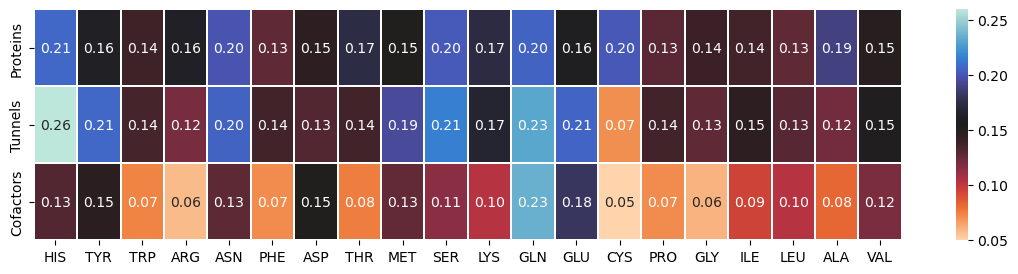

In [414]:
k3 =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
  
for i in vse_aa_tun:
    print(i)
    print(vse_aa_tun[i])
    k3[i] = vse_aa_tun[i][0]/vse_aa_tun[i][1]
print(k3)

k1 = pd.DataFrame.from_dict(k, orient='index')
k2 = pd.DataFrame.from_dict(k2, orient='index')
k3 = pd.DataFrame.from_dict(k3, orient='index')

result = pd.concat([k1, k3], axis=1)
r = pd.concat([result, k2], axis=1)
#sns.heatmap(r,  cmap = sns.color_palette("icefire", as_cmap=True))
r.columns = ['Proteins', 'Tunnels', 'Cofactors']
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 3))
dfn = r.transpose()
sns.heatmap(dfn,  cmap = sns.color_palette("icefire_r", as_cmap=True),annot = True, fmt=".2f", linewidth = 0.1)

<AxesSubplot:>

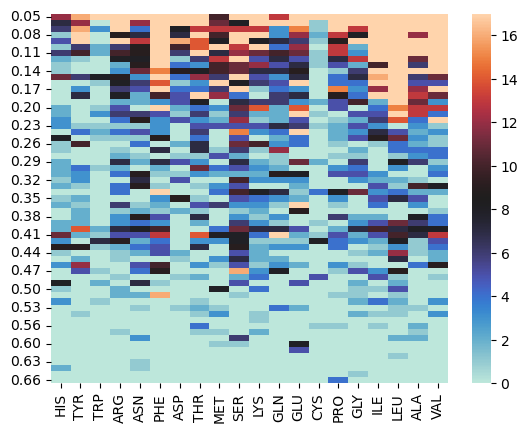

In [415]:
t_sort = {}
for i in sorted(tun_p.keys(), reverse = False):
    t_sort[i] = tun_p[i]
    #print(i)
#print(aa_sort)

aa_tun = {}
for i in t_sort:
    ij = format(float(i), ".2f")
    aa_tun[ij] =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
      
    for j in t_sort[i]:

        aa_tun[ij][j] += 1
#print(aa_tun)
dat_tun = pd.DataFrame.from_dict(aa_tun, orient='index')
sns.heatmap(dat_tun, vmax = 17, cmap = sns.color_palette("icefire", as_cmap=True))

<AxesSubplot:>

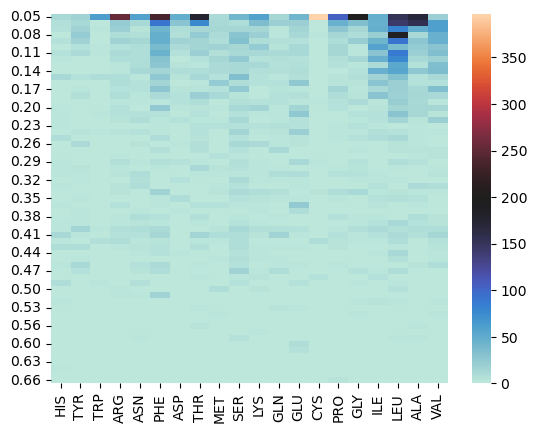

In [416]:
sns.heatmap(dat_tun,  cmap = sns.color_palette("icefire", as_cmap=True))

In [417]:
aa_sort = {}
for i in sorted(pat.keys(), reverse = False):
    aa_sort[i] = pat[i]
    #print(i)
#print(aa_sort)

aa = {}
for i in aa_sort:
    ij = format(float(i), ".2f")
    aa[ij] =  {'HIS': 0, 'TYR': 0, 'TRP': 0, 'ARG': 0, 'ASN': 0, 'PHE': 0, 'ASP': 0, 'THR': 0, 'MET': 0, 'SER': 0, 'LYS': 0, 'GLN': 0, 'GLU': 0, 'CYS': 0, 'PRO': 0, 'GLY': 0, 'ILE': 0, 'LEU': 0, 'ALA': 0, 'VAL': 0}
      
    for j in aa_sort[i]:

        aa[ij][j] += 1

#print(aa)

In [418]:
dat = pd.DataFrame.from_dict(aa, orient='index')
dat.head(20)
print(dat.index)
#sns.heatmap(dat,vmax = 100, cmap = sns.color_palette("icefire", as_cmap=True))

Index(['0.05', '0.06', '0.07', '0.08', '0.09', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22',
       '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31',
       '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40',
       '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49',
       '0.50', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58',
       '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.66', '0.67'],
      dtype='object')


In [419]:
#l = pd.DataFrame(data = dat, index = [0.05, 0.06,0.07, 0.08,0.09, 0.10,0.11, 0.12,  0.13,0.14, 0.15, 0.16,  0.17,0.18, 0.19, 0.20])
l = pd.DataFrame(data = dat, index = [0.05, 0.06,0.07, 0.08,0.09, 0.10])

l.head()

,HIS,TYR,TRP,ARG,ASN,PHE,ASP,THR,MET,SER,LYS,GLN,GLU,CYS,PRO,GLY,ILE,LEU,ALA,VAL
0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\annas\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\annas\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

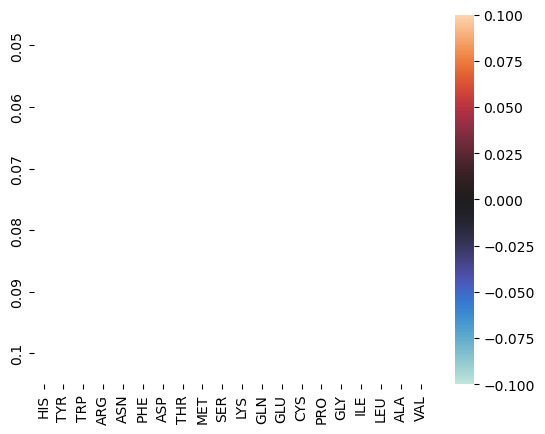

In [420]:
sns.heatmap(l, cmap = sns.color_palette("icefire", as_cmap=True))

<AxesSubplot:>

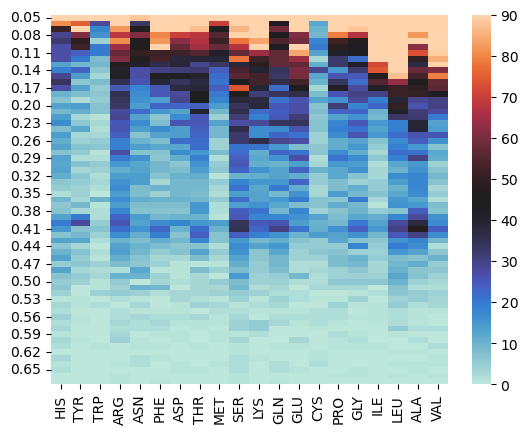

In [421]:
#proteiny
sns.heatmap(dat,vmax = 90,  cmap = sns.color_palette("icefire", as_cmap=True))

<AxesSubplot:>

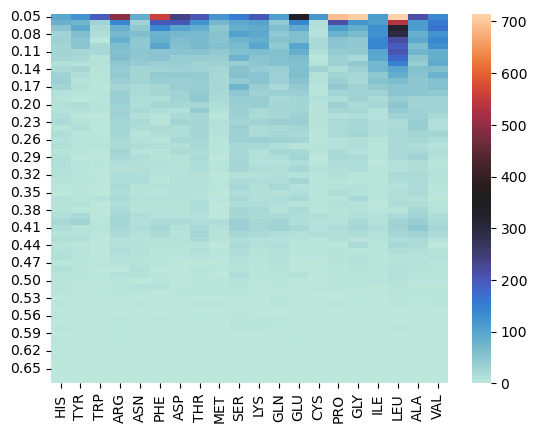

In [422]:
sns.heatmap(dat,  cmap = sns.color_palette("icefire", as_cmap=True))

In [423]:
#cofactors_aa = {'A0A087X1C5': ['THR 493 A', 'VAL 494 A', 'THR 321 A', 'ASN 324 A', 'VAL 496 A', 'ASP 320 A', 'VAL 384 A', 'ARG 107 A', 'TRP 113 A', 'ARG 499 A', 'LEU 380 A', 'PRO 382 A', 'PRO 385 A', 'TYR 413 A', 'HIS 62 A', 'ASN 387 A', 'LEU 410 A', 'LEU 98 A', 'ARG 389 A', 'VAL 94 A', 'LEU 97 A', 'GLU 274 A', 'ARG 170 A', 'PHE 53 A', 'GLU 313 A', 'GLN 65 A', 'VAL 487 A', 'ALA 152 A', 'ARG 99 A', 'THR 491 A', 'GLY 449 A', 'PRO 447 A', 'VAL 383 A', 'LEU 351 A', 'PHE 450 A', 'LEU 182 A', 'THR 409 A', 'GLY 386 A', 'ARG 417 A', 'HIS 412 A', 'CYS 411 A', 'TYR 381 A', 'TYR 331 A', 'PRO 486 A', 'ARG 335 A', 'ALA 485 A', 'ALA 484 A', 'GLY 483 A', 'GLU 96 A', 'ARG 34 A', 'HIS 396 A', 'HIS 31 A', 'GLU 29 A', 'LEU 61 A', 'LEU 58 A', 'LEU 233 A', 'PHE 229 A', 'THR 232 A', 'SER 231 A', 'VAL 228 A', 'LEU 253 A', 'TRP 257 A', 'TRP 76 A', 'TYR 87 A', 'MET 236 A', 'LEU 407 A', 'PHE 80 A', 'LEU 52 A', 'GLU 498 A', 'PRO 489 A', 'ARG 60 A', 'ARG 488 A', 'GLU 101 A', 'LYS 393 A', 'VAL 88 A', 'SER 59 A', 'GLN 100 A', 'PRO 74 A', 'ALA 420 A', 'ALA 90 A', 'ALA 92 A', 'PHE 72 A', 'ARG 35 A', 'ASP 39 A', 'PRO 41 A', 'LYS 490 A', 'LEU 234 A', 'ARG 492 A', 'TYR 191 A', 'GLY 226 A', 'ILE 222 A', 'ARG 223 A', 'ALA 224 A', 'THR 220 A', 'GLN 259 A', 'LYS 285 A', 'GLU 284 A', 'ARG 299 A', 'GLU 300 A', 'GLU 301 A', 'CYS 54 A', 'LEU 146 A', 'ARG 459 A', 'ARG 147 A', 'GLN 305 A', 'ALA 123 A', 'LYS 55 A', 'LEU 446 A', 'GLU 95 A', 'ASP 399 A', 'ALA 414 A', 'ALA 70 A', 'PRO 419 A', 'GLY 73 A', 'HIS 71 A', 'SER 47 A', 'GLY 42 A', 'LEU 25 A', 'LYS 404 A', 'GLN 67 A', 'THR 82 A', 'ARG 84 A'], 'O15528': ['LEU 126 A', 'TRP 134 A', 'LEU 127 A', 'CYS 455 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'THR 325 A', 'VAL 383 A', 'PRO 447 A', 'GLY 457 A', 'ILE 198 A', 'VAL 384 A', 'ARG 453 A', 'VAL 494 A', 'PHE 229 A', 'TRP 113 A', 'GLY 226 A', 'ARG 492 A', 'TYR 191 A', 'GLY 386 A', 'ILE 222 A', 'TYR 87 A', 'LEU 61 A', 'MET 236 A', 'LEU 52 A', 'LEU 58 A', 'LEU 233 A', 'VAL 83 A', 'PHE 110 A', 'ALA 237 A', 'PHE 80 A', 'PHE 53 A', 'LEU 234 A', 'VAL 230 A', 'TRP 241 A', 'HIS 240 A', 'HIS 244 A', 'LEU 245 A', 'THR 493 A', 'ASP 320 A', 'SER 388 A', 'SER 111 A', 'LEU 316 A', 'LEU 407 A', 'CYS 108 A', 'THR 232 A', 'THR 85 A', 'ALA 78 A', 'SER 79 A', 'PRO 43 A', 'TRP 250 A', 'GLU 115 A', 'ARG 243 A', 'ASN 387 A', 'TRP 257 A', 'GLY 318 A', 'ARG 389 A', 'VAL 228 A', 'THR 128 A', 'ARG 117 A', 'THR 409 A', 'VAL 408 A', 'VAL 86 A', 'ARG 84 A', 'THR 406 A', 'LEU 37 A', 'PRO 403 A', 'TYR 400 A', 'ILE 402 A', 'THR 491 A', 'MET 238 A', 'PRO 239 A', 'LEU 242 A', 'GLU 313 A'], 'O43174': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'VAL 494 A', 'THR 491 A', 'VAL 496 A', 'PRO 497 A', 'TYR 191 A', 'ASP 185 A', 'LEU 326 A', 'VAL 322 A', 'SER 323 A', 'ASP 320 A', 'VAL 319 A', 'GLY 318 A', 'GLY 194 A', 'THR 321 A', 'PHE 229 A', 'SER 227 A', 'LEU 465 A', 'ALA 461 A', 'LEU 378 A', 'THR 325 A', 'VAL 383 A', 'LEU 316 A', 'GLU 464 A', 'PHE 193 A', 'GLY 197 A', 'VAL 225 A', 'ALA 317 A', 'LEU 314 A', 'VAL 161 A', 'LEU 158 A', 'LEU 195 A', 'ILE 222 A', 'ASN 324 A', 'ARG 171 A', 'PRO 486 A', 'ARG 335 A', 'SER 427 A'], 'O75881': ['THR 491 A', 'HIS 62 A', 'LEU 495 A', 'VAL 383 A', 'THR 321 A', 'TRP 328 A', 'ASN 324 A', 'VAL 494 A', 'THR 493 A', 'VAL 384 A', 'GLY 386 A', 'PRO 385 A', 'TYR 413 A', 'PRO 382 A', 'PRO 489 A', 'TYR 381 A', 'VAL 377 A', 'THR 325 A', 'LEU 378 A', 'TYR 331 A', 'ARG 488 A', 'PRO 486 A', 'ALA 485 A', 'ARG 335 A', 'PRO 480 A', 'SER 334 A', 'ALA 484 A', 'GLU 332 A', 'ASN 426 A', 'ARG 379 A', 'SER 416 A', 'HIS 412 A', 'ARG 118 A', 'LEU 64 A', 'LEU 61 A', 'ARG 60 A', 'GLU 63 A', 'GLN 65 A', 'PRO 447 A', 'LEU 446 A', 'PHE 443 A', 'LEU 410 A', 'VAL 94 A', 'LEU 98 A', 'GLU 95 A', 'LEU 97 A', 'GLU 96 A', 'ARG 389 A', 'THR 409 A', 'VAL 88 A', 'LYS 490 A', 'ASN 387 A', 'CYS 411 A', 'VAL 408 A', 'ARG 99 A', 'GLU 101 A', 'ARG 107 A', 'PRO 105 A', 'GLU 106 A', 'ARG 453 A', 'SER 388 A', 'ARG 459 A', 'ARG 458 A', 'PHE 450 A', 'LEU 127 A', 'LEU 316 A', 'CYS 455 A', 'PHE 448 A', 'PHE 229 A'], 'P04798': ['ALA 329 A', 'VAL 377 A', 'TYR 381 A', 'PRO 382 A', 'PRO 385 A', 'VAL 384 A', 'VAL 383 A', 'LEU 380 A', 'ARG 417 A', 'TYR 413 A', 'THR 325 A', 'PRO 497 A', 'VAL 496 A', 'VAL 487 A', 'ARG 499 A', 'TRP 328 A', 'LEU 495 A', 'ALA 357 A', 'LEU 315 A', 'ALA 264 A', 'THR 312 A', 'GLY 483 A', 'PRO 486 A', 'PRO 482 A', 'LEU 351 A', 'THR 474 A', 'HIS 344 A', 'ARG 488 A', 'ALA 485 A', 'PHE 190 A', 'SER 323 A', 'ASN 324 A', 'ASP 320 A', 'GLY 194 A', 'VAL 319 A', 'LEU 195 A', 'ALA 187 A', 'TYR 191 A', 'CYS 209 A', 'LEU 207 A', 'PHE 263 A', 'PHE 221 A', 'LYS 192 A', 'ILE 501 A', 'GLU 498 A', 'SER 327 A', 'SER 500 A', 'LEU 210 A', 'PHE 193 A', 'ARG 99 A', 'SER 44 A', 'TRP 241 A', 'VAL 322 A', 'LYS 55 A', 'GLU 338 A', 'PHE 448 A', 'SER 109 A', 'VAL 311 A', 'TYR 331 A', 'HIS 336 A', 'ARG 223 A', 'ARG 184 A', 'GLU 219 A', 'GLU 189 A', 'GLU 196 A', 'VAL 186 A', 'THR 321 A', 'GLN 213 A', 'PRO 216 A', 'ARG 252 A', 'ARG 175 A', 'GLY 176 A', 'THR 177 A', 'GLU 211 A', 'ARG 278 A', 'ARG 167 A', 'ASN 160 A', 'GLY 174 A', 'ARG 173 A', 'PRO 215 A', 'ALA 212 A', 'ARG 171 A', 'GLN 282 A', 'ARG 270 A', 'ALA 349 A', 'THR 348 A', 'PRO 353 A', 'ARG 508 A', 'HIS 267 A', 'ARG 266 A', 'THR 218 A', 'GLU 332 A', 'ARG 379 A', 'SER 416 A', 'LEU 378 A', 'VAL 374 A', 'ARG 168 A', 'VAL 214 A', 'ILE 222 A'], 'P05093': ['ARG 60 A', 'HIS 62 A', 'THR 491 A', 'LEU 495 A', 'PRO 489 A', 'ASN 324 A', 'VAL 494 A', 'TRP 328 A', 'VAL 496 A', 'THR 493 A', 'LEU 61 A', 'ARG 379 A', 'SER 416 A', 'PRO 382 A', 'TYR 413 A', 'PRO 385 A', 'ARG 417 A', 'ASN 387 A', 'VAL 408 A', 'THR 409 A', 'LEU 410 A', 'VAL 86 A', 'VAL 88 A', 'TYR 87 A', 'ARG 84 A', 'THR 82 A', 'ARG 453 A', 'GLU 130 A', 'ASN 426 A', 'GLU 424 A', 'PRO 419 A', 'PRO 46 A', 'SER 44 A', 'GLU 338 A', 'PRO 337 A', 'PRO 486 A', 'ARG 488 A', 'CYS 411 A', 'GLY 386 A', 'SER 388 A', 'ARG 389 A', 'VAL 384 A', 'PRO 425 A', 'ASP 418 A', 'THR 415 A', 'ALA 414 A', 'HIS 412 A', 'TYR 27 A', 'HIS 441 A', 'GLU 95 A', 'PRO 442 A', 'THR 439 A', 'ARG 99 A', 'ARG 28 A', 'ASP 399 A', 'PRO 74 A', 'ALA 420 A', 'ALA 92 A', 'GLN 421 A', 'ALA 89 A', 'LEU 93 A', 'TRP 76 A', 'GLN 65 A', 'PHE 422 A', 'VAL 66 A', 'ARG 335 A', 'PRO 216 A', 'ARG 170 A', 'SER 360 A', 'GLU 477 A', 'VAL 230 A', 'SER 427 A', 'LEU 202 A', 'GLU 63 A', 'GLU 101 A', 'PHE 450 A', 'LEU 98 A', 'ARG 35 A', 'ILE 401 A', 'ARG 34 A', 'ASP 39 A', 'SER 36 A', 'TYR 400 A', 'VAL 75 A', 'ARG 429 A', 'PHE 428 A', 'GLU 436 A', 'PRO 423 A', 'GLY 437 A', 'ILE 395 A', 'LEU 97 A', 'GLN 100 A', 'ASP 394 A', 'LYS 393 A', 'SER 32 A', 'TYR 30 A', 'HIS 396 A', 'GLY 398 A', 'PRO 41 A', 'PHE 72 A', 'GLY 73 A', 'GLU 96 A', 'ALA 38 A', 'LYS 404 A'], 'P05108': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'THR 491 A', 'LEU 495 A', 'ASN 324 A', 'VAL 494 A', 'VAL 496 A', 'PRO 497 A', 'GLU 498 A', 'THR 493 A', 'LEU 233 A', 'CYS 411 A', 'THR 409 A', 'GLN 65 A', 'GLY 386 A', 'PRO 385 A', 'HIS 62 A', 'TYR 413 A', 'LEU 61 A', 'ARG 266 A', 'GLU 63 A', 'VAL 383 A', 'TRP 328 A', 'TYR 87 A', 'VAL 88 A', 'VAL 408 A', 'LEU 410 A', 'LEU 97 A', 'ILE 395 A', 'ALA 70 A', 'HIS 71 A', 'PHE 72 A', 'PRO 382 A', 'ARG 379 A', 'SER 416 A', 'SER 445 A', 'TRP 433 A', 'LYS 375 A', 'GLU 376 A', 'TRP 76 A', 'PRO 43 A', 'ALA 89 A', 'PRO 74 A', 'LEU 93 A', 'VAL 75 A', 'ALA 92 A', 'PRO 91 A', 'ARG 35 A', 'ASP 399 A', 'ALA 90 A', 'HIS 412 A', 'THR 415 A', 'ALA 444 A', 'VAL 66 A', 'ALA 414 A', 'ARG 417 A', 'ASN 426 A', 'VAL 94 A', 'PRO 425 A', 'LEU 380 A', 'LEU 64 A', 'PHE 422 A', 'VAL 230 A', 'PHE 229 A', 'ARG 492 A', 'THR 232 A', 'TRP 113 A', 'VAL 384 A'], 'P05177': ['THR 491 A', 'ARG 492 A', 'VAL 230 A', 'LYS 490 A', 'VAL 496 A', 'VAL 494 A', 'ASN 324 A', 'VAL 383 A', 'THR 321 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'PRO 489 A', 'LEU 495 A', 'ARG 84 A', 'THR 82 A', 'GLU 95 A', 'ARG 499 A', 'GLU 498 A', 'ARG 488 A', 'TRP 241 A', 'LEU 49 A', 'THR 177 A', 'GLY 483 A', 'ARG 184 A', 'CYS 411 A', 'GLN 65 A', 'LEU 61 A', 'HIS 62 A', 'PRO 385 A', 'LEU 410 A', 'VAL 88 A', 'GLU 63 A', 'LEU 64 A', 'TYR 413 A', 'PRO 74 A', 'LEU 93 A', 'ALA 90 A', 'THR 415 A', 'ALA 89 A', 'TRP 76 A', 'GLY 73 A', 'ARG 60 A', 'PRO 425 A', 'PRO 419 A', 'ALA 70 A', 'TYR 87 A', 'GLY 386 A', 'CYS 54 A', 'PRO 486 A', 'VAL 487 A', 'TYR 331 A', 'ALA 485 A', 'ALA 484 A', 'ALA 92 A', 'ASP 399 A', 'TYR 27 A', 'GLU 424 A', 'PRO 423 A', 'HIS 71 A', 'LYS 55 A', 'GLN 67 A', 'ALA 33 A', 'TYR 30 A', 'ASP 39 A', 'ALA 38 A', 'LEU 25 A', 'ASN 426 A', 'PRO 43 A', 'PHE 72 A', 'SER 59 A', 'GLY 56 A', 'LEU 58 A', 'PHE 53 A', 'VAL 75 A', 'ALA 69 A', 'ALA 420 A', 'ASP 418 A', 'ARG 35 A', 'PRO 41 A', 'ILE 40 A', 'GLY 42 A', 'THR 45 A', 'SER 44 A', 'ARG 252 A', 'TYR 191 A', 'ASP 185 A', 'SER 500 A', 'ILE 222 A', 'ARG 223 A', 'GLU 219 A', 'THR 220 A', 'PRO 216 A', 'ARG 147 A', 'SER 139 A', 'ALA 187 A', 'GLY 188 A', 'LYS 192 A', 'VAL 214 A', 'PRO 215 A', 'THR 218 A', 'THR 409 A', 'HIS 292 A', 'HIS 475 A', 'VAL 66 A', 'ARG 417 A', 'PHE 48 A', 'GLY 68 A', 'ALA 349 A', 'GLU 51 A', 'GLN 504 A', 'LEU 316 A', 'ARG 459 A', 'GLU 96 A', 'ALA 78 A', 'SER 79 A', 'LEU 77 A', 'LEU 245 A', 'PRO 46 A'], 'P05181': ['LEU 58 A', 'THR 491 A', 'SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 494 A', 'GLU 498 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'PRO 385 A', 'PRO 382 A', 'TYR 413 A', 'VAL 66 A', 'ARG 417 A', 'HIS 62 A', 'ASN 426 A', 'PRO 440 A', 'HIS 441 A', 'THR 439 A', 'ALA 420 A', 'ALA 92 A', 'THR 409 A', 'CYS 411 A', 'LEU 410 A', 'VAL 408 A', 'ASN 387 A', 'HIS 412 A', 'GLY 386 A', 'VAL 384 A', 'TYR 27 A', 'ARG 432 A', 'ASP 399 A', 'PRO 74 A', 'ALA 70 A', 'PRO 419 A', 'GLY 26 A', 'LEU 25 A', 'ARG 35 A', 'GLY 73 A', 'HIS 71 A', 'GLN 421 A', 'PRO 438 A', 'TYR 87 A', 'GLN 65 A', 'LEU 98 A', 'PHE 443 A', 'VAL 94 A', 'LEU 97 A', 'PHE 450 A', 'GLY 398 A', 'VAL 397 A', 'HIS 396 A', 'GLU 96 A', 'TYR 400 A', 'ARG 335 A', 'PRO 486 A', 'TYR 381 A', 'GLU 332 A', 'SER 427 A', 'ARG 99 A', 'ASP 39 A', 'ILE 40 A', 'PRO 41 A', 'GLU 424 A', 'GLN 100 A', 'TRP 241 A', 'PRO 46 A', 'LEU 49 A', 'SER 44 A', 'GLU 101 A', 'LYS 393 A', 'GLU 63 A', 'GLN 67 A', 'ARG 60 A', 'GLY 56 A', 'LEU 234 A', 'VAL 230 A', 'ALA 69 A', 'LEU 64 A', 'LEU 61 A', 'LEU 52 A', 'GLU 51 A', 'ARG 488 A', 'ARG 389 A', 'SER 388 A', 'ARG 107 A', 'GLU 106 A', 'VAL 390 A', 'ASP 392 A', 'GLY 102 A', 'LYS 404 A', 'PRO 103 A', 'VAL 88 A', 'GLY 57 A', 'PHE 48 A', 'PRO 391 A', 'ILE 395 A', 'LEU 93 A', 'VAL 75 A', 'GLU 95 A', 'LYS 55 A', 'CYS 54 A', 'ARG 499 A', 'SER 500 A', 'ARG 223 A', 'ARG 252 A', 'GLU 284 A', 'HIS 295 A', 'ALA 275 A', 'PHE 298 A', 'ALA 304 A', 'GLU 272 A', 'GLU 338 A', 'SER 454 A', 'MET 456 A', 'CYS 455 A', 'ARG 255 A', 'GLY 251 A', 'ASP 256 A', 'CYS 254 A', 'ARG 120 A', 'HIS 336 A', 'LYS 452 A', 'LEU 380 A', 'VAL 86 A', 'ALA 485 A', 'ASP 217 A', 'ASP 507 A', 'ALA 350 A', 'PRO 480 A', 'VAL 225 A', 'THR 415 A'], 'P08684': ['SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'THR 491 A', 'ARG 492 A', 'THR 493 A', 'LEU 233 A', 'ASP 418 A', 'GLN 421 A', 'PRO 419 A', 'ALA 420 A', 'HIS 62 A', 'PRO 385 A', 'TYR 413 A', 'GLN 65 A', 'ALA 414 A', 'THR 415 A', 'SER 416 A', 'GLY 386 A', 'LEU 410 A', 'CYS 411 A', 'THR 409 A', 'PRO 489 A', 'ARG 417 A', 'VAL 88 A', 'ALA 89 A', 'ALA 90 A', 'GLU 63 A', 'PRO 382 A', 'HIS 412 A', 'VAL 384 A', 'GLY 204 A', 'GLY 483 A', 'LEU 98 A', 'ARG 389 A', 'ASN 387 A', 'ARG 84 A', 'GLY 309 A', 'LEU 308 A', 'THR 312 A', 'TYR 381 A', 'LEU 380 A', 'ARG 379 A', 'ILE 307 A', 'VAL 311 A', 'PHE 261 A', 'LEU 140 A', 'PRO 391 A', 'LEU 97 A', 'SER 388 A'], 'P08686': ['LEU 233 A', 'ARG 492 A', 'THR 491 A', 'LYS 490 A', 'VAL 494 A', 'VAL 496 A', 'LEU 495 A', 'VAL 383 A', 'THR 321 A', 'PRO 497 A', 'ASN 324 A', 'THR 493 A', 'GLU 63 A', 'HIS 62 A', 'PRO 385 A', 'CYS 411 A', 'VAL 88 A', 'ALA 89 A', 'TRP 76 A', 'TYR 87 A', 'PRO 489 A', 'TYR 413 A', 'VAL 487 A', 'ARG 488 A', 'GLY 73 A', 'PRO 74 A', 'LEU 58 A', 'PHE 72 A', 'PRO 41 A', 'GLN 65 A', 'ALA 90 A', 'VAL 94 A', 'THR 415 A', 'PHE 443 A', 'PRO 486 A', 'ALA 485 A', 'ALA 484 A', 'GLY 483 A', 'SER 59 A', 'ARG 60 A', 'GLY 56 A', 'VAL 230 A', 'SER 231 A', 'ARG 252 A', 'SER 227 A', 'VAL 228 A', 'GLN 67 A', 'LEU 64 A', 'LEU 52 A', 'PHE 53 A', 'LEU 234 A', 'GLU 498 A', 'ARG 499 A', 'CYS 54 A', 'LEU 410 A', 'THR 409 A', 'ASN 387 A', 'VAL 408 A', 'LEU 97 A', 'VAL 397 A', 'HIS 396 A', 'ILE 395 A', 'ASP 394 A', 'GLN 100 A', 'LEU 61 A', 'ALA 237 A', 'ALA 70 A', 'PRO 419 A', 'ASP 418 A', 'ALA 69 A', 'HIS 71 A', 'ARG 35 A', 'ASP 39 A', 'ALA 38 A', 'ASP 399 A', 'PRO 91 A', 'ALA 92 A', 'HIS 441 A', 'GLU 95 A', 'TYR 191 A', 'ILE 222 A', 'ARG 223 A', 'GLU 219 A', 'THR 220 A', 'GLN 259 A', 'ASP 217 A', 'PHE 221 A', 'ARG 147 A', 'GLU 300 A', 'SER 139 A', 'ARG 136 A', 'VAL 246 A', 'PHE 450 A', 'LEU 446 A', 'GLY 449 A', 'GLY 451 A', 'PRO 482 A', 'ALA 123 A', 'ARG 117 A', 'GLU 313 A', 'THR 114 A', 'TYR 331 A', 'ARG 184 A', 'LEU 93 A', 'ILE 40 A', 'TYR 400 A', 'LYS 393 A', 'LYS 404 A', 'ASN 405 A', 'PRO 391 A', 'VAL 390 A', 'GLU 106 A', 'SER 109 A', 'GLY 42 A', 'PRO 43 A', 'SER 44 A', 'GLY 398 A', 'ARG 84 A', 'THR 82 A', 'SER 500 A', 'ALA 187 A', 'SER 327 A', 'TRP 241 A', 'THR 177 A', 'LEU 144 A', 'THR 474 A', 'GLU 346 A', 'PHE 505 A', 'PHE 229 A', 'ARG 459 A', 'PRO 382 A', 'GLN 421 A'], 'P10632': ['THR 325 A', 'VAL 377 A', 'TYR 381 A', 'PRO 382 A', 'PRO 385 A', 'VAL 383 A', 'LEU 380 A', 'TYR 413 A', 'VAL 322 A', 'LEU 465 A', 'PHE 190 A', 'SER 327 A', 'ILE 501 A', 'PRO 497 A', 'TRP 328 A', 'VAL 496 A', 'ASN 324 A', 'LEU 495 A', 'VAL 487 A', 'ARG 499 A', 'ALA 187 A', 'GLY 188 A', 'ASP 185 A', 'VAL 186 A', 'TYR 331 A', 'ARG 488 A', 'PRO 486 A', 'ARG 184 A', 'THR 177 A', 'GLU 189 A', 'LYS 192 A', 'TYR 191 A', 'ASP 320 A', 'GLU 498 A', 'GLY 178 A', 'PRO 482 A', 'PRO 179 A', 'GLY 174 A', 'GLY 483 A', 'ARG 223 A', 'GLU 219 A', 'GLU 338 A', 'ARG 335 A', 'PRO 337 A', 'PRO 216 A', 'GLU 332 A', 'PHE 428 A', 'VAL 373 A', 'VAL 374 A', 'LYS 375 A', 'ALA 372 A', 'LYS 371 A', 'GLU 462 A', 'LEU 503 A', 'ASN 502 A', 'LEU 330 A', 'LEU 326 A', 'LEU 469 A', 'LEU 473 A', 'LEU 343 A', 'LEU 370 A', 'GLN 466 A', 'HIS 336 A', 'SER 427 A', 'THR 218 A', 'LEU 195 A', 'PRO 215 A', 'ASP 217 A', 'ARG 270 A', 'ARG 266 A', 'GLN 172 A', 'ILE 222 A', 'VAL 214 A', 'GLY 176 A', 'LEU 182 A', 'ARG 175 A', 'PRO 180 A', 'VAL 339 A', 'ALA 342 A', 'SER 416 A', 'ARG 379 A', 'TRP 433 A', 'SER 445 A', 'PRO 440 A', 'PRO 442 A', 'ARG 118 A', 'GLU 133 A', 'PRO 303 A', 'ARG 136 A', 'GLU 436 A', 'SER 345 A', 'MET 260 A', 'VAL 228 A', 'VAL 225 A', 'TRP 257 A', 'ARG 147 A', 'LEU 146 A', 'PRO 143 A', 'ARG 429 A', 'GLU 424 A', 'ARG 173 A', 'ALA 485 A', 'THR 220 A', 'LEU 351 A', 'SER 352 A', 'SER 355 A', 'ALA 357 A', 'THR 474 A', 'ARG 508 A', 'ARG 168 A', 'PRO 103 A', 'GLY 42 A', 'LEU 49 A', 'ALA 70 A', 'CYS 455 A'], 'P10635': ['LEU 127 A', 'TRP 113 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'VAL 322 A', 'PHE 448 A', 'CYS 455 A', 'LEU 316 A', 'VAL 319 A', 'THR 220 A', 'ARG 492 A', 'VAL 494 A', 'THR 493 A', 'VAL 384 A', 'PHE 229 A', 'LEU 233 A', 'GLY 386 A', 'LEU 410 A', 'HIS 412 A', 'CYS 411 A', 'ALA 414 A', 'GLN 65 A', 'THR 409 A', 'TYR 87 A', 'VAL 88 A', 'GLN 149 A', 'ARG 167 A', 'CYS 119 A', 'LEU 61 A', 'ARG 223 A', 'GLU 346 A', 'ALA 420 A', 'TRP 257 A', 'VAL 383 A', 'ASP 507 A', 'VAL 214 A', 'SER 388 A', 'LEU 407 A', 'THR 491 A', 'PRO 385 A', 'PRO 382 A', 'GLY 73 A', 'ALA 69 A', 'GLY 68 A', 'PHE 72 A', 'PRO 247 A', 'ARG 255 A', 'GLY 248 A', 'HIS 71 A', 'TRP 76 A', 'ARG 35 A', 'THR 232 A', 'THR 128 A', 'GLU 313 A', 'GLY 125 A', 'ALA 129 A', 'LEU 137 A', 'LEU 126 A', 'PHE 80 A', 'ALA 237 A', 'MET 236 A', 'CYS 108 A', 'PHE 110 A', 'SER 109 A', 'GLU 130 A', 'ARG 252 A', 'ASP 256 A', 'THR 415 A', 'VAL 94 A', 'PHE 443 A', 'PRO 91 A', 'ALA 90 A', 'ASP 418 A', 'ALA 92 A', 'PRO 74 A', 'ALA 89 A', 'SER 47 A', 'SER 44 A', 'ALA 50 A', 'LYS 55 A', 'GLU 51 A', 'GLN 67 A', 'LEU 49 A', 'GLY 81 A', 'SER 79 A', 'THR 45 A', 'ALA 38 A', 'PRO 46 A', 'HIS 116 A', 'ARG 120 A', 'ARG 118 A', 'LEU 315 A', 'PHE 221 A', 'THR 312 A', 'LEU 314 A', 'VAL 311 A', 'LEU 202 A', 'THR 294 A', 'LEU 297 A', 'HIS 295 A', 'LEU 293 A', 'PRO 43 A', 'GLN 121 A', 'TRP 433 A', 'LYS 375 A', 'ARG 147 A', 'GLN 135 A', 'ALA 142 A', 'LYS 452 A', 'GLY 251 A', 'VAL 230 A', 'LEU 495 A', 'CYS 54 A', 'ARG 60 A', 'TRP 241 A', 'LEU 242 A', 'GLY 42 A', 'LEU 77 A', 'LYS 404 A', 'ASN 405 A', 'ALA 70 A', 'PHE 48 A'], 'P11509': ['THR 493 A', 'THR 232 A', 'ARG 492 A', 'VAL 494 A', 'ASN 324 A', 'VAL 383 A', 'ASP 320 A', 'THR 321 A', 'VAL 384 A', 'ARG 107 A', 'THR 491 A', 'LEU 495 A', 'PRO 385 A', 'HIS 62 A', 'GLN 65 A', 'CYS 411 A', 'TYR 413 A', 'ASP 418 A', 'ALA 69 A', 'GLN 421 A', 'PRO 382 A', 'GLY 73 A', 'PHE 72 A', 'PRO 41 A', 'LEU 233 A', 'LEU 58 A', 'VAL 230 A', 'TRP 113 A', 'LEU 253 A', 'TRP 257 A', 'HIS 116 A', 'LEU 64 A', 'LEU 61 A', 'TYR 87 A', 'MET 236 A', 'SER 388 A', 'PHE 110 A', 'PRO 112 A', 'SER 111 A', 'CYS 108 A', 'LEU 234 A', 'SER 59 A', 'PHE 53 A', 'CYS 54 A', 'VAL 94 A', 'LEU 410 A', 'LEU 93 A', 'ALA 92 A', 'GLU 96 A', 'TRP 76 A', 'ALA 89 A', 'ALA 90 A', 'PRO 74 A', 'ALA 70 A', 'PRO 419 A', 'HIS 71 A', 'ARG 35 A', 'ALA 420 A', 'HIS 441 A', 'TYR 27 A', 'ARG 499 A', 'GLU 498 A', 'ARG 184 A', 'ARG 252 A', 'PRO 249 A', 'VAL 246 A', 'ARG 243 A', 'PRO 247 A', 'LEU 245 A', 'GLY 226 A', 'VAL 225 A', 'ALA 224 A', 'PHE 221 A', 'MET 260 A', 'GLN 259 A', 'ASP 256 A', 'PHE 261 A', 'PHE 263 A', 'GLN 366 A', 'GLN 149 A', 'PRO 148 A', 'ARG 147 A', 'GLY 248 A', 'HIS 244 A', 'LEU 242 A', 'PRO 442 A', 'TRP 433 A', 'LYS 375 A', 'SER 445 A', 'LEU 140 A', 'LEU 137 A', 'ARG 136 A', 'ARG 138 A', 'GLN 135 A', 'SER 139 A', 'HIS 412 A', 'ALA 414 A', 'ARG 488 A', 'ARG 60 A', 'LYS 55 A', 'GLY 42 A', 'ILE 40 A', 'SER 44 A', 'ALA 38 A', 'ASP 39 A', 'ASN 405 A', 'THR 82 A', 'THR 409 A', 'GLY 386 A', 'GLU 63 A', 'PRO 489 A', 'ASN 426 A', 'VAL 88 A', 'GLU 424 A', 'SER 47 A', 'GLN 67 A', 'GLY 57 A', 'THR 415 A', 'GLU 288 A', 'ARG 173 A', 'THR 341 A', 'LYS 490 A'], 'P11511': ['THR 493 A', 'PHE 229 A', 'THR 232 A', 'THR 321 A', 'ALA 317 A', 'ASP 320 A', 'VAL 319 A', 'LEU 127 A', 'ARG 107 A', 'TRP 113 A', 'VAL 384 A', 'VAL 383 A', 'LEU 495 A', 'VAL 494 A', 'GLY 386 A', 'HIS 412 A', 'PRO 385 A', 'LEU 410 A', 'PRO 382 A', 'PRO 489 A', 'VAL 88 A', 'ASN 387 A', 'MET 236 A', 'LEU 61 A', 'TYR 87 A', 'LEU 233 A', 'HIS 62 A', 'GLN 65 A', 'CYS 411 A', 'ALA 89 A', 'ALA 69 A', 'GLY 73 A', 'TRP 76 A', 'LYS 490 A', 'SER 59 A', 'THR 491 A', 'TYR 413 A', 'TYR 381 A', 'ARG 417 A', 'SER 416 A', 'VAL 496 A', 'ALA 484 A', 'GLY 483 A', 'GLU 481 A', 'PRO 480 A', 'PRO 482 A', 'TYR 331 A', 'ALA 485 A', 'VAL 487 A', 'ARG 499 A'], 'P11712': ['LEU 233 A', 'ARG 492 A', 'VAL 230 A', 'THR 493 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'THR 491 A', 'LYS 490 A', 'SER 59 A', 'GLU 498 A', 'ARG 60 A', 'VAL 496 A', 'LEU 495 A', 'ARG 488 A', 'ASN 426 A', 'ALA 70 A', 'LEU 64 A', 'GLN 65 A', 'TRP 76 A', 'HIS 62 A', 'CYS 411 A', 'ALA 89 A', 'PRO 385 A', 'TYR 413 A', 'GLN 67 A', 'SER 427 A', 'PRO 486 A', 'ARG 335 A', 'HIS 71 A', 'LYS 55 A', 'LEU 25 A', 'ARG 35 A', 'PRO 419 A', 'LEU 61 A', 'PHE 48 A', 'PRO 489 A', 'GLU 63 A', 'ASP 418 A', 'ARG 417 A', 'VAL 66 A', 'ALA 69 A', 'CYS 54 A', 'PHE 53 A', 'ALA 420 A', 'ARG 499 A', 'ARG 184 A', 'THR 177 A', 'LEU 58 A', 'LEU 234 A', 'SER 231 A', 'THR 232 A', 'THR 235 A', 'LEU 253 A', 'PRO 112 A', 'TRP 250 A', 'TRP 113 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'PHE 80 A', 'MET 236 A', 'ALA 237 A', 'MET 238 A', 'VAL 83 A', 'ARG 252 A', 'VAL 88 A', 'LEU 410 A', 'VAL 94 A', 'ALA 90 A', 'ALA 92 A', 'LEU 93 A', 'ASP 399 A', 'GLY 398 A', 'GLY 68 A', 'PHE 72 A', 'ALA 414 A', 'PRO 74 A', 'GLN 421 A', 'TYR 27 A', 'PHE 229 A', 'PRO 249 A', 'VAL 246 A', 'LEU 245 A', 'SER 227 A', 'ARG 223 A', 'VAL 228 A', 'ASP 256 A', 'ALA 224 A', 'MET 260 A', 'ARG 255 A', 'GLN 259 A', 'TRP 257 A', 'ASP 258 A', 'ARG 122 A', 'ALA 262 A', 'GLN 149 A', 'THR 362 A', 'GLN 366 A', 'ARG 147 A', 'SER 445 A', 'LYS 375 A', 'PRO 447 A', 'GLU 133 A', 'TRP 134 A', 'GLU 132 A', 'SER 32 A', 'TYR 30 A', 'GLY 26 A', 'THR 82 A', 'GLY 81 A', 'THR 45 A', 'PRO 46 A', 'GLY 56 A', 'THR 415 A', 'PHE 296 A', 'ARG 171 A', 'ARG 508 A', 'ARG 175 A'], 'P13584': ['LEU 495 A', 'PRO 489 A', 'TYR 381 A', 'TRP 328 A', 'ASN 324 A', 'ASP 320 A', 'VAL 319 A', 'VAL 383 A', 'THR 325 A', 'LEU 326 A', 'VAL 494 A', 'PRO 385 A', 'VAL 384 A', 'PRO 447 A', 'PRO 382 A', 'LEU 446 A', 'ASN 387 A', 'GLY 449 A', 'LEU 378 A', 'PHE 448 A', 'ARG 458 A', 'ARG 453 A', 'ARG 107 A', 'PHE 450 A', 'LEU 410 A', 'VAL 408 A', 'THR 409 A', 'ARG 389 A', 'SER 388 A', 'GLU 101 A', 'HIS 412 A', 'SER 416 A', 'LEU 98 A', 'THR 321 A', 'LEU 97 A', 'GLN 259 A', 'ARG 255 A', 'ALA 262 A', 'VAL 75 A', 'LEU 287 A', 'ARG 266 A', 'PRO 337 A', 'PHE 296 A', 'GLY 386 A', 'PRO 46 A', 'GLN 100 A', 'HIS 396 A', 'ILE 395 A'], 'P15538': ['TRP 113 A', 'PHE 229 A', 'THR 321 A', 'CYS 455 A', 'VAL 384 A', 'ASP 320 A', 'ARG 107 A', 'LEU 127 A', 'GLN 65 A', 'THR 409 A', 'CYS 411 A', 'ALA 89 A', 'VAL 88 A', 'ALA 90 A', 'CYS 54 A', 'LYS 55 A', 'GLU 51 A', 'VAL 494 A', 'VAL 383 A', 'ASN 387 A', 'ARG 492 A', 'LEU 495 A', 'GLY 386 A', 'THR 493 A', 'PRO 385 A', 'TYR 381 A', 'LEU 380 A', 'TRP 328 A', 'TYR 87 A', 'LEU 64 A', 'TRP 76 A', 'ALA 414 A', 'PHE 48 A', 'SER 79 A', 'ALA 69 A', 'VAL 66 A', 'ASN 426 A', 'HIS 71 A', 'SER 47 A', 'ALA 70 A', 'HIS 62 A', 'TYR 413 A', 'ARG 417 A', 'GLN 67 A', 'LEU 410 A', 'THR 491 A', 'TYR 191 A', 'ASP 185 A', 'GLY 188 A', 'SER 500 A', 'ARG 184 A', 'VAL 496 A', 'HIS 412 A', 'PRO 497 A', 'LYS 490 A', 'SER 59 A', 'PRO 382 A', 'LEU 233 A', 'LEU 61 A', 'THR 325 A'], 'P19099': ['THR 491 A', 'PRO 385 A', 'LEU 495 A', 'VAL 494 A', 'THR 493 A', 'VAL 383 A', 'THR 321 A', 'VAL 384 A', 'TRP 328 A', 'ASN 324 A', 'ASN 387 A', 'PRO 447 A', 'PRO 382 A', 'ARG 107 A', 'TYR 413 A', 'LEU 378 A', 'LEU 410 A', 'LEU 97 A', 'LEU 98 A', 'ARG 389 A', 'GLU 101 A', 'GLY 102 A', 'ASP 418 A', 'ALA 420 A', 'PRO 74 A', 'ALA 90 A', 'ALA 92 A', 'ASP 399 A', 'GLY 386 A', 'HIS 412 A', 'ARG 458 A', 'GLU 462 A', 'SER 445 A', 'LYS 371 A', 'VAL 94 A', 'VAL 88 A', 'VAL 408 A', 'TYR 87 A', 'VAL 75 A', 'TRP 76 A', 'ILE 40 A', 'LEU 93 A', 'GLU 95 A', 'GLU 96 A', 'PHE 443 A', 'PRO 442 A', 'TYR 30 A', 'TYR 27 A', 'ARG 34 A', 'LEU 446 A', 'PHE 450 A', 'SER 416 A', 'ARG 379 A', 'ARG 453 A', 'SER 454 A', 'GLY 449 A', 'CYS 411 A', 'THR 409 A', 'ARG 417 A', 'ALA 212 A', 'SER 388 A'], 'P20813': ['LEU 127 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'ALA 461 A', 'PHE 448 A', 'CYS 455 A', 'PRO 447 A', 'GLY 318 A', 'ASN 387 A', 'VAL 384 A', 'THR 493 A', 'VAL 494 A', 'ARG 223 A', 'ILE 222 A', 'GLU 219 A', 'GLN 67 A', 'GLY 68 A', 'ALA 70 A', 'HIS 71 A', 'PRO 46 A', 'SER 44 A', 'SER 47 A', 'GLU 51 A', 'CYS 54 A', 'THR 45 A', 'SER 79 A', 'PHE 80 A', 'GLY 81 A', 'LEU 49 A', 'TRP 241 A', 'ARG 252 A', 'ARG 255 A', 'LYS 404 A', 'ASN 405 A', 'PHE 110 A', 'ARG 118 A', 'PRO 216 A', 'TRP 113 A', 'THR 128 A', 'GLU 313 A', 'LEU 126 A', 'GLY 125 A', 'LEU 137 A', 'TRP 134 A', 'ARG 138 A', 'MET 236 A', 'ALA 237 A', 'LEU 233 A', 'THR 232 A', 'SER 111 A', 'CYS 108 A', 'SER 109 A', 'GLU 130 A', 'ALA 129 A', 'ASP 258 A', 'TRP 257 A', 'CYS 254 A', 'ARG 120 A', 'PRO 247 A', 'TYR 87 A', 'CYS 411 A', 'VAL 88 A', 'ALA 89 A', 'PRO 74 A', 'GLY 73 A', 'PHE 72 A', 'ARG 35 A', 'ASP 399 A', 'GLY 386 A', 'THR 85 A', 'ALA 78 A', 'VAL 83 A', 'THR 409 A', 'GLN 65 A', 'TRP 76 A', 'PHE 48 A', 'LYS 55 A', 'ARG 60 A', 'ALA 50 A', 'VAL 66 A', 'VAL 383 A', 'PHE 229 A', 'PHE 261 A', 'ARG 117 A', 'ARG 122 A', 'GLN 121 A', 'LEU 314 A', 'LEU 315 A', 'LEU 316 A', 'LEU 293 A', 'LEU 141 A', 'LEU 297 A', 'LEU 144 A', 'LEU 140 A', 'PHE 296 A', 'GLY 435 A', 'LEU 434 A', 'THR 439 A', 'VAL 11 A', 'SER 9 A', 'GLY 56 A', 'THR 415 A', 'SER 416 A', 'ARG 379 A', 'PHE 422 A', 'LYS 452 A', 'ARG 99 A', 'PHE 450 A', 'GLN 265 A', 'PRO 385 A', 'LEU 495 A', 'LEU 61 A', 'LEU 64 A', 'THR 220 A', 'SER 388 A', 'VAL 230 A', 'ARG 492 A', 'THR 491 A', 'GLY 226 A', 'GLU 498 A', 'SER 59 A', 'PRO 382 A', 'HIS 412 A', 'PHE 53 A', 'ARG 488 A', 'LEU 242 A', 'VAL 246 A', 'MET 238 A', 'VAL 228 A', 'ARG 266 A', 'GLN 366 A', 'ARG 170 A', 'GLN 479 A', 'LEU 410 A', 'GLY 208 A', 'GLN 259 A', 'SER 454 A', 'PRO 430 A'], 'P20815': ['TRP 113 A', 'LEU 316 A', 'LEU 127 A', 'PHE 229 A', 'ALA 317 A', 'THR 321 A', 'VAL 322 A', 'ASP 320 A', 'VAL 319 A', 'ARG 107 A', 'GLU 63 A', 'ARG 60 A', 'VAL 494 A', 'VAL 384 A', 'PRO 385 A', 'THR 493 A', 'GLY 386 A', 'VAL 383 A', 'THR 491 A', 'HIS 62 A', 'LEU 495 A', 'HIS 412 A', 'TYR 413 A', 'GLN 65 A', 'ASN 387 A', 'ARG 492 A', 'LYS 490 A', 'LEU 410 A', 'THR 409 A', 'VAL 66 A', 'CYS 411 A', 'THR 362 A', 'ASP 217 A', 'ALA 89 A', 'ALA 414 A', 'THR 415 A', 'LYS 404 A', 'ARG 147 A', 'PRO 148 A', 'VAL 496 A', 'GLN 149 A', 'VAL 88 A', 'TYR 87 A', 'TRP 76 A'], 'P20853': ['THR 493 A', 'THR 232 A', 'ARG 492 A', 'VAL 494 A', 'VAL 496 A', 'ASN 324 A', 'VAL 383 A', 'LYS 490 A', 'TRP 113 A', 'THR 491 A', 'PRO 385 A', 'LEU 495 A', 'LEU 61 A', 'HIS 62 A', 'GLY 386 A', 'VAL 384 A', 'PRO 382 A', 'GLY 398 A', 'ASP 399 A', 'TYR 400 A', 'ILE 40 A', 'LEU 410 A', 'ASN 387 A', 'PRO 91 A', 'HIS 441 A', 'ALA 90 A', 'LEU 93 A', 'ALA 92 A', 'PRO 442 A', 'ARG 488 A', 'GLU 498 A', 'ARG 60 A', 'LYS 55 A', 'GLN 67 A', 'GLU 95 A', 'ARG 35 A', 'ASP 39 A', 'HIS 71 A', 'ALA 70 A', 'ILE 401 A', 'HIS 396 A', 'LYS 393 A', 'ASP 394 A', 'HIS 31 A', 'SER 32 A', 'ARG 34 A', 'ARG 99 A', 'GLN 100 A', 'VAL 397 A', 'SER 36 A', 'LEU 37 A', 'PRO 403 A', 'VAL 86 A', 'ALA 38 A', 'ARG 118 A', 'HIS 240 A', 'PHE 110 A', 'THR 82 A', 'LEU 58 A', 'LEU 52 A', 'LEU 233 A', 'LEU 234 A', 'VAL 230 A', 'SER 231 A', 'VAL 228 A', 'LEU 253 A', 'ARG 252 A', 'ASP 256 A', 'TYR 87 A', 'TRP 76 A', 'PHE 48 A', 'MET 236 A', 'THR 235 A', 'PRO 112 A', 'SER 111 A', 'PHE 53 A', 'GLY 56 A', 'CYS 54 A', 'ALA 50 A', 'LEU 98 A', 'ARG 389 A', 'PHE 450 A', 'THR 409 A', 'VAL 408 A', 'VAL 94 A', 'LEU 97 A', 'PRO 74 A', 'ASP 418 A', 'ALA 420 A', 'VAL 75 A', 'PRO 41 A', 'PHE 443 A', 'TYR 27 A', 'GLU 63 A', 'GLN 65 A', 'PRO 249 A', 'VAL 246 A', 'GLY 226 A', 'SER 227 A', 'ARG 223 A', 'THR 220 A', 'GLN 259 A', 'SER 360 A', 'THR 362 A', 'GLU 288 A', 'ARG 153 A', 'LEU 245 A', 'LEU 242 A', 'ALA 69 A', 'ARG 458 A', 'GLU 462 A', 'PHE 448 A', 'ARG 459 A', 'ILE 307 A', 'VAL 311 A', 'TYR 7 A', 'HIS 412 A', 'SER 388 A', 'TYR 413 A', 'CYS 411 A', 'LEU 64 A', 'PRO 419 A', 'LEU 446 A', 'PRO 447 A', 'LEU 25 A', 'PHE 72 A', 'GLY 42 A', 'SER 44 A', 'ARG 206 A', 'PRO 180 A', 'THR 341 A', 'GLY 483 A'], 'P22680': ['VAL 66 A', 'TYR 413 A', 'ARG 417 A', 'LEU 380 A', 'LEU 495 A', 'ASN 324 A', 'TYR 381 A', 'PRO 385 A', 'HIS 62 A', 'LEU 61 A', 'GLY 386 A', 'GLN 65 A', 'HIS 412 A', 'ALA 414 A', 'ASP 418 A', 'SER 416 A', 'PRO 447 A', 'PHE 448 A', 'ARG 458 A', 'GLU 462 A', 'ARG 379 A', 'PRO 382 A', 'LEU 410 A', 'CYS 411 A', 'THR 415 A', 'ASN 387 A', 'VAL 384 A', 'LEU 446 A', 'ARG 389 A', 'ARG 453 A', 'ARG 107 A', 'PHE 110 A', 'ASN 405 A', 'LEU 407 A', 'VAL 83 A', 'PHE 80 A', 'THR 85 A', 'SER 388 A', 'THR 409 A', 'ARG 99 A', 'GLU 101 A', 'LEU 98 A', 'LYS 393 A', 'LYS 452 A', 'TYR 7 A', 'PRO 103 A', 'PRO 105 A', 'GLU 106 A', 'CYS 108 A', 'GLN 100 A', 'HIS 396 A', 'TRP 134 A', 'LEU 126 A', 'ARG 138 A', 'GLN 135 A', 'ALA 92 A', 'LEU 93 A', 'GLU 96 A', 'VAL 94 A', 'LEU 97 A', 'ILE 401 A', 'PRO 403 A', 'ASP 394 A', 'ILE 402 A', 'SER 36 A', 'ALA 142 A', 'LEU 146 A', 'ARG 147 A', 'MET 456 A', 'LEU 145 A', 'ILE 395 A', 'GLU 130 A', 'SER 109 A', 'LEU 234 A', 'TYR 87 A', 'LEU 64 A', 'GLU 63 A', 'VAL 383 A', 'THR 491 A', 'ARG 60 A', 'GLY 57 A', 'VAL 86 A', 'TRP 76 A', 'ALA 50 A', 'CYS 54 A', 'LYS 55 A', 'PHE 53 A'], 'P24462': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'PRO 497 A', 'TRP 328 A', 'VAL 487 A', 'VAL 494 A', 'THR 491 A', 'ARG 492 A', 'PRO 382 A', 'PRO 385 A', 'GLN 421 A', 'ASP 418 A', 'ALA 420 A', 'TYR 413 A', 'HIS 62 A', 'ALA 414 A', 'HIS 412 A', 'THR 415 A', 'SER 416 A', 'CYS 411 A', 'GLN 65 A', 'GLY 386 A', 'LEU 410 A', 'THR 409 A', 'LEU 380 A', 'ARG 417 A', 'ASN 387 A', 'VAL 88 A', 'VAL 94 A', 'VAL 383 A', 'VAL 384 A', 'VAL 408 A', 'ARG 271 A', 'GLY 483 A', 'THR 45 A', 'THR 312 A', 'PHE 261 A', 'TYR 381 A', 'ARG 379 A', 'LEU 308 A', 'GLN 265 A', 'LEU 302 A', 'TYR 87 A', 'TRP 76 A'], 'P24557': ['ARG 488 A', 'PRO 489 A', 'GLU 63 A', 'LYS 490 A', 'VAL 496 A', 'TRP 328 A', 'ASN 324 A', 'TYR 191 A', 'ARG 492 A', 'PRO 497 A', 'ILE 501 A', 'THR 491 A', 'SER 59 A', 'PRO 382 A', 'LEU 495 A', 'HIS 62 A', 'VAL 383 A', 'PRO 442 A', 'PHE 450 A', 'GLU 95 A', 'PRO 385 A', 'TYR 413 A', 'VAL 384 A', 'TYR 381 A', 'HIS 412 A', 'PRO 447 A', 'LEU 446 A', 'GLY 386 A', 'THR 493 A', 'LEU 378 A', 'LEU 410 A', 'ASN 387 A', 'LEU 98 A', 'SER 416 A', 'LEU 380 A', 'ARG 379 A', 'MET 236 A', 'VAL 494 A', 'SER 445 A', 'ALA 444 A', 'TYR 331 A', 'VAL 487 A', 'SER 388 A', 'GLN 65 A', 'THR 409 A', 'ARG 389 A', 'VAL 408 A', 'LEU 407 A', 'ARG 417 A'], 'P24903': ['LEU 58 A', 'LEU 233 A', 'THR 491 A', 'ARG 492 A', 'THR 493 A', 'LYS 490 A', 'VAL 494 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'HIS 62 A', 'PRO 385 A', 'TYR 413 A', 'GLU 63 A', 'TYR 87 A', 'LEU 61 A', 'GLN 65 A', 'PRO 382 A', 'VAL 66 A', 'CYS 411 A', 'ALA 414 A', 'ASN 426 A', 'PRO 423 A', 'PRO 419 A', 'ALA 420 A', 'GLN 421 A', 'ALA 92 A', 'ALA 90 A', 'VAL 88 A', 'THR 409 A', 'LEU 410 A', 'VAL 408 A', 'LEU 97 A', 'ASN 387 A', 'GLY 386 A', 'HIS 412 A', 'VAL 384 A', 'LEU 25 A', 'PRO 438 A', 'ASP 399 A', 'PRO 74 A', 'ALA 70 A', 'HIS 71 A', 'HIS 31 A', 'ALA 33 A', 'ARG 34 A', 'SER 36 A', 'ASP 39 A', 'GLY 26 A', 'ARG 35 A', 'TYR 27 A', 'GLY 398 A', 'TYR 400 A', 'GLU 95 A', 'PRO 91 A', 'VAL 94 A', 'LEU 93 A', 'ARG 488 A', 'PRO 486 A', 'GLU 96 A', 'ARG 99 A', 'VAL 487 A', 'ILE 401 A', 'ASP 394 A', 'SER 32 A', 'HIS 396 A', 'ILE 40 A', 'PRO 41 A', 'TRP 241 A', 'LEU 49 A', 'THR 45 A', 'PRO 46 A', 'GLN 100 A', 'ALA 485 A', 'ARG 60 A', 'GLY 57 A', 'GLY 56 A', 'SER 59 A', 'LEU 234 A', 'ARG 252 A', 'SER 231 A', 'VAL 230 A', 'LEU 64 A', 'GLY 68 A', 'LEU 52 A', 'PHE 48 A', 'PHE 80 A', 'ALA 237 A', 'PHE 53 A', 'GLU 498 A', 'LYS 55 A', 'ARG 389 A', 'SER 388 A', 'LYS 393 A', 'ILE 395 A', 'TRP 76 A', 'VAL 397 A', 'GLY 73 A', 'PHE 72 A', 'GLY 483 A', 'CYS 54 A', 'ARG 223 A', 'GLU 284 A', 'LEU 287 A', 'ARG 299 A', 'HIS 295 A', 'PHE 298 A', 'LEU 297 A', 'GLU 300 A', 'GLU 301 A', 'LEU 302 A', 'ASP 418 A', 'SER 454 A', 'ARG 458 A', 'CYS 455 A', 'PHE 448 A', 'LEU 146 A', 'ARG 122 A', 'HIS 116 A', 'PHE 261 A', 'VAL 86 A', 'ARG 499 A', 'ARG 270 A', 'ASP 507 A', 'ALA 349 A', 'PRO 482 A', 'ALA 89 A', 'GLN 67 A'], 'P33260': ['LEU 233 A', 'THR 493 A', 'MET 236 A', 'PHE 229 A', 'ARG 492 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'SER 59 A', 'GLY 56 A', 'GLU 498 A', 'HIS 62 A', 'ARG 488 A', 'ASN 426 A', 'LEU 64 A', 'VAL 66 A', 'GLN 65 A', 'GLU 63 A', 'ALA 414 A', 'TYR 413 A', 'LEU 495 A', 'PRO 385 A', 'PRO 382 A', 'ALA 485 A', 'PRO 486 A', 'LYS 55 A', 'HIS 71 A', 'CYS 54 A', 'LEU 25 A', 'ARG 35 A', 'ALA 70 A', 'TYR 87 A', 'LEU 61 A', 'LYS 490 A', 'ARG 60 A', 'LEU 58 A', 'ARG 417 A', 'PRO 425 A', 'LEU 245 A', 'VAL 246 A', 'PRO 419 A', 'ARG 252 A', 'ARG 184 A', 'LEU 234 A', 'THR 232 A', 'PRO 112 A', 'SER 111 A', 'THR 114 A', 'THR 128 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'THR 85 A', 'PHE 80 A', 'LEU 407 A', 'VAL 83 A', 'CYS 108 A', 'PRO 249 A', 'THR 415 A', 'CYS 411 A', 'ASP 418 A', 'ALA 420 A', 'GLY 68 A', 'PHE 72 A', 'ALA 69 A', 'GLN 67 A', 'PRO 423 A', 'VAL 496 A', 'GLY 248 A', 'TRP 250 A', 'ARG 243 A', 'HIS 244 A', 'HIS 240 A', 'ALA 224 A', 'SER 227 A', 'VAL 228 A', 'MET 260 A', 'TRP 257 A', 'THR 312 A', 'PHE 261 A', 'GLY 309 A', 'ALA 123 A', 'LEU 308 A', 'GLN 366 A', 'ALA 349 A', 'LYS 371 A', 'ARG 459 A', 'PRO 148 A', 'MET 238 A', 'TRP 241 A', 'ARG 379 A', 'GLU 376 A', 'TRP 433 A', 'ALA 372 A', 'SER 139 A', 'ARG 138 A', 'TRP 134 A', 'GLN 135 A', 'PRO 247 A', 'ASP 399 A', 'TYR 30 A', 'GLY 26 A', 'SER 47 A', 'ASN 405 A', 'ARG 84 A', 'GLU 424 A', 'ARG 255 A', 'ARG 153 A', 'ALA 212 A', 'LEU 506 A', 'GLU 219 A', 'CYS 455 A', 'LEU 343 A'], 'P33261': ['LEU 233 A', 'THR 232 A', 'THR 493 A', 'PHE 229 A', 'ARG 492 A', 'VAL 494 A', 'ASP 320 A', 'VAL 383 A', 'GLY 226 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'SER 59 A', 'LYS 490 A', 'GLU 498 A', 'VAL 496 A', 'LEU 495 A', 'ARG 488 A', 'ASN 426 A', 'LEU 64 A', 'GLN 65 A', 'HIS 62 A', 'LEU 61 A', 'ALA 89 A', 'ALA 414 A', 'TYR 413 A', 'PRO 385 A', 'PRO 382 A', 'GLN 67 A', 'PRO 486 A', 'ALA 485 A', 'LYS 55 A', 'HIS 71 A', 'CYS 54 A', 'LEU 25 A', 'ARG 35 A', 'PRO 41 A', 'ALA 70 A', 'TYR 87 A', 'ARG 60 A', 'ARG 417 A', 'PRO 425 A', 'VAL 66 A', 'LEU 245 A', 'VAL 246 A', 'PRO 419 A', 'ALA 420 A', 'SER 500 A', 'ARG 184 A', 'ARG 252 A', 'THR 177 A', 'LEU 234 A', 'LEU 58 A', 'SER 231 A', 'PRO 112 A', 'TRP 113 A', 'GLU 115 A', 'THR 114 A', 'THR 128 A', 'SER 111 A', 'GLU 51 A', 'GLY 57 A', 'LEU 52 A', 'THR 85 A', 'PHE 80 A', 'VAL 83 A', 'MET 236 A', 'PHE 110 A', 'CYS 108 A', 'LEU 407 A', 'THR 415 A', 'CYS 411 A', 'ALA 90 A', 'ASP 418 A', 'PRO 74 A', 'GLY 68 A', 'ALA 69 A', 'PRO 249 A', 'GLY 248 A', 'TRP 250 A', 'ARG 243 A', 'HIS 244 A', 'ALA 224 A', 'ARG 223 A', 'SER 227 A', 'VAL 228 A', 'MET 260 A', 'THR 312 A', 'TRP 257 A', 'PHE 261 A', 'LEU 308 A', 'GLN 366 A', 'PRO 148 A', 'GLN 149 A', 'TRP 241 A', 'TRP 433 A', 'LYS 375 A', 'GLU 376 A', 'ARG 379 A', 'GLN 135 A', 'TRP 134 A', 'ARG 138 A', 'PRO 247 A', 'ARG 499 A', 'ASP 399 A', 'TYR 30 A', 'ARG 28 A', 'ASN 405 A', 'THR 82 A', 'ARG 84 A', 'TRP 76 A', 'ARG 153 A', 'ARG 171 A', 'ASP 507 A', 'GLU 219 A', 'ALA 317 A', 'LEU 370 A', 'VAL 230 A'], 'P51589': ['CYS 108 A', 'THR 493 A', 'TRP 113 A', 'VAL 384 A', 'PHE 229 A', 'VAL 494 A', 'VAL 383 A', 'THR 321 A', 'LEU 316 A', 'GLY 386 A', 'ASN 387 A', 'LEU 234 A', 'SER 231 A', 'VAL 230 A', 'LEU 58 A', 'THR 491 A', 'LEU 233 A', 'ARG 492 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'LYS 55 A', 'ALA 50 A', 'LYS 490 A', 'ARG 60 A', 'ARG 488 A', 'ARG 223 A', 'THR 220 A', 'GLN 259 A', 'PRO 216 A', 'ASN 426 A', 'LEU 61 A', 'HIS 62 A', 'GLU 63 A', 'GLY 57 A', 'LEU 64 A', 'THR 232 A', 'PRO 112 A', 'SER 111 A', 'ARG 107 A', 'LEU 127 A', 'GLU 130 A', 'ARG 453 A', 'TRP 134 A', 'PHE 53 A', 'ALA 237 A', 'MET 236 A', 'THR 85 A', 'TYR 87 A', 'LEU 407 A', 'VAL 83 A', 'PHE 110 A', 'CYS 254 A', 'LEU 253 A', 'TRP 250 A', 'GLY 251 A', 'PRO 247 A', 'VAL 66 A', 'GLN 67 A', 'ALA 70 A', 'HIS 71 A', 'GLU 51 A', 'CYS 54 A', 'HIS 116 A', 'GLU 115 A', 'THR 114 A', 'ARG 118 A', 'GLU 313 A', 'LEU 126 A', 'LEU 314 A', 'ASN 310 A', 'LEU 141 A', 'LEU 137 A', 'SER 139 A', 'LEU 140 A', 'GLU 436 A', 'LEU 434 A', 'GLY 435 A', 'THR 439 A', 'TRP 257 A', 'LEU 380 A', 'TYR 381 A', 'ARG 417 A', 'SER 427 A', 'PHE 428 A', 'ARG 99 A', 'PHE 450 A', 'GLN 121 A', 'CYS 119 A', 'ARG 120 A', 'ALA 224 A', 'SER 44 A', 'SER 47 A', 'PRO 46 A', 'ASP 256 A', 'ARG 252 A', 'ARG 255 A', 'PRO 403 A', 'ARG 84 A', 'ALA 262 A', 'GLN 366 A', 'ARG 167 A', 'ARG 173 A', 'PRO 215 A', 'ARG 122 A', 'PHE 448 A', 'GLN 340 A', 'LEU 52 A', 'SER 59 A'], 'P78329': ['SER 454 A', 'ARG 138 A', 'MET 456 A', 'CYS 455 A', 'GLY 457 A', 'ALA 461 A', 'LEU 465 A', 'PHE 448 A', 'ILE 198 A', 'GLU 464 A', 'PRO 447 A', 'ARG 107 A', 'ASN 387 A', 'VAL 384 A', 'THR 321 A', 'LEU 61 A', 'THR 493 A', 'PHE 229 A', 'LEU 127 A', 'LEU 316 A', 'MET 236 A', 'THR 409 A', 'LEU 233 A', 'ARG 432 A', 'GLU 436 A', 'TRP 113 A', 'ALA 317 A', 'VAL 494 A', 'ARG 429 A', 'ALA 431 A', 'PRO 438 A', 'ILE 401 A', 'ILE 222 A', 'SER 500 A', 'ARG 299 A', 'ARG 184 A', 'LEU 58 A', 'THR 491 A', 'PRO 385 A', 'GLY 386 A', 'CYS 108 A', 'LEU 407 A', 'TYR 87 A', 'THR 85 A', 'VAL 83 A', 'PHE 80 A', 'GLN 65 A', 'VAL 228 A', 'THR 232 A', 'SER 388 A', 'LEU 314 A', 'VAL 225 A', 'GLY 226 A', 'SER 227 A', 'VAL 230 A', 'LEU 141 A'], 'P98187': ['THR 232 A', 'PHE 229 A', 'VAL 228 A', 'ASP 320 A', 'THR 321 A', 'VAL 319 A', 'VAL 384 A', 'THR 493 A', 'GLY 386 A', 'PRO 385 A', 'VAL 383 A', 'VAL 494 A', 'CYS 411 A', 'GLN 65 A', 'TYR 87 A', 'LEU 410 A', 'HIS 412 A', 'LEU 495 A', 'ALA 342 A', 'LEU 61 A', 'THR 491 A', 'ASN 405 A', 'HIS 71 A', 'SER 139 A', 'ALA 142 A', 'ARG 492 A', 'PRO 382 A', 'ARG 147 A', 'VAL 377 A', 'LEU 369 A', 'PRO 216 A', 'THR 409 A', 'TRP 76 A', 'VAL 88 A', 'LYS 490 A', 'TYR 413 A', 'ARG 417 A', 'LEU 380 A', 'VAL 496 A'], 'Q02318': ['TRP 113 A', 'PHE 229 A', 'THR 321 A', 'CYS 455 A', 'VAL 384 A', 'LEU 316 A', 'VAL 319 A', 'ASP 320 A', 'GLY 318 A', 'ALA 317 A', 'ARG 107 A', 'THR 493 A', 'VAL 383 A', 'LEU 495 A', 'VAL 494 A', 'GLY 386 A', 'PRO 489 A', 'TYR 381 A', 'LEU 380 A', 'PRO 385 A', 'TRP 328 A', 'TYR 331 A', 'TYR 87 A', 'PHE 48 A', 'CYS 411 A', 'TRP 76 A', 'LEU 52 A', 'PHE 80 A', 'LEU 49 A', 'THR 409 A', 'GLN 65 A', 'ALA 69 A', 'ALA 414 A', 'ALA 89 A', 'CYS 54 A', 'LYS 55 A', 'ALA 50 A', 'GLU 51 A', 'PHE 53 A', 'GLN 67 A', 'VAL 66 A', 'GLU 63 A', 'LEU 61 A', 'HIS 62 A', 'TYR 413 A', 'LEU 64 A', 'LEU 233 A', 'ARG 492 A', 'VAL 88 A', 'PRO 74 A', 'LEU 93 A', 'GLY 56 A', 'PHE 448 A', 'LEU 127 A', 'THR 491 A', 'LYS 490 A', 'HIS 71 A', 'PHE 72 A', 'GLY 68 A', 'VAL 496 A'], 'Q02928': ['VAL 225 A', 'PHE 229 A', 'LEU 316 A', 'VAL 494 A', 'THR 493 A', 'THR 491 A', 'ARG 492 A', 'TRP 113 A', 'ASP 320 A', 'VAL 319 A', 'TYR 191 A', 'SER 323 A', 'THR 321 A', 'ALA 317 A', 'VAL 322 A', 'GLY 318 A', 'ALA 461 A', 'PHE 448 A', 'GLU 462 A', 'ARG 458 A', 'LEU 465 A', 'LEU 326 A', 'GLY 457 A', 'PHE 193 A', 'LEU 165 A', 'VAL 162 A', 'ALA 468 A', 'MET 467 A', 'ALA 470 A', 'GLU 464 A', 'GLY 194 A', 'ILE 198 A', 'LEU 314 A', 'VAL 383 A', 'SER 327 A', 'THR 325 A', 'ASN 324 A', 'PRO 359 A', 'ASN 159 A', 'TYR 358 A', 'GLN 471 A', 'ALA 212 A', 'TRP 250 A', 'ARG 499 A', 'GLU 498 A', 'ARG 488 A'], 'Q07973': ['LEU 233 A', 'THR 232 A', 'THR 493 A', 'PHE 229 A', 'VAL 494 A', 'ASN 324 A', 'ASP 320 A', 'VAL 383 A', 'VAL 225 A', 'VAL 384 A', 'GLY 386 A', 'THR 491 A', 'LYS 490 A', 'SER 59 A', 'PRO 385 A', 'GLU 498 A', 'PRO 486 A', 'ARG 499 A', 'HIS 62 A', 'LEU 61 A', 'SER 500 A', 'VAL 66 A', 'GLN 67 A', 'LEU 64 A', 'GLU 63 A', 'GLU 51 A', 'PRO 43 A', 'ARG 488 A', 'SER 47 A', 'LYS 55 A', 'SER 44 A', 'ALA 50 A', 'ARG 60 A', 'ARG 492 A', 'VAL 230 A', 'LEU 495 A', 'PRO 382 A', 'MET 236 A', 'GLY 226 A', 'ALA 70 A', 'PRO 419 A', 'CYS 54 A', 'LEU 58 A', 'GLY 57 A', 'VAL 496 A', 'GLY 56 A', 'LEU 52 A', 'PHE 53 A', 'LEU 234 A', 'TRP 328 A', 'GLN 65 A'], 'Q08477': ['THR 491 A', 'VAL 230 A', 'ARG 492 A', 'VAL 496 A', 'LYS 490 A', 'ASN 324 A', 'ASP 320 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'ALA 187 A', 'THR 493 A', 'LEU 233 A', 'HIS 62 A', 'PRO 385 A', 'LEU 495 A', 'CYS 411 A', 'GLN 65 A', 'PRO 489 A', 'TYR 87 A', 'THR 409 A', 'LEU 434 A', 'TRP 76 A', 'ALA 89 A', 'HIS 412 A', 'GLY 386 A', 'LEU 61 A', 'ARG 60 A', 'THR 82 A', 'ASN 310 A', 'LEU 141 A', 'TYR 413 A', 'GLU 63 A', 'LEU 140 A', 'LEU 297 A', 'PHE 428 A', 'THR 177 A', 'ARG 417 A', 'ASN 426 A', 'ALA 414 A', 'SER 59 A'], 'Q16647': ['LEU 314 A', 'ALA 317 A', 'LEU 316 A', 'LEU 127 A', 'TRP 113 A', 'PHE 229 A', 'VAL 494 A', 'THR 493 A', 'ASP 320 A', 'VAL 319 A', 'SER 323 A', 'THR 321 A', 'VAL 322 A', 'GLY 457 A', 'MET 456 A', 'GLY 318 A', 'TYR 331 A', 'SER 334 A', 'LEU 330 A', 'VAL 478 A', 'CYS 455 A', 'PHE 193 A', 'PHE 190 A', 'LEU 503 A', 'LEU 326 A', 'ASP 185 A', 'GLY 194 A', 'GLU 133 A', 'ALA 123 A', 'ARG 122 A', 'GLN 121 A', 'ARG 118 A', 'PRO 303 A', 'VAL 186 A', 'ILE 501 A', 'SER 327 A', 'ASN 324 A', 'TRP 328 A', 'TYR 381 A', 'LEU 378 A', 'PHE 505 A', 'ARG 171 A', 'LYS 490 A', 'LEU 495 A', 'GLN 479 A', 'THR 325 A', 'GLY 204 A', 'HIS 292 A', 'GLY 290 A', 'ALA 291 A', 'HIS 295 A', 'PHE 296 A', 'ARG 299 A', 'LEU 287 A', 'LEU 293 A', 'THR 294 A', 'LEU 202 A', 'ARG 252 A', 'PRO 382 A', 'TYR 413 A', 'LEU 380 A', 'VAL 377 A', 'VAL 383 A', 'CYS 54 A', 'PHE 53 A', 'PHE 476 A', 'GLN 504 A', 'ALA 329 A', 'ARG 184 A', 'SER 500 A', 'ALA 187 A', 'PRO 497 A', 'PRO 489 A', 'ARG 499 A', 'LEU 315 A', 'ARG 492 A'], 'Q16678': ['SER 500 A', 'ASP 185 A', 'PRO 497 A', 'ALA 187 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'LYS 490 A', 'SER 327 A', 'VAL 186 A', 'ARG 492 A', 'ILE 222 A', 'GLY 226 A', 'VAL 225 A', 'ALA 224 A', 'ARG 223 A', 'ASP 320 A', 'TYR 191 A', 'PHE 193 A', 'LYS 192 A', 'SER 323 A', 'PHE 190 A', 'GLY 194 A', 'GLU 464 A', 'GLY 197 A', 'VAL 319 A', 'ALA 200 A', 'THR 157 A', 'VAL 201 A', 'ILE 198 A', 'GLU 196 A', 'ARG 508 A', 'TYR 154 A', 'ALA 151 A', 'ARG 252 A', 'GLY 174 A', 'ARG 175 A', 'LEU 245 A', 'CYS 54 A', 'LEU 195 A', 'LEU 460 A', 'ALA 291 A', 'SER 227 A', 'SER 231 A', 'GLY 248 A', 'PRO 247 A', 'GLY 251 A', 'ARG 499 A', 'ASN 502 A', 'GLU 481 A', 'ALA 484 A', 'ALA 485 A', 'VAL 214 A', 'PRO 215 A', 'GLU 219 A', 'GLU 189 A', 'GLN 172 A', 'ARG 184 A', 'VAL 183 A', 'VAL 162 A', 'LEU 158 A', 'ASN 159 A', 'GLY 156 A', 'ASN 160 A', 'SER 289 A', 'LEU 210 A', 'GLU 211 A', 'CYS 209 A', 'GLY 208 A', 'VAL 161 A', 'ARG 206 A', 'ARG 270 A', 'GLU 274 A', 'SER 205 A', 'GLN 213 A', 'ARG 278 A', 'ARG 153 A', 'LEU 287 A', 'GLU 288 A', 'GLU 498 A', 'THR 177 A', 'ARG 488 A', 'PRO 486 A', 'THR 439 A', 'GLY 435 A', 'LEU 434 A', 'ARG 271 A', 'SER 59 A', 'THR 491 A', 'ARG 60 A', 'ARG 459 A', 'ARG 458 A', 'ALA 461 A', 'GLU 462 A', 'ARG 255 A', 'GLN 259 A', 'MET 277 A', 'ALA 273 A', 'GLU 269 A', 'SER 356 A', 'ASP 286 A', 'PRO 180 A', 'ARG 173 A', 'ASP 164 A', 'PHE 53 A', 'PRO 419 A', 'LEU 77 A', 'ASP 392 A', 'ALA 237 A', 'GLY 188 A', 'ASP 258 A', 'ALA 262 A', 'ARG 266 A', 'MET 260 A', 'PHE 261 A', 'THR 312 A', 'ALA 264 A', 'PHE 263 A', 'THR 218 A', 'VAL 268 A', 'GLN 265 A', 'ARG 167 A', 'GLN 282 A', 'ARG 171 A', 'LEU 315 A', 'VAL 311 A', 'LEU 202 A', 'LEU 314 A', 'LEU 297 A', 'ASN 310 A', 'ARG 168 A', 'THR 220 A'], 'Q16696': ['LEU 465 A', 'THR 325 A', 'VAL 377 A', 'TYR 381 A', 'LEU 378 A', 'VAL 383 A', 'PRO 382 A', 'VAL 384 A', 'ARG 379 A', 'LEU 380 A', 'THR 321 A', 'VAL 322 A', 'TRP 328 A', 'LEU 495 A', 'ASN 324 A', 'PRO 497 A', 'TYR 191 A', 'ARG 492 A', 'VAL 496 A', 'ARG 223 A', 'ARG 252 A', 'VAL 494 A', 'SER 323 A', 'ARG 175 A', 'GLU 219 A', 'ALA 329 A', 'TYR 331 A', 'LEU 330 A', 'VAL 373 A', 'VAL 374 A', 'LYS 371 A', 'LEU 370 A', 'GLN 466 A', 'GLU 462 A', 'VAL 186 A', 'ILE 501 A', 'PHE 190 A', 'LEU 326 A', 'ILE 472 A', 'ALA 468 A', 'LEU 469 A', 'ALA 470 A', 'GLU 464 A', 'HIS 336 A', 'ARG 335 A', 'PRO 337 A', 'GLN 479 A', 'ILE 222 A', 'PHE 221 A', 'THR 220 A', 'ASP 217 A', 'PRO 216 A', 'ALA 187 A', 'GLY 188 A', 'LYS 192 A', 'GLU 189 A', 'ARG 184 A', 'ASP 185 A', 'SER 500 A', 'GLN 213 A', 'GLN 259 A', 'ARG 255 A', 'ARG 417 A', 'TYR 413 A', 'PRO 489 A', 'ARG 488 A', 'ASN 426 A', 'GLU 424 A', 'PRO 486 A', 'PHE 428 A', 'PRO 430 A', 'VAL 339 A', 'ALA 342 A', 'GLU 338 A', 'SER 345 A', 'GLU 376 A', 'LYS 375 A', 'PRO 442 A', 'THR 439 A', 'ARG 118 A', 'GLU 132 A', 'GLU 133 A', 'ARG 136 A', 'VAL 228 A', 'LEU 253 A', 'PHE 229 A', 'TRP 257 A', 'PRO 143 A', 'LEU 144 A', 'LEU 141 A', 'ASP 320 A', 'ALA 485 A', 'THR 177 A', 'GLN 172 A', 'GLY 174 A', 'GLY 176 A', 'ALA 357 A', 'SER 356 A', 'CYS 163 A', 'TYR 358 A', 'HIS 475 A', 'ARG 170 A', 'ARG 508 A', 'SER 327 A', 'VAL 487 A', 'GLU 498 A', 'LYS 490 A', 'ARG 499 A', 'CYS 54 A', 'GLY 56 A', 'GLY 178 A', 'GLU 481 A', 'PRO 482 A', 'PRO 179 A', 'ALA 212 A', 'PRO 103 A', 'TYR 400 A', 'PRO 46 A', 'PRO 419 A', 'SER 427 A'], 'Q16850': ['TYR 413 A', 'PRO 382 A', 'ARG 417 A', 'CYS 411 A', 'HIS 412 A', 'GLN 65 A', 'PRO 385 A', 'LEU 495 A', 'HIS 62 A', 'GLU 63 A', 'LEU 380 A', 'TYR 381 A', 'TRP 328 A', 'THR 491 A', 'LEU 61 A', 'LEU 410 A', 'PRO 425 A', 'ARG 379 A', 'ASN 387 A', 'ARG 389 A', 'VAL 408 A', 'VAL 390 A', 'PRO 391 A', 'LEU 407 A', 'SER 388 A', 'THR 409 A', 'GLY 386 A', 'VAL 384 A', 'ARG 99 A', 'TYR 7 A', 'LYS 452 A', 'ARG 147 A', 'HIS 31 A', 'SER 32 A', 'ARG 34 A', 'GLY 398 A', 'HIS 396 A', 'ILE 395 A', 'TYR 400 A', 'LYS 393 A', 'ASP 394 A', 'TYR 27 A', 'GLU 29 A', 'TYR 30 A', 'ASP 399 A', 'GLU 96 A', 'ARG 104 A', 'ASP 392 A', 'GLY 102 A', 'PRO 105 A', 'GLU 106 A', 'ARG 107 A', 'SER 416 A', 'GLY 156 A', 'ALA 50 A', 'ASN 405 A', 'SER 109 A', 'LEU 233 A', 'LEU 446 A', 'PRO 447 A', 'PHE 448 A', 'GLY 449 A', 'PHE 450 A', 'SER 454 A', 'ASN 426 A', 'GLN 100 A', 'TYR 154 A', 'LEU 97 A', 'SER 445 A'], 'Q4G0S4': ['ILE 501 A', 'PRO 497 A', 'VAL 496 A', 'LEU 495 A', 'VAL 383 A', 'ASN 324 A', 'LYS 490 A', 'PRO 489 A', 'SER 327 A', 'TYR 191 A', 'ARG 492 A', 'SER 323 A', 'ALA 187 A', 'GLY 226 A', 'ASP 320 A', 'ALA 224 A', 'VAL 228 A', 'MET 260 A', 'VAL 225 A', 'THR 232 A', 'LEU 253 A', 'CYS 209 A', 'VAL 214 A', 'THR 218 A', 'ARG 168 A', 'GLN 172 A', 'ARG 175 A', 'LEU 195 A', 'LYS 192 A', 'PRO 215 A', 'ASP 217 A', 'THR 220 A', 'PHE 263 A', 'GLN 213 A', 'PRO 216 A', 'ILE 222 A', 'PHE 221 A', 'ARG 223 A', 'GLY 188 A', 'PHE 190 A', 'LEU 326 A', 'GLU 189 A', 'GLU 196 A', 'LEU 207 A', 'GLU 219 A', 'ASP 185 A', 'ARG 266 A', 'SER 500 A', 'PHE 229 A', 'VAL 230 A', 'VAL 494 A'], 'Q5TCH4': ['SER 416 A', 'LEU 378 A', 'PRO 382 A', 'PRO 447 A', 'VAL 383 A', 'ASN 324 A', 'LEU 495 A', 'PHE 448 A', 'THR 325 A', 'PRO 385 A', 'TYR 413 A', 'GLY 386 A', 'VAL 384 A', 'THR 493 A', 'ASN 387 A', 'ARG 107 A', 'SER 388 A', 'CYS 108 A', 'SER 111 A', 'TRP 113 A', 'LEU 127 A', 'LEU 233 A', 'MET 236 A', 'LEU 61 A', 'THR 85 A', 'TYR 87 A', 'VAL 83 A', 'PHE 80 A', 'THR 409 A', 'VAL 494 A', 'LEU 58 A', 'PHE 48 A', 'GLN 65 A', 'HIS 71 A', 'LYS 371 A', 'GLN 259 A', 'ALA 237 A', 'HIS 62 A', 'HIS 412 A', 'CYS 411 A', 'ARG 499 A', 'ARG 184 A', 'LEU 52 A', 'ALA 78 A', 'LEU 77 A', 'ARG 84 A'], 'Q6NT55': ['SER 59 A', 'LYS 490 A', 'GLU 498 A', 'VAL 496 A', 'ARG 492 A', 'ASP 320 A', 'VAL 494 A', 'PRO 497 A', 'TYR 191 A', 'ASN 324 A', 'THR 491 A', 'LEU 58 A', 'PRO 385 A', 'LEU 495 A', 'GLU 338 A', 'PRO 337 A', 'TYR 413 A', 'HIS 62 A', 'PRO 382 A', 'PRO 489 A', 'HIS 412 A', 'SER 416 A', 'ARG 379 A', 'GLN 65 A', 'GLY 386 A', 'LEU 410 A', 'LEU 380 A', 'TYR 381 A', 'THR 409 A', 'ASN 387 A', 'CYS 411 A', 'VAL 94 A', 'VAL 383 A', 'ALA 89 A', 'ALA 69 A', 'ALA 414 A', 'PRO 74 A', 'ALA 70 A', 'GLY 73 A', 'LEU 61 A', 'TRP 76 A', 'GLY 68 A', 'TYR 87 A', 'PRO 46 A', 'GLY 178 A', 'VAL 88 A', 'SER 388 A', 'VAL 384 A', 'ARG 499 A', 'SER 500 A', 'VAL 487 A', 'ALA 187 A', 'ALA 92 A', 'ALA 90 A', 'ASN 426 A', 'PRO 419 A', 'GLU 424 A', 'TYR 27 A', 'ASP 399 A', 'LEU 93 A', 'GLY 398 A', 'VAL 397 A', 'GLU 96 A', 'ARG 34 A', 'PRO 43 A', 'GLY 42 A', 'PHE 72 A', 'PRO 41 A', 'VAL 75 A', 'PRO 438 A', 'ALA 420 A', 'GLN 421 A', 'THR 439 A', 'PRO 440 A', 'HIS 441 A', 'PRO 442 A', 'LYS 375 A', 'HIS 71 A', 'VAL 66 A', 'PHE 443 A', 'THR 415 A', 'LEU 446 A', 'MET 236 A'], 'Q6UW02': ['LYS 375 A', 'PRO 447 A', 'LEU 378 A', 'PRO 382 A', 'THR 325 A', 'VAL 383 A', 'LEU 495 A', 'VAL 322 A', 'THR 321 A', 'SER 416 A', 'GLY 449 A', 'VAL 384 A', 'LEU 446 A', 'PHE 448 A', 'CYS 455 A', 'ARG 453 A', 'SER 454 A', 'ARG 389 A', 'MET 456 A', 'ARG 107 A', 'LEU 98 A', 'PHE 450 A', 'LEU 410 A', 'GLU 106 A', 'GLU 130 A', 'CYS 108 A', 'SER 109 A', 'LEU 314 A', 'GLY 457 A', 'LEU 127 A', 'VAL 494 A', 'ILE 198 A', 'GLY 318 A', 'LEU 460 A', 'ALA 317 A', 'GLU 313 A', 'ASN 387 A', 'SER 388 A', 'PHE 229 A', 'THR 493 A', 'LEU 97 A', 'GLU 101 A', 'ILE 395 A', 'VAL 397 A', 'VAL 88 A', 'ILE 402 A', 'VAL 408 A', 'THR 409 A', 'VAL 390 A', 'ARG 488 A', 'GLN 65 A', 'TYR 413 A', 'PRO 385 A', 'ALA 414 A', 'LYS 371 A', 'PRO 105 A', 'GLY 386 A', 'ARG 458 A', 'PRO 442 A', 'SER 445 A', 'GLU 462 A', 'PRO 148 A', 'ARG 147 A', 'LEU 146 A', 'LEU 145 A', 'ARG 459 A'], 'Q6V0L0': ['ASP 185 A', 'SER 500 A', 'PRO 497 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ARG 492 A', 'THR 491 A', 'ALA 187 A', 'LEU 465 A', 'VAL 322 A', 'SER 323 A', 'ASP 320 A', 'TYR 191 A', 'ASN 324 A', 'VAL 319 A', 'LEU 195 A', 'THR 321 A', 'PHE 229 A', 'VAL 225 A', 'GLU 464 A', 'LEU 316 A', 'GLY 318 A', 'VAL 161 A', 'GLY 197 A', 'GLU 196 A', 'ALA 200 A', 'GLY 194 A', 'ILE 222 A', 'VAL 494 A', 'GLY 226 A', 'GLY 204 A', 'ARG 206 A', 'SER 205 A', 'LEU 314 A', 'ILE 198 A', 'ALA 317 A', 'VAL 383 A', 'SER 227 A', 'VAL 230 A', 'LYS 371 A', 'LEU 315 A', 'ALA 461 A', 'GLU 462 A', 'ARG 458 A', 'PHE 448 A', 'ARG 459 A', 'LEU 460 A', 'TYR 154 A', 'VAL 201 A', 'PHE 193 A', 'LEU 330 A', 'LEU 158 A', 'ILE 501 A', 'PHE 221 A', 'TYR 87 A', 'LEU 61 A', 'LEU 233 A', 'THR 493 A'], 'Q6VVX0': ['SER 59 A', 'LYS 490 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'ASP 320 A', 'VAL 494 A', 'PRO 497 A', 'ARG 492 A', 'THR 493 A', 'THR 491 A', 'LEU 233 A', 'ASN 426 A', 'ARG 417 A', 'TYR 413 A', 'ALA 414 A', 'PRO 385 A', 'PRO 382 A', 'GLU 63 A', 'ARG 379 A', 'VAL 66 A', 'THR 409 A', 'GLN 65 A', 'LEU 410 A', 'TYR 87 A', 'VAL 86 A', 'ASN 387 A', 'GLY 386 A', 'GLY 483 A', 'ARG 266 A', 'SER 356 A', 'THR 362 A', 'SER 388 A', 'GLU 477 A', 'ARG 335 A', 'CYS 411 A', 'PRO 391 A', 'ILE 395 A', 'ILE 402 A', 'PHE 428 A', 'LEU 380 A', 'HIS 336 A', 'GLU 338 A', 'GLU 424 A', 'GLU 498 A', 'LEU 64 A', 'ARG 60 A', 'GLY 57 A', 'LEU 52 A', 'GLU 51 A', 'LYS 55 A', 'GLY 56 A', 'PHE 53 A', 'ARG 488 A', 'PRO 486 A', 'VAL 408 A', 'ARG 389 A', 'LYS 404 A', 'LYS 393 A', 'ASP 394 A', 'TRP 76 A', 'PRO 74 A', 'ALA 90 A', 'LEU 93 A', 'ASP 399 A', 'GLY 398 A', 'VAL 397 A', 'ALA 420 A', 'ASP 418 A', 'ALA 69 A', 'ARG 35 A', 'PHE 72 A', 'HIS 71 A', 'GLY 73 A', 'TYR 400 A', 'ILE 401 A', 'GLU 332 A', 'HIS 62 A', 'ARG 499 A', 'ILE 501 A', 'VAL 487 A', 'SER 500 A', 'ASP 185 A', 'ARG 184 A', 'ARG 223 A', 'GLU 272 A', 'PHE 298 A', 'ALA 304 A', 'GLN 305 A', 'GLN 121 A', 'CYS 54 A', 'ALA 92 A', 'SER 427 A', 'ARG 453 A', 'ARG 138 A', 'ARG 107 A', 'LEU 126 A', 'TRP 134 A', 'ARG 255 A', 'GLY 251 A', 'ARG 252 A', 'ASP 256 A', 'ALA 485 A', 'LEU 61 A', 'PRO 425 A', 'HIS 441 A', 'GLN 421 A', 'THR 85 A', 'HIS 412 A', 'LEU 25 A', 'TYR 27 A', 'THR 439 A', 'PRO 438 A', 'PRO 41 A', 'ALA 70 A', 'PRO 419 A', 'ARG 429 A', 'HIS 396 A', 'PRO 46 A', 'ALA 50 A', 'SER 47 A', 'PRO 442 A', 'GLU 95 A', 'PHE 443 A', 'GLY 26 A', 'VAL 383 A'], 'Q6ZSU1': ['GLN 65 A', 'ALA 414 A', 'TYR 413 A', 'ARG 417 A', 'PRO 382 A', 'TYR 381 A', 'LEU 380 A', 'PRO 385 A', 'THR 409 A', 'CYS 411 A', 'THR 415 A', 'ALA 444 A', 'LEU 446 A', 'SER 416 A', 'HIS 412 A', 'PHE 443 A', 'PRO 91 A', 'ASP 418 A', 'ALA 69 A', 'VAL 66 A', 'ALA 70 A', 'GLN 67 A', 'LEU 64 A', 'GLU 101 A', 'LEU 98 A', 'ARG 389 A', 'GLY 102 A', 'PRO 103 A', 'LYS 452 A', 'VAL 94 A', 'PHE 450 A', 'ARG 99 A', 'SER 445 A', 'ASN 426 A', 'GLU 63 A', 'ARG 488 A', 'GLU 498 A', 'ARG 270 A', 'ARG 266 A', 'GLU 269 A', 'GLN 265 A', 'ALA 262 A', 'PHE 261 A', 'ARG 122 A', 'PRO 486 A', 'ALA 485 A', 'ARG 499 A', 'ARG 138 A', 'MET 456 A', 'CYS 455 A', 'PRO 249 A', 'MET 238 A', 'THR 235 A', 'LEU 234 A', 'SER 231 A', 'ARG 243 A', 'LEU 410 A', 'SER 44 A', 'ALA 38 A', 'ASP 39 A', 'ARG 35 A', 'GLU 95 A', 'ALA 90 A', 'GLY 449 A', 'GLN 421 A', 'PHE 422 A', 'PRO 440 A', 'HIS 441 A', 'VAL 88 A', 'LEU 93 A', 'ALA 89 A', 'THR 439 A', 'PRO 442 A', 'LEU 97 A', 'GLU 96 A', 'ARG 223 A', 'LEU 506 A', 'THR 493 A'], 'Q6ZWL3': ['SER 59 A', 'LYS 490 A', 'PRO 489 A', 'THR 491 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ARG 488 A', 'VAL 487 A', 'ARG 492 A', 'LEU 61 A', 'GLY 386 A', 'PRO 385 A', 'LEU 495 A', 'PRO 382 A', 'VAL 383 A', 'HIS 62 A', 'TYR 413 A', 'ALA 414 A', 'HIS 412 A', 'SER 416 A', 'ARG 379 A', 'CYS 411 A', 'GLN 65 A', 'LEU 410 A', 'THR 415 A', 'ARG 417 A', 'ASN 387 A', 'VAL 94 A', 'VAL 88 A', 'LEU 98 A', 'PHE 422 A', 'LEU 446 A', 'SER 388 A', 'THR 409 A', 'GLY 81 A', 'LEU 314 A', 'GLY 483 A', 'VAL 384 A', 'MET 260 A', 'ALA 262 A', 'GLN 259 A', 'PHE 261 A', 'PHE 263 A', 'ARG 266 A', 'ASP 258 A', 'VAL 86 A', 'TYR 87 A', 'VAL 408 A'], 'Q7Z449': ['LEU 127 A', 'ARG 107 A', 'ALA 317 A', 'THR 321 A', 'ALA 461 A', 'PHE 448 A', 'CYS 455 A', 'LEU 314 A', 'GLY 318 A', 'PRO 447 A', 'SER 231 A', 'VAL 228 A', 'SER 227 A', 'PHE 229 A', 'LEU 233 A', 'THR 493 A', 'VAL 384 A', 'VAL 494 A', 'THR 232 A', 'ARG 492 A', 'TYR 87 A', 'GLY 386 A', 'GLN 65 A', 'THR 409 A', 'ARG 266 A', 'GLN 366 A', 'ARG 170 A', 'GLN 479 A', 'CYS 411 A', 'LEU 61 A', 'GLU 211 A', 'GLN 259 A', 'GLN 121 A', 'LEU 369 A', 'PRO 419 A', 'TRP 113 A', 'ARG 117 A', 'THR 128 A', 'GLU 313 A', 'LEU 126 A', 'GLY 125 A', 'LEU 137 A', 'TRP 134 A', 'ARG 138 A', 'MET 236 A', 'CYS 108 A', 'SER 109 A', 'GLU 130 A', 'GLU 106 A', 'TRP 257 A', 'ASP 258 A', 'CYS 254 A', 'ARG 255 A', 'ARG 120 A', 'GLY 251 A', 'PRO 247 A', 'ALA 69 A', 'ALA 414 A', 'ALA 89 A', 'ALA 70 A', 'HIS 71 A', 'GLY 73 A', 'PHE 72 A', 'LEU 64 A', 'GLY 68 A', 'TRP 76 A', 'ALA 50 A', 'GLU 51 A', 'LYS 55 A', 'CYS 54 A', 'PHE 53 A', 'PHE 80 A', 'ALA 237 A', 'SER 44 A', 'SER 47 A', 'PRO 46 A', 'LEU 49 A', 'GLN 67 A', 'ILE 222 A', 'ARG 223 A', 'PRO 216 A', 'VAL 383 A', 'PHE 261 A', 'THR 312 A', 'ALA 123 A', 'ARG 122 A', 'LEU 315 A', 'LEU 316 A', 'LEU 293 A', 'LEU 141 A', 'LEU 297 A', 'LEU 144 A', 'PHE 296 A', 'GLU 300 A', 'PHE 48 A', 'PRO 43 A', 'SER 416 A', 'ARG 379 A', 'ARG 432 A', 'LYS 452 A', 'GLN 265 A', 'PRO 385 A', 'VAL 230 A', 'GLY 226 A', 'GLU 498 A', 'THR 491 A', 'ARG 488 A', 'LEU 242 A', 'VAL 246 A', 'MET 238 A', 'GLY 42 A', 'ALA 38 A', 'GLY 56 A', 'LYS 490 A', 'THR 45 A', 'ARG 252 A', 'ASP 39 A', 'PRO 41 A', 'ARG 35 A', 'GLY 81 A', 'TRP 241 A', 'LYS 404 A', 'ASN 405 A', 'THR 82 A', 'VAL 496 A', 'HIS 62 A', 'TYR 413 A', 'GLU 63 A', 'ILE 401 A', 'GLY 248 A', 'PHE 110 A', 'ASP 217 A', 'ALA 262 A'], 'Q86W10': ['SER 59 A', 'LYS 490 A', 'GLU 498 A', 'PRO 489 A', 'ARG 488 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ILE 501 A', 'THR 491 A', 'GLN 65 A', 'PRO 385 A', 'LEU 495 A', 'HIS 62 A', 'PRO 382 A', 'VAL 383 A', 'ALA 444 A', 'GLN 421 A', 'HIS 441 A', 'PRO 91 A', 'THR 439 A', 'TYR 413 A', 'CYS 411 A', 'HIS 412 A', 'THR 415 A', 'GLY 386 A', 'THR 409 A', 'ARG 417 A', 'TRP 76 A', 'VAL 88 A', 'GLU 63 A', 'VAL 75 A', 'LEU 64 A', 'LEU 61 A', 'TYR 87 A', 'LEU 410 A', 'PHE 261 A', 'ARG 122 A', 'TRP 257 A', 'HIS 116 A', 'TYR 381 A', 'ARG 379 A', 'LEU 380 A', 'ASP 258 A', 'SER 365 A', 'ASN 387 A', 'PRO 46 A', 'GLY 483 A', 'VAL 377 A', 'SER 306 A'], 'Q8N118': ['ARG 107 A', 'VAL 384 A', 'LEU 127 A', 'THR 321 A', 'ALA 317 A', 'VAL 383 A', 'ASP 320 A', 'ASN 324 A', 'GLY 318 A', 'GLY 386 A', 'LEU 61 A', 'THR 493 A', 'VAL 494 A', 'TYR 400 A', 'HIS 295 A', 'LEU 52 A', 'PHE 48 A', 'LEU 64 A', 'GLY 57 A', 'THR 491 A', 'PHE 229 A', 'TRP 113 A', 'ARG 429 A', 'PHE 428 A', 'ARG 492 A', 'PRO 385 A', 'LEU 233 A', 'GLU 338 A', 'HIS 336 A', 'THR 232 A', 'VAL 230 A', 'LEU 234 A', 'VAL 228 A', 'GLU 51 A', 'LEU 58 A', 'ARG 223 A', 'ARG 184 A', 'SER 388 A', 'MET 236 A', 'TYR 87 A'], 'Q8N1L4': ['GLY 226 A', 'ASP 320 A', 'TYR 191 A', 'PHE 229 A', 'THR 321 A', 'ALA 461 A', 'VAL 319 A', 'SER 323 A', 'VAL 322 A', 'THR 493 A', 'PRO 385 A', 'VAL 383 A'], 'Q8TAV3': ['ASN 387 A', 'HIS 412 A', 'VAL 384 A', 'VAL 383 A', 'THR 321 A', 'PRO 382 A', 'LEU 127 A', 'PRO 385 A', 'TYR 413 A', 'THR 493 A', 'THR 491 A', 'LEU 61 A', 'TRP 257 A', 'PHE 261 A', 'HIS 116 A', 'ARG 122 A', 'ARG 120 A', 'GLN 121 A', 'LEU 233 A', 'ARG 60 A', 'GLU 63 A', 'LEU 64 A', 'GLY 57 A', 'SER 388 A', 'CYS 108 A', 'LEU 407 A', 'ARG 107 A', 'ARG 389 A', 'LEU 410 A', 'LEU 446 A', 'LEU 98 A', 'PHE 450 A', 'PHE 443 A', 'PHE 80 A', 'THR 85 A', 'TYR 87 A', 'VAL 86 A', 'VAL 88 A', 'VAL 408 A', 'LEU 97 A', 'GLU 130 A', 'THR 128 A', 'SER 109 A', 'THR 114 A', 'ARG 118 A', 'GLN 67 A', 'LYS 55 A', 'HIS 71 A', 'PHE 48 A', 'PRO 43 A', 'THR 409 A', 'GLU 51 A', 'CYS 54 A', 'ALA 50 A', 'LEU 242 A', 'PRO 46 A', 'THR 45 A', 'SER 47 A', 'ARG 488 A', 'VAL 228 A', 'GLN 305 A', 'ALA 123 A', 'VAL 494 A', 'GLY 386 A', 'ARG 453 A', 'PRO 105 A', 'ARG 104 A', 'ASP 392 A', 'GLY 102 A', 'PRO 103 A', 'CYS 455 A', 'ARG 458 A', 'LEU 146 A', 'SER 454 A', 'ARG 459 A', 'GLN 479 A', 'PRO 337 A', 'GLU 338 A', 'LEU 49 A', 'ALA 129 A', 'GLU 106 A', 'LYS 393 A', 'ARG 117 A', 'PRO 486 A', 'LEU 308 A', 'GLY 435 A', 'ARG 432 A', 'PRO 438 A', 'GLY 437 A', 'MET 260 A', 'GLU 132 A', 'GLU 133 A', 'MET 236 A', 'THR 232 A', 'LEU 58 A', 'PRO 112 A', 'VAL 246 A', 'PHE 53 A', 'LEU 52 A', 'HIS 62 A', 'TRP 241 A', 'LEU 137 A', 'SER 345 A', 'GLU 211 A', 'ARG 175 A', 'HIS 267 A', 'CYS 124 A', 'ARG 243 A', 'HIS 240 A', 'GLY 81 A', 'ARG 84 A', 'THR 82 A', 'SER 44 A', 'VAL 83 A', 'LEU 245 A', 'ARG 379 A', 'GLU 481 A', 'PHE 110 A', 'TRP 113 A', 'CYS 119 A', 'ARG 34 A', 'TYR 30 A', 'HIS 31 A', 'ASP 399 A', 'GLY 398 A', 'SER 32 A', 'ARG 35 A', 'ALA 33 A', 'PHE 229 A', 'GLN 65 A'], 'Q96SQ9': ['TRP 113 A', 'PHE 229 A', 'VAL 494 A', 'VAL 384 A', 'THR 321 A', 'VAL 383 A', 'THR 325 A', 'ASP 320 A', 'ASN 387 A', 'GLY 386 A', 'THR 493 A', 'LEU 495 A', 'VAL 228 A', 'LEU 316 A', 'TRP 257 A', 'LEU 127 A', 'GLU 313 A', 'LEU 126 A', 'LEU 234 A', 'THR 232 A', 'LEU 233 A', 'MET 236 A', 'PRO 112 A', 'SER 111 A', 'THR 114 A', 'THR 128 A', 'CYS 108 A', 'ALA 224 A', 'PHE 221 A', 'GLN 259 A', 'ARG 255 A', 'TRP 76 A', 'PHE 48 A', 'TYR 87 A', 'GLY 68 A', 'PHE 72 A', 'HIS 71 A', 'GLY 42 A', 'SER 44 A', 'THR 491 A', 'LEU 61 A', 'LEU 52 A', 'PHE 80 A', 'PHE 53 A', 'LEU 64 A', 'GLU 51 A', 'PRO 43 A', 'SER 47 A', 'CYS 54 A', 'VAL 246 A', 'PRO 46 A', 'TRP 241 A', 'LEU 242 A', 'LYS 55 A', 'ASP 185 A', 'TYR 191 A', 'GLU 219 A', 'ARG 223 A', 'GLN 213 A', 'ARG 492 A', 'MET 260 A', 'THR 312 A', 'PHE 261 A', 'ARG 122 A', 'GLN 305 A', 'GLY 318 A', 'VAL 319 A', 'LEU 314 A', 'ILE 198 A', 'LEU 460 A', 'LEU 145 A', 'GLY 457 A', 'LEU 293 A', 'LEU 144 A', 'LEU 141 A', 'VAL 15 A', 'GLY 437 A', 'PRO 438 A', 'THR 439 A', 'HIS 441 A', 'TYR 27 A', 'LEU 308 A', 'ARG 120 A', 'GLN 121 A', 'VAL 66 A', 'ARG 417 A', 'PRO 419 A', 'ARG 99 A', 'PHE 450 A', 'ARG 266 A', 'ALA 262 A', 'LYS 490 A', 'GLY 57 A', 'GLN 67 A', 'ALA 70 A', 'ALA 50 A', 'LEU 49 A', 'GLY 188 A', 'ILE 222 A', 'ARG 252 A', 'LEU 245 A', 'GLU 106 A', 'ARG 118 A', 'GLU 132 A', 'ASN 405 A', 'PHE 110 A', 'VAL 230 A', 'GLU 498 A', 'ARG 488 A', 'ARG 499 A', 'GLY 248 A', 'LEU 58 A', 'HIS 62 A', 'PRO 385 A', 'GLN 65 A', 'LYS 371 A', 'VAL 496 A', 'GLY 226 A', 'SER 227 A', 'PRO 215 A', 'HIS 344 A', 'SER 59 A', 'ARG 60 A', 'GLU 63 A'], 'Q9HB55': ['SER 59 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'LEU 495 A', 'ASN 324 A', 'VAL 383 A', 'VAL 494 A', 'PRO 497 A', 'THR 493 A', 'LEU 233 A', 'GLN 421 A', 'ASP 418 A', 'PRO 419 A', 'ALA 420 A', 'PRO 385 A', 'PRO 382 A', 'HIS 62 A', 'TYR 413 A', 'GLN 65 A', 'GLY 386 A', 'HIS 412 A', 'THR 415 A', 'SER 416 A', 'CYS 411 A', 'LEU 410 A', 'THR 409 A', 'PRO 489 A', 'ARG 417 A', 'ASN 387 A', 'VAL 88 A', 'VAL 94 A', 'ALA 90 A', 'LEU 93 A', 'LEU 380 A', 'VAL 408 A', 'ARG 379 A', 'PHE 422 A', 'GLU 498 A', 'ARG 84 A', 'LEU 140 A', 'ARG 389 A', 'LEU 308 A', 'THR 312 A', 'VAL 268 A', 'VAL 311 A', 'PHE 261 A', 'VAL 86 A', 'SER 388 A'], 'Q9HBI6': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'LEU 233 A', 'PRO 497 A', 'TYR 191 A', 'SER 323 A', 'ASP 320 A', 'VAL 494 A', 'VAL 225 A', 'PHE 193 A', 'VAL 322 A', 'PHE 229 A', 'LEU 326 A', 'GLU 96 A', 'LEU 245 A', 'ARG 122 A', 'ARG 173 A', 'ARG 171 A', 'ARG 107 A', 'PHE 450 A', 'ARG 429 A', 'LEU 316 A', 'VAL 319 A', 'THR 321 A', 'ASN 324 A', 'SER 427 A', 'ARG 335 A', 'LEU 165 A', 'VAL 161 A', 'PHE 190 A', 'LEU 315 A', 'ALA 317 A', 'GLY 318 A', 'LEU 314 A', 'GLU 464 A', 'GLY 194 A', 'LEU 460 A', 'LEU 463 A', 'TRP 241 A', 'HIS 244 A', 'ALA 468 A'], 'Q9HCS2': ['ARG 223 A', 'ARG 492 A', 'GLY 226 A', 'VAL 230 A', 'VAL 496 A', 'LYS 490 A', 'THR 491 A', 'TYR 191 A', 'PRO 497 A', 'SER 323 A', 'VAL 319 A', 'ASP 320 A', 'ARG 335 A', 'VAL 494 A', 'VAL 225 A', 'PHE 229 A', 'LEU 316 A', 'THR 321 A', 'SER 427 A', 'GLU 464 A', 'VAL 322 A', 'PHE 193 A', 'ARG 171 A', 'CYS 108 A', 'PHE 450 A', 'ARG 429 A', 'LEU 245 A', 'PRO 419 A', 'VAL 161 A', 'LEU 158 A', 'LEU 326 A', 'ASN 324 A', 'VAL 246 A', 'ARG 252 A', 'GLY 318 A', 'ALA 317 A', 'LEU 314 A', 'LEU 460 A', 'LEU 463 A', 'GLY 194 A'], 'Q9NR63': ['THR 491 A', 'LYS 490 A', 'LEU 495 A', 'VAL 496 A', 'ASP 320 A', 'THR 321 A', 'VAL 383 A', 'VAL 494 A', 'ASN 324 A', 'THR 493 A', 'PRO 385 A', 'ASN 387 A', 'ARG 107 A', 'VAL 384 A', 'PRO 447 A', 'PRO 382 A', 'HIS 412 A', 'LEU 446 A', 'TYR 381 A', 'TRP 328 A', 'LEU 378 A', 'LYS 375 A', 'ARG 458 A', 'VAL 487 A', 'ARG 379 A', 'SER 416 A', 'SER 445 A', 'VAL 377 A', 'LEU 410 A', 'LEU 98 A', 'PHE 450 A', 'VAL 94 A', 'TYR 413 A', 'ALA 92 A', 'LEU 93 A', 'CYS 455 A', 'HIS 441 A', 'TRP 113 A', 'LEU 127 A', 'SER 111 A', 'THR 439 A', 'PRO 438 A', 'ARG 459 A', 'GLU 462 A', 'PHE 448 A', 'GLY 386 A', 'GLN 466 A', 'ARG 99 A', 'GLY 449 A', 'TYR 191 A', 'ARG 492 A', 'VAL 225 A', 'VAL 319 A', 'LEU 316 A', 'PHE 229 A', 'LEU 233 A', 'LEU 58 A', 'LEU 61 A', 'LEU 253 A', 'TRP 257 A', 'VAL 228 A', 'ARG 117 A', 'GLU 313 A', 'PHE 80 A'], 'Q9NYL5': ['SER 59 A', 'THR 491 A', 'LYS 490 A', 'ARG 492 A', 'VAL 494 A', 'VAL 496 A', 'PRO 497 A', 'GLU 498 A', 'THR 493 A', 'LEU 233 A', 'LEU 61 A', 'GLY 386 A', 'LEU 58 A', 'PRO 385 A', 'HIS 62 A', 'LEU 495 A', 'VAL 384 A', 'GLU 63 A', 'LEU 446 A', 'PHE 443 A', 'GLN 65 A', 'LEU 410 A', 'ASN 387 A', 'PHE 450 A', 'LEU 98 A', 'CYS 108 A', 'ARG 488 A', 'ARG 499 A', 'ALA 485 A', 'PRO 486 A', 'HIS 441 A', 'PRO 442 A', 'ALA 444 A', 'TYR 381 A', 'PRO 489 A', 'TYR 413 A', 'PRO 382 A', 'THR 415 A', 'HIS 412 A', 'TRP 328 A', 'GLU 96 A', 'ILE 501 A', 'SER 500 A', 'ARG 184 A', 'ASN 502 A', 'VAL 487 A', 'LEU 378 A', 'PRO 447 A', 'SER 445 A', 'ARG 60 A', 'ASP 320 A', 'PHE 229 A', 'TYR 191 A', 'ASN 324 A', 'ARG 379 A', 'VAL 383 A', 'THR 409 A', 'TYR 87 A', 'THR 321 A', 'LEU 407 A', 'ARG 389 A', 'VAL 408 A', 'THR 406 A', 'VAL 390 A', 'THR 325 A', 'VAL 377 A', 'LEU 127 A', 'ARG 107 A', 'SER 388 A', 'CYS 411 A', 'ALA 414 A', 'THR 82 A'], 'Q9UNU6': ['TYR 413 A', 'GLU 63 A', 'HIS 62 A', 'PRO 489 A', 'LEU 495 A', 'ASN 324 A', 'TRP 328 A', 'THR 491 A', 'PRO 385 A', 'GLN 65 A', 'ASN 426 A', 'VAL 66 A', 'PRO 382 A', 'GLY 68 A', 'GLN 67 A', 'HIS 71 A', 'ALA 414 A', 'ALA 69 A', 'ARG 60 A', 'LEU 61 A', 'VAL 494 A', 'ARG 492 A', 'ASP 320 A', 'PHE 229 A', 'VAL 496 A', 'THR 493 A', 'LEU 233 A', 'MET 456 A', 'LEU 126 A', 'GLY 457 A', 'LEU 460 A', 'ALA 461 A', 'VAL 322 A', 'GLU 464 A', 'ARG 379 A', 'SER 416 A', 'LEU 380 A', 'TYR 381 A', 'HIS 412 A', 'THR 415 A', 'ARG 488 A', 'ARG 107 A', 'LEU 407 A', 'SER 388 A', 'VAL 390 A', 'PRO 391 A', 'LYS 404 A', 'ASN 405 A', 'LEU 378 A', 'VAL 377 A', 'CYS 411 A', 'LEU 410 A', 'VAL 88 A', 'THR 409 A', 'THR 325 A', 'VAL 383 A', 'PRO 447 A', 'VAL 487 A', 'ARG 499 A', 'SER 500 A', 'ARG 184 A', 'GLN 265 A', 'GLU 269 A', 'ARG 122 A', 'ARG 120 A', 'CYS 119 A', 'TYR 331 A', 'ALA 485 A', 'ASN 502 A', 'THR 177 A', 'GLU 130 A', 'LEU 127 A', 'CYS 108 A', 'THR 128 A', 'PHE 53 A', 'ALA 237 A', 'PHE 80 A', 'ARG 417 A'], 'Q9Y6A2': ['SER 59 A', 'LYS 490 A', 'THR 491 A', 'VAL 496 A', 'ASN 324 A', 'VAL 494 A', 'PRO 497 A', 'ARG 492 A', 'THR 493 A', 'LEU 58 A', 'LEU 61 A', 'GLY 68 A', 'GLY 73 A', 'TRP 76 A', 'GLN 65 A', 'LEU 64 A', 'CYS 411 A', 'HIS 62 A', 'PRO 385 A', 'LEU 495 A', 'GLU 63 A', 'TYR 413 A', 'PRO 74 A', 'PHE 72 A', 'PRO 489 A', 'LEU 410 A', 'CYS 54 A', 'ALA 50 A', 'PRO 46 A', 'ARG 417 A', 'ARG 379 A', 'GLU 376 A', 'VAL 377 A', 'ASP 418 A', 'PRO 419 A', 'ALA 69 A', 'VAL 66 A', 'ALA 414 A', 'LEU 380 A', 'PRO 425 A', 'SER 416 A', 'ARG 499 A', 'PRO 91 A', 'ALA 92 A', 'ALA 89 A', 'ALA 90 A', 'VAL 88 A', 'VAL 94 A', 'THR 409 A', 'CYS 108 A', 'THR 415 A', 'ARG 60 A', 'ASN 426 A', 'GLU 498 A', 'GLY 56 A', 'ARG 35 A', 'ASP 39 A', 'PRO 486 A', 'ARG 488 A', 'ALA 485 A', 'ASN 387 A', 'ARG 107 A', 'ARG 453 A', 'SER 454 A', 'GLY 451 A', 'LYS 452 A', 'GLN 135 A', 'ALA 142 A', 'LEU 146 A', 'ARG 184 A', 'ALA 420 A', 'GLN 421 A', 'ALA 70 A', 'PHE 428 A', 'ARG 429 A', 'SER 427 A', 'HIS 336 A', 'ARG 335 A', 'PRO 337 A', 'SER 500 A', 'ASP 185 A', 'ARG 223 A', 'ARG 136 A', 'GLU 132 A', 'GLU 133 A', 'GLY 131 A', 'GLU 130 A', 'ARG 104 A', 'ARG 175 A', 'GLU 219 A', 'ARG 389 A', 'ARG 243 A', 'MET 238 A', 'HIS 240 A', 'PRO 382 A', 'GLY 483 A']}
